Karthik Konath (kk28699), Kyle Polansky (kpp446)

# <center>EE 379K-DS Lab 7<center>

# Problem 1

Consider the dataset https://www.kaggle.com/c/GiveMeSomeCredit/data. This data set asks you to predict who will have a serious delinquency on their loan. If someone is a high-risk individual (i.e., the model predicts y = 1, they would be denied a loan).

1.0) Using some your new-found Kaggle competition skills, fit a good model to these data.

1.1) Model interpretability: What is the effect of MonthlyIncome to the prediction? Quantify as much as you can how 1000, 2000 or 3000 extra per month affect the probability of delinquency. Do this by fitting a simple model on the dataset and using your best model.

1.2) What is the most important variable in predicting delinquency? What is the most important pair of variables? Make a data science argument supported by data

1.3) The Age Discrimination in Employment Act (ADEA) forbids age discrimination against people who are age 40 or older. Does your good model (from part 0 above) discriminate against older people? Make the best argument you can

1.4) Your manager asks if the number of dependents in the family (spouse, no of children) has an effect on loan delinquency. What do the data say? Calculate a p-value to express how confident you are.

# Problem 2

2.a) Create two random variables that are uncorrelated but dependent.

In [29]:
import numpy as np
from scipy import stats
x = np.random.normal(0,1,100000)
xsq = x*x
print("X vs X squared correlations {0}".format(stats.pointbiserialr(x,xsq).correlation))

X vs X squared correlations 0.000614463154342


Correlation is basically 0 but they're very clearly dependent (one is literally a function of the other)

2.b) Create two continuous random variables X, Y so that X and Y are strongly dependent but the best linear regression fit y = β1x + β0 has the optimal β1 = 0. Show a scatter plot of x, y pairs.

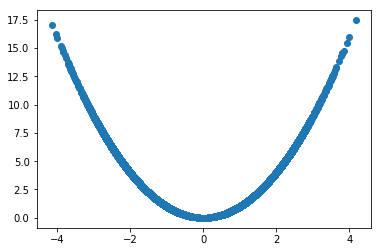

0.000867354944801


In [30]:
import matplotlib.pyplot as plt
plt.scatter(x,xsq)
plt.show()
A = np.vstack([x, np.ones(len(x))]).T
b1, b0 = np.linalg.lstsq(A,xsq)[0]
print b1

B1 is approximately 0

# Problem 3

(Starting with MNIST) Install Tensorflow and Keras 2.0. Use the amazon instances and complete this tutorial: https://www.tensorflow.org/get_started/mnist/pros

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here

In [8]:
def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [9]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-

In [11]:
# Create the Estimator
mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002A6A8763358>, '_model_dir': '/tmp/mnist_convnet_model', '_evaluation_master': '', '_global_id_in_cluster': 0, '_task_type': 'worker', '_tf_random_seed': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_master': '', '_service': None, '_is_chief': True, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_task_id': 0, '_save_summary_steps': 100}


In [12]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)
mnist_classifier.train(
    input_fn=train_input_fn,
    steps=20000,
    hooks=[logging_hook])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/mnist_convnet_model\model.ckpt.
INFO:tensorflow:probabilities = [[0.10211907 0.09459142 0.10281193 0.10690533 0.09740437 0.09380776
  0.10432757 0.10091662 0.09783065 0.09928525]
 [0.11714772 0.10167047 0.09997449 0.10881621 0.09488136 0.09109379
  0.09173483 0.09869041 0.09259107 0.1033996 ]
 [0.10708418 0.10778041 0.09648488 0.11823592 0.09433167 0.09473843
  0.09806457 0.09234767 0.09702249 0.09390981]
 [0.09885558 0.09498819 0.10180819 0.11541405 0.09953026 0.08842915
  0.10026594 0.09916654 0.10274038 0.09880162]
 [0.10144363 0.10208189 0.10313495 0.10051085 0.09766779 0.09387813
  0.10767949 0.10121634 0.09805407 0.0943329 ]
 [0.09077626 0.10490326 0.10037149 0.10686517 0.10087152 0.08420128
  0.1

INFO:tensorflow:loss = 2.3084674, step = 0
INFO:tensorflow:probabilities = [[0.09892893 0.10612009 0.09803826 0.12069315 0.11021108 0.08623704
  0.10815773 0.0933079  0.08743155 0.0908741 ]
 [0.10235456 0.08927903 0.10262867 0.10643083 0.09668806 0.09097449
  0.10781136 0.11069736 0.09339326 0.0997423 ]
 [0.09472823 0.09599425 0.10112842 0.11743369 0.1076396  0.0917446
  0.10395204 0.10581422 0.08849442 0.09307059]
 [0.10496286 0.09671777 0.1081828  0.10209355 0.1042617  0.08975429
  0.10915043 0.0980229  0.09476019 0.09209352]
 [0.09059949 0.10664441 0.1026488  0.10255191 0.09267857 0.09272487
  0.10894684 0.10503994 0.0984107  0.0997545 ]
 [0.10984083 0.10039238 0.10419175 0.10561697 0.09592411 0.0881561
  0.09853879 0.10208932 0.10795925 0.08729053]
 [0.10009889 0.09900803 0.10082677 0.1130798  0.10076075 0.09638999
  0.10129364 0.09530453 0.09694529 0.09629233]
 [0.09866382 0.10554973 0.10308772 0.10072277 0.1061542  0.09836419
  0.10817168 0.0917467  0.09513512 0.09240401]
 [0.115

INFO:tensorflow:global_step/sec: 168.492
INFO:tensorflow:probabilities = [[0.10902889 0.09905803 0.09762825 0.10663886 0.10300273 0.09414028
  0.09842294 0.10272544 0.09248256 0.09687199]
 [0.10262267 0.09718306 0.10088015 0.11076005 0.09485699 0.08599607
  0.10733749 0.10642803 0.0938924  0.10004314]
 [0.09220243 0.09371953 0.097464   0.10460632 0.10616468 0.10069719
  0.1088797  0.10097943 0.0977193  0.0975674 ]
 [0.10142013 0.10383187 0.09658476 0.10393979 0.09350245 0.08932779
  0.10462451 0.1046613  0.10394201 0.0981654 ]
 [0.09764297 0.09678764 0.09775788 0.113203   0.10514446 0.08767127
  0.1019384  0.09722772 0.10187835 0.10074836]
 [0.10132152 0.10225773 0.09684975 0.11063332 0.09725711 0.09197953
  0.10487965 0.09638689 0.09701104 0.10142344]
 [0.10682139 0.10473638 0.0984279  0.10904523 0.09769108 0.08402691
  0.10455091 0.09649936 0.10025546 0.09794533]
 [0.09783138 0.10117424 0.1009833  0.10407273 0.1042257  0.09632349
  0.10707477 0.09668039 0.09303913 0.09859486]
 [0.093

INFO:tensorflow:loss = 2.2982209, step = 100 (0.595 sec)
INFO:tensorflow:probabilities = [[0.09995842 0.09623571 0.09941272 0.10166887 0.10872711 0.08767192
  0.11340647 0.09762596 0.08708017 0.10821264]
 [0.09746866 0.10057202 0.09761713 0.11892428 0.0964722  0.09024122
  0.10566916 0.09513374 0.10217396 0.09572764]
 [0.09641378 0.0965756  0.09876565 0.11091191 0.09506802 0.0916195
  0.11319344 0.10422079 0.09797315 0.09525819]
 [0.09670633 0.09658246 0.1090917  0.10595385 0.10264525 0.09941997
  0.09976401 0.09022647 0.10536597 0.09424391]
 [0.09488261 0.09659004 0.1013215  0.10469323 0.09391844 0.08725668
  0.11591304 0.10871744 0.0972788  0.09942827]
 [0.09877322 0.09226966 0.10990805 0.11604606 0.10346861 0.08454402
  0.11263382 0.09198469 0.09269076 0.097681  ]
 [0.11434972 0.09380412 0.09470004 0.1090756  0.0913671  0.09114926
  0.11363047 0.09760868 0.09745673 0.09685832]
 [0.09253342 0.10988698 0.09499732 0.10249753 0.09085406 0.09674201
  0.1049143  0.10641982 0.09990837 0.10

INFO:tensorflow:global_step/sec: 201.404
INFO:tensorflow:probabilities = [[0.09845436 0.10342742 0.10438413 0.11200912 0.09014954 0.08665435
  0.10927488 0.10271418 0.09224331 0.10068872]
 [0.11274206 0.10101046 0.09426184 0.11242978 0.09336746 0.0885293
  0.09662    0.1040946  0.09756303 0.09938144]
 [0.1007064  0.08499169 0.10633403 0.10928437 0.09823541 0.0897085
  0.11732297 0.09872591 0.09570743 0.09898329]
 [0.10142382 0.10347909 0.0980541  0.10505221 0.10787858 0.08517223
  0.10043125 0.09830374 0.09809072 0.10211438]
 [0.10945726 0.08561645 0.09758193 0.11478753 0.10447475 0.09071544
  0.10555419 0.10333198 0.10111033 0.08737011]
 [0.10306489 0.09288111 0.09387902 0.11313593 0.09307902 0.09972716
  0.10701177 0.10539789 0.09935142 0.09247181]
 [0.09787165 0.0995939  0.10524605 0.10347587 0.1000234  0.09588528
  0.11586008 0.08856394 0.09736897 0.09611087]
 [0.0989145  0.09823544 0.10947563 0.1092148  0.10089108 0.09732734
  0.0935683  0.09867599 0.10293546 0.09076154]
 [0.11118

INFO:tensorflow:loss = 2.2739882, step = 200 (0.557 sec)
INFO:tensorflow:probabilities = [[0.10940108 0.09358065 0.11022407 0.10516574 0.10350811 0.09171961
  0.09646443 0.09361974 0.09867818 0.09763843]
 [0.09129827 0.09469372 0.0981219  0.10540166 0.09793699 0.08826717
  0.10824328 0.11055891 0.10114866 0.10432935]
 [0.10597035 0.09163304 0.09800781 0.11858925 0.09307548 0.09451938
  0.10474965 0.10592955 0.0962261  0.09129946]
 [0.11109431 0.09543139 0.09658863 0.11032147 0.10106295 0.10255993
  0.08924712 0.10090454 0.09740505 0.09538462]
 [0.10258718 0.09195376 0.10418623 0.11329    0.09733319 0.08954364
  0.11931223 0.10389765 0.09149082 0.08640533]
 [0.11625873 0.0892153  0.09530539 0.10590538 0.10427971 0.09768207
  0.09505434 0.10381128 0.08784739 0.10464041]
 [0.09603269 0.09940022 0.10469184 0.1018419  0.1091233  0.0880703
  0.10767482 0.09599163 0.09550541 0.1016679 ]
 [0.10111634 0.10471284 0.10330898 0.09900817 0.1013713  0.08736581
  0.10301518 0.10339975 0.10125164 0.09

INFO:tensorflow:global_step/sec: 180.18
INFO:tensorflow:probabilities = [[0.09330952 0.10903377 0.10268982 0.10775097 0.09556062 0.09158815
  0.1030203  0.09482632 0.0998534  0.10236713]
 [0.09490046 0.10099696 0.09997575 0.10868172 0.09716857 0.08501611
  0.10572827 0.10503331 0.09522233 0.10727652]
 [0.10528816 0.09793329 0.10177928 0.11050872 0.09459185 0.09527208
  0.10144043 0.09965633 0.09850787 0.09502205]
 [0.11180358 0.08754756 0.10847429 0.09902301 0.09732049 0.09387504
  0.1047193  0.11048115 0.09806996 0.08868564]
 [0.10274022 0.09101273 0.10281749 0.10318439 0.10057508 0.0894052
  0.10293186 0.1029113  0.10011382 0.10430792]
 [0.09126952 0.10398049 0.09909143 0.09713636 0.09994229 0.09377785
  0.10150462 0.10550026 0.10607733 0.10171992]
 [0.09591266 0.10516493 0.10387435 0.11879469 0.09800112 0.08835848
  0.1064532  0.09287369 0.0972381  0.09332875]
 [0.10324634 0.0987343  0.09966832 0.11138529 0.10702382 0.08521087
  0.10227987 0.0909816  0.09796686 0.10350278]
 [0.10464

INFO:tensorflow:loss = 2.2580507, step = 300 (0.495 sec)
INFO:tensorflow:probabilities = [[0.10103016 0.09266876 0.09775665 0.10504609 0.09775276 0.0936292
  0.11784654 0.10714812 0.09693605 0.09018568]
 [0.09749193 0.09390656 0.09669645 0.11708177 0.09985625 0.08071722
  0.10752001 0.11080322 0.10450393 0.09142268]
 [0.10456789 0.08255553 0.12463161 0.09725352 0.09757563 0.08930734
  0.10741089 0.10085261 0.09516034 0.10068467]
 [0.09737981 0.10791487 0.09580058 0.11353076 0.09770054 0.09004061
  0.09941003 0.10208596 0.09525875 0.10087804]
 [0.10543938 0.08826923 0.10830285 0.11465876 0.09754972 0.08989432
  0.10973393 0.09916203 0.10186163 0.08512817]
 [0.09975643 0.10225336 0.1033537  0.10290747 0.11209989 0.0885087
  0.10206588 0.09773699 0.09453756 0.09678003]
 [0.09911364 0.09089405 0.09319363 0.09893437 0.11591897 0.09352097
  0.09787717 0.10937102 0.09075711 0.11041914]
 [0.11602379 0.0825319  0.10132765 0.10941557 0.11239965 0.08712954
  0.10108964 0.09501301 0.09947714 0.095

INFO:tensorflow:global_step/sec: 208.551
INFO:tensorflow:probabilities = [[0.12508655 0.08453014 0.09415374 0.1112225  0.08741592 0.09134556
  0.10697453 0.10781578 0.09795322 0.09350205]
 [0.12236214 0.08409448 0.11202808 0.11278041 0.09665583 0.08707072
  0.09715964 0.10019576 0.10656998 0.08108291]
 [0.10196398 0.09575615 0.0996419  0.10972695 0.09632587 0.08857892
  0.10477989 0.10232352 0.10178459 0.09911828]
 [0.11563768 0.08946148 0.09487847 0.11267567 0.09499252 0.09216835
  0.10101882 0.09007777 0.11408268 0.09500663]
 [0.08960644 0.1134102  0.10843364 0.1029774  0.10213795 0.0938098
  0.10204268 0.09336578 0.09415911 0.10005692]
 [0.10738422 0.09724674 0.09406637 0.1116132  0.09016263 0.08550774
  0.08833767 0.11092221 0.10430194 0.11045731]
 [0.09480779 0.10375579 0.10538016 0.10033691 0.09636977 0.09309765
  0.11370593 0.09501403 0.09823091 0.09930116]
 [0.10741175 0.09717979 0.09115034 0.11005493 0.0915742  0.09694045
  0.09271185 0.11139844 0.10466462 0.09691364]
 [0.0972

INFO:tensorflow:loss = 2.255024, step = 400 (0.480 sec)
INFO:tensorflow:probabilities = [[0.09878002 0.10939817 0.09600247 0.10027573 0.10195985 0.09082567
  0.10394035 0.1031588  0.10096102 0.09469789]
 [0.1485145  0.07508133 0.09145309 0.10558429 0.08530053 0.09648368
  0.11337886 0.09956138 0.09360693 0.09103547]
 [0.09892283 0.09000672 0.09622977 0.10765951 0.11425591 0.08194565
  0.09474201 0.11197853 0.09815251 0.10610659]
 [0.09982529 0.09509834 0.09919284 0.1158028  0.0955292  0.09006956
  0.1174248  0.10035242 0.10399381 0.0827109 ]
 [0.09044145 0.0924112  0.08945961 0.12110882 0.09641667 0.0907208
  0.12313975 0.09899212 0.10570629 0.09160323]
 [0.10057357 0.09460638 0.09033304 0.11993899 0.10090795 0.09185836
  0.09767176 0.10930648 0.10505907 0.08974438]
 [0.10198932 0.09172347 0.10904831 0.10386434 0.0956324  0.10610174
  0.09940893 0.09684942 0.09652701 0.09885517]
 [0.10999741 0.08513359 0.1074861  0.10020744 0.10166123 0.08242581
  0.09438675 0.09867068 0.11761203 0.102

INFO:tensorflow:global_step/sec: 209.424
INFO:tensorflow:probabilities = [[0.10339205 0.08283577 0.10446157 0.11506721 0.09496093 0.08063681
  0.10920645 0.11554643 0.10988943 0.08400337]
 [0.09480327 0.09232291 0.10848526 0.10252309 0.11090006 0.08974796
  0.10443358 0.10142826 0.09783016 0.09752542]
 [0.11750264 0.09326095 0.08650167 0.10723887 0.09633293 0.0942521
  0.09618924 0.10245311 0.10407607 0.10219246]
 [0.11287569 0.08802018 0.1191428  0.11174211 0.09057638 0.08978868
  0.10475189 0.09968271 0.10149518 0.08192433]
 [0.14699478 0.07657966 0.09537738 0.1252372  0.10190447 0.08733258
  0.08619662 0.0929392  0.10472371 0.0827145 ]
 [0.10625038 0.09886701 0.09972609 0.10532224 0.09639172 0.09463087
  0.09431542 0.10305959 0.09958804 0.10184864]
 [0.09506693 0.09681125 0.09912569 0.10955173 0.11093218 0.08283307
  0.09923464 0.1030656  0.10028039 0.10309851]
 [0.0994463  0.10802112 0.09665494 0.10480876 0.09084545 0.09045152
  0.09965577 0.11015254 0.1016688  0.09829471]
 [0.1007

INFO:tensorflow:loss = 2.223448, step = 500 (0.477 sec)
INFO:tensorflow:probabilities = [[0.1052145  0.09287766 0.08629952 0.10077855 0.10011268 0.10423278
  0.10004466 0.11006565 0.10210017 0.0982739 ]
 [0.09062485 0.09784533 0.10066739 0.1153927  0.0931196  0.09257726
  0.11145991 0.09401702 0.10338312 0.10091282]
 [0.11136489 0.08726576 0.103681   0.10986747 0.09235929 0.09807653
  0.1051546  0.09741904 0.09706381 0.09774759]
 [0.10812078 0.09119137 0.12542401 0.11580861 0.08694979 0.08909882
  0.11528347 0.09038129 0.09160285 0.08613907]
 [0.11110112 0.08073839 0.10791777 0.10364027 0.09166154 0.08592169
  0.10050085 0.11122797 0.10793855 0.09935185]
 [0.10130661 0.08619072 0.0952177  0.1182735  0.09814215 0.08216209
  0.11304063 0.09162546 0.10467691 0.10936423]
 [0.10755225 0.09554892 0.10320794 0.12566331 0.10651296 0.08069763
  0.10887737 0.07908805 0.09769873 0.09515291]
 [0.09931336 0.0837962  0.0965071  0.10834213 0.1105388  0.09128975
  0.12201285 0.11596363 0.08890657 0.08

INFO:tensorflow:global_step/sec: 204.499
INFO:tensorflow:probabilities = [[0.0973549  0.09875073 0.1061174  0.10296445 0.09374008 0.08676099
  0.12445021 0.08812793 0.10741446 0.09431894]
 [0.11158767 0.08951068 0.10168926 0.13349777 0.10296582 0.08081565
  0.10338872 0.09106169 0.0876646  0.09781822]
 [0.11159082 0.08583983 0.092742   0.11293934 0.11558064 0.07679705
  0.09941427 0.09141373 0.10617758 0.10750472]
 [0.12102111 0.0802019  0.10883753 0.09132031 0.09042338 0.08176622
  0.14490408 0.08762375 0.10946358 0.08443814]
 [0.11372734 0.09041176 0.10583862 0.12237784 0.10054399 0.08306186
  0.10230102 0.09024313 0.10430465 0.08718988]
 [0.0959175  0.11777771 0.10254853 0.09701564 0.09352548 0.08652348
  0.0960677  0.10920238 0.10292406 0.0984975 ]
 [0.10170983 0.10003866 0.11083875 0.10963105 0.08755337 0.07750025
  0.09660064 0.10838226 0.10449567 0.10324955]
 [0.09360526 0.09719075 0.11310149 0.1103986  0.08903106 0.09057838
  0.11061815 0.08522419 0.10504807 0.10520403]
 [0.133

INFO:tensorflow:loss = 2.2086272, step = 600 (0.489 sec)
INFO:tensorflow:probabilities = [[0.10010771 0.08969573 0.09817928 0.11055247 0.10160308 0.0861446
  0.09005152 0.1056965  0.11229473 0.10567439]
 [0.09543763 0.09095817 0.11324219 0.11461095 0.09916493 0.0802663
  0.11624108 0.09218634 0.09685268 0.10103971]
 [0.1099581  0.07656208 0.0951919  0.12006865 0.10204257 0.08913959
  0.1086444  0.10540797 0.09449355 0.0984912 ]
 [0.09689298 0.08628929 0.11101131 0.10553298 0.10513886 0.08938704
  0.10349603 0.09444995 0.1021262  0.10567532]
 [0.09934319 0.10249548 0.10511187 0.10494536 0.092296   0.0966998
  0.09736769 0.10492624 0.10339075 0.09342366]
 [0.11763146 0.07962672 0.10059486 0.11160651 0.0963637  0.07894444
  0.10688577 0.10180022 0.10819545 0.09835093]
 [0.07434226 0.10516839 0.10449085 0.1117537  0.08694324 0.08049428
  0.15145585 0.09165272 0.10239413 0.09130456]
 [0.11220529 0.08894627 0.10674403 0.11592112 0.09933399 0.09867053
  0.09711904 0.08489571 0.10447004 0.0916

INFO:tensorflow:global_step/sec: 207.039
INFO:tensorflow:probabilities = [[0.10406668 0.09222739 0.10943773 0.11038982 0.08671454 0.09864725
  0.10431908 0.09028835 0.0981983  0.10571094]
 [0.10058852 0.10841396 0.08945014 0.10335214 0.08710222 0.08868578
  0.11014907 0.09695733 0.10991891 0.10538182]
 [0.11692698 0.08661955 0.09284618 0.1109591  0.09792875 0.08662209
  0.09230132 0.10775506 0.105951   0.10208993]
 [0.10894299 0.07781315 0.10429281 0.12121659 0.09572687 0.08164632
  0.10081246 0.11008203 0.09752926 0.10193752]
 [0.11643223 0.0751481  0.09729325 0.10093003 0.11362641 0.07927714
  0.1176579  0.10555647 0.09899836 0.09508013]
 [0.1258363  0.09030518 0.09892903 0.1144297  0.08485398 0.10427579
  0.09252574 0.08779559 0.10649199 0.09455668]
 [0.10859287 0.08699784 0.0867762  0.11139046 0.12219314 0.08207431
  0.10399254 0.09224343 0.09745423 0.10828505]
 [0.08700555 0.09769551 0.09890227 0.11608539 0.09966213 0.07501397
  0.11071265 0.09199002 0.11285309 0.11007936]
 [0.095

INFO:tensorflow:loss = 2.1835225, step = 700 (0.483 sec)
INFO:tensorflow:probabilities = [[0.09251188 0.08994512 0.11688608 0.12064002 0.0895788  0.09122846
  0.08779673 0.10389657 0.11074344 0.09677283]
 [0.09179148 0.11901171 0.09979638 0.09997832 0.0913315  0.08377553
  0.10747324 0.10209157 0.10292458 0.10182566]
 [0.10361032 0.09143067 0.10288982 0.10396148 0.10760606 0.08438107
  0.10253039 0.09182917 0.09371333 0.11804774]
 [0.09773757 0.12464885 0.10200223 0.09273667 0.09597282 0.09186156
  0.09046208 0.10356722 0.10027206 0.10073899]
 [0.08885083 0.11897979 0.10021964 0.11742694 0.08484332 0.0912682
  0.0966021  0.11202765 0.09442609 0.0953555 ]
 [0.09300045 0.12093214 0.10416904 0.09605113 0.08650354 0.09809216
  0.10074256 0.09855424 0.10522322 0.09673151]
 [0.11725248 0.07565989 0.13762368 0.12947364 0.08871651 0.09298444
  0.10277978 0.08292886 0.08092016 0.0916606 ]
 [0.09965897 0.1007745  0.10690957 0.10627865 0.08151028 0.09618196
  0.09993639 0.09743798 0.11926656 0.09

INFO:tensorflow:global_step/sec: 208.761
INFO:tensorflow:probabilities = [[0.09036028 0.08506832 0.09304801 0.09425369 0.11588643 0.0926012
  0.10967211 0.10630972 0.09899772 0.11380253]
 [0.1422607  0.08231884 0.11054069 0.10797023 0.07823996 0.08827404
  0.08302454 0.08334667 0.11735898 0.10666537]
 [0.10350097 0.07117487 0.10572623 0.09940755 0.14227673 0.07401524
  0.09731544 0.11506636 0.0885935  0.10292299]
 [0.10305911 0.08130067 0.10288706 0.10708323 0.11017267 0.07295779
  0.10767303 0.09791164 0.12260976 0.09434506]
 [0.10461532 0.08203369 0.09153485 0.10725997 0.08954408 0.10546127
  0.10165282 0.09808947 0.1267492  0.09305929]
 [0.10763218 0.1014548  0.0954968  0.13124894 0.09173118 0.09139917
  0.08623988 0.08568253 0.10217275 0.10694184]
 [0.11136372 0.06757668 0.10712595 0.11611498 0.13384569 0.07941713
  0.08806956 0.10537691 0.0880781  0.10303122]
 [0.11178061 0.0953109  0.09764279 0.11518307 0.08485737 0.10300244
  0.09421746 0.09707367 0.10812951 0.09280211]
 [0.1178

INFO:tensorflow:loss = 2.1544983, step = 800 (0.479 sec)
INFO:tensorflow:probabilities = [[0.11265479 0.07140324 0.09814534 0.11479594 0.0895046  0.09106125
  0.11038046 0.09688518 0.11663808 0.09853107]
 [0.13114859 0.07266575 0.11259123 0.12291529 0.10173729 0.08560576
  0.08939292 0.09397875 0.08936686 0.10059761]
 [0.12575611 0.06281707 0.09382702 0.12219378 0.10574049 0.08743959
  0.07484886 0.10877191 0.12244239 0.09616286]
 [0.15349112 0.07032093 0.09766287 0.11612548 0.0929631  0.06670536
  0.12287091 0.07776963 0.12347148 0.0786192 ]
 [0.10318123 0.06716845 0.12765105 0.13110343 0.08429922 0.06653786
  0.11965062 0.09082761 0.11105065 0.09852995]
 [0.08909672 0.0905953  0.10005398 0.10589994 0.11071666 0.0964909
  0.0966574  0.10207542 0.09429611 0.11411764]
 [0.10266016 0.07857129 0.08360927 0.12041252 0.1021692  0.08804846
  0.0950163  0.10318192 0.10468336 0.1216474 ]
 [0.11938862 0.0852014  0.110517   0.12135229 0.09852475 0.07647295
  0.13328795 0.07634109 0.09822068 0.08

INFO:tensorflow:global_step/sec: 186.22
INFO:tensorflow:probabilities = [[0.18072526 0.06655326 0.09430336 0.11962458 0.08802842 0.06969953
  0.10364211 0.09478814 0.09460586 0.08802947]
 [0.10247333 0.09063219 0.09676404 0.11607682 0.09385996 0.08728854
  0.07769079 0.13063845 0.10834128 0.09623468]
 [0.12734875 0.06992475 0.10588984 0.11957282 0.10249759 0.07409566
  0.12386687 0.08757802 0.09274864 0.09647712]
 [0.12082064 0.07470174 0.08540207 0.1035804  0.1146837  0.08300059
  0.08112423 0.12222674 0.10168136 0.11277851]
 [0.10888714 0.09754479 0.10956107 0.10819708 0.06836272 0.10105432
  0.08640249 0.10323499 0.10947978 0.10727564]
 [0.09467858 0.05233615 0.11803902 0.08814014 0.13090278 0.0809486
  0.11376477 0.11816902 0.09194607 0.11107498]
 [0.10930435 0.06399224 0.09220973 0.14034222 0.09330543 0.12120052
  0.08735539 0.0863124  0.1064707  0.099507  ]
 [0.09039707 0.0785969  0.18039453 0.16071026 0.07302875 0.0591755
  0.10178469 0.08173406 0.09334043 0.08083786]
 [0.128801

INFO:tensorflow:loss = 2.112874, step = 900 (0.537 sec)
INFO:tensorflow:probabilities = [[0.09956823 0.12971391 0.11411966 0.09873272 0.06920959 0.0952635
  0.08858713 0.10898146 0.10789012 0.08793367]
 [0.14783186 0.07520951 0.11863857 0.09563785 0.08967953 0.09591313
  0.11210267 0.0994558  0.09608723 0.06944383]
 [0.0725074  0.13121292 0.10752283 0.10851978 0.08677937 0.09365849
  0.10260458 0.09295539 0.1023026  0.10193668]
 [0.1436673  0.0519118  0.09688899 0.09696443 0.09720012 0.08288141
  0.09891044 0.13023911 0.11189816 0.08943823]
 [0.1406568  0.06972568 0.12706052 0.13585427 0.07166055 0.08782494
  0.09118222 0.08114599 0.1067665  0.08812256]
 [0.13663521 0.07008323 0.155213   0.09959798 0.08013626 0.07545634
  0.10992968 0.07649394 0.11803354 0.07842081]
 [0.12133743 0.07778809 0.08872905 0.11257282 0.0929177  0.08028897
  0.08364103 0.11871097 0.12969697 0.09431697]
 [0.10067356 0.06674306 0.09717734 0.10883547 0.10189414 0.10850146
  0.06364463 0.09095629 0.16739367 0.094

INFO:tensorflow:global_step/sec: 193.873
INFO:tensorflow:probabilities = [[0.1173821  0.06054011 0.17281193 0.09146427 0.10453828 0.0766457
  0.12552756 0.08400507 0.09345916 0.07362583]
 [0.16039543 0.07169147 0.08870156 0.1519881  0.07099918 0.07364857
  0.07711194 0.08628148 0.14523813 0.07394417]
 [0.12747915 0.04906539 0.0786879  0.12071102 0.10161246 0.07719716
  0.10057877 0.13174266 0.11634381 0.09658171]
 [0.09614598 0.14962691 0.09724338 0.09737747 0.07772407 0.0925244
  0.10804594 0.0815244  0.10773311 0.09205434]
 [0.07737    0.1323749  0.1115446  0.10653161 0.08121489 0.08248284
  0.09012476 0.10590219 0.11034592 0.10210827]
 [0.23615053 0.04008971 0.12317322 0.12668195 0.07957052 0.06904057
  0.08671816 0.07456563 0.10335686 0.06065286]
 [0.12732433 0.09397547 0.06899078 0.10964578 0.09240473 0.11886669
  0.07405861 0.1053318  0.11506402 0.09433784]
 [0.1510964  0.07732262 0.07955183 0.12098987 0.05577563 0.09268285
  0.08825494 0.10569228 0.12998724 0.09864632]
 [0.19626

INFO:tensorflow:loss = 2.0240173, step = 1000 (0.515 sec)
INFO:tensorflow:probabilities = [[0.08351844 0.0921454  0.09973662 0.14495586 0.07318993 0.10557828
  0.07624666 0.10038822 0.13186596 0.09237467]
 [0.08331284 0.10654998 0.08496636 0.10586646 0.09204391 0.09237034
  0.09533197 0.10144655 0.12999332 0.10811825]
 [0.15923715 0.06450506 0.09258447 0.12808055 0.09008782 0.07200795
  0.09668132 0.10635583 0.08636342 0.10409631]
 [0.11039475 0.07315727 0.09349599 0.12347075 0.13522746 0.0771732
  0.11509819 0.0819502  0.08653633 0.1034958 ]
 [0.09001908 0.14385287 0.0989453  0.0921995  0.09115849 0.08467741
  0.08686006 0.09922039 0.13018632 0.08288047]
 [0.13712011 0.05316973 0.0561934  0.11889816 0.08390912 0.06918871
  0.06979282 0.1522982  0.14872739 0.11070231]
 [0.09749473 0.08406239 0.09371015 0.11297537 0.11899432 0.08873916
  0.10647742 0.08691943 0.09974893 0.1108782 ]
 [0.12077699 0.05860987 0.10635985 0.10993468 0.13430852 0.06164573
  0.11898732 0.104089   0.09381289 0.0

INFO:tensorflow:global_step/sec: 187.442
INFO:tensorflow:probabilities = [[0.12287541 0.0537938  0.11614951 0.11900777 0.11159467 0.08152377
  0.14179556 0.07345863 0.09451321 0.08528759]
 [0.11127792 0.09085235 0.10575414 0.11029217 0.07760179 0.09345175
  0.06991576 0.13834096 0.10532056 0.09719259]
 [0.11089493 0.06151389 0.1317106  0.06961188 0.11515629 0.06322733
  0.22747134 0.05063396 0.09947973 0.07029998]
 [0.10767258 0.07222525 0.08668109 0.09255303 0.13813002 0.07853249
  0.07972049 0.12360688 0.09791764 0.12296051]
 [0.09083164 0.15307717 0.09366219 0.11648052 0.07667133 0.08597056
  0.0946516  0.08231349 0.11477021 0.09157125]
 [0.10553621 0.07318873 0.116803   0.09394949 0.07288515 0.09928255
  0.16100939 0.08735437 0.08258727 0.10740381]
 [0.09939572 0.07408478 0.11458088 0.08024412 0.12087977 0.10453103
  0.09950153 0.08500776 0.11664009 0.10513438]
 [0.07511168 0.16465941 0.08467213 0.08100292 0.1123271  0.09284066
  0.08646667 0.09708732 0.10775087 0.09808121]
 [0.094

INFO:tensorflow:loss = 1.9808029, step = 1100 (0.534 sec)
INFO:tensorflow:probabilities = [[0.07648613 0.11903758 0.07793184 0.10766581 0.08539603 0.07908848
  0.11302627 0.08565018 0.15364733 0.10207034]
 [0.25347504 0.0467667  0.0912645  0.10807464 0.08905133 0.07853452
  0.11052404 0.06726015 0.07211063 0.08293845]
 [0.11207173 0.09259529 0.09785221 0.11091796 0.08583393 0.10359573
  0.07508539 0.08775189 0.16075252 0.07354336]
 [0.20060669 0.04399524 0.10081171 0.11381587 0.08461715 0.08766109
  0.10069329 0.07400416 0.11483376 0.07896098]
 [0.06045098 0.16848965 0.15071025 0.08382053 0.06761345 0.08804562
  0.07085811 0.07924707 0.13200237 0.0987619 ]
 [0.0794767  0.10042822 0.12178481 0.09305674 0.0795879  0.07158224
  0.19678853 0.08500915 0.11011808 0.06216764]
 [0.06634586 0.08440319 0.1012037  0.10201978 0.12730455 0.09386878
  0.07568747 0.08745209 0.12002303 0.1416916 ]
 [0.08678223 0.06743304 0.20518072 0.12073293 0.08361059 0.05063175
  0.18231614 0.0637318  0.08370277 0.

INFO:tensorflow:global_step/sec: 200.2
INFO:tensorflow:probabilities = [[0.11823615 0.06715662 0.05579399 0.12028719 0.13369742 0.07259022
  0.08810814 0.10948323 0.10128865 0.1333584 ]
 [0.06616671 0.09481103 0.07667527 0.12472679 0.09096965 0.07917796
  0.12055167 0.12233674 0.14479786 0.07978626]
 [0.07081856 0.14642994 0.13146628 0.08468876 0.08364838 0.07779673
  0.09144875 0.1012594  0.13023268 0.08221042]
 [0.06418935 0.04679031 0.09879164 0.05586277 0.17015345 0.07207569
  0.22847351 0.08525896 0.0804734  0.09793094]
 [0.10377481 0.10079715 0.10387013 0.1942963  0.07366086 0.07535926
  0.07074007 0.06948449 0.10756363 0.10045333]
 [0.12252216 0.059571   0.12470241 0.06587275 0.12884624 0.04588567
  0.17940086 0.09439818 0.07320555 0.10559513]
 [0.28369755 0.02626822 0.09804068 0.11892205 0.0446876  0.07097051
  0.14724235 0.07325082 0.07521507 0.06170513]
 [0.09451222 0.08465353 0.0966876  0.12367253 0.09357942 0.09769506
  0.07801536 0.07459379 0.1508029  0.10578765]
 [0.12256

INFO:tensorflow:loss = 1.8801901, step = 1200 (0.500 sec)
INFO:tensorflow:probabilities = [[0.06366508 0.12191106 0.08730999 0.10616829 0.0922306  0.08949733
  0.10545436 0.08987682 0.12440319 0.11948328]
 [0.2966409  0.02419435 0.05639964 0.12856936 0.06757116 0.08287013
  0.08709601 0.0909465  0.12070236 0.0450096 ]
 [0.09724739 0.10346922 0.10546869 0.12871014 0.07451195 0.09770085
  0.10098564 0.07024068 0.12665822 0.09500726]
 [0.1262941  0.05800094 0.16671214 0.09524703 0.13554044 0.08076469
  0.09499912 0.05313654 0.06953331 0.11977163]
 [0.12008777 0.0550668  0.06182435 0.13620633 0.09726959 0.07360968
  0.03989027 0.1804301  0.11592266 0.11969259]
 [0.10314068 0.03330386 0.16434576 0.08415836 0.18070112 0.0423408
  0.23022507 0.0268064  0.08558723 0.04939071]
 [0.11232157 0.07787045 0.08509029 0.12331737 0.0891451  0.12308399
  0.15067612 0.05497144 0.10278067 0.08074299]
 [0.0608987  0.13336965 0.13076769 0.123018   0.09485409 0.07891637
  0.07951652 0.06908505 0.13393815 0.0

INFO:tensorflow:global_step/sec: 200.4
INFO:tensorflow:probabilities = [[0.04956165 0.18839674 0.12274018 0.08553476 0.06607377 0.10310914
  0.0737735  0.10585886 0.10297301 0.10197838]
 [0.10736401 0.03669026 0.18425569 0.15457293 0.05160009 0.06489465
  0.07690515 0.07509572 0.15760913 0.09101226]
 [0.17772901 0.02894007 0.16363193 0.17452338 0.08622085 0.04983735
  0.1023028  0.06566229 0.0805969  0.07055538]
 [0.15447868 0.05052656 0.08375057 0.12416901 0.08161388 0.06240408
  0.06679796 0.11922123 0.1432153  0.1138228 ]
 [0.3669196  0.0271299  0.06399822 0.15591145 0.03035569 0.08642267
  0.07135645 0.05936649 0.06563754 0.072902  ]
 [0.1597157  0.02940693 0.09068371 0.09444524 0.1006503  0.17557038
  0.06392221 0.06322701 0.14184913 0.08052934]
 [0.12038915 0.02381964 0.07554132 0.06160885 0.18957084 0.07366674
  0.06984463 0.12013423 0.14354126 0.1218833 ]
 [0.14647865 0.13174953 0.06270555 0.12514193 0.05068509 0.08531132
  0.09610589 0.08146761 0.11794962 0.10240477]
 [0.07819

INFO:tensorflow:loss = 1.7637095, step = 1300 (0.499 sec)
INFO:tensorflow:probabilities = [[0.06030413 0.05279893 0.06029666 0.10060046 0.16502768 0.09617289
  0.05240383 0.1480257  0.10328669 0.16108292]
 [0.04539226 0.13935071 0.10861113 0.10285287 0.07500802 0.07886223
  0.13063885 0.11038098 0.11019684 0.0987061 ]
 [0.0663019  0.03067447 0.06804953 0.07333456 0.28016979 0.0506358
  0.07077169 0.08588433 0.08875416 0.18542387]
 [0.04661627 0.03061995 0.11105863 0.03636732 0.3744346  0.03894492
  0.14359002 0.07150741 0.05448869 0.09237213]
 [0.03045319 0.35943237 0.08695695 0.0620319  0.03699275 0.08869534
  0.06337564 0.08165325 0.10249814 0.08791042]
 [0.14964989 0.05921413 0.05037988 0.091573   0.08094859 0.07867145
  0.0559369  0.18414477 0.17758045 0.0719009 ]
 [0.04072345 0.30660257 0.08241493 0.07351423 0.05026378 0.05980546
  0.10208151 0.06858324 0.08188529 0.13412556]
 [0.09647012 0.07150564 0.09753295 0.1275386  0.05955661 0.10732774
  0.1419331  0.10331496 0.12579556 0.0

INFO:tensorflow:global_step/sec: 197.959
INFO:tensorflow:probabilities = [[0.09869041 0.04593932 0.03552607 0.07129068 0.09059489 0.07088827
  0.03954408 0.34019342 0.11342487 0.093908  ]
 [0.07737605 0.03796816 0.04492451 0.08312841 0.1544421  0.14950116
  0.04633133 0.14569034 0.09249322 0.16814475]
 [0.0819522  0.07184559 0.09954987 0.08374102 0.12157691 0.07932007
  0.06284691 0.12911105 0.16931747 0.10073886]
 [0.0709395  0.21480705 0.12610911 0.04849023 0.0684723  0.09699441
  0.05174324 0.10986742 0.13455747 0.07801925]
 [0.12583873 0.04416377 0.20712367 0.1360054  0.08766837 0.08943305
  0.10348695 0.04916719 0.07768637 0.07942639]
 [0.10542097 0.01742343 0.09508678 0.07080303 0.12357911 0.06684988
  0.38237002 0.04133296 0.05420011 0.04293375]
 [0.03385755 0.06656265 0.062608   0.06319302 0.33294058 0.03747784
  0.09975728 0.06936324 0.04756355 0.18667631]
 [0.04024744 0.07429992 0.09164617 0.05774223 0.19523628 0.08196089
  0.09823128 0.07533085 0.10388467 0.18142024]
 [0.071

INFO:tensorflow:loss = 1.5626534, step = 1400 (0.506 sec)
INFO:tensorflow:probabilities = [[0.04224638 0.04599154 0.08524752 0.13615999 0.12960649 0.06441668
  0.08523584 0.16414621 0.11406162 0.13288772]
 [0.04912453 0.23875281 0.12734193 0.06507037 0.0820679  0.06281066
  0.05339623 0.10182045 0.12647033 0.0931448 ]
 [0.04710312 0.24092864 0.08337084 0.09504968 0.05947134 0.09422918
  0.0721729  0.11576001 0.06996541 0.12194888]
 [0.03203394 0.1769744  0.13746718 0.11020322 0.05151054 0.06250053
  0.14282954 0.10267849 0.08234705 0.10145523]
 [0.11586718 0.05528727 0.09180889 0.0932686  0.10991663 0.12374803
  0.0985023  0.0787873  0.08968951 0.14312421]
 [0.08803251 0.09700818 0.13110502 0.20004329 0.06166969 0.12464561
  0.0551143  0.06030874 0.11702551 0.06504723]
 [0.05617581 0.05786978 0.14214766 0.07786401 0.14599526 0.08256862
  0.23400663 0.03883486 0.12592612 0.0386112 ]
 [0.16024917 0.06047301 0.06332737 0.1189025  0.04673695 0.20044523
  0.05189182 0.12023195 0.12646112 0.

INFO:tensorflow:global_step/sec: 193.043
INFO:tensorflow:probabilities = [[0.10106431 0.03423434 0.38962936 0.07375531 0.09623446 0.07752244
  0.04388317 0.01578744 0.13102196 0.03686716]
 [0.06697975 0.10931037 0.06177282 0.06879593 0.12137207 0.11561239
  0.06056558 0.11077002 0.15949234 0.12532878]
 [0.04481804 0.14750147 0.10207363 0.13495347 0.04802734 0.0695475
  0.03422168 0.20179105 0.11511322 0.10195251]
 [0.06665027 0.03090131 0.04241235 0.15701133 0.15236679 0.09051427
  0.06138071 0.23702654 0.06278224 0.09895422]
 [0.04667012 0.07923924 0.10029624 0.3257454  0.05869091 0.1568991
  0.03971884 0.07245296 0.07393544 0.0463517 ]
 [0.5011068  0.00786938 0.09745257 0.0378967  0.06072601 0.05412818
  0.11200324 0.05262185 0.04344364 0.03275174]
 [0.06451981 0.21001792 0.09247147 0.08621742 0.07213584 0.09623606
  0.10256812 0.08699562 0.097228   0.09160979]
 [0.08415625 0.06851218 0.05056291 0.05817164 0.03583704 0.07623849
  0.01663902 0.40154263 0.14939132 0.05894846]
 [0.05590

INFO:tensorflow:loss = 1.4223984, step = 1500 (0.518 sec)
INFO:tensorflow:probabilities = [[0.70752835 0.0052653  0.02527727 0.08119813 0.01013428 0.07412175
  0.02800006 0.01256007 0.04213706 0.01377777]
 [0.02782175 0.01159654 0.04352941 0.01642063 0.42422438 0.03653315
  0.0417848  0.06532218 0.05832274 0.27444446]
 [0.00819871 0.0044941  0.00298111 0.04005399 0.04365259 0.01176782
  0.00579625 0.753617   0.04168259 0.08775589]
 [0.06634139 0.00964478 0.14932163 0.04219921 0.07568514 0.02621606
  0.5327569  0.02586589 0.02790045 0.04406854]
 [0.06153812 0.02812335 0.04994354 0.03953898 0.24055864 0.08071181
  0.06090527 0.10509985 0.09326123 0.24031915]
 [0.01163583 0.51517326 0.0637998  0.07352246 0.04511738 0.05106623
  0.05430632 0.06331372 0.07256833 0.0494967 ]
 [0.03754191 0.3612437  0.05788939 0.0898254  0.03919737 0.05683836
  0.04503809 0.07364827 0.10098583 0.13779174]
 [0.02291723 0.04641869 0.01386053 0.05558148 0.10260859 0.07807871
  0.02039095 0.40039483 0.1196401  0.

INFO:tensorflow:global_step/sec: 194.737
INFO:tensorflow:probabilities = [[0.05049612 0.19362867 0.04414957 0.04012268 0.3034699  0.04239758
  0.03757831 0.05482187 0.0800228  0.15331253]
 [0.03589833 0.12403219 0.01651013 0.08782874 0.07347928 0.14268689
  0.03359699 0.09724507 0.16026247 0.22845995]
 [0.03177084 0.15943779 0.06145743 0.09658562 0.03561747 0.2810334
  0.01931733 0.07196222 0.1341305  0.1086875 ]
 [0.05887058 0.01272148 0.01391095 0.0680015  0.19364914 0.05291977
  0.03967002 0.12152585 0.07877438 0.35995626]
 [0.01928176 0.43275353 0.08942569 0.07467932 0.04380909 0.05721133
  0.06392698 0.06064053 0.08872592 0.06954581]
 [0.03856595 0.00684724 0.02424042 0.04279962 0.54883623 0.05669664
  0.04459099 0.02845766 0.07310954 0.13585569]
 [0.13864648 0.01217999 0.03440046 0.47971806 0.03748436 0.13784741
  0.01768298 0.01985013 0.10535876 0.01683133]
 [0.01339694 0.50748223 0.05556621 0.08185745 0.03585697 0.03596234
  0.05869238 0.08426809 0.06131414 0.0656032 ]
 [0.0737

INFO:tensorflow:loss = 1.2406148, step = 1600 (0.514 sec)
INFO:tensorflow:probabilities = [[0.03008179 0.1252535  0.02776945 0.40591323 0.01938904 0.11941646
  0.0131315  0.02578284 0.15483278 0.07842936]
 [0.07842422 0.1190688  0.07204926 0.14353438 0.06470817 0.08048688
  0.09429975 0.08105171 0.1158792  0.15049759]
 [0.02941851 0.10087017 0.02933657 0.06451398 0.1488073  0.06341478
  0.08130549 0.09146338 0.16560371 0.22526611]
 [0.06783897 0.02968017 0.1360898  0.45631132 0.01435388 0.12938234
  0.02541045 0.05702605 0.06739569 0.01651131]
 [0.12656544 0.01879089 0.06760051 0.13169128 0.08163005 0.12425371
  0.11193188 0.09579354 0.15200678 0.08973589]
 [0.03380666 0.10408694 0.02899519 0.02458412 0.07904325 0.09593994
  0.01763541 0.0761641  0.21103457 0.32870984]
 [0.01212161 0.05134853 0.11339322 0.15326609 0.17775805 0.05945774
  0.18560028 0.09167856 0.06108417 0.0942917 ]
 [0.0147306  0.39978248 0.06415831 0.08630443 0.05239016 0.05360027
  0.07282093 0.03806587 0.12326109 0.

INFO:tensorflow:global_step/sec: 199.402
INFO:tensorflow:probabilities = [[0.10783338 0.02289735 0.08943184 0.04083548 0.20211491 0.13000609
  0.09282997 0.08653731 0.05905135 0.16846238]
 [0.6437144  0.00128941 0.12489367 0.06324074 0.04909633 0.03144653
  0.05482243 0.00874749 0.01315334 0.00959563]
 [0.09382135 0.02516459 0.16618125 0.26961645 0.00712926 0.18118072
  0.01281117 0.04249488 0.17328359 0.02831672]
 [0.00637462 0.11951029 0.01314091 0.03049045 0.04332885 0.05174221
  0.01641355 0.26712433 0.36315337 0.08872145]
 [0.00644311 0.24880274 0.0556264  0.1064342  0.03394217 0.09662823
  0.07425335 0.10773093 0.17746368 0.09267519]
 [0.01611246 0.00712023 0.8534772  0.07242768 0.00318488 0.01723152
  0.02049037 0.00207897 0.00636661 0.00151007]
 [0.04474502 0.23577355 0.10080848 0.08345154 0.04251245 0.28057432
  0.08306331 0.01912704 0.0652976  0.04464668]
 [0.02142494 0.04473773 0.17208774 0.29598334 0.03181849 0.09295655
  0.07424559 0.04302063 0.17596214 0.04776292]
 [0.002

INFO:tensorflow:loss = 1.1229768, step = 1700 (0.502 sec)
INFO:tensorflow:probabilities = [[0.01017399 0.01085948 0.66240937 0.03162406 0.06953846 0.03164075
  0.0700731  0.03082792 0.06614251 0.01671045]
 [0.17355424 0.00861332 0.15000226 0.20629743 0.02884803 0.14315018
  0.03749537 0.07090525 0.16711816 0.01401582]
 [0.00785009 0.5321761  0.04700902 0.09532636 0.02856009 0.0387449
  0.05184632 0.03512546 0.10568625 0.05767547]
 [0.08524934 0.01758497 0.13351011 0.19095735 0.04595854 0.13981606
  0.03263029 0.01744273 0.12757885 0.20927171]
 [0.07035856 0.00551613 0.00512523 0.02516064 0.33294773 0.03810885
  0.01592519 0.35906824 0.02212261 0.12566678]
 [0.01622836 0.00199595 0.14835127 0.0147902  0.2365791  0.01245647
  0.49496123 0.02310606 0.03157725 0.01995409]
 [0.06010657 0.03664212 0.19278036 0.03458269 0.14333318 0.06353422
  0.30288368 0.03338223 0.0634345  0.06932039]
 [0.14723304 0.01249008 0.11832057 0.13292997 0.13215905 0.10314599
  0.03221596 0.04727334 0.13146864 0.1

INFO:tensorflow:global_step/sec: 203.046
INFO:tensorflow:probabilities = [[0.00800832 0.55753076 0.01256932 0.02697871 0.03931952 0.06422399
  0.00938934 0.04350633 0.15896702 0.0795067 ]
 [0.00561929 0.05027895 0.01160743 0.03720537 0.01919292 0.02928123
  0.00949553 0.6205043  0.10763033 0.10918463]
 [0.01320413 0.4173531  0.01188297 0.07620682 0.01696887 0.16971016
  0.00430138 0.06722621 0.18202634 0.04112007]
 [0.00824592 0.03082426 0.08268858 0.02101052 0.46402368 0.02413409
  0.09346355 0.03954243 0.16563754 0.07042949]
 [0.08584837 0.01665892 0.02678153 0.21723469 0.00842701 0.36521092
  0.01575628 0.03338761 0.13244227 0.09825239]
 [0.05254857 0.02693276 0.01697879 0.1521548  0.03382791 0.14080223
  0.02478633 0.2419413  0.25112522 0.05890207]
 [0.02232943 0.04934987 0.01550139 0.05774077 0.01037386 0.16337062
  0.03054881 0.02504635 0.56218165 0.0635572 ]
 [0.08341952 0.00565895 0.0429352  0.04527471 0.07594188 0.03732706
  0.44479623 0.11281544 0.11270361 0.03912736]
 [0.045

INFO:tensorflow:loss = 0.92214054, step = 1800 (0.492 sec)
INFO:tensorflow:probabilities = [[0.00996114 0.52922094 0.022475   0.10773078 0.02070026 0.0422331
  0.04620721 0.084121   0.05746127 0.0798893 ]
 [0.04154714 0.11797759 0.08301041 0.08881514 0.04028393 0.06056647
  0.03834765 0.04108486 0.36120456 0.12716228]
 [0.04378588 0.01326064 0.00706644 0.09330551 0.004875   0.07186005
  0.00373739 0.5346915  0.14843494 0.07898264]
 [0.01143659 0.0019729  0.01820236 0.00480062 0.72467166 0.01788776
  0.01036694 0.02744685 0.06275596 0.12045833]
 [0.06919543 0.06324589 0.49485704 0.06511357 0.02053561 0.12323481
  0.03990488 0.00416751 0.10968018 0.01006493]
 [0.0940412  0.00910975 0.02410414 0.42920834 0.01010266 0.19932742
  0.05174232 0.07765123 0.06733011 0.03738297]
 [0.00376542 0.02762548 0.00779295 0.0533592  0.10770334 0.08310202
  0.04336194 0.12779044 0.06124301 0.48425624]
 [0.01291051 0.2801517  0.3806242  0.04827711 0.01635785 0.0126451
  0.20448081 0.00406704 0.0271281  0.0

INFO:tensorflow:global_step/sec: 207.254
INFO:tensorflow:probabilities = [[0.0020183  0.01076374 0.82548237 0.05893599 0.00109969 0.00610821
  0.08208194 0.00064062 0.01085804 0.00201115]
 [0.01793534 0.0088208  0.00372176 0.07567678 0.02322657 0.0823816
  0.00831262 0.54360723 0.10581021 0.13050711]
 [0.5896439  0.00226747 0.03316029 0.16503912 0.00343591 0.11969896
  0.00908186 0.01620913 0.05206694 0.00939648]
 [0.03785504 0.0026473  0.6505145  0.0791311  0.00052145 0.02899128
  0.03279498 0.00310098 0.1603879  0.00405542]
 [0.06228743 0.0051981  0.07194337 0.1947138  0.02287796 0.4229706
  0.08148065 0.01716266 0.10530245 0.01606306]
 [0.9626873  0.00000761 0.004274   0.00763664 0.00003214 0.02185994
  0.00022681 0.00003847 0.00310158 0.00013549]
 [0.0032037  0.07238848 0.6480724  0.08316065 0.00266915 0.0145182
  0.09280617 0.01677318 0.05942263 0.00698545]
 [0.00593684 0.09094726 0.12310988 0.05081619 0.12603338 0.02737958
  0.1227273  0.11769693 0.18299444 0.15235814]
 [0.120940

INFO:tensorflow:loss = 0.93371654, step = 1900 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00362039 0.8398413  0.04886924 0.01353017 0.00603098 0.01809535
  0.01465397 0.00498743 0.03846658 0.01190453]
 [0.01456935 0.00087853 0.00933376 0.03177642 0.07983994 0.03369403
  0.00865446 0.21340741 0.01282956 0.5950166 ]
 [0.00096416 0.6036306  0.00514283 0.04513041 0.00586608 0.03922118
  0.00815888 0.02577293 0.23108673 0.03502609]
 [0.05009436 0.0114496  0.02113092 0.08317047 0.08582861 0.19642447
  0.00755354 0.12819298 0.19168092 0.22447407]
 [0.21663237 0.00111033 0.0015108  0.297149   0.0361074  0.14938311
  0.05887411 0.18306686 0.02941868 0.02674738]
 [0.04936302 0.2735312  0.01231083 0.0681766  0.01694858 0.18833017
  0.0135192  0.03741999 0.1623362  0.17806415]
 [0.00980204 0.00084184 0.00182701 0.06809141 0.00764055 0.03339964
  0.00277426 0.78752637 0.027933   0.06016389]
 [0.02335625 0.0096266  0.01700004 0.5530769  0.00212782 0.14169838
  0.00162192 0.17595845 0.05906097 0

INFO:tensorflow:global_step/sec: 193.602
INFO:tensorflow:probabilities = [[0.00748872 0.00643643 0.02982839 0.10030183 0.00380381 0.00605114
  0.00476677 0.7362187  0.09381801 0.01128628]
 [0.00147577 0.8293972  0.02104408 0.02300221 0.00730674 0.02124892
  0.01181664 0.02876247 0.02415133 0.03179451]
 [0.78831434 0.0005804  0.0179688  0.04081258 0.00072843 0.09868764
  0.03328278 0.00330502 0.01336899 0.00295095]
 [0.04640634 0.08526766 0.02717618 0.04435976 0.01749266 0.12762219
  0.01251131 0.03287785 0.5621509  0.04413518]
 [0.9319187  0.00005037 0.00131666 0.02322365 0.00014537 0.03869969
  0.00012804 0.00240133 0.00083134 0.00128494]
 [0.00570852 0.06804147 0.04268257 0.04450257 0.00278341 0.14012541
  0.03278282 0.02317291 0.62795067 0.0122497 ]
 [0.01052221 0.59246755 0.05835472 0.05257199 0.0106997  0.02500594
  0.00902624 0.07586608 0.11128548 0.05420008]
 [0.0196577  0.5928529  0.03401957 0.04459992 0.02223973 0.07491118
  0.0240184  0.06854653 0.05875431 0.06039984]
 [0.046

INFO:tensorflow:loss = 0.67778593, step = 2000 (0.516 sec)
INFO:tensorflow:probabilities = [[0.00639438 0.00073996 0.8391224  0.01128172 0.00250881 0.00154633
  0.13525502 0.00017031 0.00276424 0.00021678]
 [0.00926822 0.01994127 0.7707826  0.07217426 0.00154714 0.0094733
  0.0317755  0.0585193  0.02351578 0.0030027 ]
 [0.08860084 0.00439771 0.02104293 0.31302443 0.01356084 0.3010348
  0.13708477 0.00939064 0.06538124 0.04648174]
 [0.00302453 0.43565932 0.03588272 0.02980431 0.007969   0.08562332
  0.04238081 0.00547102 0.33881852 0.01536643]
 [0.00082279 0.84065384 0.03401828 0.02391131 0.00358213 0.0055985
  0.00900188 0.00928545 0.0615279  0.01159795]
 [0.01916897 0.00523297 0.0273516  0.06856695 0.04127675 0.13901567
  0.01714172 0.05041093 0.40295208 0.22888236]
 [0.01792786 0.32353017 0.22101302 0.03015096 0.10918507 0.05706863
  0.06165034 0.00823974 0.11251208 0.05872218]
 [0.01361061 0.01629738 0.01687032 0.04092784 0.0090063  0.04907186
  0.00212074 0.58179754 0.17244053 0.09

INFO:tensorflow:global_step/sec: 206.21
INFO:tensorflow:probabilities = [[0.00648401 0.00006171 0.02728548 0.00495519 0.01205002 0.00016838
  0.94655085 0.00045986 0.0015606  0.00042403]
 [0.9677165  0.00001681 0.00345514 0.00291525 0.0010488  0.01423947
  0.00219161 0.00356955 0.00318143 0.00166542]
 [0.00408013 0.04071805 0.05958949 0.07733282 0.00378677 0.01584307
  0.00097465 0.602257   0.14721315 0.04820475]
 [0.0013715  0.00021345 0.9548802  0.0287609  0.00022595 0.00058406
  0.01134089 0.00003569 0.00203831 0.00054885]
 [0.04427327 0.01128369 0.00797924 0.04640682 0.02079255 0.07563495
  0.00302904 0.31102443 0.34162626 0.13794978]
 [0.96571124 0.00001096 0.00020266 0.00681366 0.00016368 0.01622069
  0.00035123 0.00606175 0.00249092 0.00197325]
 [0.06321295 0.00415163 0.01564382 0.00535465 0.07468633 0.03819624
  0.00794991 0.413715   0.06989241 0.3071971 ]
 [0.00097624 0.00055299 0.0071804  0.00258247 0.01338547 0.00331139
  0.95577973 0.00193888 0.00242997 0.01186248]
 [0.0738

INFO:tensorflow:loss = 0.7629959, step = 2100 (0.485 sec)
INFO:tensorflow:probabilities = [[0.02078737 0.11759279 0.02271517 0.17587723 0.03554275 0.1730851
  0.08552656 0.03431777 0.15983395 0.17472127]
 [0.97766715 0.00000128 0.00048276 0.00300841 0.00003144 0.01634659
  0.00005817 0.00076462 0.00150623 0.00013331]
 [0.07870565 0.00100351 0.08836274 0.5654695  0.0001747  0.02633417
  0.00066162 0.01854125 0.21983625 0.00091065]
 [0.00241464 0.00680853 0.21580443 0.02061244 0.02994886 0.00974873
  0.6993393  0.00004623 0.01085961 0.0044172 ]
 [0.02006561 0.00254059 0.01668074 0.9034659  0.00041156 0.02021957
  0.02491284 0.00276763 0.00798398 0.00095152]
 [0.8010639  0.0002999  0.00428674 0.03533341 0.0004619  0.12522036
  0.00156688 0.02581885 0.0038294  0.00211852]
 [0.0005198  0.00006021 0.03378153 0.00103835 0.00777955 0.00077418
  0.95251346 0.00021423 0.0026831  0.00063559]
 [0.0006472  0.00547919 0.00231101 0.00246087 0.39404696 0.00587713
  0.02538762 0.01769198 0.02507645 0.5

INFO:tensorflow:global_step/sec: 206.186
INFO:tensorflow:probabilities = [[0.02017547 0.08232476 0.00986165 0.14739418 0.0139031  0.04042288
  0.00697222 0.52616966 0.04572445 0.10705163]
 [0.01351331 0.008484   0.0773225  0.24239819 0.01499694 0.08070703
  0.02508319 0.01695674 0.4318492  0.08868892]
 [0.00355324 0.02071858 0.00710394 0.33220392 0.00678466 0.15568644
  0.0016847  0.11672124 0.24643485 0.10910846]
 [0.01239905 0.05676138 0.22614184 0.01638254 0.06949401 0.01129436
  0.28744268 0.03537624 0.222702   0.06200591]
 [0.0023554  0.7897109  0.03020427 0.01471148 0.00196806 0.00822096
  0.00087203 0.00502119 0.12746108 0.01947474]
 [0.00339847 0.01630342 0.01298669 0.01374624 0.37438825 0.0329518
  0.02729665 0.08877001 0.15014577 0.28001273]
 [0.00273574 0.72787875 0.00727921 0.1300926  0.00948422 0.02098227
  0.0079772  0.03308691 0.02718873 0.03329443]
 [0.00170755 0.03322444 0.63541263 0.07768641 0.00392384 0.0018591
  0.18664142 0.00144779 0.05423379 0.00386311]
 [0.07793

INFO:tensorflow:loss = 0.8128789, step = 2200 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00017199 0.00169609 0.9881721  0.00443117 0.00000221 0.00030429
  0.00306354 0.00000792 0.00213039 0.00002034]
 [0.00373796 0.00001272 0.97185236 0.02015063 0.00003622 0.00062015
  0.00318426 0.00004342 0.00032494 0.00003717]
 [0.00039226 0.0000829  0.00001377 0.0039033  0.09434886 0.01111984
  0.00012775 0.366372   0.00449736 0.51914203]
 [0.00781956 0.00629081 0.03866463 0.01493945 0.00670147 0.07156652
  0.00799185 0.00775477 0.8067007  0.03157017]
 [0.00184817 0.0001437  0.32787836 0.64273536 0.00005114 0.00533082
  0.00194389 0.00550461 0.01436071 0.0002032 ]
 [0.00006642 0.9722457  0.00417995 0.00773157 0.00053484 0.00285048
  0.00222613 0.00339147 0.00506601 0.00170731]
 [0.9742363  0.00000908 0.00220862 0.00164258 0.00006619 0.01680728
  0.0010225  0.00017738 0.0034757  0.00035461]
 [0.00170384 0.8340267  0.03173296 0.01772318 0.00612381 0.01907533
  0.01040051 0.02541792 0.03333139 0.

INFO:tensorflow:global_step/sec: 203.046
INFO:tensorflow:probabilities = [[0.00083064 0.90272856 0.02453098 0.00722632 0.01504206 0.00300863
  0.00707288 0.00091524 0.03582599 0.00281858]
 [0.05904747 0.0000751  0.00371315 0.000461   0.13641375 0.02302291
  0.00099013 0.20984305 0.03055979 0.5358737 ]
 [0.00780594 0.07276639 0.15195723 0.03432071 0.00264838 0.04539447
  0.00786069 0.02000372 0.64757645 0.009666  ]
 [0.01340794 0.00092284 0.01025395 0.19367065 0.03797746 0.3646804
  0.02626058 0.02325919 0.06462171 0.2649453 ]
 [0.00804066 0.00857597 0.01018604 0.00935803 0.3905303  0.03341169
  0.11509396 0.00994741 0.0874759  0.32738   ]
 [0.00069653 0.00052823 0.00688023 0.00088768 0.82901573 0.00208581
  0.07639432 0.00964276 0.00975212 0.06411662]
 [0.00113428 0.00009379 0.0003086  0.00245436 0.00221617 0.00152232
  0.00007744 0.9836089  0.00457505 0.00400904]
 [0.00319699 0.00052419 0.01413462 0.00476299 0.13157956 0.0038986
  0.8199214  0.00337905 0.00459576 0.01400695]
 [0.04459

INFO:tensorflow:loss = 0.8219641, step = 2300 (0.492 sec)
INFO:tensorflow:probabilities = [[0.00039996 0.03637217 0.82779515 0.01806012 0.0099031  0.00355425
  0.09763147 0.00013383 0.0057364  0.00041352]
 [0.02566223 0.00168826 0.01090365 0.67588115 0.00552497 0.04998538
  0.0240526  0.04649236 0.1009646  0.05884475]
 [0.00058659 0.91037464 0.01979471 0.00969005 0.00283993 0.00459442
  0.02291309 0.00356471 0.01508572 0.01055603]
 [0.00526687 0.03972689 0.03741925 0.02081873 0.02533966 0.01223964
  0.80423194 0.00330766 0.03647502 0.01517428]
 [0.00392413 0.12050416 0.01635843 0.40379617 0.00783622 0.15279378
  0.03975783 0.01267217 0.16546181 0.07689524]
 [0.00330856 0.0000314  0.00440002 0.00058938 0.00033672 0.00704471
  0.9771269  0.00000657 0.00706056 0.00009519]
 [0.02250423 0.3461755  0.01572659 0.24359675 0.00040432 0.12647368
  0.00018379 0.04913027 0.18953626 0.00626869]
 [0.00522531 0.29897022 0.06434502 0.03041527 0.02935049 0.05368741
  0.01475332 0.04647952 0.31787914 0.

INFO:tensorflow:global_step/sec: 188.679
INFO:tensorflow:probabilities = [[0.00541375 0.00610887 0.73015666 0.01539352 0.07759254 0.00576513
  0.12015742 0.00267615 0.02949237 0.0072436 ]
 [0.00431526 0.03239775 0.01557117 0.780559   0.00112869 0.1013769
  0.00092605 0.00425363 0.05142806 0.0080436 ]
 [0.01856046 0.00051266 0.03588841 0.0012953  0.0021671  0.00410269
  0.93413824 0.00054284 0.0011667  0.00162558]
 [0.00027048 0.01657247 0.9328703  0.00719228 0.00120864 0.00065885
  0.03785366 0.00004786 0.00309826 0.00022716]
 [0.00956868 0.01479858 0.10128268 0.3999986  0.00165944 0.02756983
  0.00378451 0.01346077 0.42367005 0.00420681]
 [0.07317829 0.00109122 0.00692095 0.00416579 0.32940888 0.20338592
  0.18482666 0.02632595 0.09170112 0.07899519]
 [0.7604018  0.00146943 0.00858334 0.00624632 0.01784306 0.13426
  0.01974626 0.00370151 0.03090641 0.01684182]
 [0.00020143 0.00028998 0.00053769 0.00807911 0.03289487 0.00155822
  0.00960042 0.83383554 0.00538918 0.10761357]
 [0.0066630

INFO:tensorflow:loss = 0.67248875, step = 2400 (0.534 sec)
INFO:tensorflow:probabilities = [[0.00347659 0.00048027 0.03205424 0.00861737 0.16854559 0.00649574
  0.00349472 0.06150998 0.03915095 0.6761746 ]
 [0.03449299 0.0000276  0.00023532 0.02494132 0.00030308 0.8210389
  0.00010137 0.01382785 0.0951085  0.00992304]
 [0.09128291 0.00006738 0.04739402 0.819097   0.00000546 0.01388313
  0.00078255 0.00338713 0.02393427 0.00016624]
 [0.00155923 0.00331719 0.95925915 0.01254124 0.00019522 0.00513045
  0.00659008 0.00011596 0.0111438  0.00014777]
 [0.9881661  0.00000002 0.00631286 0.00027443 0.00000205 0.00207269
  0.00055355 0.00005501 0.00256196 0.00000143]
 [0.00220342 0.00043434 0.00436907 0.01244987 0.06300662 0.01769191
  0.01881873 0.09804254 0.05716306 0.7258204 ]
 [0.0021294  0.00040056 0.3150191  0.05127604 0.02831707 0.01815891
  0.10329933 0.00172582 0.47807598 0.00159782]
 [0.01310213 0.00811581 0.01815657 0.01752764 0.09624423 0.04042577
  0.00153427 0.17844695 0.4075457  0.

INFO:tensorflow:global_step/sec: 199.498
INFO:tensorflow:probabilities = [[0.00006645 0.00001457 0.00013263 0.00014915 0.9681436  0.0001881
  0.00143498 0.00127765 0.00030032 0.02829251]
 [0.00684611 0.05402466 0.00767921 0.04307009 0.00936235 0.18698724
  0.00148998 0.05259647 0.59152246 0.04642138]
 [0.00258359 0.01254674 0.49903223 0.43070406 0.00033714 0.00588188
  0.03947265 0.00042712 0.00864074 0.00037383]
 [0.00040251 0.00117946 0.00001113 0.00057044 0.08472823 0.00609417
  0.00020444 0.01795176 0.02813331 0.86072457]
 [0.00256342 0.8552736  0.01412383 0.01434542 0.00364158 0.00767325
  0.00799871 0.01036832 0.05710923 0.02690264]
 [0.00296521 0.0153273  0.00101816 0.01568616 0.33671728 0.02007294
  0.00442171 0.17818986 0.02962571 0.39597565]
 [0.00985747 0.11861131 0.00923961 0.19038679 0.01554354 0.32330805
  0.01229145 0.0579897  0.16287263 0.09989943]
 [0.00550673 0.39066395 0.01379755 0.05669383 0.00584441 0.04737252
  0.00427575 0.01982559 0.3811028  0.07491695]
 [0.9938

INFO:tensorflow:loss = 0.70210356, step = 2500 (0.496 sec)
INFO:tensorflow:probabilities = [[0.00206389 0.0001468  0.02440016 0.00227381 0.11326958 0.00134981
  0.8416076  0.00518335 0.00693665 0.00276848]
 [0.09789409 0.00001186 0.00067683 0.7957514  0.00019878 0.07757332
  0.0001249  0.00533544 0.01924938 0.00318393]
 [0.00007285 0.00000859 0.00006018 0.00009415 0.8662845  0.00103346
  0.00131149 0.00363572 0.00166745 0.1258316 ]
 [0.01313838 0.00301644 0.00325994 0.77324045 0.00012363 0.1185946
  0.00082613 0.05027327 0.02563748 0.01188972]
 [0.9307169  0.00000144 0.0019262  0.00249746 0.00002213 0.04972098
  0.0006357  0.00055654 0.01373938 0.00018323]
 [0.00138191 0.00615296 0.0044083  0.03112552 0.00118659 0.00644046
  0.00053245 0.8729438  0.04370521 0.03212278]
 [0.16785799 0.00242981 0.75432456 0.01938445 0.00104003 0.03562422
  0.00745978 0.0018538  0.00704048 0.00298478]
 [0.9806025  0.00000194 0.00059405 0.00797354 0.00000644 0.00906787
  0.00056993 0.00018905 0.00089898 0.

INFO:tensorflow:global_step/sec: 207.47
INFO:tensorflow:probabilities = [[0.11463948 0.09635703 0.29417747 0.04027792 0.00020217 0.0466535
  0.02819212 0.00324375 0.3714911  0.00476542]
 [0.04830341 0.00113434 0.04854877 0.8200173  0.00036947 0.02977413
  0.01130234 0.00044956 0.03791191 0.00218868]
 [0.00137355 0.03909425 0.00385166 0.00559489 0.08913098 0.01893394
  0.00825648 0.05092167 0.06166162 0.7211809 ]
 [0.87997276 0.0000008  0.00021547 0.00015314 0.00006721 0.11597372
  0.00085493 0.00006596 0.00244108 0.00025483]
 [0.00482701 0.00004722 0.33136377 0.6550777  0.0001423  0.00127284
  0.00111929 0.00013356 0.00596025 0.00005615]
 [0.00002682 0.9683567  0.00213525 0.0015716  0.00063492 0.00103253
  0.00044335 0.00306098 0.01760467 0.00513336]
 [0.02394777 0.00110257 0.00975257 0.22678809 0.00265256 0.3682741
  0.00493916 0.2572462  0.09748359 0.00781332]
 [0.00011925 0.00000853 0.00000716 0.0016053  0.0000173  0.00022325
  0.00000067 0.9944569  0.00029783 0.00326393]
 [0.831926

INFO:tensorflow:loss = 0.6697331, step = 2600 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00176534 0.00000238 0.00304958 0.00041933 0.00104015 0.00022099
  0.9919968  0.00000578 0.00126522 0.00023443]
 [0.8600934  0.00001493 0.01769289 0.05637901 0.00086022 0.04550258
  0.00551691 0.00689278 0.00520346 0.00184378]
 [0.9848097  0.00000059 0.00032966 0.00420815 0.0000031  0.0071148
  0.00033999 0.00024648 0.00273673 0.0002109 ]
 [0.23004064 0.00630124 0.03972143 0.4238762  0.00212487 0.07711787
  0.01597727 0.03251885 0.11596765 0.05635393]
 [0.0007536  0.00232209 0.01651844 0.05341059 0.00058583 0.00368399
  0.00030442 0.0010628  0.91581666 0.0055416 ]
 [0.00004289 0.00062099 0.00032533 0.00051409 0.48157018 0.00336952
  0.00372796 0.02050063 0.0184535  0.4708749 ]
 [0.00208407 0.76323116 0.03894112 0.04810813 0.00487173 0.01724724
  0.00285607 0.00638696 0.11129866 0.00497491]
 [0.04031616 0.27511126 0.19140738 0.00683905 0.01436276 0.10996771
  0.15887673 0.00250773 0.19490495 0.0

INFO:tensorflow:global_step/sec: 206.811
INFO:tensorflow:probabilities = [[0.00364433 0.00569531 0.0000805  0.00141993 0.00162136 0.96097213
  0.00007141 0.00782209 0.01468194 0.00399112]
 [0.00216442 0.0004907  0.00015516 0.00699172 0.00104616 0.00473278
  0.00002266 0.94584846 0.0064297  0.03211831]
 [0.04961627 0.00166379 0.21291862 0.02586584 0.5484662  0.00905915
  0.05818571 0.00917437 0.02696714 0.05808292]
 [0.0046054  0.04784145 0.00381987 0.0291926  0.00191682 0.01265418
  0.00016814 0.66456926 0.11057498 0.12465724]
 [0.9106634  0.00000136 0.01406904 0.0097486  0.00003071 0.05778484
  0.00076193 0.00008432 0.00678555 0.00007018]
 [0.00666871 0.0049089  0.0003272  0.00977945 0.0021595  0.02869464
  0.00001206 0.8706241  0.03708594 0.03973941]
 [0.983706   0.00000253 0.00080268 0.00070815 0.00000949 0.01302672
  0.00064342 0.00005005 0.00098296 0.00006786]
 [0.09825479 0.01468943 0.09102076 0.02931547 0.00665575 0.11217754
  0.5196356  0.00191813 0.11363833 0.01269418]
 [0.000

INFO:tensorflow:loss = 0.46194574, step = 2700 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00323274 0.08990839 0.02623187 0.01217284 0.16618489 0.02591198
  0.58593553 0.00134049 0.02086374 0.06821752]
 [0.00190072 0.05768324 0.0428697  0.1029662  0.07794077 0.11687647
  0.5295142  0.00232452 0.04882489 0.01909935]
 [0.0021449  0.00614042 0.01033093 0.00132707 0.626104   0.00561687
  0.17631075 0.00983183 0.07999777 0.08219541]
 [0.06771898 0.00959243 0.00731501 0.00518799 0.00019776 0.83050585
  0.00020504 0.00334947 0.07179119 0.00413633]
 [0.07556593 0.0000184  0.14342698 0.7082498  0.00001591 0.05324134
  0.00047593 0.00097491 0.01788278 0.00014804]
 [0.00115712 0.8687816  0.00943758 0.01490356 0.01293967 0.01177463
  0.02528821 0.0175653  0.02599601 0.01215626]
 [0.01847844 0.00007137 0.01445235 0.00442899 0.00447466 0.08650877
  0.00119385 0.00121139 0.8233477  0.04583242]
 [0.00194651 0.07306754 0.01197356 0.7997786  0.00010303 0.0105865
  0.00023616 0.00491032 0.09445054 0.

INFO:tensorflow:global_step/sec: 201.005
INFO:tensorflow:probabilities = [[0.25881836 0.00005118 0.00777292 0.0114952  0.00006567 0.6723085
  0.0000464  0.00451674 0.04318497 0.00173996]
 [0.00000104 0.00005319 0.99796593 0.00132355 0.00000008 0.00000244
  0.00062559 0.00000002 0.00002817 0.00000005]
 [0.9271932  0.00032465 0.00390125 0.01371789 0.00001368 0.01484125
  0.03547551 0.0000277  0.00440627 0.00009858]
 [0.05491226 0.00225538 0.74659264 0.03149759 0.00040887 0.07652585
  0.05912413 0.00027076 0.02799037 0.0004223 ]
 [0.00019126 0.00020651 0.015014   0.00088742 0.74009293 0.00194908
  0.05489982 0.00147647 0.00271004 0.18257241]
 [0.00328465 0.00160063 0.9672538  0.01875523 0.00000972 0.0009066
  0.00188487 0.0003396  0.00577993 0.00018493]
 [0.00041745 0.9101121  0.00470104 0.00394878 0.00028375 0.00402663
  0.02599163 0.00089256 0.04587428 0.00375174]
 [0.00014006 0.00240732 0.00629553 0.4616824  0.01778176 0.14749911
  0.02843994 0.00805546 0.31524956 0.01244877]
 [0.00389

INFO:tensorflow:loss = 0.40821764, step = 2800 (0.498 sec)
INFO:tensorflow:probabilities = [[0.00152178 0.02973147 0.01311934 0.03117369 0.0026014  0.01534196
  0.00971748 0.0174592  0.86517847 0.01415516]
 [0.00724978 0.00002111 0.00004611 0.00809222 0.00041829 0.9170504
  0.00017223 0.03620774 0.02873642 0.00200571]
 [0.01661487 0.00028578 0.92172456 0.01243624 0.00083952 0.00508693
  0.03677574 0.00018139 0.00506367 0.00099137]
 [0.00121997 0.0001568  0.12518172 0.05481582 0.03680921 0.07134685
  0.10001875 0.000316   0.6063506  0.00378425]
 [0.00027487 0.00241563 0.96011484 0.01713988 0.00092498 0.00072347
  0.01591657 0.000145   0.00188185 0.00046273]
 [0.00101589 0.00511719 0.00268755 0.03601666 0.00949385 0.11281747
  0.00100846 0.09674645 0.6706514  0.06444509]
 [0.00005033 0.00034822 0.00008116 0.00560662 0.00003311 0.00045582
  0.0000016  0.9880802  0.00105777 0.00428529]
 [0.00655579 0.00055282 0.04369389 0.00483209 0.01018706 0.0541458
  0.08088191 0.00383017 0.7395913  0.0

INFO:tensorflow:global_step/sec: 195.95
INFO:tensorflow:probabilities = [[0.00030466 0.00004508 0.00393823 0.00124859 0.61633474 0.00266636
  0.30262938 0.00027316 0.00493866 0.06762122]
 [0.0647837  0.00231193 0.41214177 0.03012393 0.00472879 0.05131121
  0.33978188 0.00267076 0.09009057 0.00205545]
 [0.0001116  0.9745642  0.00250658 0.00378911 0.0005055  0.00093375
  0.00079102 0.00642574 0.00774303 0.00262934]
 [0.06179959 0.00097729 0.00106128 0.00445224 0.03489919 0.7598609
  0.0052819  0.01192908 0.06582536 0.05391325]
 [0.9147192  0.00002045 0.00541177 0.05394522 0.00002748 0.01168057
  0.00649698 0.00077868 0.00616657 0.00075296]
 [0.00525324 0.00043895 0.00226967 0.00085198 0.21974953 0.07497011
  0.00288118 0.0421476  0.1632343  0.4882034 ]
 [0.04286972 0.00380352 0.01534491 0.70140344 0.00052319 0.17687055
  0.01191539 0.00264761 0.04086648 0.0037552 ]
 [0.00059393 0.9103539  0.00856813 0.00430075 0.00053623 0.00198154
  0.00448114 0.00292665 0.06121841 0.00503942]
 [0.01421

INFO:tensorflow:loss = 0.64093184, step = 2900 (0.511 sec)
INFO:tensorflow:probabilities = [[0.00001626 0.00067535 0.00041356 0.00041777 0.93468666 0.00107442
  0.00964718 0.00422264 0.00321061 0.04563561]
 [0.00580832 0.01517804 0.11069549 0.05100236 0.00149377 0.01686576
  0.00175374 0.49304032 0.2776225  0.02653973]
 [0.00275563 0.00036892 0.00756086 0.39490798 0.00671467 0.13976467
  0.00130218 0.00644855 0.431262   0.0089146 ]
 [0.00215404 0.00831246 0.00251239 0.8411679  0.00002294 0.09570267
  0.00003406 0.00080343 0.04886886 0.00042112]
 [0.00048939 0.9312517  0.01038016 0.0150837  0.00177781 0.0024813
  0.00618738 0.01450292 0.01243497 0.00541083]
 [0.01468987 0.05563397 0.00264897 0.19139525 0.00015247 0.33584225
  0.00094138 0.15260611 0.2229682  0.02312151]
 [0.00706666 0.00112236 0.02207124 0.00892819 0.08082067 0.12108985
  0.1814289  0.03371661 0.43003744 0.11371805]
 [0.04285596 0.00000991 0.00138565 0.01170916 0.00180053 0.8721963
  0.01412026 0.0005189  0.03189995 0.0

INFO:tensorflow:global_step/sec: 194.597
INFO:tensorflow:probabilities = [[0.00118474 0.2346505  0.14301193 0.05097962 0.14943863 0.02306455
  0.09598099 0.16465461 0.04211147 0.09492287]
 [0.0006897  0.9157174  0.005098   0.01646686 0.00248749 0.02307474
  0.00887487 0.00365664 0.01824822 0.00568612]
 [0.9854473  0.00000017 0.00544594 0.00178095 0.00000186 0.00454334
  0.00248952 0.0001162  0.00011776 0.00005706]
 [0.00233505 0.00009868 0.94657797 0.00142334 0.00003958 0.00004512
  0.04790443 0.00000872 0.00153284 0.00003414]
 [0.0003191  0.00004185 0.00000178 0.00266986 0.00337755 0.00392956
  0.00001066 0.8633157  0.01018126 0.11615266]
 [0.9860351  0.00000001 0.00521145 0.00198995 0.00000027 0.0019063
  0.00004972 0.00331897 0.00147189 0.00001639]
 [0.00209479 0.0029605  0.00032455 0.00085011 0.00252189 0.06921831
  0.00018142 0.0161228  0.8649633  0.04076227]
 [0.00030826 0.00000168 0.00492097 0.00000859 0.00046152 0.00000858
  0.9942253  0.00000717 0.00004189 0.00001603]
 [0.0126

INFO:tensorflow:loss = 0.47913092, step = 3000 (0.513 sec)
INFO:tensorflow:probabilities = [[0.00003709 0.000585   0.0001439  0.00029269 0.9701052  0.00091535
  0.00127416 0.00234008 0.00647066 0.0178359 ]
 [0.00001271 0.00000282 0.00000792 0.00143963 0.00001456 0.00001732
  0.00000205 0.9972761  0.00014818 0.00107879]
 [0.11373551 0.00002233 0.00945906 0.21946344 0.00394209 0.4423127
  0.00227397 0.00634338 0.1819169  0.02053059]
 [0.00016495 0.00072158 0.00315337 0.0037725  0.5705813  0.00227584
  0.24496152 0.00040067 0.01628152 0.15768674]
 [0.00002822 0.00217082 0.9499122  0.00070561 0.00091281 0.00002254
  0.04603677 0.00000201 0.00017989 0.00002905]
 [0.00585615 0.01239133 0.01863032 0.92690706 0.00004344 0.00878595
  0.00252546 0.00305164 0.02112169 0.00068685]
 [0.00035108 0.9462807  0.01159368 0.01239809 0.00044054 0.00109424
  0.00593289 0.0062122  0.01348834 0.00220824]
 [0.00805798 0.0003283  0.01363091 0.00042205 0.00080026 0.00673852
  0.96878004 0.00002399 0.00063603 0.

INFO:tensorflow:global_step/sec: 187.266
INFO:tensorflow:probabilities = [[0.00019073 0.92838144 0.00593407 0.01147534 0.00768047 0.00240966
  0.00767528 0.00724696 0.01916242 0.00984342]
 [0.00068598 0.0000892  0.02668705 0.00028023 0.00059315 0.00047798
  0.9696227  0.00006745 0.0013097  0.00018652]
 [0.00008028 0.00000081 0.0000008  0.00043363 0.00147882 0.00295318
  0.00000635 0.96537435 0.0001851  0.02948671]
 [0.03553182 0.00001466 0.92222214 0.00181298 0.00022726 0.02407727
  0.00206433 0.00258212 0.00975437 0.00171309]
 [0.00044564 0.9331987  0.00342592 0.005496   0.00223308 0.00200441
  0.00175213 0.02588372 0.0224154  0.00314508]
 [0.00000048 0.00000034 0.00000054 0.00004165 0.00000292 0.000008
  0.00000007 0.99917406 0.00007757 0.00069447]
 [0.00001457 0.00000881 0.00000218 0.00035089 0.00006894 0.00038632
  0.00000039 0.99573946 0.00042775 0.0030007 ]
 [0.9436697  0.00000057 0.00169754 0.00344695 0.00002673 0.04666545
  0.00299437 0.0000696  0.00134084 0.00008834]
 [0.98543

INFO:tensorflow:loss = 0.35669762, step = 3100 (0.534 sec)
INFO:tensorflow:probabilities = [[0.00005012 0.00000212 0.00000611 0.00005799 0.7999609  0.02881451
  0.00004008 0.05552623 0.01342377 0.10211822]
 [0.00001215 0.00003268 0.9824917  0.01545709 0.00000066 0.00020225
  0.00034046 0.0003432  0.0011142  0.00000562]
 [0.00118642 0.0393273  0.00135099 0.02027636 0.00968619 0.04864859
  0.00073057 0.3822064  0.04959186 0.44699535]
 [0.00003071 0.         0.04517875 0.00001395 0.00045425 0.00002381
  0.9542199  0.00000019 0.00007145 0.00000691]
 [0.00196477 0.6496985  0.03435093 0.00890912 0.01372777 0.01188157
  0.00242913 0.0017137  0.25402936 0.02129516]
 [0.00000732 0.00002676 0.00005821 0.00001739 0.9941398  0.00053143
  0.0001106  0.00012407 0.00076388 0.00422048]
 [0.00258763 0.00055131 0.77493423 0.18161206 0.00000328 0.01369517
  0.00069797 0.00001434 0.0258708  0.00003306]
 [0.4028708  0.00010792 0.25557086 0.05330314 0.00567007 0.02390403
  0.05746523 0.00546592 0.18310718 0

INFO:tensorflow:global_step/sec: 202.635
INFO:tensorflow:probabilities = [[0.0158863  0.00012153 0.00229181 0.00475265 0.00078975 0.05586213
  0.00002445 0.00025583 0.9194344  0.00058116]
 [0.00004036 0.00115176 0.97927535 0.00116489 0.00000047 0.00015647
  0.0164706  0.00000372 0.00172675 0.00000954]
 [0.03104085 0.00000107 0.00008248 0.00759723 0.00388863 0.95132977
  0.00140571 0.00014195 0.00284613 0.00166614]
 [0.00036874 0.02056984 0.04175063 0.27969295 0.00000472 0.00128257
  0.00004947 0.00551122 0.6489668  0.001803  ]
 [0.01696913 0.00020083 0.00453373 0.00648941 0.00064402 0.24929914
  0.00102266 0.00413154 0.7125224  0.00418716]
 [0.00398248 0.0001887  0.00012446 0.09055007 0.01023181 0.01658164
  0.00008915 0.41440636 0.12811448 0.33573088]
 [0.00005503 0.00037674 0.7552809  0.01287591 0.00969921 0.00003151
  0.22007446 0.00004983 0.00019287 0.00136348]
 [0.00000912 0.00000005 0.99964356 0.00021663 0.00000072 0.00000009
  0.000106   0.00000026 0.00002323 0.00000026]
 [0.004

INFO:tensorflow:loss = 0.36385155, step = 3200 (0.494 sec)
INFO:tensorflow:probabilities = [[0.00164712 0.00009809 0.00073693 0.00105597 0.3779408  0.0010253
  0.00040508 0.02261052 0.01414687 0.5803333 ]
 [0.0016204  0.00010614 0.0003907  0.00628223 0.38615066 0.00829046
  0.00042393 0.02112569 0.03156176 0.544048  ]
 [0.00254379 0.00001034 0.00031944 0.0018328  0.00001731 0.00077767
  0.00000276 0.9247869  0.00348575 0.06622324]
 [0.00011294 0.532679   0.01415362 0.02208584 0.00502804 0.01114671
  0.00164749 0.00814349 0.3288356  0.0761672 ]
 [0.01112067 0.00518786 0.59922016 0.10061993 0.00017893 0.00256559
  0.00103337 0.1531739  0.10481304 0.02208653]
 [0.9984438  0.         0.00001672 0.00003488 0.00000267 0.00122777
  0.00018197 0.00002199 0.00006408 0.00000629]
 [0.00126595 0.00000822 0.01071223 0.01528427 0.24365853 0.00358993
  0.01925433 0.02715783 0.00398448 0.67508423]
 [0.00131304 0.00023426 0.00143465 0.96670514 0.00028271 0.00821847
  0.00008531 0.00009178 0.02031562 0.

INFO:tensorflow:global_step/sec: 193.05
INFO:tensorflow:probabilities = [[0.09220473 0.00009537 0.00024869 0.09359641 0.00062921 0.78589916
  0.00305882 0.00100015 0.0174933  0.00577416]
 [0.00042063 0.00242347 0.00192836 0.0001134  0.7450871  0.00838284
  0.04448812 0.00575199 0.06173137 0.12967268]
 [0.00001485 0.00026321 0.00019105 0.00124866 0.18069422 0.00041247
  0.00247249 0.00282779 0.02210831 0.78976697]
 [0.01443907 0.31764957 0.0034439  0.02092228 0.00063547 0.518701
  0.00143358 0.03396892 0.08251038 0.00629578]
 [0.00437707 0.00000256 0.00000184 0.00070317 0.00593865 0.9696582
  0.0000117  0.00177566 0.00194564 0.01558548]
 [0.00547769 0.00003071 0.0000811  0.0006514  0.00007966 0.973279
  0.00041118 0.00003229 0.01992026 0.00003683]
 [0.01311637 0.00001983 0.01336339 0.9214608  0.00000155 0.0040071
  0.00094881 0.0001428  0.04677149 0.00016778]
 [0.02701962 0.00013494 0.01545309 0.00150035 0.00556624 0.00055212
  0.94183385 0.00052356 0.00653415 0.00088198]
 [0.00022101 0

INFO:tensorflow:loss = 0.41805246, step = 3300 (0.518 sec)
INFO:tensorflow:probabilities = [[0.00004887 0.00023791 0.00001903 0.00078212 0.000263   0.01529282
  0.00000194 0.94548815 0.00262763 0.03523857]
 [0.0050205  0.00004358 0.00143016 0.05892104 0.00267626 0.099645
  0.00100922 0.0009211  0.81098574 0.0193474 ]
 [0.01204197 0.00092423 0.6831983  0.16952232 0.01100837 0.00131235
  0.07871046 0.00058509 0.02985485 0.01284199]
 [0.0081965  0.00013123 0.0057251  0.00073375 0.00135791 0.02697822
  0.9500441  0.00000657 0.00661063 0.00021602]
 [0.00009953 0.01084446 0.00108704 0.00194571 0.86191505 0.00105871
  0.00390557 0.00303489 0.00445355 0.11165549]
 [0.00000027 0.00063717 0.97804356 0.0018678  0.00000286 0.00000617
  0.01928825 0.00000808 0.00014429 0.00000152]
 [0.9995316  0.         0.00000013 0.00001414 0.         0.00045195
  0.00000005 0.00000024 0.00000166 0.00000026]
 [0.00214249 0.00010997 0.05852324 0.09541595 0.02483172 0.0005796
  0.00781291 0.63324535 0.01479672 0.16

INFO:tensorflow:global_step/sec: 202.428
INFO:tensorflow:probabilities = [[0.00054237 0.92482424 0.03222791 0.01270265 0.0021154  0.00054966
  0.00132233 0.00038145 0.02251489 0.00281906]
 [0.05162904 0.04228027 0.05563384 0.03749852 0.00003314 0.11240631
  0.00143289 0.0740286  0.6197905  0.00526698]
 [0.00041185 0.00003418 0.00005957 0.00085711 0.01498655 0.00367754
  0.00001477 0.00370068 0.00357286 0.9726849 ]
 [0.0049756  0.0000345  0.0116605  0.00270169 0.00025833 0.8261367
  0.00045857 0.0003291  0.1532346  0.00021037]
 [0.01031899 0.0743755  0.01120219 0.00279723 0.01867615 0.1583963
  0.5167647  0.0001056  0.20595652 0.00140679]
 [0.05680281 0.00074325 0.30143946 0.42642024 0.00042414 0.08100101
  0.07093815 0.00187597 0.05962737 0.0007276 ]
 [0.18851008 0.01788404 0.00845272 0.04253    0.00139361 0.54724145
  0.00770282 0.00023506 0.18455657 0.00149366]
 [0.01041607 0.00173875 0.00961215 0.00627102 0.00338859 0.009381
  0.00759751 0.00919197 0.9324563  0.00994658]
 [0.0013527

INFO:tensorflow:loss = 0.54393387, step = 3400 (0.494 sec)
INFO:tensorflow:probabilities = [[0.00008258 0.00120424 0.00021943 0.00042407 0.38630468 0.00177698
  0.0027725  0.00353366 0.02291482 0.5807671 ]
 [0.0000046  0.00002438 0.00036495 0.00011875 0.9829674  0.00047312
  0.00586466 0.00050576 0.00147625 0.0082002 ]
 [0.9501736  0.00000197 0.00313409 0.03047289 0.00000173 0.00824205
  0.00001793 0.00263306 0.003613   0.00170983]
 [0.00318398 0.00520962 0.03776868 0.6688378  0.01072332 0.06733239
  0.05148778 0.0156625  0.12353291 0.01626101]
 [0.00012024 0.00048756 0.03717779 0.01329264 0.26532656 0.00218991
  0.656825   0.00609339 0.00643456 0.01205235]
 [0.06705893 0.00235719 0.00380554 0.01898457 0.004922   0.6371959
  0.0046501  0.00172625 0.24070488 0.01859465]
 [0.00106182 0.00021397 0.00113254 0.76769185 0.00043318 0.01646037
  0.00025278 0.00608981 0.19247845 0.01418522]
 [0.00956846 0.00005037 0.06941867 0.00143079 0.00013821 0.83516145
  0.05567021 0.00001329 0.02852356 0.

INFO:tensorflow:global_step/sec: 199.402
INFO:tensorflow:probabilities = [[0.8526658  0.00002428 0.00346046 0.05469793 0.00016334 0.0762986
  0.00639108 0.00033917 0.00519268 0.00076668]
 [0.00176623 0.00004966 0.00228651 0.025342   0.00105551 0.00736887
  0.00004686 0.00085616 0.95626837 0.00495984]
 [0.00001853 0.0023462  0.00032299 0.0075261  0.4594286  0.00578938
  0.00152586 0.02054214 0.0298111  0.4726891 ]
 [0.5149911  0.00003621 0.04089435 0.0700556  0.00533038 0.04312081
  0.00344569 0.20349653 0.02644902 0.09218032]
 [0.00083059 0.00461645 0.09076566 0.7700034  0.00038897 0.00425387
  0.0001587  0.00012605 0.12478644 0.00406989]
 [0.0005725  0.00006177 0.00439601 0.00054414 0.00196932 0.00067451
  0.99086964 0.00001894 0.0003016  0.00059169]
 [0.00016281 0.00000368 0.00003153 0.0012322  0.00000736 0.00014396
  0.00000072 0.9964309  0.00014355 0.00184323]
 [0.00044155 0.00000028 0.9841963  0.00007738 0.0034577  0.00009512
  0.00862767 0.00002794 0.00058975 0.00248625]
 [0.0140

INFO:tensorflow:loss = 0.5962722, step = 3500 (0.501 sec)
INFO:tensorflow:probabilities = [[0.00233874 0.00001391 0.9852165  0.00269784 0.00063464 0.00001691
  0.00877711 0.0000346  0.00019429 0.00007524]
 [0.00050454 0.01092063 0.01167713 0.00072165 0.19149166 0.00550365
  0.767099   0.00020471 0.0107959  0.0010811 ]
 [0.00201409 0.00011127 0.43201765 0.22625524 0.00030986 0.0071057
  0.00611922 0.00011021 0.3253014  0.00065529]
 [0.00044758 0.91541225 0.0083716  0.02831342 0.00149877 0.00409669
  0.00693086 0.01138871 0.01392335 0.00961676]
 [0.00592084 0.00000499 0.00000492 0.00083303 0.00059974 0.05924765
  0.000007   0.89665216 0.00026011 0.03646951]
 [0.00002634 0.9893379  0.00128835 0.00038692 0.00015173 0.00048896
  0.00180059 0.00032014 0.00575525 0.00044381]
 [0.00348581 0.01278373 0.00053465 0.09948641 0.0000533  0.84461516
  0.00059084 0.00346675 0.03136292 0.00362043]
 [0.00507457 0.18805629 0.00266072 0.10833214 0.00135499 0.0249202
  0.00150481 0.55173284 0.02729571 0.08

INFO:tensorflow:global_step/sec: 203.107
INFO:tensorflow:probabilities = [[0.00609973 0.0001334  0.07350007 0.7122891  0.00000201 0.00062315
  0.00000204 0.00416153 0.20273146 0.0004574 ]
 [0.9496465  0.00000002 0.00059248 0.00008304 0.00000195 0.04366083
  0.00572079 0.00000605 0.00027573 0.00001257]
 [0.00624684 0.1485671  0.00660303 0.07509464 0.00116775 0.00782306
  0.0011061  0.03572372 0.7030693  0.01459839]
 [0.00105093 0.00380034 0.00500514 0.00884883 0.00003016 0.02573678
  0.00022828 0.0007884  0.9540166  0.00049444]
 [0.00206851 0.00001461 0.00015195 0.0001467  0.79731554 0.00371962
  0.00126656 0.03286201 0.00462436 0.15783009]
 [0.00010602 0.00009091 0.00017187 0.00051665 0.7915097  0.00068066
  0.00094579 0.02316851 0.0089918  0.17381814]
 [0.0001749  0.00000317 0.00337255 0.00093942 0.9291465  0.00084948
  0.00330108 0.00067351 0.00203256 0.05950687]
 [0.01618783 0.19228113 0.01357901 0.12778279 0.00437728 0.10044011
  0.01176972 0.01273381 0.4872479  0.03360054]
 [0.001

INFO:tensorflow:loss = 0.3744465, step = 3600 (0.492 sec)
INFO:tensorflow:probabilities = [[0.00325569 0.00000018 0.00000284 0.00060429 0.00000545 0.9955688
  0.000003   0.00004749 0.00049292 0.00001952]
 [0.00083979 0.00339664 0.06269038 0.799353   0.00051923 0.11260441
  0.00711588 0.00058279 0.01150797 0.00138993]
 [0.00135773 0.5663451  0.00855646 0.03642573 0.0439991  0.0343373
  0.01121745 0.047793   0.12294389 0.12702426]
 [0.00001664 0.00001033 0.00000876 0.00047939 0.3157341  0.00463766
  0.00001245 0.0189877  0.11386438 0.5462486 ]
 [0.01221867 0.00015223 0.00761789 0.92764074 0.00000728 0.02482202
  0.00232065 0.00804102 0.01652046 0.00065881]
 [0.03781872 0.00033234 0.18451585 0.1801502  0.00194531 0.04288952
  0.06265311 0.00070813 0.47600242 0.01298437]
 [0.00222493 0.09208535 0.01213843 0.0338571  0.06395873 0.01147408
  0.00647117 0.10897131 0.25161546 0.4172034 ]
 [0.0008228  0.00000383 0.95826626 0.00999719 0.00312163 0.00044207
  0.00192163 0.00000352 0.02492576 0.00

INFO:tensorflow:global_step/sec: 208.116
INFO:tensorflow:probabilities = [[0.00004654 0.00199909 0.00014516 0.0016027  0.85576916 0.00117174
  0.0003551  0.00589704 0.00363054 0.12938295]
 [0.00035951 0.00036667 0.00006811 0.01119923 0.05670839 0.0170516
  0.00005806 0.13301076 0.00851739 0.77266026]
 [0.01107462 0.00000297 0.02947312 0.00257406 0.02843565 0.0012532
  0.90031457 0.00025047 0.02349029 0.00313098]
 [0.00005663 0.00060803 0.00087445 0.01199727 0.36466905 0.01262442
  0.00093572 0.01155738 0.04141893 0.5552581 ]
 [0.00489159 0.00005582 0.00660631 0.00017119 0.00025258 0.00290347
  0.9841362  0.00000747 0.00092494 0.00005032]
 [0.00002792 0.00000042 0.9932112  0.00034791 0.00000548 0.00000665
  0.00634322 0.00000032 0.00005675 0.00000031]
 [0.00012269 0.00000648 0.99273175 0.00657909 0.00000115 0.00000908
  0.00010025 0.00004007 0.00039811 0.00001135]
 [0.0020633  0.01012107 0.7162175  0.21142633 0.00001976 0.0050459
  0.00206137 0.00022329 0.052728   0.00009359]
 [0.000230

INFO:tensorflow:loss = 0.41635832, step = 3700 (0.480 sec)
INFO:tensorflow:probabilities = [[0.01623706 0.10854115 0.00691774 0.13538714 0.04522374 0.19457726
  0.09921015 0.01645463 0.23581074 0.14164032]
 [0.00001915 0.00000001 0.00000244 0.00002698 0.00000021 0.00001136
  0.00000003 0.99987185 0.00002023 0.0000477 ]
 [0.00119042 0.08075618 0.00256145 0.06644449 0.05935031 0.04869224
  0.00332897 0.32337636 0.04513464 0.36916497]
 [0.0012006  0.00054747 0.0010831  0.09113348 0.00000104 0.0203939
  0.00000127 0.00016605 0.885041   0.000432  ]
 [0.00008403 0.00269628 0.9855715  0.0020387  0.00050629 0.00001355
  0.00853066 0.00000387 0.0004665  0.00008871]
 [0.00051637 0.9313434  0.00642148 0.01489303 0.00093191 0.00178312
  0.00273005 0.01608546 0.01504389 0.01025128]
 [0.99653167 0.00000001 0.00005707 0.00076811 0.00000108 0.00228082
  0.00000332 0.00002653 0.00016523 0.00016617]
 [0.00242843 0.00006376 0.9196076  0.00663206 0.00086701 0.00018181
  0.06803631 0.00002336 0.00153199 0.

INFO:tensorflow:global_step/sec: 206.187
INFO:tensorflow:probabilities = [[0.00064431 0.06503449 0.12805772 0.12016367 0.00625219 0.01849774
  0.02211954 0.00157036 0.62731606 0.01034388]
 [0.0006979  0.9048963  0.0086008  0.01155136 0.00816119 0.00660496
  0.01509725 0.00460471 0.03569681 0.0040886 ]
 [0.00006787 0.00019646 0.00401314 0.04029093 0.3794638  0.00186094
  0.0014613  0.47298387 0.00442207 0.09523968]
 [0.00143071 0.00358857 0.00617698 0.00096362 0.9209351  0.00146971
  0.00929846 0.00592982 0.00064656 0.0495605 ]
 [0.00017619 0.95927197 0.01778062 0.00470298 0.00015423 0.00244588
  0.00198821 0.00066137 0.01200389 0.00081467]
 [0.00281612 0.00934865 0.0016538  0.6871401  0.00049046 0.10592791
  0.00019421 0.0961814  0.0714893  0.02475798]
 [0.00077653 0.02853793 0.00549617 0.01796414 0.12876369 0.0061536
  0.00167156 0.07484048 0.02437454 0.7114213 ]
 [0.01046925 0.00004375 0.00045337 0.00138026 0.14294979 0.01029983
  0.00025027 0.04345232 0.0139328  0.77676845]
 [0.0151

INFO:tensorflow:loss = 0.3696323, step = 3800 (0.485 sec)
INFO:tensorflow:probabilities = [[0.00167281 0.00018222 0.03516649 0.00264534 0.00316797 0.00110499
  0.9476412  0.00010118 0.00706181 0.00125593]
 [0.00117287 0.00075162 0.01304132 0.1908511  0.0004921  0.01450023
  0.00005715 0.09222604 0.66109693 0.02581059]
 [0.01348053 0.00174642 0.00463697 0.13905764 0.00009063 0.73774165
  0.00053992 0.00057301 0.10105847 0.00107489]
 [0.00579938 0.00000178 0.00009941 0.01136452 0.00000558 0.9800566
  0.00056849 0.00000238 0.00207699 0.0000249 ]
 [0.00039526 0.0009777  0.00000361 0.0696772  0.00294154 0.00876004
  0.00001441 0.6641588  0.01134624 0.2417252 ]
 [0.00101483 0.00383285 0.03323728 0.00404886 0.01258819 0.00322885
  0.09616117 0.00091646 0.40424755 0.44072393]
 [0.9977366  0.00000005 0.00037836 0.00020103 0.00004216 0.00104401
  0.00009862 0.00002126 0.00020398 0.00027398]
 [0.00013402 0.00007524 0.00021451 0.00019482 0.7942024  0.00202376
  0.00304277 0.00068055 0.00044068 0.1

INFO:tensorflow:global_step/sec: 212.766
INFO:tensorflow:probabilities = [[0.02768399 0.00018449 0.8672526  0.01281255 0.00222144 0.00444395
  0.00633039 0.00068003 0.07433236 0.00405823]
 [0.0000541  0.00000105 0.00037035 0.988562   0.00000004 0.00062821
  0.00000017 0.00104284 0.00933076 0.0000105 ]
 [0.00044751 0.00003213 0.01910547 0.0040998  0.08491495 0.00374747
  0.00290783 0.7457024  0.04306451 0.09597793]
 [0.0020799  0.00010094 0.00229684 0.00110697 0.02210904 0.00074035
  0.00079405 0.12014305 0.01669471 0.8339342 ]
 [0.9915692  0.00000001 0.00004301 0.0001456  0.00000067 0.00787969
  0.00016278 0.0001211  0.00005428 0.00002354]
 [0.00204803 0.00031443 0.00000838 0.08382659 0.00300312 0.8181645
  0.00009788 0.01819743 0.03085827 0.04348117]
 [0.00007886 0.00000024 0.03640362 0.00003503 0.00200006 0.00028862
  0.96063083 0.00011268 0.00037246 0.00007763]
 [0.00218633 0.00000289 0.92331725 0.04863999 0.00048376 0.00036999
  0.01537263 0.00003539 0.00912232 0.00046932]
 [0.0000

INFO:tensorflow:loss = 0.1886259, step = 3900 (0.470 sec)
INFO:tensorflow:probabilities = [[0.00017271 0.00001932 0.05743102 0.00035138 0.03555026 0.00203208
  0.89451444 0.00018435 0.00895354 0.00079084]
 [0.33169693 0.00009189 0.00038254 0.0008917  0.02398707 0.42742434
  0.0022562  0.00397364 0.1589243  0.05037142]
 [0.01010007 0.27071247 0.12405684 0.05963589 0.00862192 0.00254858
  0.00334627 0.00270766 0.5081273  0.01014304]
 [0.00046706 0.8615153  0.06250138 0.01690252 0.00081972 0.00095759
  0.00691105 0.0017124  0.04693786 0.00127511]
 [0.99885833 0.00000006 0.00016531 0.00007098 0.00000243 0.00052083
  0.00011469 0.00000218 0.00021106 0.00005414]
 [0.01829076 0.08407337 0.01474318 0.00201362 0.04546253 0.6715288
  0.03085184 0.01773626 0.10146665 0.01383299]
 [0.83303314 0.00009103 0.00872226 0.10352149 0.00007176 0.03855354
  0.00753493 0.00047403 0.00622699 0.00177081]
 [0.9969644  0.00000009 0.00001668 0.00005495 0.00000703 0.00265749
  0.00000949 0.00006199 0.00018362 0.0

INFO:tensorflow:global_step/sec: 210.019
INFO:tensorflow:probabilities = [[0.01647862 0.00677749 0.0203206  0.01210212 0.16527618 0.1142955
  0.6197766  0.00079036 0.0420674  0.00211509]
 [0.00136114 0.00227097 0.00279031 0.01188016 0.00445394 0.0317949
  0.00678262 0.02292166 0.8725826  0.04316162]
 [0.01012975 0.00783063 0.01493571 0.01728637 0.00318242 0.04248283
  0.00746213 0.00307783 0.8177469  0.0758654 ]
 [0.00142241 0.00051717 0.00375156 0.6644467  0.00030624 0.1763031
  0.00064617 0.00108117 0.14466217 0.0068633 ]
 [0.00492772 0.00146726 0.9632298  0.00760362 0.00002949 0.00218199
  0.01267935 0.00051958 0.00549387 0.00186727]
 [0.00006237 0.00009959 0.00110676 0.0021111  0.00108311 0.04978749
  0.0005226  0.00064358 0.94407195 0.00051136]
 [0.00086982 0.00088315 0.00072014 0.0009602  0.00137064 0.00199584
  0.98649836 0.00000311 0.00643925 0.00025958]
 [0.02042451 0.03905389 0.01347243 0.12284391 0.00346513 0.03040363
  0.00226695 0.01023528 0.7186071  0.03922714]
 [0.012207

INFO:tensorflow:loss = 0.5245675, step = 4000 (0.476 sec)
INFO:tensorflow:probabilities = [[0.02062008 0.02854258 0.15942506 0.00332072 0.03693439 0.25843778
  0.08352464 0.00637369 0.37045202 0.03236907]
 [0.679779   0.0000242  0.20008636 0.01930257 0.00016129 0.02887301
  0.02033304 0.02882517 0.02150625 0.00110911]
 [0.00060719 0.00968633 0.10106954 0.04422629 0.00286036 0.00234452
  0.00175646 0.80196923 0.0062492  0.02923086]
 [0.00000067 0.00000048 0.00000258 0.00062076 0.0015101  0.00001619
  0.0000038  0.9941605  0.00006322 0.00362172]
 [0.00000344 0.00042974 0.00002824 0.00024388 0.9644974  0.00050684
  0.00171349 0.00008746 0.00077402 0.03171552]
 [0.00016455 0.0188368  0.01919441 0.00041436 0.00129699 0.00068264
  0.9549913  0.00000397 0.00421266 0.00020233]
 [0.00514514 0.00283329 0.00820728 0.00197236 0.0201882  0.01017459
  0.92452794 0.00021689 0.02279366 0.00394066]
 [0.00420871 0.05275724 0.02500654 0.06931505 0.39082894 0.18532789
  0.00917826 0.11863651 0.04302599 0.

INFO:tensorflow:global_step/sec: 211.641
INFO:tensorflow:probabilities = [[0.0017045  0.00764053 0.00185189 0.47081164 0.00376226 0.43003532
  0.0088369  0.00099453 0.06448726 0.00987526]
 [0.00054492 0.00001023 0.0530656  0.00035485 0.03078297 0.00176803
  0.90595865 0.00373185 0.00253172 0.00125122]
 [0.00000152 0.00153594 0.9967618  0.00139033 0.00000014 0.00001202
  0.00020113 0.00000069 0.00009606 0.00000033]
 [0.00459915 0.00001303 0.00175872 0.16604485 0.00035029 0.7389345
  0.03286307 0.00033226 0.05434217 0.00076194]
 [0.00060171 0.00007326 0.00432547 0.00078255 0.7908827  0.00256272
  0.0219554  0.0171318  0.04556291 0.11612151]
 [0.00031741 0.23754783 0.07237636 0.15241465 0.04385368 0.05787625
  0.16589938 0.00295035 0.23720077 0.02956331]
 [0.00137294 0.00008025 0.00035322 0.6963097  0.00070908 0.05192601
  0.00009225 0.00055376 0.24699709 0.00160576]
 [0.00052321 0.9128473  0.01001759 0.04169554 0.00028734 0.00775804
  0.00338986 0.00570598 0.0112493  0.00652586]
 [0.0000

INFO:tensorflow:loss = 0.52887547, step = 4100 (0.473 sec)
INFO:tensorflow:probabilities = [[0.00478079 0.00003214 0.01610631 0.87787783 0.00088585 0.01429193
  0.00195696 0.00022302 0.08200898 0.00183625]
 [0.004842   0.00047536 0.0011348  0.00399176 0.04985397 0.00581973
  0.00643254 0.01808009 0.00529726 0.90407246]
 [0.00827206 0.00001168 0.94148356 0.02300698 0.00152546 0.00034967
  0.00346375 0.00017861 0.02088736 0.00082088]
 [0.00027607 0.11843007 0.10129534 0.046839   0.0090261  0.01747154
  0.06615975 0.00713577 0.59662807 0.03673825]
 [0.04684756 0.00123381 0.00162648 0.00137698 0.00011327 0.8829865
  0.00297397 0.03961814 0.02074011 0.00248305]
 [0.00072179 0.00000048 0.13714205 0.00521223 0.00000035 0.00278678
  0.00052308 0.00000002 0.8536105  0.00000277]
 [0.00049909 0.9337174  0.00893391 0.00439997 0.00142727 0.00205755
  0.00686458 0.00875297 0.03080968 0.00253745]
 [0.00021901 0.00913715 0.0003564  0.00769689 0.00052158 0.00291624
  0.00001838 0.81058276 0.00867722 0.

INFO:tensorflow:global_step/sec: 205.34
INFO:tensorflow:probabilities = [[0.00002935 0.00091676 0.9744675  0.01779163 0.00000781 0.0014076
  0.0002372  0.00134935 0.00376167 0.00003118]
 [0.05507574 0.00011942 0.8884626  0.03856222 0.0016334  0.0047911
  0.00361766 0.00175891 0.00171147 0.00426756]
 [0.9649725  0.00000212 0.00899102 0.0002541  0.00000158 0.0244672
  0.00042444 0.00001315 0.00079763 0.0000763 ]
 [0.00130757 0.26672664 0.03845907 0.00775401 0.00076019 0.01052195
  0.00643332 0.00031268 0.66598153 0.00174303]
 [0.14451219 0.00000096 0.00099536 0.07854006 0.00039403 0.7360983
  0.00031977 0.00024315 0.03616157 0.00273451]
 [0.00005029 0.00000362 0.000083   0.00179197 0.04572242 0.00154652
  0.00000424 0.08847851 0.01135242 0.850967  ]
 [0.00110329 0.00035843 0.00833162 0.04548451 0.015281   0.00521561
  0.8926633  0.00044638 0.02931794 0.00179791]
 [0.00082697 0.86       0.01248663 0.04549877 0.00411783 0.01171333
  0.00544771 0.01224312 0.03108568 0.01657992]
 [0.00544807

INFO:tensorflow:loss = 0.26175, step = 4200 (0.487 sec)
INFO:tensorflow:probabilities = [[0.00012081 0.914577   0.00203452 0.00521071 0.00008839 0.0050639
  0.02176832 0.00011238 0.05034604 0.00067776]
 [0.00001504 0.0055361  0.97984904 0.00191201 0.00094583 0.0003943
  0.00773189 0.00029399 0.00279054 0.00053122]
 [0.01161509 0.00001703 0.00007475 0.00420302 0.00173176 0.01733391
  0.00006988 0.8043928  0.00558564 0.15497611]
 [0.00001795 0.00001134 0.00008446 0.00011073 0.9509248  0.00208859
  0.00320272 0.00006103 0.00196582 0.04153247]
 [0.01041273 0.00005787 0.7847763  0.157172   0.00061752 0.0022052
  0.04267852 0.0001341  0.00185247 0.00009335]
 [0.0174972  0.00078888 0.00456922 0.09210981 0.00238762 0.7668858
  0.00844343 0.00291816 0.09374859 0.01065134]
 [0.00001761 0.9949207  0.00068906 0.00046017 0.00001851 0.00007563
  0.00014511 0.00087123 0.00256004 0.00024198]
 [0.00689827 0.00619921 0.00851768 0.00356741 0.20382749 0.69019854
  0.02484614 0.00420906 0.02950318 0.022233

INFO:tensorflow:global_step/sec: 206.611
INFO:tensorflow:probabilities = [[0.00135058 0.00019718 0.00017125 0.00074098 0.01455513 0.00358858
  0.00155692 0.04887654 0.00174535 0.9272175 ]
 [0.00002076 0.9849311  0.00139505 0.00437347 0.00078134 0.00010276
  0.00062003 0.00054288 0.00217439 0.00505804]
 [0.12029754 0.00012243 0.00018514 0.00458527 0.00031825 0.37827724
  0.00012389 0.01573762 0.41058275 0.06976992]
 [0.00361481 0.00004246 0.00026195 0.00146043 0.00040778 0.14775771
  0.00003129 0.00118233 0.8321383  0.013103  ]
 [0.99432784 0.00000006 0.00001732 0.00008754 0.00000351 0.00529633
  0.00006587 0.00002462 0.00011395 0.00006282]
 [0.00122874 0.00000191 0.00021314 0.85500735 0.00011728 0.02977369
  0.0000058  0.00242805 0.01156538 0.09965865]
 [0.00595728 0.00452889 0.00065659 0.16508101 0.00193826 0.7059037
  0.00076828 0.0012619  0.10522278 0.00868126]
 [0.00155262 0.00008226 0.06333301 0.00934783 0.00586986 0.00763731
  0.00221931 0.8662778  0.00892886 0.03475111]
 [0.9398

INFO:tensorflow:loss = 0.38775143, step = 4300 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00001124 0.00000087 0.00000127 0.00005289 0.00000312 0.00012005
  0.00000005 0.9982287  0.00005346 0.00152844]
 [0.00065375 0.03997303 0.90745056 0.01024824 0.00038813 0.00117035
  0.00103063 0.00321066 0.01850834 0.01736637]
 [0.00005457 0.00110937 0.00055467 0.01746292 0.00037471 0.00089666
  0.00006183 0.9088205  0.0106595  0.06000538]
 [0.0188114  0.00061361 0.0047732  0.00353229 0.00018169 0.03288752
  0.00047758 0.00464351 0.92530286 0.00877626]
 [0.002182   0.00048557 0.00267595 0.32804006 0.01898749 0.5557911
  0.00133617 0.00143661 0.03965028 0.04941479]
 [0.0035726  0.00014788 0.00979687 0.9445188  0.00020636 0.02531126
  0.00274383 0.00002399 0.01322801 0.00045036]
 [0.01283217 0.00007754 0.00132191 0.00170638 0.00007811 0.97418547
  0.00130848 0.00341174 0.00493099 0.0001472 ]
 [0.00067757 0.84715056 0.00622012 0.05993322 0.00008457 0.06178789
  0.00667202 0.00457348 0.01232839 0.

INFO:tensorflow:global_step/sec: 205.543
INFO:tensorflow:probabilities = [[0.00058876 0.00002003 0.84614336 0.1322898  0.00020735 0.00042715
  0.01770124 0.00009066 0.00211501 0.00041652]
 [0.00000083 0.0000004  0.00000016 0.00002954 0.98714775 0.00024709
  0.00000225 0.00018542 0.00031101 0.0120754 ]
 [0.00248418 0.00014917 0.01304066 0.97645617 0.0000545  0.00273444
  0.00086932 0.00004141 0.00403485 0.00013543]
 [0.00000379 0.00000521 0.00000365 0.00005326 0.9136269  0.00021656
  0.00012515 0.00174439 0.00040353 0.08381762]
 [0.00002155 0.00042184 0.00012591 0.00028612 0.06152606 0.0003144
  0.00005049 0.00950093 0.00396799 0.9237847 ]
 [0.00000001 0.00000018 0.0000001  0.00000014 0.9996674  0.00000801
  0.00000992 0.00000016 0.00000771 0.00030641]
 [0.9988901  0.         0.00000353 0.0000839  0.00000101 0.00097663
  0.00000676 0.00000206 0.00002305 0.00001288]
 [0.00005753 0.98254436 0.00054287 0.00288469 0.00014526 0.00204523
  0.00025104 0.00078694 0.00797294 0.00276923]
 [0.5416

INFO:tensorflow:loss = 0.3134271, step = 4400 (0.487 sec)
INFO:tensorflow:probabilities = [[0.00592838 0.00000282 0.00002057 0.0004964  0.00007514 0.0010074
  0.00001767 0.9766084  0.0007131  0.01513012]
 [0.15958288 0.00001139 0.00016539 0.00778536 0.00070574 0.02570861
  0.000355   0.6524815  0.00195807 0.1512461 ]
 [0.00005705 0.96841276 0.00258445 0.00159992 0.00030833 0.00058905
  0.0126078  0.00034634 0.01302854 0.00046583]
 [0.03683659 0.00152931 0.03923647 0.5553002  0.00759331 0.03384037
  0.03069449 0.00620279 0.21182501 0.07694153]
 [0.00005755 0.0000855  0.00002453 0.00215963 0.00001363 0.00071801
  0.00000177 0.99249434 0.00018577 0.00425935]
 [0.9814749  0.00000021 0.00082772 0.00037748 0.00000527 0.01482823
  0.00012858 0.00199208 0.00004525 0.0003204 ]
 [0.02151366 0.00014568 0.02281178 0.12075741 0.08400507 0.4115877
  0.11565512 0.00190215 0.14841484 0.07320669]
 [0.0004674  0.9483981  0.00811583 0.00900986 0.00149323 0.00150016
  0.00610251 0.00175625 0.01882381 0.00

INFO:tensorflow:global_step/sec: 204.492
INFO:tensorflow:probabilities = [[0.0000536  0.00000037 0.00000126 0.00000654 0.0000008  0.00001686
  0.00000003 0.9973635  0.00003465 0.00252244]
 [0.9630228  0.00000013 0.00156602 0.00001502 0.00004611 0.03372957
  0.00091735 0.00000446 0.00058097 0.00011739]
 [0.00003476 0.00011021 0.00194344 0.00884498 0.1496688  0.00158924
  0.00015886 0.00408952 0.00717861 0.8263816 ]
 [0.00105065 0.00091657 0.00049078 0.00427628 0.2255977  0.02792588
  0.00248694 0.01589759 0.04738835 0.6739692 ]
 [0.06029621 0.00117729 0.02110175 0.00680691 0.0698042  0.03458745
  0.75594723 0.00420053 0.03134021 0.01473816]
 [0.00848498 0.00018448 0.00434821 0.02428639 0.00084597 0.6959096
  0.19617888 0.0000262  0.06909879 0.00063647]
 [0.00058703 0.00000237 0.00011246 0.01823171 0.00047119 0.00901222
  0.00004912 0.9467934  0.00039359 0.02434698]
 [0.01294506 0.00006742 0.00007092 0.03894528 0.00382706 0.84883237
  0.00046675 0.00331681 0.02890628 0.06262196]
 [0.0001

INFO:tensorflow:loss = 0.316168, step = 4500 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00007661 0.00012103 0.01362848 0.00009205 0.11554611 0.0003425
  0.8659201  0.00031548 0.00203693 0.00192077]
 [0.0001221  0.00029848 0.00083129 0.00005807 0.00027515 0.00394309
  0.99304295 0.00000073 0.00141491 0.0000132 ]
 [0.00368997 0.03369372 0.01732226 0.75456244 0.0023999  0.05203237
  0.00566225 0.0006013  0.11880868 0.01122714]
 [0.00054654 0.000561   0.00034675 0.0004138  0.8862413  0.00598973
  0.00359533 0.0014893  0.01893774 0.08187855]
 [0.00235585 0.0000158  0.00018443 0.8903516  0.00000108 0.10583093
  0.0000252  0.00002921 0.00119755 0.0000084 ]
 [0.00094579 0.00039623 0.00457145 0.5804165  0.00065668 0.03462335
  0.00007949 0.03953942 0.30219316 0.03657785]
 [0.00247986 0.00001898 0.01075434 0.0006364  0.24955684 0.0267872
  0.0454964  0.09671265 0.0712925  0.4962648 ]
 [0.00000186 0.00000064 0.00237152 0.00000493 0.00011584 0.00001382
  0.9972922  0.00000004 0.00018512 0.000

INFO:tensorflow:global_step/sec: 194.547
INFO:tensorflow:probabilities = [[0.00003172 0.00000474 0.00000002 0.00006005 0.00179735 0.00863248
  0.00000005 0.33519068 0.00427083 0.65001214]
 [0.08593492 0.00059895 0.01111221 0.06968286 0.00166876 0.2638643
  0.02055641 0.00261223 0.4922825  0.05168684]
 [0.0004978  0.95126384 0.00292438 0.00262025 0.00032518 0.00066958
  0.00107422 0.00709315 0.03299719 0.00053434]
 [0.00026855 0.0000944  0.00035365 0.00932722 0.00006326 0.0002275
  0.00000284 0.95774007 0.00245763 0.02946477]
 [0.00001729 0.001023   0.00609052 0.01169966 0.002974   0.0001497
  0.00031429 0.94112366 0.00265391 0.03395395]
 [0.00438631 0.00196589 0.00075427 0.00207436 0.14672574 0.00733004
  0.00134289 0.06841208 0.05150021 0.71550816]
 [0.00001832 0.00001323 0.9886242  0.0110017  0.00000017 0.00000933
  0.00019235 0.00008103 0.00005802 0.00000164]
 [0.00001168 0.00000359 0.00073052 0.00007936 0.9874374  0.00007405
  0.00047867 0.00007101 0.00091352 0.01020019]
 [0.002905

INFO:tensorflow:loss = 0.45517585, step = 4600 (0.517 sec)
INFO:tensorflow:probabilities = [[0.00003931 0.00010462 0.00016393 0.02756575 0.00007925 0.00059219
  0.00000179 0.960135   0.00438172 0.00693644]
 [0.00216138 0.14298016 0.00091935 0.06102649 0.01475881 0.01077225
  0.00072081 0.4507733  0.09212639 0.22376104]
 [0.99992335 0.         0.00001225 0.00000785 0.         0.00004262
  0.00000332 0.00000269 0.00000322 0.00000458]
 [0.0000403  0.00229594 0.00414611 0.97315264 0.00011993 0.00092985
  0.00002781 0.00133895 0.01356485 0.00438364]
 [0.00251186 0.1112104  0.06622541 0.07853857 0.03224789 0.01709175
  0.06800082 0.00356869 0.60992604 0.01067852]
 [0.0000801  0.00011456 0.80884385 0.13293202 0.00000232 0.0012956
  0.00001255 0.00238728 0.05418452 0.00014708]
 [0.00070851 0.00486702 0.00180889 0.5062204  0.00039709 0.0191485
  0.00003138 0.2831106  0.02821216 0.15549543]
 [0.0013585  0.17496191 0.00818683 0.10380561 0.00081885 0.00532058
  0.00055173 0.5466214  0.08273706 0.0

INFO:tensorflow:global_step/sec: 202.84
INFO:tensorflow:probabilities = [[0.0000092  0.00000081 0.00000056 0.00012025 0.00002717 0.00004017
  0.00000005 0.9916161  0.00007007 0.00811558]
 [0.00000761 0.00001608 0.00874021 0.00000294 0.00341321 0.00015705
  0.98753685 0.00000069 0.00003659 0.00008878]
 [0.00818525 0.00017696 0.01042858 0.3908494  0.0002585  0.04010554
  0.0006282  0.00014071 0.5480605  0.00116641]
 [0.00093234 0.00001916 0.00239172 0.9826118  0.00001103 0.0033002
  0.00019283 0.00010872 0.01039419 0.00003806]
 [0.00112023 0.00001767 0.00002277 0.00127829 0.00000668 0.9930815
  0.00001979 0.00047393 0.00358999 0.00038922]
 [0.00025719 0.9663441  0.00175534 0.00136351 0.00030779 0.00086765
  0.00257788 0.00195759 0.02086336 0.00370558]
 [0.00005923 0.00042775 0.00086747 0.02937551 0.07821954 0.0110612
  0.0000413  0.10980239 0.06889861 0.70124704]
 [0.00476731 0.00064812 0.9623461  0.01957731 0.00001033 0.0001486
  0.00031676 0.00032876 0.01020673 0.00165018]
 [0.00181404

INFO:tensorflow:loss = 0.4009005, step = 4700 (0.491 sec)
INFO:tensorflow:probabilities = [[0.00093094 0.00000016 0.00000853 0.00492407 0.00001115 0.99271846
  0.00024169 0.00000017 0.00112685 0.00003811]
 [0.00337847 0.00012196 0.01913766 0.0008616  0.0012168  0.03195384
  0.9348135  0.00001277 0.00796138 0.00054191]
 [0.87404907 0.00000334 0.01090219 0.00247332 0.00003307 0.09743023
  0.00087907 0.00019235 0.01383549 0.00020195]
 [0.00012198 0.939968   0.00419405 0.01040709 0.00170077 0.00120501
  0.00258107 0.00795062 0.02581951 0.00605195]
 [0.00044944 0.9372176  0.00303709 0.01259422 0.0015304  0.00162296
  0.00398891 0.01751152 0.01121762 0.01083015]
 [0.00005048 0.00000023 0.00435748 0.99525934 0.00000011 0.00027939
  0.00000033 0.00000047 0.00005208 0.00000005]
 [0.0000196  0.00016245 0.02316206 0.04012928 0.0013858  0.01032026
  0.0002456  0.00232112 0.9207966  0.00145728]
 [0.00001112 0.00000155 0.00000103 0.00200701 0.00000503 0.000269
  0.00000028 0.99354607 0.00003077 0.00

INFO:tensorflow:global_step/sec: 203.479
INFO:tensorflow:probabilities = [[0.00608495 0.00056721 0.00676203 0.24005727 0.00165263 0.65888095
  0.00337409 0.00119583 0.07880555 0.00261939]
 [0.00559622 0.0000628  0.00064801 0.00028588 0.00006591 0.03290859
  0.00005434 0.00012274 0.95977056 0.00048483]
 [0.00851462 0.02137477 0.00789707 0.01018622 0.00468975 0.79587317
  0.01138799 0.0161052  0.11879878 0.00517246]
 [0.0040148  0.0002348  0.0005487  0.00066542 0.00009236 0.9780211
  0.00113966 0.00112959 0.01404078 0.00011288]
 [0.00043444 0.00056033 0.92672765 0.00056599 0.00591311 0.01126461
  0.02917498 0.00006335 0.01553386 0.00976179]
 [0.00008018 0.00005458 0.00218467 0.9603361  0.00001686 0.02482155
  0.00001702 0.00924497 0.002116   0.0011282 ]
 [0.00262576 0.00584631 0.00391011 0.00329584 0.00979898 0.00415019
  0.9485884  0.00013486 0.02102266 0.00062679]
 [0.00065492 0.00254044 0.00332197 0.91216683 0.00000014 0.07837424
  0.00011494 0.00016964 0.00263702 0.00001988]
 [0.0006

INFO:tensorflow:loss = 0.4344791, step = 4800 (0.491 sec)
INFO:tensorflow:probabilities = [[0.00118853 0.00000102 0.01328514 0.00008806 0.00018263 0.00051346
  0.98463964 0.00002666 0.00004886 0.00002605]
 [0.00148728 0.96172434 0.00601447 0.0034198  0.00088896 0.00399288
  0.00440644 0.00262118 0.0127282  0.00271638]
 [0.00001701 0.99424934 0.00017299 0.00125607 0.00022924 0.00008463
  0.00058238 0.00138989 0.00111231 0.00090594]
 [0.00064101 0.9540279  0.01456415 0.00514109 0.00055762 0.00127618
  0.00227134 0.00819114 0.01050893 0.00282066]
 [0.0060315  0.00023209 0.00005629 0.04334927 0.03312906 0.08396976
  0.00126867 0.46832418 0.01775421 0.34588492]
 [0.9834131  0.00000058 0.00030616 0.00019048 0.00002555 0.00831892
  0.00491911 0.00001696 0.0026805  0.00012847]
 [0.00051201 0.00001529 0.00077635 0.9914692  0.00000053 0.00656773
  0.00000304 0.00002604 0.00061013 0.00001975]
 [0.00005824 0.00001591 0.00000196 0.00014933 0.01377293 0.00120806
  0.00000427 0.03021603 0.00100487 0.

INFO:tensorflow:global_step/sec: 204.5
INFO:tensorflow:probabilities = [[0.00198213 0.00000585 0.05060886 0.00400105 0.00216318 0.02624255
  0.8764581  0.0010116  0.03656137 0.00096529]
 [0.00001891 0.00009774 0.00001106 0.00141186 0.00024526 0.00039123
  0.00000056 0.98530513 0.00052663 0.01199153]
 [0.071645   0.00000019 0.00146568 0.00833539 0.0000081  0.25581586
  0.0005651  0.00000951 0.6615087  0.00064658]
 [0.00008207 0.00034109 0.00002082 0.0041461  0.01411984 0.00160801
  0.00001872 0.05411416 0.00857771 0.91697145]
 [0.00782201 0.00132902 0.00365507 0.00535416 0.0052229  0.06306517
  0.9027279  0.00009344 0.01016996 0.00056049]
 [0.00030472 0.00809581 0.00008285 0.00637213 0.03409079 0.00721325
  0.00075528 0.01169445 0.02580961 0.9055811 ]
 [0.00416002 0.00033309 0.04274476 0.08322843 0.00007099 0.82527655
  0.00721522 0.00020906 0.03629744 0.00046434]
 [0.00024998 0.00014371 0.00054195 0.99478287 0.00009576 0.00181764
  0.00005436 0.00015533 0.00183887 0.00031977]
 [0.00009

INFO:tensorflow:loss = 0.35546482, step = 4900 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00028983 0.00000765 0.00188461 0.0002861  0.00020244 0.00412306
  0.00094958 0.00002567 0.9914426  0.0007884 ]
 [0.00104132 0.45580477 0.11246501 0.18902652 0.0004354  0.00047559
  0.00051735 0.17761718 0.03092756 0.03168939]
 [0.00048423 0.00000394 0.91066235 0.07341132 0.00012977 0.00000274
  0.01521709 0.0000042  0.00007834 0.00000593]
 [0.9574078  0.         0.00001712 0.00010827 0.00000007 0.04230728
  0.00002304 0.0000268  0.00010799 0.00000153]
 [0.00007082 0.9290049  0.00328661 0.03060568 0.00256775 0.00266585
  0.00652552 0.0014379  0.01007687 0.01375805]
 [0.86106586 0.00000589 0.04243153 0.00014807 0.00006045 0.00142902
  0.0685777  0.00001751 0.0258398  0.0004241 ]
 [0.00001532 0.0039825  0.8019159  0.03924939 0.000023   0.00066886
  0.00001394 0.00977712 0.14378746 0.00056642]
 [0.00003652 0.00000055 0.00000052 0.00020914 0.00089599 0.00011056
  0.00000034 0.9086896  0.0001139  0

INFO:tensorflow:global_step/sec: 194.66
INFO:tensorflow:probabilities = [[0.0136043  0.00000006 0.00051754 0.00000076 0.00003743 0.00605274
  0.9797354  0.00000029 0.00004372 0.00000783]
 [0.00000047 0.00006094 0.0018591  0.00001167 0.00417722 0.00005705
  0.9931437  0.00000081 0.00061845 0.00007058]
 [0.00002745 0.00029793 0.00012047 0.00034407 0.11955037 0.00251725
  0.00060122 0.01095095 0.02631759 0.83927274]
 [0.00003165 0.00088122 0.0000201  0.01228728 0.00845208 0.00664237
  0.00000406 0.3575372  0.02940079 0.5847432 ]
 [0.00000895 0.00001798 0.00000057 0.00037853 0.00048177 0.00397268
  0.00000025 0.9220302  0.0030455  0.07006346]
 [0.00222573 0.00000031 0.03507307 0.00000184 0.00004891 0.00004033
  0.9624702  0.00000367 0.00013219 0.00000382]
 [0.24223432 0.00000646 0.00014511 0.00458701 0.00239414 0.13247892
  0.00012198 0.1986544  0.00329998 0.41607773]
 [0.00019253 0.9864442  0.00495219 0.00047554 0.00021357 0.00031065
  0.00408424 0.00037112 0.00228563 0.00067031]
 [0.0048

INFO:tensorflow:loss = 0.37760368, step = 5000 (0.513 sec)
INFO:tensorflow:probabilities = [[0.9975419  0.00000005 0.00001604 0.00006483 0.00000007 0.00223879
  0.00003312 0.00000907 0.00008093 0.00001505]
 [0.6482287  0.00010102 0.13287432 0.03044476 0.00227299 0.01950203
  0.15447497 0.00163411 0.00949529 0.00097181]
 [0.00000066 0.00000007 0.00000045 0.00000263 0.997419   0.00064821
  0.00004128 0.00001839 0.00032011 0.00154918]
 [0.00053538 0.00069247 0.00144557 0.00047257 0.11636145 0.00607485
  0.00080625 0.02017712 0.0614748  0.7919595 ]
 [0.00088033 0.00002516 0.05459616 0.00019444 0.623016   0.00040568
  0.3135184  0.00028246 0.00404949 0.00303196]
 [0.00256065 0.0318407  0.01090157 0.01888246 0.22058082 0.47756535
  0.02325272 0.0509439  0.14407133 0.01940059]
 [0.07234947 0.00053683 0.02212491 0.30758873 0.02683778 0.23914386
  0.00224788 0.00627706 0.2756703  0.04722334]
 [0.0041614  0.87779117 0.04824369 0.0111508  0.00022663 0.00833149
  0.02050386 0.00260533 0.02635227 0

INFO:tensorflow:global_step/sec: 195.695
INFO:tensorflow:probabilities = [[0.00039372 0.00000144 0.02050566 0.8924374  0.00001368 0.03902283
  0.00001659 0.00106049 0.04643387 0.00011421]
 [0.00013328 0.00001302 0.00317666 0.00012546 0.00324328 0.00036315
  0.99218035 0.00005309 0.00041419 0.00029746]
 [0.00004331 0.00023788 0.00062357 0.00173229 0.10585656 0.00273551
  0.00053488 0.04716403 0.006774   0.83429796]
 [0.00001836 0.9903036  0.00050437 0.00165059 0.00009305 0.0004081
  0.00214226 0.00019078 0.00387269 0.00081615]
 [0.0005205  0.0016106  0.00582042 0.05343857 0.00003934 0.00215275
  0.00005605 0.00169301 0.93264663 0.0020221 ]
 [0.00028596 0.944549   0.00448153 0.00466341 0.00443661 0.00039182
  0.00107273 0.01006718 0.02023862 0.00981303]
 [0.00018026 0.0000043  0.00133216 0.9978611  0.0000003  0.00049635
  0.00007453 0.00000422 0.0000455  0.00000131]
 [0.00021561 0.00000372 0.00000233 0.00141649 0.00040453 0.00189386
  0.00000207 0.8110493  0.00074847 0.18426365]
 [0.0021

INFO:tensorflow:loss = 0.40849113, step = 5100 (0.512 sec)
INFO:tensorflow:probabilities = [[0.000131   0.00000678 0.00066144 0.00187916 0.00002184 0.00157913
  0.00000076 0.0000486  0.9949108  0.0007605 ]
 [0.00000028 0.00000061 0.00000229 0.00000161 0.99771297 0.00003052
  0.00002894 0.00021781 0.00004237 0.00196274]
 [0.99214995 0.00000655 0.00018114 0.00550577 0.00001681 0.00136518
  0.00037486 0.00006132 0.00029033 0.0000481 ]
 [0.00378582 0.00120396 0.00695674 0.24090597 0.00081473 0.043877
  0.00017769 0.00015472 0.6992411  0.00288227]
 [0.89046085 0.00032842 0.01446791 0.00455068 0.00068625 0.00963463
  0.03808435 0.00094344 0.03786198 0.00298133]
 [0.03776477 0.00000403 0.00017667 0.00008029 0.8754647  0.00851545
  0.01233319 0.00841365 0.01781527 0.03943203]
 [0.9946386  0.         0.00005356 0.00000606 0.00000001 0.00514593
  0.0001026  0.00000001 0.00005301 0.00000022]
 [0.00336884 0.04334701 0.03491388 0.00037626 0.00747827 0.00871278
  0.8729431  0.00006268 0.02796804 0.0

INFO:tensorflow:global_step/sec: 204.913
INFO:tensorflow:probabilities = [[0.00727784 0.00034668 0.01720939 0.06195497 0.00016944 0.00077541
  0.00025884 0.8904668  0.0013339  0.02020668]
 [0.06260329 0.00087858 0.05165636 0.7984812  0.00052686 0.0215068
  0.04401575 0.00413796 0.01076684 0.00542634]
 [0.00004309 0.00007021 0.01181381 0.0098832  0.00068705 0.00026237
  0.00010348 0.0021977  0.9505556  0.02438347]
 [0.00192986 0.00040137 0.9227072  0.01615721 0.00000281 0.00029972
  0.00012952 0.00083439 0.05745772 0.00008004]
 [0.00051278 0.94614196 0.01613287 0.0083912  0.00007265 0.00055923
  0.00733408 0.00101752 0.01882727 0.00101056]
 [0.00001383 0.992581   0.00124802 0.00169409 0.00008076 0.0000377
  0.00067606 0.00091759 0.00213132 0.00061949]
 [0.00047492 0.00101706 0.00039046 0.00480145 0.10960429 0.03178832
  0.0008358  0.00957014 0.02949008 0.81202745]
 [0.00030998 0.00000013 0.00001936 0.00960649 0.0065762  0.98010236
  0.00160682 0.00001829 0.00083551 0.0009248 ]
 [0.68535

INFO:tensorflow:loss = 0.27627617, step = 5200 (0.487 sec)
INFO:tensorflow:probabilities = [[0.00000612 0.00000153 0.00001114 0.00001498 0.98811764 0.00114118
  0.00017171 0.00006081 0.00109411 0.00938078]
 [0.00001073 0.9867942  0.00260272 0.00220674 0.00004306 0.00076831
  0.00019311 0.00119935 0.00482537 0.00135649]
 [0.0006503  0.03774681 0.00368204 0.05767737 0.00257399 0.11622389
  0.00183504 0.01183077 0.7451517  0.02262808]
 [0.948902   0.00002728 0.00078955 0.00125213 0.0000308  0.0312387
  0.00511817 0.00103839 0.00941548 0.00218758]
 [0.00000213 0.99173987 0.00082747 0.0026284  0.00005742 0.00017877
  0.00028897 0.00018413 0.00362281 0.00047014]
 [0.00000042 0.00000899 0.00000254 0.00000376 0.9927221  0.00004175
  0.00011154 0.00010586 0.00046418 0.00653872]
 [0.9615804  0.00000457 0.00276615 0.00536835 0.00008738 0.02319911
  0.00271594 0.00067007 0.0023759  0.00123214]
 [0.00120905 0.00415946 0.00660975 0.02997036 0.00041898 0.01205371
  0.00335236 0.00003225 0.9403584  0.

INFO:tensorflow:global_step/sec: 199.997
INFO:tensorflow:probabilities = [[0.00006258 0.0010816  0.05719273 0.5875995  0.00026146 0.28666645
  0.00018985 0.00013774 0.06670973 0.00009843]
 [0.00000075 0.0000005  0.9993255  0.00039708 0.00000462 0.00000376
  0.0002508  0.00000303 0.00001311 0.00000091]
 [0.00000027 0.00000094 0.00000231 0.00031307 0.00000069 0.00000295
  0.         0.9992047  0.00001433 0.0004608 ]
 [0.01303183 0.01343627 0.02177406 0.81785333 0.00008104 0.06639212
  0.0014606  0.01798476 0.04381137 0.00417465]
 [0.00012057 0.00004299 0.00614037 0.01200753 0.00001345 0.00293828
  0.00000738 0.00005709 0.97855043 0.00012194]
 [0.01295353 0.00000528 0.00107273 0.06914853 0.00000236 0.908634
  0.00008021 0.00012788 0.00797228 0.00000327]
 [0.00002071 0.00000007 0.9983736  0.00029786 0.00038428 0.00001241
  0.00086936 0.00000522 0.000025   0.00001128]
 [0.92291784 0.00000066 0.00021033 0.00059393 0.00003991 0.07012198
  0.00322887 0.00002763 0.00272262 0.00013609]
 [0.00060

INFO:tensorflow:loss = 0.28521314, step = 5300 (0.500 sec)
INFO:tensorflow:probabilities = [[0.00097992 0.9046781  0.00276333 0.04572222 0.00212333 0.00622319
  0.00959358 0.00769472 0.01192941 0.00829229]
 [0.00040821 0.0002412  0.00151043 0.00424775 0.00021185 0.00660441
  0.00008542 0.00083674 0.9661597  0.01969424]
 [0.00000613 0.9910494  0.00111366 0.00243884 0.00031339 0.00004615
  0.00154797 0.00118124 0.00155182 0.00075137]
 [0.00000094 0.00117935 0.9963174  0.00058359 0.00005794 0.00038723
  0.00095908 0.00013479 0.00026725 0.0001124 ]
 [0.00014298 0.00001551 0.00004537 0.00019668 0.0006892  0.00870033
  0.00000305 0.00030825 0.9838187  0.00607997]
 [0.00012256 0.00004416 0.00726156 0.00014326 0.9708711  0.00171142
  0.0069258  0.00052425 0.00380879 0.00858705]
 [0.00002627 0.00020763 0.01139115 0.8995709  0.00000103 0.00062971
  0.00000154 0.00423993 0.08208664 0.00184523]
 [0.01214001 0.01748872 0.00239972 0.6643415  0.00114588 0.08127407
  0.00048701 0.06076409 0.03974977 0

INFO:tensorflow:global_step/sec: 206.555
INFO:tensorflow:probabilities = [[0.00798368 0.02007869 0.03853488 0.75859135 0.00365188 0.09167546
  0.00052017 0.05215065 0.01488769 0.01192547]
 [0.03993011 0.0000014  0.00863508 0.00011042 0.00042812 0.00165854
  0.94133914 0.00000421 0.00741196 0.00048097]
 [0.00001329 0.97880757 0.00040457 0.00155571 0.00384407 0.0000957
  0.00037747 0.0012562  0.00893182 0.00471353]
 [0.20271945 0.00000203 0.01398526 0.00051621 0.01123783 0.01529251
  0.7556522  0.0000022  0.00056838 0.00002392]
 [0.00078884 0.00000021 0.00000244 0.00401502 0.00000137 0.00054319
  0.0000001  0.9934401  0.00018395 0.0010249 ]
 [0.00010435 0.9663566  0.01593269 0.00330659 0.00050115 0.00009538
  0.00089225 0.00063932 0.01165431 0.00051748]
 [0.00024155 0.962436   0.00093663 0.01602472 0.00018699 0.00161879
  0.00098388 0.00143254 0.00936856 0.00677018]
 [0.00870282 0.00000189 0.00005309 0.00013724 0.00871651 0.00017356
  0.00008896 0.03907811 0.00523575 0.9378121 ]
 [0.0004

INFO:tensorflow:loss = 0.31940487, step = 5400 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00011311 0.00001078 0.88901013 0.10681692 0.00008628 0.00004236
  0.00070053 0.00004909 0.00290556 0.00026523]
 [0.00005295 0.00000002 0.00049614 0.00000155 0.00941604 0.0000194
  0.9899546  0.00000711 0.00003754 0.0000147 ]
 [0.00054055 0.9453497  0.00649998 0.01209959 0.00133499 0.00353894
  0.00635082 0.00721508 0.00691627 0.01015405]
 [0.00056533 0.00080239 0.00007355 0.00357211 0.00749729 0.00077091
  0.00006791 0.00565342 0.00423219 0.97676486]
 [0.20586495 0.00000034 0.00336154 0.003452   0.00044259 0.0761326
  0.00115467 0.00000547 0.70855325 0.0010326 ]
 [0.9901972  0.00000001 0.00089959 0.00015937 0.00000126 0.0054586
  0.00154266 0.00000255 0.00172101 0.00001768]
 [0.99293387 0.00000004 0.00000633 0.00261713 0.00000009 0.00312189
  0.00000273 0.0001997  0.00086135 0.00025694]
 [0.00030131 0.00001031 0.00026649 0.00002876 0.00014963 0.08130074
  0.91023517 0.00000002 0.00770296 0.00

INFO:tensorflow:global_step/sec: 204.081
INFO:tensorflow:probabilities = [[0.9911158  0.00000001 0.00001165 0.00007744 0.00000136 0.00867023
  0.0000721  0.00003952 0.00000992 0.00000186]
 [0.00159628 0.00241981 0.0008997  0.9821469  0.00001369 0.01000304
  0.00049555 0.00013392 0.00195971 0.00033131]
 [0.9982192  0.00000001 0.00028877 0.00004456 0.00000007 0.00108858
  0.00003215 0.00029339 0.00000711 0.000026  ]
 [0.00012848 0.00000049 0.00079194 0.25516784 0.00041379 0.50130177
  0.00000454 0.00055189 0.11605176 0.12558755]
 [0.00493008 0.00001873 0.00004767 0.00053283 0.00012473 0.9914863
  0.00042297 0.00003086 0.00208981 0.00031594]
 [0.00004025 0.00000758 0.00002469 0.00159207 0.87580734 0.0033285
  0.00318039 0.0786636  0.00031653 0.03703897]
 [0.00077373 0.00721542 0.10801073 0.00058706 0.19885908 0.06395583
  0.49021092 0.03293704 0.03255846 0.06489176]
 [0.8717533  0.00003998 0.00548417 0.00864216 0.00037905 0.0544143
  0.00985611 0.00060471 0.02883279 0.01999333]
 [0.005054

INFO:tensorflow:loss = 0.25374234, step = 5500 (0.490 sec)
INFO:tensorflow:probabilities = [[0.00000017 0.00000089 0.99513924 0.00483564 0.0000001  0.00000004
  0.00001885 0.0000009  0.00000409 0.00000011]
 [0.00216572 0.00296002 0.00430062 0.00173316 0.00345061 0.08146988
  0.04468678 0.00007095 0.8585292  0.00063309]
 [0.00000022 0.00000075 0.9995652  0.00021996 0.         0.00000004
  0.00000002 0.         0.00021384 0.        ]
 [0.00000742 0.00000045 0.00002596 0.00026177 0.00000004 0.0000106
  0.00000001 0.9989957  0.00017262 0.00052531]
 [0.9616596  0.00000001 0.00020033 0.00006379 0.00000025 0.03698186
  0.00004451 0.00001009 0.00103167 0.00000789]
 [0.00030948 0.00006842 0.00003149 0.02795092 0.00745495 0.88385767
  0.00007652 0.00296592 0.05214597 0.02513877]
 [0.00467314 0.60752827 0.01964678 0.08661181 0.00307615 0.0023397
  0.00175805 0.2095228  0.0166086  0.04823463]
 [0.00022982 0.00030249 0.00035745 0.00628207 0.0002629  0.00297335
  0.00001004 0.9639141  0.00323608 0.0

INFO:tensorflow:global_step/sec: 210.526
INFO:tensorflow:probabilities = [[0.00000175 0.00000005 0.00113564 0.99835724 0.00000003 0.00001173
  0.00000028 0.00000056 0.00049257 0.00000009]
 [0.00471831 0.30924767 0.08745698 0.00517748 0.15323709 0.1341749
  0.1617548  0.01654992 0.11289436 0.01478845]
 [0.00000042 0.00000005 0.00000071 0.00003822 0.00000023 0.00000168
  0.         0.99892694 0.00000804 0.00102367]
 [0.00001248 0.00000031 0.00000009 0.00012102 0.00029735 0.00005403
  0.00000044 0.98457295 0.00006481 0.01487659]
 [0.00000431 0.00000006 0.0000018  0.00029995 0.00000076 0.00000432
  0.         0.9991842  0.00002776 0.0004768 ]
 [0.0004512  0.00042398 0.00014372 0.00324217 0.0004477  0.9819872
  0.00390082 0.00001962 0.00884696 0.00053648]
 [0.0001859  0.00000601 0.00031147 0.9888256  0.00001802 0.00080306
  0.00000078 0.0001255  0.00847784 0.00124568]
 [0.00053186 0.71527874 0.04321227 0.09440955 0.00105367 0.0816344
  0.0008887  0.00683539 0.05159935 0.00455603]
 [0.004677

INFO:tensorflow:loss = 0.4030799, step = 5600 (0.475 sec)
INFO:tensorflow:probabilities = [[0.00000979 0.00000109 0.00065418 0.00000089 0.00020369 0.00000849
  0.99897504 0.00000002 0.00013575 0.00001112]
 [0.0011446  0.10960107 0.0009415  0.03282203 0.00016516 0.00645791
  0.00008235 0.0223689  0.8144812  0.0119353 ]
 [0.00009501 0.00007423 0.00870646 0.00016609 0.00245502 0.00155702
  0.97267836 0.00000188 0.01218187 0.00208418]
 [0.00004666 0.98042977 0.00951219 0.00229443 0.00040491 0.00014593
  0.00183211 0.00057062 0.00465941 0.00010397]
 [0.00716717 0.13347925 0.02786603 0.03341487 0.00069005 0.0001598
  0.01330572 0.00063985 0.782052   0.00122532]
 [0.00240209 0.00000709 0.0002193  0.9810042  0.00000398 0.01596595
  0.00003605 0.00004829 0.00027004 0.00004301]
 [0.00025366 0.00019236 0.00039522 0.01300449 0.00004604 0.00018381
  0.00000194 0.8796269  0.00174869 0.10454693]
 [0.00000324 0.00005445 0.00001577 0.00031021 0.43657872 0.00047884
  0.00020204 0.0008051  0.00358062 0.5

INFO:tensorflow:global_step/sec: 192.307
INFO:tensorflow:probabilities = [[0.00065325 0.00204623 0.9891783  0.00132038 0.0000394  0.0001123
  0.00587611 0.00010165 0.0006567  0.00001571]
 [0.00014253 0.9831942  0.00295356 0.00186787 0.00160228 0.00013125
  0.00275335 0.00290196 0.00425468 0.00019803]
 [0.00192183 0.0000055  0.00003912 0.00178443 0.05479069 0.01426452
  0.00022563 0.08039842 0.03503937 0.8115306 ]
 [0.00320412 0.00023093 0.0000559  0.86398655 0.00050464 0.12492277
  0.00016853 0.00048552 0.00268309 0.00375785]
 [0.0011712  0.00018026 0.00037299 0.00312682 0.23867062 0.00341142
  0.00075213 0.02052257 0.01071964 0.7210723 ]
 [0.00005286 0.00000033 0.00000826 0.00047596 0.9430999  0.00052113
  0.00052059 0.01853789 0.00170724 0.03507596]
 [0.00378585 0.25951707 0.00226208 0.04660267 0.00430789 0.08447672
  0.00219832 0.38091967 0.03755189 0.17837778]
 [0.03807902 0.00930588 0.0456912  0.01081189 0.03865871 0.02588283
  0.00655399 0.07832715 0.21619248 0.53049684]
 [0.0006

INFO:tensorflow:loss = 0.30911574, step = 5700 (0.522 sec)
INFO:tensorflow:probabilities = [[0.00010274 0.00009211 0.03638805 0.00506948 0.00015639 0.00136389
  0.00024732 0.00021307 0.9545489  0.00181806]
 [0.02201888 0.00003903 0.00044994 0.0015516  0.00004615 0.960444
  0.00089021 0.00007478 0.01416234 0.00032323]
 [0.00006406 0.00616655 0.00018817 0.01529471 0.03785969 0.00332232
  0.00017988 0.0127999  0.06595872 0.85816604]
 [0.00006006 0.00007451 0.013427   0.00000284 0.00280807 0.00005083
  0.983337   0.00000186 0.00023535 0.00000251]
 [0.00004511 0.99175173 0.00103185 0.00110072 0.00005594 0.00018179
  0.00041854 0.00155651 0.00287367 0.000984  ]
 [0.00002661 0.9827995  0.00917416 0.00056983 0.00023946 0.0000611
  0.001277   0.00034076 0.00527215 0.00023936]
 [0.00141385 0.00133209 0.0009703  0.00067618 0.1627052  0.01127427
  0.00316879 0.01439593 0.08456561 0.7194978 ]
 [0.00000198 0.98912793 0.00008912 0.00113753 0.0000369  0.00007902
  0.00163072 0.00003948 0.0077642  0.00

INFO:tensorflow:global_step/sec: 172.712
INFO:tensorflow:probabilities = [[0.00002058 0.00007979 0.00047833 0.00333198 0.03199215 0.00027748
  0.00000658 0.0322581  0.01978657 0.91176844]
 [0.0008298  0.01653828 0.01583154 0.7106224  0.00204711 0.00869593
  0.00039897 0.00054148 0.23020107 0.01429338]
 [0.00001106 0.00012469 0.00003138 0.00552378 0.04268465 0.00306359
  0.00002724 0.01126452 0.01767264 0.9195964 ]
 [0.09584303 0.02406213 0.00287426 0.00277171 0.00093168 0.7218884
  0.03296598 0.00026248 0.11564837 0.00275189]
 [0.00037778 0.00011748 0.00980772 0.95521384 0.00000195 0.03338629
  0.00012072 0.00006506 0.00089694 0.00001224]
 [0.0031782  0.00000006 0.01510733 0.00001523 0.00015293 0.0017989
  0.9797192  0.00000084 0.00002465 0.00000268]
 [0.00206289 0.0000004  0.01895978 0.9603332  0.00000031 0.00448916
  0.00001763 0.00106128 0.01303934 0.00003599]
 [0.00062025 0.00010791 0.00008244 0.00003126 0.00105082 0.00083708
  0.9951933  0.00000057 0.0020681  0.00000835]
 [0.00070

INFO:tensorflow:loss = 0.26350018, step = 5800 (0.577 sec)
INFO:tensorflow:probabilities = [[0.00025258 0.00000498 0.00042203 0.0016473  0.00001649 0.00012805
  0.00000106 0.9907114  0.0005105  0.00630561]
 [0.07422735 0.0214292  0.00569732 0.01233265 0.00168707 0.78032446
  0.0111189  0.02723031 0.06356012 0.00239264]
 [0.00037214 0.01660794 0.00476106 0.05147256 0.00216167 0.00776051
  0.00025179 0.01577218 0.86378574 0.03705443]
 [0.00000695 0.00000301 0.00000031 0.00001875 0.00001244 0.00008958
  0.00000006 0.99260217 0.00012061 0.0071461 ]
 [0.00085866 0.00003295 0.00224133 0.00013028 0.00837696 0.00713121
  0.97888535 0.00005693 0.00204616 0.00024004]
 [0.00000187 0.00001673 0.00004999 0.00017395 0.04309851 0.00021002
  0.000026   0.04544914 0.00721414 0.9037597 ]
 [0.00010877 0.00117094 0.00471569 0.00011798 0.00143887 0.00061015
  0.9904986  0.00001267 0.00124315 0.00008322]
 [0.00020532 0.00060729 0.00684883 0.14309487 0.00061105 0.00957784
  0.00022118 0.00059838 0.81808585 0

INFO:tensorflow:global_step/sec: 188.146
INFO:tensorflow:probabilities = [[0.00108406 0.01161826 0.00126291 0.01765502 0.05843314 0.00232994
  0.00030524 0.02636524 0.04357482 0.83737135]
 [0.00528413 0.00000215 0.00333938 0.00088587 0.02434683 0.03044074
  0.9067994  0.00027855 0.02849257 0.00013035]
 [0.00001053 0.00000016 0.00001621 0.00012012 0.95531166 0.00001401
  0.00005661 0.01566437 0.00046691 0.02833943]
 [0.00002503 0.00104253 0.01478998 0.01035693 0.00002407 0.00026213
  0.00000414 0.94670606 0.01762688 0.0091622 ]
 [0.98586816 0.         0.00000198 0.00002967 0.00000001 0.01393693
  0.00006276 0.00001866 0.00008153 0.00000039]
 [0.00054441 0.00498153 0.00925547 0.00141028 0.8795614  0.00278628
  0.05073746 0.00249503 0.01229069 0.03593744]
 [0.0041872  0.00175152 0.00017672 0.00196053 0.0013362  0.9696312
  0.00025278 0.00034753 0.01930295 0.0010534 ]
 [0.00014672 0.30231425 0.6045054  0.06871073 0.00000029 0.01338589
  0.00041247 0.00002175 0.01047622 0.00002634]
 [0.0002

INFO:tensorflow:loss = 0.23961137, step = 5900 (0.532 sec)
INFO:tensorflow:probabilities = [[0.02668826 0.00012204 0.00203589 0.00232206 0.00115887 0.01511022
  0.9070017  0.00007779 0.04539842 0.00008491]
 [0.00004356 0.94560623 0.00137498 0.01509314 0.00024371 0.00215908
  0.00010709 0.00198049 0.03151034 0.0018815 ]
 [0.00079619 0.00001162 0.9692416  0.00206634 0.00009337 0.00059189
  0.01990952 0.00000463 0.00722948 0.00005529]
 [0.00000729 0.00420963 0.9628984  0.03068277 0.00005108 0.00003418
  0.00188398 0.00007388 0.00014047 0.00001827]
 [0.00023932 0.00000134 0.00000799 0.00006651 0.02749233 0.00008841
  0.00000593 0.11879263 0.0002871  0.8530184 ]
 [0.00000466 0.00002668 0.00001129 0.00000743 0.9827916  0.00073949
  0.00025646 0.00033505 0.00342241 0.01240494]
 [0.0039091  0.00001425 0.01130401 0.00004113 0.00138946 0.00026407
  0.962325   0.00001114 0.02038897 0.00035283]
 [0.00001245 0.00002414 0.00003159 0.00320339 0.00003625 0.00003142
  0.00000075 0.9949469  0.00032766 0

INFO:tensorflow:global_step/sec: 193.611
INFO:tensorflow:probabilities = [[0.00112259 0.00000781 0.01240857 0.00001198 0.00013076 0.00052343
  0.98513836 0.00000157 0.00060882 0.00004621]
 [0.00007269 0.45122245 0.00075948 0.04984696 0.29888433 0.01074223
  0.02835757 0.000519   0.0179976  0.14159779]
 [0.00279925 0.41163608 0.35416296 0.09879491 0.00004203 0.00358182
  0.11627672 0.00032336 0.01231316 0.00006978]
 [0.00005256 0.9729994  0.00527556 0.00748297 0.00029241 0.00036707
  0.00075748 0.00282884 0.00505223 0.00489141]
 [0.00000196 0.99445    0.00117801 0.00025161 0.00000248 0.0000641
  0.00058201 0.00001499 0.00344428 0.0000107 ]
 [0.008305   0.00003915 0.00104866 0.17440592 0.0000219  0.00278954
  0.0000201  0.00032173 0.81229675 0.00075121]
 [0.00013739 0.00201996 0.01172924 0.00011589 0.0007802  0.00034892
  0.98315436 0.00000254 0.00164597 0.00006548]
 [0.00013378 0.99179935 0.00094971 0.00161898 0.0002862  0.00032271
  0.00136921 0.00067297 0.0021875  0.00065951]
 [0.0001

INFO:tensorflow:loss = 0.20652997, step = 6000 (0.517 sec)
INFO:tensorflow:probabilities = [[0.00028569 0.00108686 0.00148108 0.03382639 0.6012457  0.00468775
  0.00243216 0.07628068 0.0272192  0.25145453]
 [0.00001274 0.00059131 0.00002972 0.01199544 0.6685909  0.03258619
  0.00065426 0.0050877  0.00274407 0.27770767]
 [0.00002006 0.00041785 0.00471452 0.99033666 0.00000423 0.0012349
  0.00000487 0.00218238 0.00090545 0.00017909]
 [0.07239701 0.00007529 0.8343902  0.0884584  0.00000813 0.00011969
  0.00443473 0.00002357 0.00005124 0.0000417 ]
 [0.00000265 0.00025369 0.9992606  0.00029614 0.00000004 0.00000357
  0.0001203  0.00000316 0.00005936 0.00000048]
 [0.00131006 0.05726422 0.05157524 0.6795299  0.00070842 0.00492642
  0.00039961 0.00596703 0.16253003 0.03578912]
 [0.00086402 0.00001918 0.00047331 0.00007864 0.6709085  0.00372438
  0.00106219 0.01929348 0.19592917 0.10764719]
 [0.00000506 0.0000001  0.00000865 0.00003391 0.9859886  0.0000792
  0.00006358 0.0000302  0.00009912 0.0

INFO:tensorflow:global_step/sec: 196.834
INFO:tensorflow:probabilities = [[0.00051856 0.00032376 0.00001803 0.00318814 0.00008853 0.97610575
  0.00008694 0.00093488 0.01839106 0.00034439]
 [0.0001743  0.00000298 0.00003308 0.2088787  0.00000117 0.36663234
  0.00000041 0.00001039 0.42422667 0.00003995]
 [0.00000492 0.00000046 0.99971956 0.00021702 0.00000001 0.00001318
  0.00000544 0.00002944 0.00000924 0.00000065]
 [0.00007143 0.00013703 0.00133624 0.9207037  0.00006084 0.04957608
  0.00000193 0.02209947 0.00449911 0.00151411]
 [0.00000476 0.00056663 0.00059436 0.00245981 0.9815258  0.00023103
  0.00109261 0.00005659 0.0003302  0.01313831]
 [0.00449725 0.0005097  0.92910004 0.00305936 0.00606067 0.00111002
  0.04521012 0.00123255 0.00737403 0.00184642]
 [0.933436   0.00000016 0.00627526 0.0054766  0.00000021 0.05026933
  0.00000301 0.00100557 0.00347893 0.00005497]
 [0.00000291 0.00019098 0.00104679 0.02148249 0.90586215 0.00038837
  0.0005836  0.00166433 0.00441344 0.06436495]
 [0.000

INFO:tensorflow:loss = 0.31236386, step = 6100 (0.507 sec)
INFO:tensorflow:probabilities = [[0.00010031 0.0000326  0.00120348 0.9634372  0.00000311 0.01649139
  0.00000327 0.0007133  0.01772747 0.0002879 ]
 [0.00003336 0.99086446 0.00062844 0.00157721 0.00016723 0.00030069
  0.00071707 0.00060635 0.00468712 0.00041799]
 [0.00022877 0.00012632 0.00019393 0.00097867 0.22814022 0.00365612
  0.00021455 0.00454716 0.00664847 0.7552658 ]
 [0.00039814 0.930143   0.0023344  0.00671205 0.00221807 0.0091314
  0.01512579 0.00050094 0.03184482 0.00159133]
 [0.00002093 0.00002138 0.00015797 0.00231812 0.94737554 0.00008808
  0.00008771 0.0060517  0.00121785 0.04266061]
 [0.9994287  0.00000001 0.00011182 0.00005225 0.00000049 0.00031228
  0.00008121 0.00000037 0.00001083 0.00000188]
 [0.99680245 0.00000002 0.00002994 0.00086358 0.00001783 0.00114113
  0.00014349 0.00000744 0.00097857 0.00001557]
 [0.00027171 0.00027215 0.00008923 0.01147061 0.00000521 0.00380099
  0.00000032 0.9342365  0.00543034 0.

INFO:tensorflow:global_step/sec: 209.424
INFO:tensorflow:probabilities = [[0.0014424  0.00009999 0.03015097 0.02899399 0.00002664 0.00040156
  0.00286036 0.00000107 0.93599916 0.00002385]
 [0.00129117 0.06639313 0.02019314 0.00532334 0.00016372 0.00090976
  0.00436494 0.0008894  0.89850426 0.00196715]
 [0.00000428 0.00000079 0.00000187 0.0000977  0.00000202 0.00002146
  0.00000008 0.9979285  0.00000761 0.00193561]
 [0.00393837 0.00001014 0.00127806 0.00009673 0.00010121 0.00055055
  0.9919333  0.00002463 0.00206029 0.00000676]
 [0.0004947  0.00132717 0.8127859  0.05079893 0.00003614 0.00019914
  0.00005174 0.00527682 0.1283362  0.0006933 ]
 [0.00044792 0.00000247 0.00092589 0.00049425 0.954376   0.00197967
  0.01201322 0.00036636 0.00073915 0.02865508]
 [0.00000567 0.00171293 0.01228639 0.98081    0.00000806 0.00031486
  0.00023499 0.00012191 0.00439633 0.00010869]
 [0.00253778 0.00010042 0.00269805 0.00829458 0.12007819 0.01042835
  0.00099403 0.4759941  0.00073979 0.3781346 ]
 [0.023

INFO:tensorflow:loss = 0.23720977, step = 6200 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00057708 0.00002223 0.00091406 0.96574545 0.00000649 0.0280815
  0.00016232 0.0000035  0.00447641 0.00001109]
 [0.00012963 0.9890416  0.00225491 0.00289795 0.00027419 0.00025172
  0.00116304 0.00103043 0.00215272 0.00080387]
 [0.01160138 0.00091227 0.06537067 0.00264866 0.06408957 0.0022827
  0.7995813  0.00327193 0.03710929 0.01313217]
 [0.00001355 0.0055551  0.00079515 0.00103203 0.00168927 0.00078909
  0.00001723 0.8738865  0.06494305 0.05127895]
 [0.00000089 0.00003027 0.9994591  0.00005826 0.00000111 0.00001193
  0.00001013 0.0003326  0.000077   0.00001872]
 [0.00031408 0.9373944  0.0058866  0.00875315 0.00049518 0.00074308
  0.00059782 0.00914741 0.02056311 0.01610521]
 [0.00011125 0.987105   0.00090335 0.0028126  0.00040115 0.00026532
  0.00044832 0.00175885 0.00503899 0.00115521]
 [0.00004205 0.00001331 0.000013   0.00002219 0.89261496 0.00686046
  0.00301605 0.0030293  0.001669   0.0

INFO:tensorflow:global_step/sec: 206.343
INFO:tensorflow:probabilities = [[0.0000214  0.00151613 0.02276752 0.00023719 0.04712343 0.00046357
  0.9214096  0.00002144 0.00626989 0.00016986]
 [0.00055537 0.00007743 0.00031238 0.00149972 0.00011295 0.00187161
  0.00014975 0.00018023 0.99385744 0.00138312]
 [0.00309245 0.00153813 0.23247583 0.1487014  0.00022408 0.35756326
  0.1055638  0.00002508 0.15021661 0.00059936]
 [0.00069171 0.00007438 0.5107173  0.06230045 0.00093814 0.21773262
  0.00386515 0.00000309 0.20367174 0.00000544]
 [0.7257509  0.00013149 0.04190995 0.01803512 0.00023859 0.06824665
  0.00379376 0.13164967 0.00618518 0.00405863]
 [0.00134037 0.00088735 0.09336661 0.01240325 0.06551948 0.00127434
  0.00121708 0.003497   0.01770872 0.80278575]
 [0.01502938 0.03549251 0.215382   0.2701952  0.00031654 0.00732349
  0.01064861 0.08623517 0.31393513 0.04544197]
 [0.00007106 0.00000497 0.926853   0.00186622 0.00011766 0.00002654
  0.07020026 0.0000007  0.00082201 0.00003755]
 [0.898

INFO:tensorflow:loss = 0.32588556, step = 6300 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00008854 0.00000651 0.9970693  0.00162686 0.00032018 0.0000123
  0.00068283 0.00000062 0.00008244 0.00011041]
 [0.00018881 0.00000063 0.00000065 0.00013898 0.00007133 0.00004134
  0.00000024 0.96608734 0.0000179  0.03345281]
 [0.00567309 0.00029988 0.00670286 0.23437108 0.00176798 0.0265571
  0.00037572 0.00007679 0.7185944  0.00558112]
 [0.0019969  0.02478882 0.01430563 0.0210079  0.00024417 0.9109144
  0.00636493 0.00113771 0.01869204 0.00054747]
 [0.00000305 0.0000006  0.9952094  0.00477324 0.00000001 0.00000192
  0.0000053  0.00000054 0.00000577 0.00000002]
 [0.00060652 0.9256166  0.0053761  0.01637872 0.00255375 0.00466913
  0.00697958 0.00575856 0.022868   0.00919301]
 [0.00010841 0.9840062  0.00115797 0.000817   0.00146707 0.0002202
  0.00134551 0.00110779 0.00927951 0.0004903 ]
 [0.00086688 0.00000311 0.00080366 0.00020597 0.00262645 0.07804412
  0.9162974  0.00000422 0.00095329 0.000

INFO:tensorflow:global_step/sec: 191.022
INFO:tensorflow:probabilities = [[0.00157081 0.00001029 0.01583496 0.08680497 0.00000821 0.00611089
  0.00004778 0.00000205 0.88955873 0.00005136]
 [0.00011175 0.9875102  0.0043095  0.00084742 0.00030553 0.00009537
  0.00171159 0.00040635 0.00446322 0.00023908]
 [0.00000094 0.00000077 0.00002051 0.00002208 0.9959526  0.00002828
  0.00001781 0.00004907 0.00053196 0.00337594]
 [0.00000504 0.00032083 0.00293558 0.0000947  0.00305766 0.00036392
  0.9925661  0.00000257 0.00062385 0.00002968]
 [0.00030914 0.00200652 0.8993482  0.00087776 0.02541254 0.00018865
  0.07002204 0.00034658 0.00131421 0.00017432]
 [0.00143544 0.0005547  0.00268543 0.00062703 0.773136   0.01622545
  0.00330932 0.03133281 0.01761014 0.15308371]
 [0.99495846 0.00000008 0.00023869 0.00023472 0.00004263 0.0029209
  0.00090725 0.00001767 0.00058536 0.0000944 ]
 [0.21442105 0.00000161 0.00091745 0.0003215  0.00032103 0.0020528
  0.7759978  0.00001369 0.00587857 0.00007438]
 [0.00002

INFO:tensorflow:loss = 0.1837305, step = 6400 (0.525 sec)
INFO:tensorflow:probabilities = [[0.00023471 0.00597527 0.9576357  0.00061189 0.00090268 0.00017139
  0.01779701 0.00004483 0.01570901 0.0009175 ]
 [0.00054842 0.00000004 0.00000036 0.0000121  0.00000095 0.00006716
  0.00000006 0.9988695  0.00001569 0.00048567]
 [0.00275388 0.00000045 0.00017536 0.99339664 0.00000088 0.00065005
  0.00000002 0.00252131 0.00012645 0.00037503]
 [0.00008146 0.00025526 0.00979068 0.00258055 0.00000384 0.00003532
  0.00000075 0.9826361  0.00100097 0.00361503]
 [0.00000038 0.00052096 0.99881965 0.00016212 0.00000012 0.00000167
  0.00000491 0.00000506 0.00047898 0.00000592]
 [0.00951938 0.05778671 0.3674023  0.14724076 0.00018272 0.01462136
  0.03700472 0.00014808 0.3659606  0.00013345]
 [0.00160595 0.8647229  0.02278298 0.01634102 0.0144454  0.00417633
  0.00245317 0.02228638 0.03661889 0.01456701]
 [0.0000307  0.00018996 0.00037064 0.00012525 0.985413   0.00030478
  0.00099627 0.00041973 0.00126646 0.

INFO:tensorflow:global_step/sec: 201
INFO:tensorflow:probabilities = [[0.00573621 0.00031394 0.00002512 0.00215631 0.00334739 0.9554307
  0.00022622 0.01134985 0.00939262 0.01202163]
 [0.00307715 0.00009293 0.00969898 0.02307418 0.03337643 0.01636466
  0.9040032  0.00002307 0.01003818 0.00025135]
 [0.02562973 0.00038349 0.0014846  0.01925151 0.0012443  0.36765167
  0.2490575  0.0000211  0.33282772 0.0024484 ]
 [0.00095511 0.89926267 0.05006609 0.00470553 0.00092609 0.00197948
  0.00351179 0.00087532 0.03697489 0.00074301]
 [0.00092133 0.9107199  0.00445384 0.02644305 0.00283473 0.0033166
  0.00432142 0.02340693 0.0106536  0.0129287 ]
 [0.00003158 0.00076517 0.00003531 0.00033509 0.52570605 0.00028245
  0.0000564  0.00839833 0.00190196 0.46248764]
 [0.00004893 0.0035866  0.00259572 0.00319535 0.0283433  0.00128878
  0.92164963 0.00041406 0.03812728 0.00075026]
 [0.00000048 0.00026212 0.9910453  0.00849984 0.00000041 0.00000645
  0.0000621  0.00006451 0.00005711 0.00000167]
 [0.00229846 

INFO:tensorflow:loss = 0.23988153, step = 6500 (0.496 sec)
INFO:tensorflow:probabilities = [[0.00569051 0.00000322 0.00000121 0.07774018 0.00002191 0.27955842
  0.00000368 0.58157307 0.00013826 0.05526957]
 [0.01254527 0.05887092 0.00968487 0.02847015 0.00400553 0.74975646
  0.0035427  0.07213322 0.05423709 0.00675388]
 [0.00015822 0.00003592 0.00971718 0.00006346 0.00195686 0.00015735
  0.9876051  0.0000004  0.00026034 0.00004525]
 [0.00025917 0.0000185  0.00009324 0.00009251 0.04526961 0.00204036
  0.00006984 0.03868512 0.06358696 0.8498846 ]
 [0.00000032 0.00000088 0.00010585 0.00000548 0.9940112  0.00018933
  0.00400544 0.0000077  0.00004735 0.00162626]
 [0.00000303 0.00000008 0.00002767 0.9995683  0.00000018 0.00027364
  0.00000006 0.00000028 0.00009988 0.00002723]
 [0.00006912 0.00005036 0.00038943 0.00054688 0.00003683 0.00198241
  0.00009107 0.00128436 0.9943902  0.00115935]
 [0.02159518 0.00029508 0.02259961 0.38139188 0.02013634 0.4363521
  0.00674592 0.00177102 0.09341045 0.

INFO:tensorflow:global_step/sec: 202.013
INFO:tensorflow:probabilities = [[0.00022509 0.00375105 0.15551715 0.00037077 0.10816936 0.01010988
  0.70593244 0.00231782 0.01217375 0.00143264]
 [0.00182704 0.01009808 0.9642506  0.00932147 0.00001884 0.00116194
  0.00040515 0.00064284 0.01194541 0.00032877]
 [0.00000691 0.00073205 0.02794262 0.95598173 0.00000084 0.00146111
  0.00000419 0.00000358 0.01385056 0.00001637]
 [0.00034385 0.00001601 0.00039287 0.00140323 0.04748102 0.00199694
  0.0003048  0.4188921  0.00041608 0.5287531 ]
 [0.00030944 0.00027958 0.00536788 0.94614565 0.00019898 0.01296005
  0.00001609 0.00264294 0.02830179 0.00377753]
 [0.00001608 0.00003277 0.000019   0.0003812  0.5763458  0.00178894
  0.00007255 0.00523161 0.00599814 0.4101139 ]
 [0.00000064 0.0000162  0.00000472 0.00001179 0.9960543  0.00033972
  0.00002197 0.00018311 0.00076608 0.00260148]
 [0.00003636 0.00000699 0.00000168 0.00128924 0.00092982 0.0003884
  0.00000007 0.09066462 0.00178276 0.9049    ]
 [0.0000

INFO:tensorflow:loss = 0.3213966, step = 6600 (0.496 sec)
INFO:tensorflow:probabilities = [[0.0000132  0.98973924 0.00052098 0.00072044 0.00007015 0.0000949
  0.00025695 0.0048926  0.00289633 0.00079506]
 [0.0000041  0.00000038 0.00114036 0.9985783  0.00000003 0.00024302
  0.00000023 0.00000139 0.000032   0.0000002 ]
 [0.00001844 0.99608684 0.00029731 0.00016066 0.00008064 0.00005866
  0.00007737 0.00083265 0.00219821 0.00018926]
 [0.00001735 0.00000185 0.00000841 0.00000383 0.9968689  0.00004979
  0.00124658 0.00003294 0.00022099 0.00154923]
 [0.00000007 0.00000002 0.00000379 0.00000173 0.9959746  0.00000233
  0.00000939 0.00001103 0.00087332 0.00312367]
 [0.00677228 0.00012    0.00019701 0.03918878 0.00000239 0.9504329
  0.00025129 0.00000575 0.0029995  0.00003008]
 [0.00002978 0.00000028 0.00000381 0.00042744 0.03308586 0.0004046
  0.00000248 0.00485283 0.00264874 0.95854414]
 [0.00010796 0.00000034 0.00010279 0.00000246 0.00000547 0.00009431
  0.9991449  0.00000001 0.00054025 0.000

INFO:tensorflow:global_step/sec: 201.817
INFO:tensorflow:probabilities = [[0.00113209 0.00656676 0.00061121 0.00872178 0.0007609  0.00403944
  0.00016046 0.00448708 0.8679321  0.10558812]
 [0.00017131 0.00016569 0.00546466 0.00002804 0.01466599 0.00100224
  0.9775483  0.00004473 0.00067584 0.00023311]
 [0.00300898 0.06928555 0.01102793 0.0126459  0.00043227 0.00681644
  0.01052132 0.00136381 0.8833507  0.00154714]
 [0.00000797 0.00073009 0.00000475 0.0019836  0.01341598 0.00266785
  0.00000264 0.05549204 0.00130708 0.92438805]
 [0.00000947 0.00000627 0.00013996 0.00093717 0.00000059 0.00003594
  0.00000001 0.9910793  0.001322   0.0064693 ]
 [0.00000431 0.00000023 0.00000103 0.0000504  0.00000384 0.00002413
  0.00000006 0.99890244 0.00003146 0.00098217]
 [0.9221477  0.00000643 0.0005659  0.00968162 0.00010319 0.06353947
  0.00080505 0.00018695 0.00167292 0.00129078]
 [0.00107214 0.9398688  0.0075409  0.00450792 0.00149229 0.00587993
  0.00524773 0.00325786 0.02969563 0.00143686]
 [0.000

INFO:tensorflow:loss = 0.24416876, step = 6700 (0.494 sec)
INFO:tensorflow:probabilities = [[0.00002662 0.00001739 0.00002136 0.00214965 0.00004937 0.00021292
  0.00000054 0.9864124  0.0005751  0.01053463]
 [0.00057123 0.00000155 0.00001804 0.00041888 0.0000899  0.01962453
  0.00000611 0.00229712 0.97435975 0.0026128 ]
 [0.00000456 0.00000165 0.00003712 0.00001861 0.9934836  0.0001558
  0.00041163 0.00016899 0.00026333 0.0054546 ]
 [0.934803   0.00000505 0.01069208 0.00861795 0.0001669  0.0233855
  0.00259025 0.01231199 0.00461607 0.00281106]
 [0.00006704 0.00002619 0.00000061 0.00005417 0.00441002 0.00897429
  0.00000112 0.90761244 0.01214631 0.06670786]
 [0.0070912  0.00159272 0.00114073 0.00059622 0.04646268 0.06123222
  0.00585326 0.00639977 0.42503658 0.44459462]
 [0.9995523  0.         0.00000017 0.00004193 0.         0.00039901
  0.00000027 0.0000039  0.00000194 0.0000005 ]
 [0.00758074 0.14349729 0.0388999  0.5879022  0.00139804 0.12611412
  0.01301067 0.01344261 0.0551687  0.0

INFO:tensorflow:global_step/sec: 190.476
INFO:tensorflow:probabilities = [[0.00004855 0.00109362 0.00272462 0.00009388 0.00280033 0.00047852
  0.9912176  0.00000144 0.00152796 0.00001342]
 [0.0005192  0.00118261 0.00325831 0.055201   0.00272891 0.00131573
  0.00004794 0.39247364 0.01105279 0.5322199 ]
 [0.00095576 0.00028742 0.11943091 0.18922234 0.05382396 0.07375135
  0.50323707 0.00009387 0.0575462  0.00165113]
 [0.00081249 0.00029734 0.00136069 0.00244994 0.00010046 0.00026179
  0.00002014 0.9799224  0.00262413 0.01215065]
 [0.00020564 0.00003866 0.00002009 0.00002225 0.00000659 0.01839957
  0.00012307 0.00000118 0.98117495 0.00000811]
 [0.00001021 0.         0.00000005 0.0001231  0.0000001  0.9994455
  0.00000023 0.0000001  0.00041525 0.00000543]
 [0.0002269  0.00000899 0.00012386 0.00009234 0.00643026 0.00012599
  0.00000916 0.02631371 0.00274668 0.9639221 ]
 [0.00002939 0.00010935 0.00181594 0.0923318  0.00123639 0.00842473
  0.00001405 0.0017068  0.88273317 0.0115983 ]
 [0.0000

INFO:tensorflow:loss = 0.3566478, step = 6800 (0.526 sec)
INFO:tensorflow:probabilities = [[0.00112463 0.00173475 0.00024488 0.4367471  0.0000232  0.55409765
  0.00077157 0.00007122 0.00491838 0.00026669]
 [0.00010903 0.00145599 0.15571833 0.00118064 0.1451334  0.01519519
  0.6633006  0.00142993 0.01582673 0.00065015]
 [0.00825796 0.00958432 0.03949784 0.03529055 0.04484635 0.8012926
  0.02350888 0.01922054 0.00827349 0.01022737]
 [0.00002217 0.00060909 0.00451296 0.00411274 0.00048    0.01016442
  0.00036391 0.00020661 0.9788472  0.00068087]
 [0.00000098 0.00026469 0.00023421 0.9883158  0.00001354 0.00047063
  0.0000003  0.00321414 0.00726472 0.00022089]
 [0.00000184 0.00000005 0.99949646 0.00001887 0.00005724 0.00000157
  0.00037928 0.00000011 0.00004424 0.00000051]
 [0.00033169 0.00427473 0.09840611 0.00613699 0.00038802 0.0048034
  0.03013233 0.00000515 0.8554338  0.00008778]
 [0.00003954 0.00000318 0.9985953  0.00004208 0.00000127 0.00057678
  0.00020339 0.00000008 0.00053795 0.00

INFO:tensorflow:global_step/sec: 208.551
INFO:tensorflow:probabilities = [[0.00204802 0.00230379 0.0047198  0.02745254 0.00016042 0.17996676
  0.0094058  0.00029892 0.7714776  0.00216634]
 [0.00067215 0.00000872 0.00383079 0.00491423 0.00012652 0.00553335
  0.00036105 0.00000496 0.9844332  0.000115  ]
 [0.00458853 0.00099779 0.01152707 0.17747362 0.00467599 0.02041247
  0.00025209 0.02561493 0.46681648 0.28764105]
 [0.05133373 0.00038744 0.28014174 0.08807643 0.000362   0.11233912
  0.00052854 0.3149912  0.08069336 0.07114635]
 [0.00395008 0.00004088 0.00905747 0.21391787 0.00084368 0.71505564
  0.01555158 0.0003487  0.03882336 0.00241067]
 [0.0000231  0.00000434 0.00000719 0.00034323 0.00080539 0.00050598
  0.00000527 0.00921325 0.00026769 0.98882455]
 [0.00188889 0.00575561 0.00030433 0.0085519  0.00117664 0.00322868
  0.00028183 0.8567009  0.00371124 0.11839988]
 [0.00311147 0.00000813 0.00003057 0.00030358 0.00263449 0.88470346
  0.10182053 0.00000027 0.00690733 0.00048003]
 [0.000

INFO:tensorflow:loss = 0.21671228, step = 6900 (0.479 sec)
INFO:tensorflow:probabilities = [[0.00076328 0.00003085 0.00104095 0.00072077 0.00587338 0.01347236
  0.9562289  0.00000583 0.02168426 0.00017947]
 [0.00021194 0.0000001  0.9528809  0.00217171 0.         0.00015573
  0.00000096 0.00000032 0.0445781  0.00000014]
 [0.00256466 0.81296486 0.01858978 0.03773822 0.00680518 0.00813282
  0.00422653 0.05031592 0.03799931 0.02066264]
 [0.00000192 0.00000002 0.00000005 0.00013257 0.00000069 0.00000345
  0.00000001 0.9994504  0.00000357 0.00040731]
 [0.00007097 0.98311526 0.00571617 0.00312593 0.00054725 0.00013508
  0.0002475  0.00218398 0.00398433 0.0008735 ]
 [0.0049304  0.00007742 0.02028738 0.00004706 0.00051344 0.01182616
  0.9621817  0.00000215 0.00008039 0.00005391]
 [0.00001082 0.00000013 0.00000009 0.00008307 0.00005839 0.00050465
  0.0000001  0.9940826  0.00003658 0.00522348]
 [0.00654773 0.01435362 0.00489326 0.16051546 0.0033864  0.10503078
  0.01717539 0.00009311 0.6871259  0

INFO:tensorflow:global_step/sec: 202.429
INFO:tensorflow:probabilities = [[0.9981797  0.         0.000036   0.00000871 0.00000024 0.00132878
  0.00025608 0.00008539 0.0000021  0.00010291]
 [0.00492096 0.00120606 0.00030396 0.01040421 0.00278464 0.88364613
  0.002815   0.00070594 0.08209977 0.01111324]
 [0.00000167 0.0157405  0.3372576  0.59952414 0.00001576 0.00229461
  0.00005192 0.03802212 0.00702898 0.00006252]
 [0.00001485 0.00174855 0.00005645 0.00134055 0.76835847 0.00260606
  0.00089545 0.00191203 0.00929705 0.21377054]
 [0.00000053 0.99833655 0.00032128 0.00071595 0.00000822 0.00009218
  0.00003725 0.00004708 0.00039742 0.0000434 ]
 [0.00058441 0.00044198 0.00073426 0.00085818 0.00666301 0.00100827
  0.9876478  0.00001868 0.00158608 0.00045736]
 [0.00004037 0.96819836 0.00064367 0.00636858 0.00048467 0.0030964
  0.00047102 0.00149929 0.01852476 0.0006729 ]
 [0.00000138 0.00002358 0.00004497 0.00022318 0.00000042 0.00000227
  0.00000001 0.99950385 0.00001676 0.00018349]
 [0.9986

INFO:tensorflow:loss = 0.22207576, step = 7000 (0.495 sec)
INFO:tensorflow:probabilities = [[0.00366809 0.00021391 0.17404272 0.006596   0.42341062 0.00323626
  0.01704328 0.00303454 0.00226604 0.36648858]
 [0.00000098 0.00000096 0.0000062  0.00000162 0.99897766 0.00011396
  0.00004464 0.00008503 0.00010398 0.00066504]
 [0.00007405 0.9939414  0.00149573 0.00034305 0.00037728 0.00018502
  0.00085893 0.00090972 0.00174711 0.00006766]
 [0.0003908  0.00673606 0.805925   0.14820579 0.00000068 0.00012953
  0.0002475  0.00000219 0.03835913 0.00000336]
 [0.6388157  0.00000178 0.00663923 0.00628759 0.00889034 0.04126032
  0.27561095 0.00004634 0.02176069 0.00068702]
 [0.00001193 0.00000128 0.00097561 0.00000426 0.9899261  0.00025486
  0.00360099 0.00009541 0.00347067 0.00165902]
 [0.9947758  0.00000016 0.00003519 0.00027249 0.00000097 0.00430987
  0.0005174  0.00000812 0.0000527  0.00002743]
 [0.00003239 0.00009162 0.00088456 0.00850545 0.00000142 0.00000947
  0.00000014 0.9875311  0.00030114 0

INFO:tensorflow:global_step/sec: 207.236
INFO:tensorflow:probabilities = [[0.00280795 0.00000219 0.00113149 0.0003101  0.00314747 0.00498767
  0.9871334  0.00000889 0.00046833 0.00000249]
 [0.22090685 0.00039251 0.00028262 0.1339065  0.00015516 0.62437457
  0.00239693 0.00530409 0.01164863 0.00063206]
 [0.01014185 0.00012102 0.01820637 0.00094573 0.05856691 0.05742444
  0.0082823  0.00699066 0.70216876 0.13715199]
 [0.96652794 0.00000002 0.00044249 0.00000296 0.0000295  0.00085893
  0.03097908 0.00000183 0.00113723 0.00001999]
 [0.0000004  0.00000283 0.9993154  0.0006719  0.00000004 0.00000047
  0.00000203 0.00000207 0.00000489 0.00000017]
 [0.99997985 0.         0.00000182 0.00000451 0.         0.00001254
  0.00000019 0.00000023 0.00000047 0.00000033]
 [0.00009283 0.00000307 0.00000772 0.7159185  0.00000098 0.00102964
  0.00000001 0.27813974 0.00063803 0.00416946]
 [0.8912901  0.0000344  0.02913798 0.02323309 0.00018664 0.01896468
  0.01895803 0.00009625 0.01459968 0.00349906]
 [0.000

INFO:tensorflow:loss = 0.24643129, step = 7100 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00002083 0.01964748 0.00659076 0.00030839 0.00803807 0.00321937
  0.9588599  0.00000966 0.00318347 0.00012193]
 [0.00005881 0.00019938 0.00003328 0.05263089 0.01427966 0.0398185
  0.00002446 0.76506275 0.00224183 0.12565038]
 [0.00081956 0.00001081 0.00112824 0.00001258 0.00151488 0.00010861
  0.9955069  0.00000693 0.00077762 0.0001139 ]
 [0.00001114 0.00000554 0.00000771 0.00029774 0.21356176 0.00021849
  0.00027638 0.00006199 0.00074547 0.78481376]
 [0.001374   0.00009108 0.0000238  0.00033226 0.00050181 0.00093565
  0.00000461 0.9026827  0.00012291 0.09393113]
 [0.0004543  0.00185682 0.00054471 0.01883538 0.0016946  0.00079485
  0.00027223 0.61730486 0.00135834 0.35688385]
 [0.00000036 0.00000321 0.9998523  0.00010767 0.00000149 0.00000054
  0.00003161 0.00000004 0.0000027  0.00000004]
 [0.00769386 0.3802068  0.0382151  0.42616484 0.00227544 0.05487124
  0.0065616  0.05668458 0.02005455 0.

INFO:tensorflow:global_step/sec: 205.55
INFO:tensorflow:probabilities = [[0.99661    0.00000004 0.00018138 0.00003078 0.00000052 0.00263287
  0.00019938 0.00024964 0.00003275 0.00006276]
 [0.00575684 0.00000065 0.00002378 0.00032906 0.00011493 0.9687686
  0.00003849 0.00013243 0.02466764 0.00016763]
 [0.00286944 0.00001347 0.00195529 0.0273693  0.00021564 0.00875876
  0.00008907 0.00003764 0.93942904 0.01926239]
 [0.9983883  0.00000001 0.00000986 0.00000337 0.00000049 0.0012398
  0.0001626  0.00000062 0.0001895  0.00000564]
 [0.00084591 0.00000571 0.9271889  0.04472911 0.00249995 0.00042595
  0.00440798 0.00000024 0.01988219 0.00001405]
 [0.00001091 0.00000018 0.00001211 0.00003379 0.00000136 0.00004756
  0.00000003 0.9992644  0.00002108 0.00060862]
 [0.0002708  0.00032457 0.00076373 0.06050891 0.00003446 0.78977627
  0.00033987 0.00008589 0.14625396 0.00164157]
 [0.99918383 0.         0.00000429 0.00000024 0.         0.00080093
  0.00000444 0.00000085 0.00000456 0.00000092]
 [0.000084

INFO:tensorflow:loss = 0.23288108, step = 7200 (0.486 sec)
INFO:tensorflow:probabilities = [[0.00166652 0.00012085 0.00019492 0.00419574 0.00030697 0.9716727
  0.00849256 0.00000227 0.01320495 0.00014251]
 [0.00150233 0.00000805 0.99530965 0.0017663  0.00002065 0.00050748
  0.00056608 0.00002606 0.00028144 0.00001181]
 [0.00757514 0.00627995 0.00101055 0.00767056 0.10323635 0.11573698
  0.01457993 0.00180184 0.17296864 0.56914   ]
 [0.00046981 0.00002006 0.12147025 0.00133647 0.04507617 0.00021618
  0.00180304 0.751775   0.00051681 0.07731622]
 [0.00019772 0.00000254 0.00000146 0.00021508 0.04775008 0.00101393
  0.00001906 0.03229957 0.04593631 0.8725643 ]
 [0.00011281 0.13479492 0.00255906 0.00037899 0.15546815 0.16593759
  0.30173576 0.00003077 0.23852491 0.00045701]
 [0.00079782 0.04000113 0.00085154 0.92494303 0.00011158 0.01534885
  0.00011376 0.00788521 0.00515608 0.00479092]
 [0.00093274 0.00005069 0.04787598 0.00147285 0.87823945 0.00026475
  0.03952835 0.00482571 0.01741995 0.

INFO:tensorflow:global_step/sec: 211.416
INFO:tensorflow:probabilities = [[0.00224322 0.2682732  0.22913346 0.17539644 0.00061136 0.00104414
  0.00034745 0.26551646 0.0278398  0.02959445]
 [0.00004956 0.00000626 0.12319921 0.00008146 0.00010442 0.0000803
  0.8761881  0.00000004 0.00028968 0.00000102]
 [0.00002501 0.57777584 0.00327526 0.00121128 0.00793333 0.00135483
  0.37213475 0.00003686 0.03579519 0.00045778]
 [0.00000011 0.00000005 0.00000011 0.00013599 0.00000003 0.00000095
  0.         0.9991697  0.00000268 0.00069047]
 [0.00069151 0.000156   0.16407551 0.02340932 0.70976233 0.00577479
  0.03267838 0.00112121 0.05508274 0.00724834]
 [0.00000406 0.00000001 0.00002718 0.00000019 0.00006987 0.00001847
  0.9998318  0.         0.00004791 0.00000046]
 [0.00000971 0.00002    0.0029363  0.00018861 0.00578321 0.00010472
  0.99066377 0.00001052 0.00027533 0.00000786]
 [0.00014005 0.00003829 0.9954804  0.0030396  0.00001418 0.00002807
  0.00085379 0.00000303 0.00039547 0.00000696]
 [0.0057

INFO:tensorflow:loss = 0.2543512, step = 7300 (0.473 sec)
INFO:tensorflow:probabilities = [[0.00358342 0.00017034 0.00011249 0.00012825 0.00649178 0.01188222
  0.971348   0.00000087 0.00599388 0.00028891]
 [0.00024292 0.00000003 0.03501251 0.00000621 0.00001603 0.00025103
  0.96312195 0.00000003 0.00134852 0.00000093]
 [0.01628347 0.00000163 0.94962907 0.02580905 0.00266211 0.00090367
  0.00369062 0.00000217 0.00093318 0.00008511]
 [0.0001135  0.9497813  0.00448899 0.01678479 0.00100275 0.00084565
  0.00176311 0.01850539 0.00362603 0.00308859]
 [0.00125437 0.00263113 0.00114113 0.00191831 0.01878119 0.00029807
  0.00005052 0.13367216 0.01838123 0.8218719 ]
 [0.00002527 0.00045778 0.99504894 0.00246078 0.00000028 0.00001078
  0.00003059 0.00000386 0.00195639 0.00000532]
 [0.0019457  0.00004945 0.00013656 0.03165554 0.00000303 0.9637437
  0.00000705 0.00063448 0.00161896 0.00020557]
 [0.00022192 0.00070246 0.00033734 0.00022315 0.8899     0.00226837
  0.00163973 0.00155039 0.00511257 0.0

INFO:tensorflow:global_step/sec: 196.464
INFO:tensorflow:probabilities = [[0.00016249 0.9676778  0.00203572 0.00380272 0.00099941 0.00024093
  0.00260493 0.01535328 0.00379268 0.00332989]
 [0.00012758 0.00328185 0.00245566 0.00022547 0.00236685 0.00126667
  0.9860999  0.0000021  0.0040945  0.00007949]
 [0.00000038 0.00000001 0.00000031 0.00001907 0.00000005 0.00001135
  0.         0.9995664  0.00000293 0.0003994 ]
 [0.99932706 0.00000001 0.00000404 0.00001922 0.00000002 0.00053248
  0.0000222  0.00001216 0.0000817  0.00000117]
 [0.00000668 0.99496126 0.00053623 0.00026217 0.00008326 0.00002715
  0.00094252 0.00005876 0.00289668 0.00022546]
 [0.00000177 0.99686676 0.00032281 0.00030232 0.00012662 0.00013796
  0.00086627 0.00003518 0.00120491 0.00013531]
 [0.38930014 0.00003882 0.00012462 0.00003364 0.00041608 0.5882861
  0.0006202  0.00214553 0.01499743 0.00403745]
 [0.00007672 0.00001196 0.00002337 0.00016192 0.00947044 0.00003499
  0.0000219  0.05866679 0.00133576 0.9301961 ]
 [0.0139

INFO:tensorflow:loss = 0.21608938, step = 7400 (0.510 sec)
INFO:tensorflow:probabilities = [[0.99791795 0.00000001 0.00062374 0.00000497 0.00000198 0.00024702
  0.00040949 0.00004177 0.00041844 0.00033472]
 [0.00025814 0.00022455 0.00133228 0.00306409 0.0001451  0.00105368
  0.00039061 0.00001739 0.99267805 0.00083605]
 [0.00320155 0.9022732  0.00873594 0.0175867  0.00257138 0.01325581
  0.01194515 0.00789576 0.02578524 0.00674938]
 [0.00201737 0.00069706 0.00883804 0.00012458 0.5307101  0.00465009
  0.43422812 0.00174779 0.00577962 0.01120727]
 [0.00018618 0.00034006 0.00133876 0.00024774 0.00069438 0.00081003
  0.9123033  0.00001957 0.08365057 0.00040932]
 [0.00892604 0.00022035 0.0087208  0.00028169 0.09581994 0.6706395
  0.18560222 0.00051312 0.02754363 0.00173265]
 [0.00024658 0.00002905 0.00076571 0.00058699 0.00094242 0.00337945
  0.00009332 0.00016305 0.9865998  0.00719365]
 [0.00013366 0.96523196 0.01013661 0.00532921 0.00050753 0.00030538
  0.0004741  0.00456738 0.0093276  0.

INFO:tensorflow:global_step/sec: 203.66
INFO:tensorflow:probabilities = [[0.00018265 0.00000414 0.00343178 0.0000012  0.0023361  0.00001441
  0.9935609  0.00000507 0.00032101 0.00014276]
 [0.00002525 0.00004386 0.00025647 0.00073756 0.03331536 0.00027499
  0.0000332  0.01787634 0.00268391 0.94475305]
 [0.00002048 0.00036074 0.9837923  0.01519267 0.00000938 0.00002717
  0.00029223 0.0000701  0.00022599 0.00000884]
 [0.00360836 0.00000428 0.00405331 0.00002487 0.00164657 0.00072561
  0.98931235 0.00000157 0.00055611 0.00006698]
 [0.9311794  0.00000308 0.0004409  0.00163714 0.00000483 0.05950213
  0.00057036 0.00012776 0.0064009  0.00013339]
 [0.00035781 0.00383434 0.00186501 0.00430471 0.17623304 0.00085267
  0.00054231 0.01998349 0.01535847 0.7766682 ]
 [0.00304428 0.00087704 0.00558176 0.00239418 0.00150435 0.00995045
  0.00268742 0.00008987 0.9734797  0.00039098]
 [0.00000254 0.00000823 0.00002647 0.00015256 0.00593007 0.00045721
  0.00000795 0.0002385  0.00078017 0.9923963 ]
 [0.0000

INFO:tensorflow:loss = 0.23903172, step = 7500 (0.491 sec)
INFO:tensorflow:probabilities = [[0.00032719 0.00000043 0.00068838 0.00000182 0.00001121 0.00069484
  0.99826056 0.         0.0000154  0.00000022]
 [0.02060938 0.00505696 0.01860738 0.8631864  0.00003435 0.07919481
  0.0004963  0.00015664 0.01109079 0.00156707]
 [0.01705306 0.00025764 0.04462803 0.91472864 0.00001798 0.00349743
  0.00011857 0.00018397 0.01749458 0.00202001]
 [0.0015225  0.17750964 0.01523803 0.01315277 0.00095115 0.07587385
  0.01469215 0.00024064 0.70043355 0.00038567]
 [0.96937793 0.00024296 0.00102733 0.00592346 0.00000493 0.01799333
  0.00033041 0.0000564  0.0050185  0.00002482]
 [0.00018295 0.00006681 0.00020385 0.00012325 0.00045745 0.00064255
  0.9980981  0.000001   0.0001935  0.00003072]
 [0.00012001 0.34330162 0.04743543 0.1069389  0.01703152 0.00188953
  0.0058458  0.00482071 0.4700582  0.00255834]
 [0.00403788 0.94263196 0.01259939 0.00291139 0.00036851 0.00208579
  0.01090789 0.00256983 0.02055778 0

INFO:tensorflow:global_step/sec: 207.9
INFO:tensorflow:probabilities = [[0.00111957 0.02125536 0.00267363 0.05423881 0.00080643 0.83263576
  0.00014996 0.03072226 0.05210426 0.00429393]
 [0.98519635 0.00000221 0.00072674 0.00020601 0.00004118 0.00663001
  0.00639571 0.00004811 0.00064256 0.00011112]
 [0.00000982 0.00000096 0.00000147 0.00009025 0.00434801 0.00040321
  0.00000043 0.01554106 0.00027894 0.9793259 ]
 [0.6757669  0.00017619 0.0201014  0.00054266 0.0001358  0.2695768
  0.00743132 0.0000381  0.02520155 0.00102936]
 [0.0180008  0.00002534 0.00468444 0.000579   0.7287407  0.0104188
  0.00097792 0.09466111 0.00053197 0.14137979]
 [0.00194058 0.00000101 0.970028   0.02197383 0.00000028 0.00005233
  0.00000084 0.00547533 0.00006162 0.00046615]
 [0.00295614 0.81590736 0.02826192 0.0277548  0.00837356 0.00294745
  0.01084768 0.04644012 0.02604074 0.03047032]
 [0.84463066 0.00000991 0.00219096 0.00292296 0.00040279 0.13274299
  0.00069576 0.00195552 0.01271654 0.00173192]
 [0.0004244

INFO:tensorflow:loss = 0.14735027, step = 7600 (0.480 sec)
INFO:tensorflow:probabilities = [[0.00019462 0.03021282 0.00298948 0.00074535 0.87690705 0.00143926
  0.04509099 0.00182459 0.00455698 0.03603894]
 [0.00001693 0.00004072 0.00014337 0.0000016  0.0008086  0.00025932
  0.99810445 0.00000004 0.00062154 0.00000348]
 [0.00000982 0.00008118 0.97032386 0.00003797 0.00000018 0.00003737
  0.02950511 0.00000001 0.00000444 0.        ]
 [0.00000084 0.00001059 0.00003385 0.9991941  0.00000046 0.00041465
  0.00000003 0.00000316 0.00030725 0.0000351 ]
 [0.00001135 0.9968501  0.00057402 0.00043787 0.00001917 0.00003889
  0.00040523 0.00006445 0.00153789 0.00006112]
 [0.02798515 0.00945432 0.19904804 0.01576027 0.13170013 0.01090685
  0.04029593 0.08601734 0.11302944 0.3658025 ]
 [0.00088933 0.00001983 0.00534818 0.02382109 0.00030055 0.6037843
  0.00070625 0.00000154 0.36439985 0.00072907]
 [0.02809841 0.00000168 0.00010737 0.00000971 0.0000677  0.00221319
  0.96471    0.00000004 0.00478941 0.

INFO:tensorflow:global_step/sec: 206.612
INFO:tensorflow:probabilities = [[0.         0.00000003 0.9999794  0.00002062 0.00000004 0.
  0.00000004 0.         0.00000002 0.        ]
 [0.00192014 0.00001509 0.00338523 0.00016239 0.00047605 0.0009572
  0.9925534  0.00008172 0.00042549 0.00002325]
 [0.00000077 0.0000003  0.9999398  0.00003494 0.00000907 0.00000003
  0.0000032  0.00000042 0.00000605 0.00000549]
 [0.00000003 0.         0.00000887 0.00001075 0.9837337  0.00000029
  0.00000221 0.00002232 0.00000165 0.01622019]
 [0.0000027  0.00000005 0.00000008 0.00002883 0.02305064 0.00007892
  0.00000047 0.00057564 0.00010685 0.9761559 ]
 [0.00000021 0.00002398 0.00006615 0.99700385 0.00000004 0.00065977
  0.0000005  0.00000211 0.00223928 0.00000412]
 [0.00094125 0.00000345 0.00389855 0.1816021  0.00019131 0.7306856
  0.00000857 0.00008927 0.07206118 0.0105187 ]
 [0.00011569 0.02844161 0.08457079 0.12955683 0.00793723 0.00051725
  0.00100743 0.69200534 0.02382189 0.03202583]
 [0.99044    0.00

INFO:tensorflow:loss = 0.26583496, step = 7700 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00167515 0.00000006 0.00021262 0.00000011 0.00002144 0.00041065
  0.99766576 0.         0.00001392 0.00000041]
 [0.00041749 0.0000047  0.0005947  0.00104019 0.00844478 0.00051156
  0.00001148 0.08611263 0.00570007 0.8971624 ]
 [0.00011578 0.00000908 0.00000951 0.0001952  0.00162879 0.00046166
  0.00001849 0.9714481  0.00019112 0.0259223 ]
 [0.00001301 0.00036616 0.00098869 0.99549943 0.00000254 0.00191797
  0.00006362 0.00000226 0.00114489 0.0000016 ]
 [0.9753891  0.00000075 0.00328615 0.00003875 0.00002003 0.01901978
  0.00069955 0.00034754 0.00023447 0.00096397]
 [0.00000677 0.00000033 0.00000686 0.00010544 0.00000413 0.02490432
  0.0000004  0.00022748 0.97447896 0.00026531]
 [0.04606944 0.00030965 0.10750432 0.00093456 0.14055209 0.00819605
  0.57273036 0.00120439 0.06072066 0.06177848]
 [0.00084379 0.00013968 0.00008432 0.005154   0.0205229  0.01318391
  0.00009132 0.04060393 0.00533861 0

INFO:tensorflow:global_step/sec: 204.487
INFO:tensorflow:probabilities = [[0.0000074  0.00539777 0.10109819 0.6006602  0.00086104 0.00235453
  0.00002258 0.03943728 0.2349597  0.01520139]
 [0.00023311 0.0020655  0.00079936 0.00044207 0.89846575 0.00226982
  0.00506556 0.00097166 0.01526172 0.07442559]
 [0.00002558 0.00005309 0.00047358 0.00499535 0.00000228 0.00001591
  0.00000003 0.9905309  0.00085562 0.00304766]
 [0.00014612 0.00070472 0.00067912 0.9514014  0.00006981 0.04321261
  0.00105942 0.00005394 0.00264762 0.0000253 ]
 [0.00002952 0.00077824 0.00056933 0.00524786 0.00001598 0.00012746
  0.00000018 0.9793849  0.00089429 0.01295217]
 [0.00009736 0.9505344  0.00294583 0.01038138 0.00176276 0.00465883
  0.00263483 0.00266663 0.01954668 0.00477133]
 [0.01483677 0.00001029 0.00108072 0.00802917 0.00003243 0.9174335
  0.0000608  0.00006194 0.05751035 0.00094412]
 [0.02980489 0.03399042 0.0103958  0.25625363 0.0027747  0.46860328
  0.03369844 0.00048293 0.15851983 0.00547601]
 [0.0005

INFO:tensorflow:loss = 0.29350626, step = 7800 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00000246 0.00172992 0.01407634 0.96292853 0.00000319 0.00470176
  0.00001562 0.00041733 0.01590971 0.00021498]
 [0.00000014 0.00016464 0.9994469  0.00030879 0.00000003 0.00000438
  0.00004885 0.00000011 0.00002595 0.00000008]
 [0.00013404 0.0000502  0.00001264 0.00042973 0.503709   0.18952027
  0.00053128 0.01093423 0.07205983 0.2226188 ]
 [0.07002538 0.00002754 0.00016378 0.00037322 0.00003371 0.8616533
  0.00018792 0.00395736 0.06068123 0.00289637]
 [0.00001884 0.983482   0.0009661  0.00384388 0.0005608  0.00066399
  0.00096166 0.00090773 0.00600617 0.00258891]
 [0.00001014 0.9947389  0.0004004  0.0018398  0.00005269 0.0000893
  0.00039656 0.00124866 0.0006868  0.00053672]
 [0.0000311  0.00528377 0.00260557 0.94525766 0.00001289 0.00036048
  0.00000084 0.01503003 0.01458421 0.01683361]
 [0.00784244 0.0002505  0.00869666 0.01156048 0.20448866 0.00751231
  0.00059476 0.2699603  0.00720317 0.4

INFO:tensorflow:global_step/sec: 207.729
INFO:tensorflow:probabilities = [[0.00005654 0.00015444 0.00169736 0.00003709 0.98925567 0.00024908
  0.00390192 0.0002338  0.00014592 0.00426822]
 [0.00002921 0.00001155 0.00001064 0.00003152 0.00002566 0.00006745
  0.00000004 0.97865915 0.00046772 0.02069712]
 [0.0000004  0.00000001 0.0001395  0.0000007  0.000046   0.00000891
  0.9997843  0.00000001 0.00002015 0.        ]
 [0.00015016 0.00000173 0.00081985 0.00000011 0.00001473 0.00001221
  0.9985759  0.         0.00042493 0.00000031]
 [0.00049618 0.00000327 0.00000603 0.003401   0.00001522 0.99393106
  0.00001318 0.00001323 0.00166511 0.00045583]
 [0.0164129  0.00208893 0.00150487 0.01179652 0.00198842 0.02801627
  0.00002338 0.8251423  0.01236468 0.10066175]
 [0.00070495 0.00537819 0.03033768 0.01170257 0.0205053  0.03732784
  0.8568661  0.0000314  0.03703201 0.00011387]
 [0.00000024 0.00000651 0.0000231  0.00000545 0.9973678  0.00007727
  0.00015356 0.00000883 0.00001493 0.00234229]
 [0.000

INFO:tensorflow:loss = 0.3785583, step = 7900 (0.481 sec)
INFO:tensorflow:probabilities = [[0.00000754 0.00140397 0.00417878 0.00009687 0.02647919 0.00018418
  0.9647379  0.00002417 0.00281136 0.00007611]
 [0.00117775 0.00356111 0.00159297 0.08658877 0.00100413 0.8860084
  0.01022184 0.00009685 0.00956551 0.00018258]
 [0.00006073 0.00107776 0.00617661 0.00313464 0.00055609 0.00015271
  0.00002966 0.9735247  0.00184441 0.01344273]
 [0.00001828 0.00000004 0.00000028 0.00000885 0.00000537 0.00000504
  0.00000001 0.9969496  0.00001967 0.0029929 ]
 [0.00006051 0.9868037  0.00056273 0.00766334 0.00002098 0.00023581
  0.00017972 0.00048263 0.00244312 0.00154745]
 [0.000017   0.99046177 0.00013837 0.00205185 0.00017738 0.0001474
  0.00067968 0.00150278 0.00451261 0.00031118]
 [0.9946943  0.00000004 0.00000453 0.00143965 0.00000001 0.00074793
  0.00000155 0.00306732 0.00002137 0.0000233 ]
 [0.00210547 0.00037217 0.00146455 0.00385025 0.00035858 0.00346122
  0.00018248 0.00020218 0.98687136 0.00

INFO:tensorflow:global_step/sec: 209.409
INFO:tensorflow:probabilities = [[0.00393157 0.08038527 0.07827514 0.00068865 0.02034819 0.03256588
  0.21797004 0.00581534 0.555479   0.00454099]
 [0.0026704  0.00026638 0.002051   0.09724822 0.00076471 0.8504796
  0.03103715 0.00006237 0.01469617 0.00072398]
 [0.00000134 0.00000764 0.00006414 0.9996996  0.00000012 0.00018286
  0.00000223 0.00000085 0.00004099 0.0000002 ]
 [0.00055517 0.00002727 0.00082307 0.00563663 0.00219983 0.00235462
  0.00006381 0.02124478 0.03878821 0.9283066 ]
 [0.00000234 0.00002114 0.9974269  0.00080362 0.         0.00000509
  0.00000285 0.00000003 0.00173799 0.00000001]
 [0.7970983  0.00000356 0.01326975 0.0022657  0.00489028 0.07008281
  0.00169998 0.01489806 0.00326852 0.0925231 ]
 [0.0000003  0.00001223 0.00061137 0.00478806 0.97227514 0.00001308
  0.00009351 0.00015617 0.00074446 0.02130577]
 [0.09204786 0.00348993 0.22559631 0.6379793  0.00000896 0.01096278
  0.00108501 0.017963   0.00961806 0.00124882]
 [0.0000

INFO:tensorflow:loss = 0.27626288, step = 8000 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00021351 0.9670639  0.00358668 0.00247831 0.00139643 0.0002369
  0.00104059 0.01188823 0.01152278 0.00057274]
 [0.00005348 0.0000162  0.00782979 0.00048165 0.83130693 0.00101956
  0.01176056 0.00107986 0.00366236 0.14278959]
 [0.00001175 0.9955711  0.00105719 0.00119632 0.00008827 0.00005085
  0.00093274 0.00050286 0.00045829 0.00013063]
 [0.11838666 0.00000009 0.00006248 0.00000261 0.00000125 0.01748251
  0.00000157 0.00468273 0.8592328  0.00014738]
 [0.00000004 0.00000003 0.00000037 0.000014   0.998123   0.00001627
  0.00000039 0.00000074 0.00003059 0.00181459]
 [0.00001301 0.00000045 0.00000734 0.99976    0.00000015 0.00018209
  0.00000028 0.0000009  0.00003437 0.0000014 ]
 [0.00000677 0.00119179 0.0058343  0.00375612 0.0010676  0.00002482
  0.00000558 0.65011734 0.05463271 0.28336293]
 [0.99934775 0.00000001 0.0000172  0.00019305 0.00000007 0.00038331
  0.00003623 0.00000605 0.00001302 0.

INFO:tensorflow:global_step/sec: 207.077
INFO:tensorflow:probabilities = [[0.00027243 0.00271295 0.00258643 0.93395925 0.00003559 0.03878717
  0.00060778 0.00008842 0.02063234 0.00031763]
 [0.99869955 0.00000012 0.00012562 0.00010123 0.00000139 0.00091959
  0.00004867 0.00000462 0.00002647 0.00007269]
 [0.00005142 0.9892278  0.00016894 0.00139977 0.00001694 0.00012843
  0.00024137 0.00044225 0.00816893 0.00015416]
 [0.00004091 0.00000081 0.00006921 0.00015332 0.00002317 0.0010044
  0.00000745 0.00001589 0.9977423  0.00094265]
 [0.0001108  0.9546288  0.01246491 0.00134065 0.00152945 0.00036286
  0.0057877  0.00099289 0.02198241 0.00079935]
 [0.00000011 0.         0.00000001 0.00001084 0.00000018 0.0000031
  0.         0.9999176  0.00000143 0.00006677]
 [0.9913052  0.         0.00000376 0.00230061 0.         0.00520447
  0.00000006 0.00113785 0.00000081 0.00004718]
 [0.00308301 0.0178777  0.00643126 0.0019819  0.0178187  0.9120327
  0.00234272 0.00754488 0.02661408 0.00427303]
 [0.000004

INFO:tensorflow:loss = 0.17996293, step = 8100 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00003279 0.9736158  0.00055754 0.0105188  0.00027524 0.00193464
  0.00007396 0.00082687 0.01037534 0.00178901]
 [0.00013101 0.98578495 0.00036181 0.00053762 0.00009238 0.0005525
  0.00144136 0.00054595 0.01011431 0.00043804]
 [0.00038699 0.00236403 0.00640515 0.02332971 0.05581846 0.00211671
  0.00063157 0.0172596  0.00927793 0.8824099 ]
 [0.00053546 0.00080409 0.0001409  0.9768811  0.00002788 0.01702634
  0.00001404 0.0021386  0.00105156 0.00138014]
 [0.00062439 0.00015508 0.00046795 0.00042043 0.33563134 0.08890196
  0.00099863 0.00214099 0.03661559 0.53404367]
 [0.00022414 0.0206226  0.000172   0.00417587 0.00203602 0.00621877
  0.00008842 0.9055417  0.00221886 0.0587016 ]
 [0.00046987 0.00000994 0.01527797 0.00007792 0.21110778 0.00281757
  0.7692608  0.00001405 0.00073869 0.00022541]
 [0.00000049 0.00033797 0.00086113 0.00612297 0.00159747 0.00001293
  0.00000089 0.91625875 0.00392137 0.

INFO:tensorflow:global_step/sec: 208.551
INFO:tensorflow:probabilities = [[0.00014688 0.00013642 0.00042754 0.65253276 0.00064353 0.26800165
  0.00002457 0.00078806 0.0373987  0.03989989]
 [0.00000889 0.00000434 0.9842839  0.00657536 0.00000001 0.0000371
  0.00000543 0.00000439 0.00908058 0.00000005]
 [0.00586653 0.00009413 0.02413678 0.00108478 0.10759702 0.00331717
  0.00158753 0.0179017  0.0041744  0.83423996]
 [0.00012975 0.00000634 0.00001242 0.99236625 0.00000896 0.00577582
  0.00000157 0.00038137 0.00014871 0.00116875]
 [0.00060982 0.26487422 0.00013504 0.0366492  0.33517367 0.01945078
  0.001933   0.01081718 0.0104939  0.3198633 ]
 [0.9975115  0.         0.00003723 0.00144678 0.00000001 0.0002401
  0.00000002 0.00006089 0.00040093 0.00030253]
 [0.00124375 0.0084029  0.00271343 0.02251413 0.03912499 0.20460196
  0.0079733  0.00199703 0.29244637 0.41898212]
 [0.04086665 0.0021376  0.01063024 0.00746977 0.00208544 0.00233192
  0.2124878  0.0008189  0.6869768  0.03419491]
 [0.00018

INFO:tensorflow:loss = 0.31279057, step = 8200 (0.479 sec)
INFO:tensorflow:probabilities = [[0.00022968 0.61805636 0.07574798 0.00605084 0.02430988 0.00041654
  0.00097082 0.04785436 0.20958826 0.01677528]
 [0.00024504 0.00000361 0.00136576 0.0000089  0.00001801 0.00017504
  0.9981781  0.00000019 0.00000422 0.00000122]
 [0.00001119 0.995135   0.00027662 0.00186369 0.00008503 0.00007141
  0.00038554 0.00080738 0.00114073 0.00022333]
 [0.0001428  0.0004291  0.01652934 0.01335823 0.00448747 0.00289132
  0.00132834 0.00033613 0.9572509  0.00324645]
 [0.00231598 0.00106701 0.00483877 0.01475277 0.02283689 0.00357474
  0.0002237  0.04753484 0.06848217 0.8343731 ]
 [0.00000265 0.00000117 0.00000178 0.00000066 0.0000566  0.00043916
  0.00001654 0.00001226 0.9992335  0.00023574]
 [0.00004278 0.00253518 0.00038416 0.00068788 0.85736096 0.00420709
  0.001497   0.01021881 0.01144012 0.11162604]
 [0.00025882 0.9830966  0.00145912 0.00546205 0.00020385 0.00071174
  0.00421639 0.00080528 0.00274614 0

INFO:tensorflow:global_step/sec: 207.677
INFO:tensorflow:probabilities = [[0.00011556 0.00000201 0.00028887 0.04081155 0.00000598 0.00039696
  0.00000042 0.95636857 0.00003074 0.00197925]
 [0.00000011 0.00000005 0.00001771 0.00002637 0.00000003 0.0000004
  0.         0.99979967 0.00001622 0.00013947]
 [0.00007492 0.00000088 0.0001383  0.00000045 0.00020619 0.00021895
  0.99922466 0.00000003 0.00013462 0.00000112]
 [0.00274629 0.00000972 0.21074313 0.00023227 0.00004052 0.00136733
  0.7789128  0.00000246 0.00593321 0.00001214]
 [0.00000006 0.00000026 0.00044041 0.00000319 0.00220042 0.00000318
  0.99733424 0.00000222 0.00001486 0.00000115]
 [0.00001267 0.00000015 0.00116032 0.00000158 0.00300086 0.0001549
  0.9955188  0.00000066 0.0001073  0.00004274]
 [0.00070978 0.9581405  0.00365876 0.00236543 0.00009918 0.00062697
  0.01411195 0.00179511 0.01824544 0.00024696]
 [0.00013442 0.00373115 0.10242017 0.01374053 0.03188731 0.00070734
  0.84663177 0.00000363 0.00065661 0.00008699]
 [0.00000

INFO:tensorflow:loss = 0.25560114, step = 8300 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00000295 0.00000347 0.00393582 0.00000194 0.00651332 0.00025876
  0.98904055 0.00000591 0.00018311 0.00005408]
 [0.00197509 0.00022334 0.00060027 0.03600746 0.00800381 0.8412835
  0.00299686 0.00033819 0.06750952 0.04106192]
 [0.9758838  0.00000041 0.00139565 0.00000843 0.00002205 0.00740738
  0.015125   0.00003778 0.00006691 0.00005271]
 [0.00180898 0.00167223 0.00238233 0.00275288 0.00077558 0.01195518
  0.00500475 0.00012133 0.97310704 0.00041966]
 [0.00010727 0.9522504  0.00112868 0.01621446 0.00104064 0.00207813
  0.00257156 0.00423313 0.01618739 0.00418824]
 [0.00000106 0.00000023 0.00324552 0.00490082 0.00000905 0.00052185
  0.00000144 0.00000618 0.99127954 0.00003429]
 [0.0326649  0.00002931 0.00107067 0.02026989 0.00012572 0.86667734
  0.00129497 0.00011244 0.07562628 0.00212849]
 [0.00015723 0.00360435 0.01172267 0.00035171 0.00708096 0.06808403
  0.89943504 0.00000845 0.00949746 0.

INFO:tensorflow:global_step/sec: 210.478
INFO:tensorflow:probabilities = [[0.01603715 0.68319196 0.04548223 0.0592087  0.01098867 0.02819094
  0.02687399 0.04723529 0.05264803 0.03014294]
 [0.00000353 0.00276603 0.02496726 0.9707624  0.00000208 0.00011206
  0.00000569 0.00010591 0.00126794 0.00000718]
 [0.00000037 0.00000194 0.00025336 0.00155954 0.00000038 0.00000124
  0.         0.9978211  0.00000505 0.00035707]
 [0.00004282 0.00025961 0.00256076 0.9945978  0.00000104 0.00190548
  0.00000573 0.00002137 0.00053851 0.00006691]
 [0.00004192 0.00294538 0.00447722 0.01173252 0.00070439 0.00457903
  0.00017049 0.00073238 0.9729916  0.00162509]
 [0.00001238 0.9911787  0.00056911 0.00027303 0.00031453 0.00004997
  0.00009035 0.00451919 0.0013744  0.0016182 ]
 [0.00413872 0.01019699 0.52457315 0.14929564 0.00004325 0.0046157
  0.00017264 0.09226576 0.19777755 0.01692051]
 [0.00322431 0.2881294  0.04633043 0.00457395 0.00363092 0.00515103
  0.00127819 0.29296005 0.33352387 0.02119793]
 [0.0000

INFO:tensorflow:loss = 0.16905345, step = 8400 (0.475 sec)
INFO:tensorflow:probabilities = [[0.00007039 0.00001266 0.0000204  0.00034131 0.00000111 0.99902284
  0.00008673 0.00000002 0.00044329 0.00000136]
 [0.00003173 0.99468565 0.00306393 0.00048636 0.0000209  0.00008122
  0.00019795 0.00019939 0.00116129 0.00007145]
 [0.00075692 0.02793593 0.02931582 0.00262908 0.00495662 0.00878763
  0.89942443 0.00018184 0.02574243 0.00026929]
 [0.05154227 0.00000052 0.0000021  0.0329974  0.00000021 0.9149705
  0.0000207  0.00000391 0.00043604 0.00002626]
 [0.9978855  0.00000039 0.00007722 0.00002668 0.00000391 0.00170561
  0.00007179 0.00002806 0.00012117 0.00007965]
 [0.00048697 0.00732676 0.03000843 0.8925434  0.00005705 0.05859566
  0.00029558 0.00023434 0.01010571 0.00034625]
 [0.00036334 0.00000078 0.00001833 0.00031327 0.0000006  0.99522936
  0.00023703 0.00000003 0.00382809 0.00000924]
 [0.00011388 0.98246896 0.0025039  0.00083237 0.00031755 0.0001428
  0.00367065 0.00226661 0.00702732 0.0

INFO:tensorflow:global_step/sec: 210.083
INFO:tensorflow:probabilities = [[0.01377227 0.00000031 0.00121696 0.00009963 0.00094127 0.01466984
  0.9692621  0.00000076 0.00003303 0.0000037 ]
 [0.01397245 0.00000061 0.00001524 0.00886798 0.00021482 0.9367607
  0.00001508 0.00000526 0.03937617 0.00077161]
 [0.01546447 0.15625443 0.00439358 0.00211515 0.00281601 0.11254284
  0.53799665 0.00018241 0.16804722 0.00018722]
 [0.00069076 0.09244119 0.6649878  0.1524775  0.00001524 0.00048106
  0.00006523 0.00066867 0.08782974 0.00034284]
 [0.000001   0.00000001 0.00000105 0.00000047 0.9997563  0.00000506
  0.00001396 0.00001133 0.00001036 0.00020059]
 [0.00018682 0.00015641 0.000148   0.00107828 0.00000297 0.00178006
  0.00005959 0.00000874 0.9964844  0.00009471]
 [0.00005524 0.987277   0.00057758 0.00194555 0.00030542 0.00030376
  0.00072788 0.00251966 0.00464215 0.00164571]
 [0.00005337 0.00001876 0.01230704 0.0033513  0.9642525  0.00001752
  0.00087918 0.000729   0.00087192 0.0175194 ]
 [0.0006

INFO:tensorflow:loss = 0.2713462, step = 8500 (0.476 sec)
INFO:tensorflow:probabilities = [[0.00010544 0.96429485 0.00362816 0.00623654 0.00092796 0.00015576
  0.0011017  0.01483409 0.00458058 0.00413493]
 [0.00002362 0.00027784 0.99607545 0.00169082 0.00033656 0.00000667
  0.00094967 0.00008512 0.00050582 0.00004846]
 [0.00000076 0.00009286 0.00003132 0.00021586 0.9215147  0.00034533
  0.00007208 0.00352624 0.0026428  0.07155796]
 [0.00014786 0.00169495 0.0468478  0.00364368 0.20935781 0.00272149
  0.72041744 0.00158885 0.01028314 0.00329697]
 [0.00345208 0.01309591 0.01420215 0.00147053 0.07345235 0.00146365
  0.00063276 0.04274205 0.03464247 0.81484604]
 [0.00003982 0.00021577 0.00185679 0.00184113 0.00015641 0.00001439
  0.00000173 0.95833266 0.00286889 0.03467236]
 [0.00000002 0.00000045 0.00000032 0.00010867 0.00000062 0.00004061
  0.         0.9988207  0.00000229 0.00102626]
 [0.33433253 0.00003658 0.2593618  0.01569515 0.00040913 0.25473765
  0.11685248 0.00016951 0.01818362 0.

INFO:tensorflow:global_step/sec: 207.675
INFO:tensorflow:probabilities = [[0.00873038 0.00067716 0.23523745 0.01610558 0.00905832 0.00270338
  0.00085252 0.56519073 0.00706382 0.15438065]
 [0.00008694 0.00003176 0.9982065  0.00122739 0.00000003 0.00001298
  0.000001   0.00000135 0.00043171 0.00000051]
 [0.00385278 0.00002482 0.01253231 0.00023304 0.00567848 0.00151562
  0.9731041  0.00006794 0.00145252 0.00153843]
 [0.00003403 0.00017505 0.00061629 0.92802066 0.01884899 0.00744284
  0.00015869 0.00561313 0.00632468 0.03276567]
 [0.00000257 0.99555784 0.00011393 0.00197644 0.00005562 0.00007905
  0.00004684 0.00046941 0.0012384  0.00045974]
 [0.00459213 0.03043177 0.00262644 0.04783312 0.10212101 0.2952754
  0.47969413 0.00024039 0.02873175 0.00845383]
 [0.00019124 0.00003793 0.46072525 0.5201225  0.00000068 0.00071907
  0.00000098 0.00913598 0.00868533 0.00038109]
 [0.00000198 0.0000167  0.0000295  0.00000338 0.9991198  0.00002863
  0.00015605 0.00006533 0.00002221 0.0005563 ]
 [0.0010

INFO:tensorflow:loss = 0.22047308, step = 8600 (0.482 sec)
INFO:tensorflow:probabilities = [[0.0000076  0.00000236 0.0000979  0.9965491  0.00000123 0.00025721
  0.00000004 0.00009504 0.00254216 0.00044744]
 [0.00012627 0.00008618 0.00021799 0.00013834 0.7224223  0.13726869
  0.0002428  0.00953782 0.05756896 0.07239061]
 [0.00000197 0.00000188 0.0000184  0.00000015 0.9983987  0.00029537
  0.00021695 0.00017884 0.00007746 0.00081016]
 [0.0000416  0.9931973  0.00087639 0.00130309 0.00018695 0.00015851
  0.00079594 0.00136954 0.00159339 0.00047724]
 [0.02284139 0.00002662 0.09976657 0.26239914 0.00046373 0.48875803
  0.01086514 0.00000802 0.11479134 0.00007993]
 [0.00001227 0.95505726 0.00926171 0.00031819 0.01391389 0.00004955
  0.00987035 0.00007527 0.01065318 0.00078817]
 [0.01140494 0.0079069  0.00503696 0.03754874 0.03481182 0.8094504
  0.00773827 0.00704197 0.06879932 0.01026072]
 [0.00000797 0.9878473  0.00052608 0.00028254 0.00014035 0.000107
  0.00304387 0.00038716 0.00753855 0.00

INFO:tensorflow:global_step/sec: 181.159
INFO:tensorflow:probabilities = [[0.00005    0.00806963 0.00071749 0.00916256 0.08145428 0.04054014
  0.00033498 0.01057868 0.03781952 0.81127274]
 [0.00126859 0.00015379 0.00021155 0.9925103  0.00014669 0.00452024
  0.00079322 0.00003604 0.00028192 0.0000775 ]
 [0.00343646 0.00002769 0.04546726 0.00170717 0.8504232  0.00274096
  0.04591923 0.00691495 0.02281181 0.02055125]
 [0.00000006 0.00000007 0.99998987 0.00000861 0.         0.00000002
  0.00000125 0.         0.0000001  0.        ]
 [0.00008742 0.00016957 0.00015352 0.9955584  0.0000023  0.00308397
  0.00000179 0.000183   0.0003521  0.00040791]
 [0.00044696 0.0000075  0.8571232  0.09174807 0.00000042 0.00003555
  0.00003014 0.00000145 0.05059815 0.0000086 ]
 [0.7835741  0.00015499 0.00578271 0.10698389 0.00451947 0.02398094
  0.00034313 0.06580631 0.0037217  0.0051327 ]
 [0.00338144 0.01955112 0.9128345  0.01706846 0.00002801 0.00689941
  0.03466791 0.00000693 0.00555701 0.00000513]
 [0.999

INFO:tensorflow:loss = 0.19703166, step = 8700 (0.552 sec)
INFO:tensorflow:probabilities = [[0.95493215 0.00000522 0.00002666 0.0024372  0.00000734 0.03207
  0.00003743 0.00891078 0.00057563 0.00099757]
 [0.00000204 0.00000366 0.0001863  0.9983891  0.00000165 0.00076076
  0.00000031 0.00001543 0.00051445 0.00012616]
 [0.0001188  0.00000293 0.9957157  0.00217459 0.00015151 0.00001487
  0.00118211 0.00000105 0.0006318  0.0000066 ]
 [0.00003892 0.99472684 0.00038463 0.00028298 0.000033   0.00040544
  0.00190996 0.00006133 0.00189098 0.00026597]
 [0.00000083 0.99847895 0.00008454 0.00060608 0.00011473 0.00002305
  0.00011899 0.00003262 0.00036778 0.00017233]
 [0.00040112 0.00144653 0.00050415 0.00027283 0.0000055  0.0048322
  0.00245607 0.00002391 0.99001175 0.00004592]
 [0.00002102 0.9931612  0.00108357 0.00396664 0.00001224 0.00026721
  0.00045706 0.00004328 0.00085    0.00013767]
 [0.00000987 0.00007857 0.00007154 0.00015128 0.05866873 0.0000414
  0.00001466 0.00182926 0.00057215 0.9385

INFO:tensorflow:global_step/sec: 207.367
INFO:tensorflow:probabilities = [[0.00012051 0.00016057 0.00025356 0.00041066 0.00084923 0.00073861
  0.00015147 0.00025341 0.995      0.00206194]
 [0.00000581 0.00000035 0.00002607 0.0000716  0.00009208 0.00045037
  0.0000214  0.00000035 0.9989225  0.00040936]
 [0.00000077 0.9982963  0.00008744 0.0002652  0.00001039 0.00004687
  0.00005949 0.00001083 0.00114045 0.00008229]
 [0.00085108 0.03973339 0.04499909 0.8522949  0.00002227 0.0020238
  0.00006437 0.00705345 0.04572802 0.00722958]
 [0.00005735 0.00000003 0.00002609 0.00005248 0.0007743  0.00001008
  0.00000203 0.00379063 0.00013916 0.9951479 ]
 [0.00000052 0.00000001 0.00000006 0.00001636 0.00000012 0.00000183
  0.         0.999858   0.00000046 0.00012255]
 [0.00215909 0.00120045 0.0121998  0.00112617 0.0043795  0.00297406
  0.9736171  0.00011076 0.0021226  0.00011045]
 [0.00117467 0.00032772 0.00106679 0.00167489 0.00000566 0.00021369
  0.00014733 0.00023679 0.9934589  0.00169355]
 [0.0009

INFO:tensorflow:loss = 0.27250427, step = 8800 (0.483 sec)
INFO:tensorflow:probabilities = [[0.01238507 0.00012223 0.01048909 0.00104287 0.02463861 0.00181711
  0.00090527 0.09005349 0.00421204 0.85433424]
 [0.0153845  0.00008694 0.00455985 0.16572435 0.00000508 0.00440297
  0.00002237 0.00626239 0.75544465 0.04810685]
 [0.00001376 0.0000537  0.00264178 0.00020985 0.8126595  0.00046063
  0.00649427 0.00023231 0.00338003 0.17385413]
 [0.0002785  0.00000301 0.00066933 0.00015655 0.02093566 0.00033518
  0.00010512 0.0468115  0.00239718 0.928308  ]
 [0.00002518 0.00000397 0.00126994 0.00000026 0.00003458 0.00001139
  0.99856985 0.00000001 0.00008477 0.00000005]
 [0.00000522 0.9878072  0.00011239 0.00019612 0.00001526 0.00001317
  0.00014424 0.00032391 0.01091597 0.00046649]
 [0.00005669 0.9880733  0.00198896 0.00309343 0.00010114 0.00005479
  0.00178956 0.00056297 0.0041158  0.00016322]
 [0.00001993 0.00000003 0.00000009 0.00011136 0.00193134 0.00159285
  0.00000029 0.8185649  0.00002944 0

INFO:tensorflow:global_step/sec: 212.314
INFO:tensorflow:probabilities = [[0.00019185 0.00017204 0.00027108 0.5096964  0.00166193 0.07956564
  0.00002015 0.0017458  0.13079965 0.27587542]
 [0.00002274 0.00056511 0.99460816 0.00405838 0.00003862 0.00003506
  0.00021484 0.00019357 0.00014523 0.00011804]
 [0.94494504 0.00006394 0.01712605 0.00176293 0.00006483 0.02636345
  0.00339494 0.0002398  0.00467815 0.00136066]
 [0.00122074 0.00000046 0.00002036 0.0001041  0.00000274 0.9971636
  0.00121115 0.00000014 0.00027374 0.00000296]
 [0.00311629 0.10010049 0.00999241 0.07171245 0.00442157 0.0050131
  0.00491551 0.00173735 0.77527255 0.02371831]
 [0.00056339 0.00001384 0.01386956 0.00085743 0.00004501 0.00129452
  0.00004527 0.9751583  0.00426182 0.00389088]
 [0.0000311  0.00000045 0.00002947 0.00122867 0.030254   0.00017075
  0.0000056  0.02343289 0.0008808  0.94396627]
 [0.9997385  0.00000001 0.00000395 0.00000783 0.00000074 0.0001315
  0.00000212 0.00006002 0.00001692 0.00003839]
 [0.000615

INFO:tensorflow:loss = 0.17395362, step = 8900 (0.471 sec)
INFO:tensorflow:probabilities = [[0.9958514  0.00000023 0.00002004 0.00027928 0.00000016 0.00372676
  0.00004003 0.00002707 0.0000342  0.00002094]
 [0.00002289 0.99537694 0.00047681 0.00148947 0.00035292 0.00012612
  0.00036313 0.0003238  0.00113115 0.00033674]
 [0.00021371 0.09421783 0.77764636 0.00117324 0.00000598 0.00109174
  0.12513603 0.00000068 0.00051376 0.00000062]
 [0.00000459 0.98096657 0.00033693 0.00907056 0.00004293 0.00006541
  0.00005515 0.00028132 0.00719089 0.00198561]
 [0.00010268 0.03859376 0.00154894 0.06072079 0.00001324 0.00042612
  0.00000247 0.7756343  0.04950408 0.07345368]
 [0.00518852 0.00459392 0.00401459 0.00136063 0.00584172 0.906009
  0.01948412 0.00087805 0.05223572 0.00039365]
 [0.00000543 0.03079643 0.00020795 0.09732577 0.21245015 0.01110276
  0.00007761 0.00278662 0.02392889 0.6213184 ]
 [0.00015947 0.00209455 0.00118986 0.05115275 0.00167865 0.00010904
  0.00012813 0.59879696 0.16811028 0.1

INFO:tensorflow:global_step/sec: 209.423
INFO:tensorflow:probabilities = [[0.83745193 0.00000054 0.00929757 0.00031729 0.00000087 0.14536338
  0.00051355 0.00000036 0.00705215 0.00000244]
 [0.99907196 0.00000018 0.00007494 0.0002893  0.00000459 0.00015604
  0.00018942 0.00000206 0.00015718 0.00005425]
 [0.00088908 0.03481799 0.0388821  0.00268709 0.06568584 0.471154
  0.3455581  0.00305627 0.03278973 0.00447988]
 [0.00007602 0.00000225 0.00099008 0.00004935 0.6777663  0.00305344
  0.31216046 0.00039378 0.00060288 0.00490533]
 [0.00009413 0.00000012 0.00052603 0.00000015 0.00001691 0.00014654
  0.9991013  0.         0.00011483 0.00000003]
 [0.00002014 0.00000015 0.00031281 0.00003735 0.7274036  0.00007405
  0.00017531 0.00504319 0.00051017 0.2664233 ]
 [0.00016645 0.00001703 0.00054974 0.0007602  0.0048837  0.00056342
  0.9902282  0.00000492 0.00282079 0.00000551]
 [0.00105087 0.00251705 0.27566087 0.07769696 0.00035785 0.00057862
  0.00002301 0.13501143 0.49881342 0.00828992]
 [0.00000

INFO:tensorflow:loss = 0.31099072, step = 9000 (0.477 sec)
INFO:tensorflow:probabilities = [[0.00000004 0.00000702 0.00002715 0.9975387  0.00000013 0.00034542
  0.         0.00009787 0.00197157 0.00001203]
 [0.00000038 0.9963826  0.00016328 0.00153549 0.00001181 0.00000928
  0.00002298 0.0001524  0.0016058  0.00011611]
 [0.00003984 0.00123337 0.00031178 0.00508686 0.08894823 0.00056009
  0.00021687 0.00304996 0.00622401 0.89432895]
 [0.00001181 0.9688051  0.00027522 0.01462698 0.00021355 0.00030787
  0.00008966 0.00135093 0.00993128 0.00438768]
 [0.00005713 0.00000338 0.01416424 0.00333612 0.91815716 0.00191829
  0.00070511 0.00163906 0.00271803 0.05730155]
 [0.00013061 0.00000109 0.00000056 0.00117435 0.00209019 0.00980118
  0.0000008  0.9222214  0.00018136 0.06439841]
 [0.00041266 0.21398236 0.00030146 0.03802048 0.05985414 0.0661448
  0.0023599  0.00447639 0.03738389 0.5770639 ]
 [0.00003245 0.0000029  0.05734565 0.00000099 0.00003777 0.00124138
  0.9412802  0.00000001 0.00005843 0.

INFO:tensorflow:global_step/sec: 210.306
INFO:tensorflow:probabilities = [[0.00020651 0.04058452 0.7415312  0.03390523 0.00022685 0.00169595
  0.0003085  0.04007363 0.14039268 0.0010749 ]
 [0.00001589 0.00018655 0.01310208 0.02948881 0.00004248 0.00002669
  0.00000023 0.87179494 0.00277939 0.08256287]
 [0.00001552 0.9861434  0.00161275 0.00057767 0.00004691 0.0001292
  0.00125077 0.00026726 0.00911419 0.00084229]
 [0.00000943 0.00008656 0.00994601 0.00076973 0.00005885 0.00004424
  0.00012565 0.98845696 0.00012924 0.00037326]
 [0.00009685 0.96873003 0.00049283 0.00485417 0.00017029 0.00295484
  0.00043216 0.00042497 0.01956837 0.00227542]
 [0.01020671 0.00000035 0.00000491 0.00003836 0.00019712 0.00128249
  0.00000284 0.9658076  0.00010853 0.02235104]
 [0.00022891 0.00167457 0.00383008 0.00054915 0.91789323 0.00909081
  0.01049741 0.01269927 0.00670291 0.03683369]
 [0.00015273 0.00008821 0.02969651 0.04394919 0.70186573 0.00560433
  0.0014432  0.01430378 0.00175623 0.20114012]
 [0.0066

INFO:tensorflow:loss = 0.3835401, step = 9100 (0.476 sec)
INFO:tensorflow:probabilities = [[0.0000222  0.00003904 0.00008769 0.00053928 0.01294683 0.00005995
  0.00003215 0.01774673 0.00214254 0.96638364]
 [0.00008401 0.00250093 0.00007398 0.00293159 0.00930011 0.00690085
  0.00000269 0.3860156  0.00359804 0.58859223]
 [0.00009989 0.00014941 0.00058631 0.00056651 0.02158129 0.00045126
  0.00004225 0.00307958 0.00961357 0.96382993]
 [0.00341976 0.00000584 0.00389962 0.00003138 0.00157306 0.00066032
  0.98901653 0.00000105 0.0013331  0.00005932]
 [0.00183345 0.0009838  0.03492414 0.01523711 0.00038525 0.0073651
  0.00004806 0.06177406 0.82920897 0.04824008]
 [0.01040123 0.0264291  0.00376401 0.02894112 0.02424647 0.08396761
  0.00007486 0.22421534 0.03426022 0.5637    ]
 [0.0000004  0.00000029 0.00000923 0.00003276 0.98411566 0.00000938
  0.00001907 0.00294272 0.00007217 0.01279818]
 [0.00000247 0.02181437 0.9750568  0.00184092 0.00000003 0.0000078
  0.00007082 0.00000817 0.00119816 0.00

INFO:tensorflow:global_step/sec: 208.767
INFO:tensorflow:probabilities = [[0.0000006  0.00004195 0.00000839 0.00133028 0.07506581 0.0016514
  0.00000733 0.01019544 0.00415137 0.9075474 ]
 [0.00000003 0.00000412 0.00000878 0.00001758 0.98612833 0.00000176
  0.00000783 0.00001015 0.00001037 0.01381098]
 [0.00177551 0.00132735 0.00051943 0.1615382  0.00016976 0.83204776
  0.00108684 0.00049232 0.00084649 0.00019645]
 [0.00005307 0.00024556 0.00071772 0.00475434 0.67465127 0.00081356
  0.00056018 0.06529912 0.01391879 0.23898633]
 [0.00000779 0.00000105 0.00000088 0.00003427 0.00000017 0.00000612
  0.         0.99818605 0.00000579 0.00175773]
 [0.0001297  0.8799208  0.01035051 0.02264972 0.00264309 0.0001191
  0.00007835 0.01611129 0.06444664 0.00355078]
 [0.00564693 0.00143976 0.00031646 0.00187198 0.00533558 0.8964097
  0.00091877 0.03408145 0.01897282 0.03500661]
 [0.00009019 0.00010732 0.000669   0.00066907 0.00409264 0.00018659
  0.00000737 0.1339419  0.00073324 0.8595027 ]
 [0.000086

INFO:tensorflow:loss = 0.23787846, step = 9200 (0.479 sec)
INFO:tensorflow:probabilities = [[0.00175978 0.06193466 0.00631898 0.00489061 0.03657192 0.62672246
  0.04690741 0.01574866 0.19556913 0.00357641]
 [0.00010373 0.00366071 0.00293297 0.0001567  0.00482803 0.01398171
  0.9390702  0.0000061  0.03521684 0.00004308]
 [0.00010094 0.991447   0.0008136  0.00041903 0.00015183 0.00015765
  0.00049794 0.00109984 0.00474438 0.00056778]
 [0.00011807 0.9942853  0.00016274 0.00141748 0.00010313 0.00016945
  0.00020046 0.00132427 0.00116542 0.00105368]
 [0.00006565 0.00000498 0.98911417 0.01044456 0.00000047 0.00001643
  0.00000003 0.00000431 0.00030405 0.00004533]
 [0.00000321 0.00003128 0.00023921 0.9941122  0.00000039 0.00377666
  0.00000012 0.00120597 0.00044665 0.00018427]
 [0.00052567 0.682006   0.22237827 0.02156749 0.00502792 0.00095065
  0.05116354 0.00684327 0.00884315 0.00069387]
 [0.00055833 0.00235999 0.30072346 0.03477895 0.38851225 0.00041542
  0.01496674 0.0024365  0.00359841 0

INFO:tensorflow:global_step/sec: 207.462
INFO:tensorflow:probabilities = [[0.00004483 0.00057453 0.00140907 0.00003719 0.00053049 0.00027522
  0.9969524  0.00000094 0.0001674  0.00000782]
 [0.00032736 0.00007595 0.00227613 0.01950371 0.00082862 0.00465155
  0.00015949 0.01347954 0.9167359  0.04196176]
 [0.00034491 0.00001292 0.00001001 0.00025968 0.00115309 0.99470985
  0.00032462 0.00032515 0.00257982 0.00027996]
 [0.00011747 0.9129627  0.00171988 0.06215955 0.00007033 0.00032398
  0.00004506 0.01274963 0.00663434 0.00321706]
 [0.00008668 0.00476521 0.00006049 0.002468   0.0002902  0.01131741
  0.00002028 0.05922962 0.87108994 0.05067215]
 [0.00082446 0.00103612 0.05358168 0.14122652 0.00030684 0.00979001
  0.00108982 0.00027845 0.7915415  0.0003246 ]
 [0.00000005 0.         0.00000001 0.00000218 0.00000001 0.00000031
  0.         0.99901855 0.00000261 0.00097621]
 [0.00022817 0.00122797 0.00183263 0.9829912  0.00001113 0.01165358
  0.00000764 0.00018114 0.00149791 0.00036858]
 [0.000

INFO:tensorflow:loss = 0.23243463, step = 9300 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00001635 0.99569833 0.00085685 0.00054595 0.00049566 0.00005145
  0.00019968 0.00080516 0.0012528  0.0000777 ]
 [0.00074116 0.01305623 0.8897275  0.01177603 0.00023868 0.00101718
  0.00227347 0.07270761 0.00737769 0.00108453]
 [0.00005207 0.0019241  0.00040501 0.00041529 0.11497162 0.00008085
  0.00236466 0.00418644 0.03351851 0.8420814 ]
 [0.00000039 0.00000297 0.00001574 0.00000726 0.99540824 0.0000726
  0.00265749 0.0000118  0.00019623 0.00162738]
 [0.00213486 0.00000414 0.00008979 0.0002386  0.00014102 0.9942008
  0.00067209 0.00000408 0.00248673 0.00002788]
 [0.00004905 0.99013513 0.00132741 0.00188457 0.00036871 0.00010662
  0.0005915  0.00168772 0.0013597  0.00248959]
 [0.00009762 0.00000023 0.00014164 0.00003415 0.9891977  0.00047336
  0.00198575 0.00002924 0.00076872 0.00727168]
 [0.0000004  0.00000114 0.9996686  0.00016615 0.00001434 0.00000092
  0.0001448  0.00000022 0.00000204 0.0

INFO:tensorflow:global_step/sec: 209.638
INFO:tensorflow:probabilities = [[0.9805502  0.0000019  0.00112636 0.00549558 0.00002743 0.00554798
  0.0000133  0.00248144 0.00034822 0.00440749]
 [0.00032009 0.00002007 0.0011087  0.00002386 0.5216552  0.0005582
  0.00500887 0.00023443 0.45863715 0.01243357]
 [0.00004443 0.00144363 0.00110576 0.00250202 0.00005157 0.0000237
  0.00000086 0.9873964  0.00084109 0.00659047]
 [0.00000019 0.00000149 0.0000015  0.00149476 0.97091407 0.00014411
  0.00000123 0.00589322 0.00023692 0.02131248]
 [0.00000001 0.         0.         0.00000172 0.00000024 0.000001
  0.         0.9996611  0.00000194 0.00033408]
 [0.00014482 0.00000792 0.0000138  0.00029629 0.00006645 0.0006259
  0.0000006  0.9825753  0.00006726 0.01620167]
 [0.0000221  0.00000864 0.9853801  0.01281613 0.0000034  0.00067363
  0.00000212 0.00012472 0.00093476 0.00003412]
 [0.00000004 0.00000004 0.00000199 0.00000075 0.9997938  0.00000052
  0.00001067 0.00000067 0.00000898 0.00018243]
 [0.0000023 

INFO:tensorflow:loss = 0.2956282, step = 9400 (0.477 sec)
INFO:tensorflow:probabilities = [[0.00248807 0.0000006  0.00004678 0.00008301 0.00005175 0.00090504
  0.0000013  0.8484096  0.0000632  0.14795065]
 [0.0000227  0.00069761 0.9700707  0.00135825 0.00005513 0.00000419
  0.02777665 0.00000017 0.00001474 0.00000003]
 [0.9969404  0.00000103 0.00007162 0.00015641 0.00000168 0.00051689
  0.00048118 0.00000517 0.00159816 0.00022751]
 [0.0045618  0.00059039 0.00416477 0.00027669 0.03488078 0.00112926
  0.93920857 0.00028564 0.00634466 0.00855738]
 [0.00000012 0.00000002 0.00000013 0.00001062 0.0000003  0.00000442
  0.         0.999813   0.0000004  0.00017103]
 [0.00001077 0.00000196 0.0000076  0.00042896 0.00000611 0.00004204
  0.00000049 0.9976031  0.00001565 0.00188331]
 [0.00000452 0.00187291 0.95923084 0.03861347 0.00000004 0.00001634
  0.00000848 0.00001137 0.00024216 0.00000005]
 [0.00012156 0.00000174 0.00990302 0.00201746 0.00000302 0.00220193
  0.00000347 0.00027616 0.9808929  0.

INFO:tensorflow:global_step/sec: 207.9
INFO:tensorflow:probabilities = [[0.00000181 0.00005354 0.00005678 0.0000668  0.02405566 0.00006159
  0.00000651 0.03599007 0.00034375 0.9393635 ]
 [0.00005882 0.00000701 0.00032777 0.00001449 0.9809225  0.00005468
  0.00028321 0.00091052 0.00088675 0.01653412]
 [0.00067546 0.00083366 0.00043422 0.00045459 0.00033806 0.99192554
  0.00125815 0.00010645 0.00385766 0.00011622]
 [0.00010097 0.00016451 0.0155663  0.00159721 0.8872572  0.00082934
  0.03686387 0.00045365 0.0097643  0.04740265]
 [0.00001209 0.0000001  0.00000426 0.0000224  0.9294887  0.00060647
  0.00006343 0.00019033 0.00043903 0.06917314]
 [0.00018142 0.00150917 0.99460816 0.00136169 0.00000046 0.00005645
  0.00187053 0.00000153 0.00040931 0.00000117]
 [0.00008513 0.01397981 0.00057852 0.06558655 0.38679203 0.21202026
  0.00101115 0.04780858 0.15843733 0.11370071]
 [0.00000199 0.00287567 0.99295133 0.00013915 0.00005611 0.00000202
  0.00373053 0.00000237 0.00023425 0.00000657]
 [0.00042

INFO:tensorflow:loss = 0.25947312, step = 9500 (0.482 sec)
INFO:tensorflow:probabilities = [[0.9999895  0.         0.00000005 0.00000001 0.         0.00000967
  0.00000068 0.00000012 0.00000002 0.00000001]
 [0.00035126 0.02227006 0.00084782 0.04571163 0.00632271 0.00338304
  0.00003659 0.25999084 0.04237343 0.61871266]
 [0.00000045 0.00003802 0.0000461  0.00018809 0.00000028 0.00000326
  0.         0.9959347  0.00001945 0.00376959]
 [0.00149941 0.00152733 0.00021036 0.04143582 0.03556378 0.02919162
  0.00059925 0.30663654 0.00606225 0.57727367]
 [0.00306456 0.0001021  0.00002249 0.00004696 0.00007781 0.02316881
  0.00051676 0.00001019 0.97294194 0.00004838]
 [0.00092365 0.00206945 0.00097172 0.85843194 0.00098946 0.11756306
  0.00005049 0.00045774 0.01787912 0.00066344]
 [0.00002207 0.00073322 0.00005457 0.00322438 0.00113454 0.00017533
  0.0000012  0.01849762 0.00396136 0.9721957 ]
 [0.00000137 0.00001439 0.00020029 0.9951826  0.00000279 0.00413632
  0.0000003  0.0000119  0.00039689 0

INFO:tensorflow:global_step/sec: 207.675
INFO:tensorflow:probabilities = [[0.00031919 0.3004455  0.00488239 0.00369625 0.27034956 0.00768181
  0.38411424 0.00252514 0.0238125  0.00217341]
 [0.00008637 0.9552896  0.00526106 0.00277868 0.00232406 0.0000828
  0.00047802 0.00244956 0.03090517 0.00034466]
 [0.00001793 0.00000893 0.00006563 0.00029378 0.00084527 0.00744258
  0.00013326 0.00000065 0.99087346 0.00031841]
 [0.11046544 0.00005988 0.02015129 0.5536634  0.01340612 0.21719201
  0.00414972 0.00564508 0.04517321 0.03009379]
 [0.00000072 0.00000001 0.00000009 0.00001722 0.00000002 0.00000069
  0.         0.999741   0.00000037 0.00023985]
 [0.00000645 0.9959026  0.00034516 0.00023595 0.00011119 0.000043
  0.00042703 0.00020996 0.00220141 0.00051739]
 [0.00000029 0.00000035 0.99885595 0.00101516 0.00000464 0.00000022
  0.00009344 0.00000363 0.00002617 0.00000007]
 [0.00001524 0.0000001  0.00367823 0.00001367 0.00044098 0.00008789
  0.99571204 0.00000001 0.00004752 0.00000442]
 [0.000850

INFO:tensorflow:loss = 0.1848856, step = 9600 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00041574 0.00000122 0.00065979 0.00000078 0.00037013 0.00026464
  0.9979582  0.00000005 0.00032692 0.00000259]
 [0.99991107 0.         0.00000617 0.00001228 0.00000001 0.00000985
  0.00000009 0.00000243 0.00005028 0.00000769]
 [0.00008705 0.97136253 0.00355876 0.00174139 0.00121056 0.00016957
  0.00046918 0.01775429 0.00352972 0.00011694]
 [0.00000092 0.00002474 0.9986119  0.00048122 0.00000002 0.0000086
  0.00000256 0.00000012 0.00086987 0.00000001]
 [0.00145923 0.15625119 0.00522252 0.07125732 0.00040014 0.00426475
  0.00063177 0.01778686 0.73674625 0.00598007]
 [0.00041509 0.0000859  0.00091886 0.00016607 0.00130874 0.00103579
  0.9919024  0.00001534 0.00407332 0.00007852]
 [0.00001827 0.99418926 0.00210717 0.00019715 0.00007088 0.00005438
  0.00017121 0.00065937 0.00227747 0.00025478]
 [0.00000094 0.00001242 0.00003852 0.01482489 0.4042488  0.00088807
  0.00000153 0.00255859 0.00642639 0.5

INFO:tensorflow:global_step/sec: 210.305
INFO:tensorflow:probabilities = [[0.00699351 0.00011674 0.01667488 0.00177642 0.01367622 0.02851823
  0.9310496  0.00002425 0.00033827 0.00083184]
 [0.00017521 0.00001245 0.00331608 0.00149044 0.00010113 0.98732287
  0.00026776 0.00000145 0.00730705 0.0000056 ]
 [0.01086715 0.00008608 0.00006903 0.04730637 0.00243681 0.78309584
  0.00007198 0.15447065 0.00033857 0.00125744]
 [0.00001257 0.00000054 0.00007063 0.00000109 0.0047821  0.00004945
  0.9948619  0.00000015 0.00017872 0.00004281]
 [0.00031595 0.9781017  0.00219415 0.00288737 0.00083117 0.00180843
  0.00304659 0.00090364 0.00953702 0.00037407]
 [0.00000005 0.00003104 0.00007648 0.00079044 0.00000385 0.00000042
  0.         0.99845433 0.00011384 0.00052953]
 [0.9761825  0.00000037 0.00004892 0.01919479 0.0000034  0.00272157
  0.00048728 0.0000103  0.00134654 0.00000444]
 [0.00002715 0.0000007  0.00170774 0.00004918 0.9932955  0.00003427
  0.00154306 0.00034762 0.00022572 0.0027691 ]
 [0.000

INFO:tensorflow:loss = 0.10084858, step = 9700 (0.476 sec)
INFO:tensorflow:probabilities = [[0.0006934  0.00006971 0.00087755 0.00188059 0.02415075 0.00185643
  0.0002021  0.01543566 0.00219884 0.95263493]
 [0.00006752 0.00004656 0.00029372 0.00185163 0.01188009 0.00210827
  0.00000151 0.05246273 0.02431417 0.9069738 ]
 [0.00160492 0.00072274 0.00562547 0.00060619 0.91941184 0.00254355
  0.00041083 0.01029307 0.00205495 0.05672647]
 [0.00003024 0.00003148 0.00021485 0.00002899 0.9938811  0.00090963
  0.00132044 0.00019555 0.00138259 0.00200508]
 [0.16021046 0.00003308 0.00511161 0.82253003 0.00000209 0.01029406
  0.00072404 0.00024256 0.00038711 0.00046502]
 [0.0000434  0.99247944 0.00172932 0.00042832 0.00017702 0.00022116
  0.00239477 0.00058454 0.00171142 0.0002306 ]
 [0.00000005 0.00000229 0.00000032 0.00112716 0.00496549 0.00005678
  0.00000046 0.00486159 0.00016659 0.9888193 ]
 [0.99976355 0.         0.00001177 0.00000179 0.00000001 0.00019793
  0.00000501 0.00000039 0.00001839 0

INFO:tensorflow:global_step/sec: 205.339
INFO:tensorflow:probabilities = [[0.00025787 0.00001928 0.00003349 0.02651652 0.00000364 0.9628954
  0.00000152 0.00002434 0.00951286 0.00073505]
 [0.9994905  0.         0.00001416 0.00000194 0.00000008 0.00040932
  0.00002592 0.00000103 0.00004315 0.00001377]
 [0.0001475  0.00000527 0.89896303 0.09700032 0.00000073 0.00010267
  0.00000663 0.00000144 0.00377087 0.00000153]
 [0.00055136 0.00000021 0.00001929 0.00005596 0.00000345 0.00008142
  0.00001442 0.00000316 0.9992569  0.00001381]
 [0.00000001 0.00020912 0.99951684 0.00026906 0.00000002 0.00000003
  0.00000016 0.0000002  0.0000046  0.        ]
 [0.9593116  0.00001197 0.01391394 0.00040802 0.00000995 0.00425449
  0.02197231 0.00000567 0.00009314 0.00001888]
 [0.00000287 0.00006793 0.2112602  0.7684365  0.00000011 0.00014489
  0.00000008 0.00090257 0.01909523 0.00008956]
 [0.00000073 0.00026179 0.0000026  0.00417522 0.00510841 0.00243021
  0.00000043 0.00091911 0.00176275 0.9853388 ]
 [0.0000

INFO:tensorflow:loss = 0.22502288, step = 9800 (0.486 sec)
INFO:tensorflow:probabilities = [[0.00000384 0.00012767 0.00001159 0.0104744  0.001811   0.00083704
  0.00000032 0.01573639 0.00781733 0.9631804 ]
 [0.00000673 0.0012336  0.00003162 0.00340243 0.03613153 0.00081918
  0.00000709 0.0003982  0.00391661 0.954053  ]
 [0.00119368 0.00019228 0.00020762 0.03699279 0.00000192 0.931747
  0.02645686 0.00000113 0.00313847 0.00006819]
 [0.00004916 0.9900827  0.00116365 0.0004712  0.00013146 0.00038578
  0.00013035 0.00051639 0.00683321 0.00023632]
 [0.00000948 0.00000196 0.00140617 0.00040268 0.00001901 0.00000187
  0.00000013 0.98559815 0.00003766 0.01252283]
 [0.00007532 0.00073461 0.08113412 0.03370639 0.00177467 0.00015152
  0.0001553  0.8753508  0.00265362 0.00426378]
 [0.00001369 0.9926318  0.00067513 0.00167586 0.00013539 0.00013923
  0.00047606 0.00219465 0.00105229 0.00100586]
 [0.0000111  0.00000002 0.00003734 0.00002955 0.00001224 0.00028025
  0.00001284 0.00000217 0.9995396  0.0

INFO:tensorflow:global_step/sec: 209.864
INFO:tensorflow:probabilities = [[0.00000342 0.00000004 0.00006318 0.00000427 0.99135125 0.00004767
  0.00063794 0.00012556 0.00591661 0.00185019]
 [0.00111877 0.00003034 0.00087013 0.00001137 0.00053366 0.00070679
  0.99654716 0.00000287 0.00013212 0.00004686]
 [0.00000005 0.00000469 0.00001282 0.00002351 0.9877465  0.00001606
  0.00001493 0.00002997 0.00005337 0.01209809]
 [0.03193944 0.09540439 0.58012515 0.10423363 0.00007563 0.01944224
  0.06362472 0.00000747 0.10513619 0.00001105]
 [0.9983358  0.00000012 0.00002827 0.00012973 0.0000796  0.00094643
  0.00023391 0.00010366 0.00011149 0.00003112]
 [0.         0.00000638 0.9998048  0.00018788 0.         0.00000001
  0.00000001 0.00000024 0.00000066 0.        ]
 [0.00009603 0.00012939 0.00744017 0.94309896 0.00000084 0.04548263
  0.00000051 0.00302007 0.00047868 0.0002526 ]
 [0.00000224 0.00003344 0.01083255 0.00480193 0.00003867 0.00097567
  0.00004379 0.00005103 0.98276573 0.00045491]
 [0.985

INFO:tensorflow:loss = 0.22760598, step = 9900 (0.476 sec)
INFO:tensorflow:probabilities = [[0.00003712 0.00000044 0.01171945 0.98694605 0.         0.00080191
  0.         0.00004151 0.00045107 0.00000249]
 [0.00000118 0.00138892 0.00744514 0.08851575 0.00002216 0.01109126
  0.00008439 0.00000811 0.8914157  0.00002743]
 [0.00691723 0.00018407 0.00563058 0.9683261  0.00000019 0.01856142
  0.00005185 0.00002303 0.00030488 0.00000068]
 [0.00000566 0.00000779 0.00027101 0.00003838 0.9940659  0.00033425
  0.00030568 0.00091173 0.00017845 0.00388105]
 [0.00000216 0.00000012 0.00000113 0.00008029 0.00000015 0.00000121
  0.00000001 0.9998436  0.00000106 0.00007021]
 [0.00002343 0.00010081 0.00233878 0.01336932 0.00040646 0.003024
  0.00002432 0.00026906 0.9724825  0.00796131]
 [0.00011106 0.00000047 0.05571979 0.00066883 0.00078942 0.0000476
  0.00000327 0.93533736 0.00035783 0.00696439]
 [0.00000191 0.9925092  0.00055542 0.00030046 0.00008286 0.00057983
  0.00069723 0.00003042 0.00521983 0.00

INFO:tensorflow:global_step/sec: 207.039
INFO:tensorflow:probabilities = [[0.00755456 0.0001918  0.00005599 0.04129457 0.00005476 0.94470054
  0.00025887 0.00003541 0.00529324 0.0005603 ]
 [0.9999963  0.         0.00000002 0.00000001 0.         0.00000099
  0.00000268 0.         0.00000002 0.        ]
 [0.02415464 0.00030823 0.07645292 0.00058606 0.00182635 0.08427157
  0.807523   0.0000685  0.00399109 0.00081762]
 [0.02265417 0.04768878 0.01219848 0.68151283 0.00036486 0.06167111
  0.00046685 0.13733414 0.00940139 0.02670736]
 [0.00347062 0.00013961 0.00323238 0.00019527 0.00058523 0.55987334
  0.4233102  0.00000938 0.00913618 0.00004776]
 [0.00033356 0.00532222 0.00138607 0.9499952  0.00007233 0.03875197
  0.00005199 0.0010861  0.00169747 0.00130307]
 [0.00010044 0.00173836 0.0085591  0.04401601 0.05710348 0.00365192
  0.00012104 0.00478545 0.02395527 0.8559689 ]
 [0.00008386 0.9348905  0.02741577 0.00449077 0.00484706 0.00009703
  0.00099047 0.01021444 0.01635805 0.00061209]
 [0.000

INFO:tensorflow:loss = 0.21754415, step = 10000 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00001795 0.00005985 0.00059792 0.00000648 0.9831303  0.0005921
  0.0070212  0.00001463 0.00738977 0.00116977]
 [0.00005855 0.00000357 0.00027237 0.00052043 0.00001034 0.00638931
  0.00000347 0.00005273 0.9916487  0.00104051]
 [0.0000002  0.00000002 0.00000012 0.00000329 0.00000004 0.00000031
  0.         0.99876595 0.00000128 0.00122885]
 [0.00000241 0.00000132 0.9996705  0.00030559 0.00000001 0.00000191
  0.00000052 0.00001406 0.0000034  0.00000035]
 [0.01033864 0.00000383 0.00017907 0.00003193 0.00051839 0.3735633
  0.60849094 0.00000024 0.00677222 0.0001015 ]
 [0.00262071 0.95094603 0.00481097 0.00149798 0.00290072 0.00300641
  0.01584698 0.00341122 0.01385226 0.0011069 ]
 [0.00001513 0.00000006 0.00001113 0.0000362  0.00185916 0.0000013
  0.00000012 0.00301463 0.00016329 0.994899  ]
 [0.00000329 0.00000152 0.00000128 0.0008551  0.0000227  0.9983321
  0.00002865 0.00000171 0.00042842 0.00

INFO:tensorflow:global_step/sec: 192.308
INFO:tensorflow:probabilities = [[0.00005113 0.81591475 0.02718467 0.03825357 0.02340698 0.01451057
  0.01107289 0.00263849 0.06138829 0.00557849]
 [0.0000175  0.0022639  0.00448016 0.00432828 0.76908934 0.00085174
  0.00058961 0.00571961 0.00120846 0.21145146]
 [0.00000055 0.00000552 0.00001858 0.00010123 0.00000052 0.00000119
  0.         0.99681026 0.00000916 0.00305292]
 [0.94459105 0.00001852 0.00195478 0.00772574 0.00035538 0.00063378
  0.00044872 0.00120184 0.01865053 0.02441963]
 [0.00000535 0.00000345 0.9952891  0.0017937  0.0008401  0.00000132
  0.0018901  0.00000041 0.00017359 0.00000297]
 [0.01020109 0.01849904 0.04076871 0.46914765 0.00062626 0.03079727
  0.00064037 0.00010656 0.42663553 0.00257758]
 [0.00004117 0.99240935 0.00044307 0.00061809 0.00007457 0.00007467
  0.00021454 0.00047987 0.00551654 0.00012826]
 [0.02241539 0.00000008 0.00000105 0.00001645 0.00001734 0.00006922
  0.00000016 0.96781456 0.0000063  0.00965941]
 [0.000

INFO:tensorflow:loss = 0.25823012, step = 10100 (0.520 sec)
INFO:tensorflow:probabilities = [[0.0000157  0.97789586 0.00051308 0.00177489 0.00035942 0.00041465
  0.00057771 0.00071285 0.01665007 0.00108573]
 [0.03141369 0.00004172 0.00944491 0.4337573  0.00000746 0.20902556
  0.00320865 0.00000051 0.3130979  0.00000222]
 [0.00000356 0.00000096 0.00017677 0.00001047 0.9724936  0.00001155
  0.00416476 0.00003139 0.00245634 0.02065052]
 [0.00050415 0.00045322 0.00417491 0.00743292 0.00090728 0.06146658
  0.00224955 0.00020714 0.91899544 0.00360876]
 [0.00007001 0.00000143 0.0030985  0.01351097 0.00000092 0.9780636
  0.00012435 0.00000144 0.00512005 0.00000873]
 [0.6001374  0.0002482  0.00613842 0.07984111 0.00155286 0.1710228
  0.00090937 0.12228173 0.00053093 0.01733709]
 [0.9881868  0.0000001  0.00064998 0.00002252 0.0000069  0.00634285
  0.00450568 0.00000041 0.00028321 0.00000159]
 [0.03038488 0.00021079 0.01568892 0.00215843 0.00064669 0.00521631
  0.92942035 0.00006982 0.01608784 0.

INFO:tensorflow:global_step/sec: 209.853
INFO:tensorflow:probabilities = [[0.00035704 0.00000434 0.00004306 0.00010068 0.00722781 0.00005896
  0.00001108 0.00268777 0.00072481 0.98878443]
 [0.00000112 0.00000005 0.0000235  0.00000987 0.99895525 0.00000487
  0.00008948 0.00006325 0.00002493 0.00082779]
 [0.00000002 0.00000134 0.00000394 0.00004761 0.00000004 0.00000136
  0.         0.9990305  0.00030581 0.00060936]
 [0.00012329 0.9575445  0.0046862  0.00659811 0.00126035 0.00023455
  0.00028118 0.01608378 0.01154014 0.00164785]
 [0.00048648 0.90925425 0.00816581 0.01011819 0.0068851  0.00621342
  0.01568496 0.00481453 0.0334508  0.00492633]
 [0.0027404  0.00155734 0.01909823 0.00320634 0.00126468 0.00012249
  0.95367193 0.0000729  0.01790498 0.00036075]
 [0.03464277 0.00000075 0.88874584 0.02625369 0.00580601 0.0015782
  0.0179182  0.00001195 0.02280232 0.0022402 ]
 [0.00000015 0.00088512 0.9943646  0.0047493  0.00000001 0.0000002
  0.00000033 0.00000006 0.00000028 0.        ]
 [0.00006

INFO:tensorflow:loss = 0.2223195, step = 10200 (0.477 sec)
INFO:tensorflow:probabilities = [[0.00004996 0.00022196 0.00164526 0.0251754  0.00001028 0.00039558
  0.00000044 0.95368886 0.00067399 0.01813828]
 [0.00156545 0.00000106 0.00047396 0.00000335 0.00009045 0.00123054
  0.9966298  0.00000055 0.00000318 0.00000158]
 [0.0000512  0.00001069 0.00001153 0.01586294 0.00000078 0.98396087
  0.0000214  0.00002095 0.00004624 0.00001339]
 [0.99510276 0.00000004 0.00002711 0.00001302 0.0000033  0.00416065
  0.00032732 0.00000161 0.00035718 0.00000691]
 [0.00000012 0.00000102 0.00001554 0.000117   0.00000224 0.00000181
  0.00000003 0.9996866  0.00001738 0.00015822]
 [0.0000217  0.99548596 0.0007579  0.00026627 0.00013804 0.00003394
  0.00062646 0.00108515 0.00151765 0.00006675]
 [0.0000324  0.00002177 0.00085202 0.9974093  0.00000011 0.00130613
  0.00000051 0.0000337  0.00033961 0.00000468]
 [0.9989109  0.00000012 0.00004491 0.00006796 0.00000713 0.00058158
  0.00011106 0.00000857 0.00015738 0

INFO:tensorflow:global_step/sec: 207.254
INFO:tensorflow:probabilities = [[0.00760655 0.00018928 0.00011489 0.00002674 0.0002993  0.00665723
  0.98432505 0.00002022 0.00069429 0.00006659]
 [0.00000272 0.00001637 0.00002583 0.0000928  0.00000015 0.00000493
  0.00000001 0.9991062  0.00000738 0.00074354]
 [0.00000002 0.00000006 0.9999546  0.00004245 0.00000014 0.00000001
  0.00000004 0.00000021 0.0000023  0.00000018]
 [0.98076594 0.00001151 0.00017677 0.00067564 0.0000013  0.002238
  0.00014459 0.00004568 0.0159048  0.0000357 ]
 [0.00188113 0.00088048 0.00135186 0.00372172 0.03348023 0.00798166
  0.0001627  0.10055491 0.04053528 0.8094501 ]
 [0.00008033 0.0000012  0.00005709 0.00151331 0.0000107  0.99575716
  0.00009551 0.00000019 0.00245023 0.0000341 ]
 [0.00000078 0.00002663 0.00000548 0.00008176 0.000002   0.00000343
  0.         0.99866056 0.00001255 0.00120677]
 [0.00013984 0.00029947 0.00036555 0.0013557  0.10306368 0.0005134
  0.00067722 0.01029732 0.00345456 0.8798332 ]
 [0.000324

INFO:tensorflow:loss = 0.2229211, step = 10300 (0.483 sec)
INFO:tensorflow:probabilities = [[0.0008792  0.00009276 0.00008596 0.0941555  0.00002835 0.89653623
  0.00096557 0.00000105 0.00717961 0.00007578]
 [0.0180013  0.00010394 0.00437676 0.00128482 0.00014188 0.03723713
  0.00012903 0.00610979 0.9123204  0.02029492]
 [0.0077094  0.00005138 0.00112886 0.00007639 0.00027135 0.00140335
  0.92986387 0.00000232 0.05948807 0.00000499]
 [0.99988294 0.         0.00000247 0.00000051 0.00000013 0.00009981
  0.00000307 0.00000798 0.00000208 0.00000103]
 [0.00008036 0.992121   0.00164276 0.0001374  0.00012859 0.00002484
  0.00048882 0.00131011 0.00397128 0.00009496]
 [0.00000648 0.00000262 0.00000101 0.00000383 0.9474101  0.00088964
  0.00009625 0.00072208 0.03240508 0.01846302]
 [0.00000027 0.00003421 0.9938547  0.00543305 0.00000001 0.00000427
  0.00000618 0.00001363 0.0006536  0.00000005]
 [0.00018808 0.00000545 0.99633694 0.00036062 0.00020261 0.00002
  0.00006629 0.00000315 0.00206241 0.00

INFO:tensorflow:global_step/sec: 208.117
INFO:tensorflow:probabilities = [[0.0000031  0.00000075 0.00069999 0.00001012 0.01358652 0.00006296
  0.98560786 0.00000514 0.00002211 0.00000142]
 [0.00001455 0.00272574 0.00927471 0.11831962 0.00001932 0.00012306
  0.00000041 0.69637233 0.14367063 0.02947965]
 [0.00004165 0.00000846 0.0002437  0.00012755 0.00004202 0.00100264
  0.00000892 0.00033892 0.9941724  0.00401374]
 [0.00094914 0.00529941 0.798666   0.00712288 0.01456797 0.00174431
  0.16860808 0.00102441 0.00173394 0.00028386]
 [0.00001451 0.00008012 0.99827003 0.00078724 0.00041506 0.00004539
  0.00014122 0.00000215 0.0001986  0.00004574]
 [0.00009253 0.00277337 0.00260443 0.00607903 0.69103104 0.00196186
  0.00850812 0.00124207 0.00174276 0.28396472]
 [0.00034067 0.01646308 0.00141488 0.06667519 0.10334398 0.03638395
  0.00479679 0.00651118 0.32447833 0.43959197]
 [0.00000019 0.00000359 0.00000048 0.00165057 0.9900475  0.0021464
  0.00000576 0.00033442 0.00008573 0.00572554]
 [0.0005

INFO:tensorflow:loss = 0.19633405, step = 10400 (0.480 sec)
INFO:tensorflow:probabilities = [[0.00016195 0.00000136 0.00083942 0.00000128 0.00182303 0.00006813
  0.9968489  0.00000063 0.00012041 0.00013498]
 [0.00003786 0.00001636 0.00276949 0.99043816 0.00000348 0.00379232
  0.00001165 0.00000067 0.00292523 0.00000467]
 [0.00002686 0.00003217 0.94016993 0.00015933 0.00000888 0.00019624
  0.0593317  0.00000495 0.00006961 0.00000028]
 [0.00079864 0.95837843 0.00844818 0.00836374 0.00130772 0.00112414
  0.00497125 0.00236372 0.01071629 0.003528  ]
 [0.00037535 0.00000037 0.00000365 0.00021528 0.00000044 0.9959973
  0.00000887 0.00000074 0.00339559 0.00000239]
 [0.9994997  0.00000001 0.0001306  0.00004082 0.00000011 0.00019131
  0.00000057 0.00002427 0.00000778 0.00010477]
 [0.00000195 0.00000001 0.00000865 0.00175006 0.00000003 0.00000896
  0.         0.9976647  0.00000515 0.00056058]
 [0.00037899 0.00115832 0.00197652 0.00019122 0.00080506 0.00714375
  0.97509    0.00000339 0.01319134 0

INFO:tensorflow:global_step/sec: 205.789
INFO:tensorflow:probabilities = [[0.0000671  0.97725075 0.00027226 0.00289945 0.00020206 0.00005165
  0.00010771 0.01404426 0.00165014 0.00345464]
 [0.00004191 0.00139531 0.05612573 0.0155013  0.00019023 0.00010483
  0.00002708 0.83131397 0.04992151 0.04537819]
 [0.00000129 0.00000024 0.00000018 0.00001464 0.00038527 0.00010365
  0.00000004 0.9967906  0.00003506 0.00266909]
 [0.00471329 0.00004255 0.00171448 0.00660675 0.00117263 0.00157356
  0.01221025 0.00000435 0.96918327 0.00277884]
 [0.00961551 0.00101739 0.0936788  0.00600535 0.18273704 0.0073021
  0.01450569 0.10428271 0.00984453 0.5710108 ]
 [0.0001235  0.         0.00001009 0.00002606 0.01866972 0.00027888
  0.00000073 0.01025713 0.01737056 0.95326334]
 [0.00014371 0.00000222 0.96471024 0.03334768 0.00006466 0.00009481
  0.0002555  0.00113147 0.00017189 0.00007774]
 [0.00000868 0.00002    0.00018211 0.00147798 0.00000606 0.00000938
  0.00000031 0.994662   0.00000666 0.00362687]
 [0.0005

INFO:tensorflow:loss = 0.1034454, step = 10500 (0.485 sec)
INFO:tensorflow:probabilities = [[0.00036476 0.00000414 0.00001299 0.00067593 0.00762678 0.00364482
  0.00004538 0.96040165 0.00014408 0.02707952]
 [0.00030852 0.21193482 0.04086976 0.09706286 0.00790986 0.01575791
  0.01313916 0.01525767 0.5774192  0.02034021]
 [0.00023683 0.0000971  0.00089867 0.00008232 0.00222329 0.00024133
  0.9953406  0.00000424 0.00076485 0.00011069]
 [0.00857226 0.00006694 0.9089159  0.03659963 0.00035882 0.00047774
  0.04289377 0.00000007 0.00211253 0.00000238]
 [0.00044809 0.00015816 0.00003245 0.00011584 0.00004161 0.9965857
  0.00005992 0.00026772 0.00215655 0.00013398]
 [0.00430092 0.00007208 0.00710533 0.0001302  0.0036161  0.00027369
  0.98333126 0.00000478 0.00107726 0.00008836]
 [0.0000131  0.02216169 0.00134495 0.08006057 0.70979816 0.00354674
  0.00016092 0.00424808 0.01926664 0.15939924]
 [0.00000168 0.00005379 0.00010617 0.00007272 0.9732015  0.0000598
  0.00065371 0.00046128 0.00132282 0.0

INFO:tensorflow:global_step/sec: 210.527
INFO:tensorflow:probabilities = [[0.00000043 0.00000002 0.9997315  0.00020575 0.00000329 0.00000005
  0.00001438 0.0000001  0.00004445 0.00000001]
 [0.00001923 0.00000073 0.00061737 0.00405664 0.0000302  0.9922965
  0.00000629 0.00000652 0.00288768 0.00007875]
 [0.0002796  0.00000287 0.00001724 0.0008601  0.00001405 0.998492
  0.00001946 0.00005289 0.00022959 0.00003213]
 [0.00002683 0.0050686  0.99331725 0.00082456 0.00001325 0.00001728
  0.00028059 0.00011022 0.00033527 0.00000616]
 [0.00000109 0.00000124 0.945261   0.05471886 0.00000036 0.00000005
  0.00000308 0.00001344 0.00000064 0.00000031]
 [0.00013574 0.00019798 0.00008533 0.05326022 0.00001015 0.9445913
  0.00006496 0.00000138 0.0016483  0.00000478]
 [0.00001069 0.00008239 0.00000684 0.00096447 0.16689995 0.0073678
  0.00002156 0.00429268 0.00011033 0.8202433 ]
 [0.00000086 0.00000063 0.00001014 0.00005713 0.00000109 0.00000219
  0.00000009 0.99948466 0.0000023  0.00044101]
 [0.00000255

INFO:tensorflow:loss = 0.14916001, step = 10600 (0.476 sec)
INFO:tensorflow:probabilities = [[0.99693286 0.00000008 0.00000201 0.00002382 0.00000001 0.0030212
  0.00000243 0.00000153 0.00001345 0.00000267]
 [0.00002102 0.9416667  0.00061277 0.00197939 0.00470886 0.00194593
  0.02315549 0.00019982 0.02459092 0.00111902]
 [0.00139248 0.00003029 0.00004367 0.00015243 0.00000143 0.99537295
  0.00027818 0.0000108  0.00270175 0.00001615]
 [0.00003388 0.995812   0.00128551 0.00020797 0.00001854 0.00002889
  0.00019982 0.00013931 0.00222124 0.00005301]
 [0.00172889 0.00000555 0.02127814 0.00051018 0.00064558 0.00697454
  0.16228434 0.00000412 0.806359   0.00020966]
 [0.00009361 0.9948638  0.00034937 0.00087186 0.00003562 0.00001667
  0.00062676 0.00040603 0.00263314 0.00010317]
 [0.0000101  0.00000008 0.0001812  0.9978352  0.00000001 0.00181987
  0.00000001 0.0000828  0.000041   0.00002968]
 [0.00000301 0.00000025 0.99979264 0.00010378 0.00003843 0.00000064
  0.00004923 0.00000003 0.00001178 0

INFO:tensorflow:global_step/sec: 208.981
INFO:tensorflow:probabilities = [[0.00027105 0.00098485 0.00025071 0.9884043  0.00003135 0.00712081
  0.00002026 0.00018479 0.00264113 0.00009072]
 [0.00024277 0.00031166 0.00023502 0.00033197 0.00008099 0.00096904
  0.00005577 0.00070007 0.9964218  0.00065095]
 [0.99929535 0.         0.00000536 0.00000582 0.         0.00068916
  0.00000138 0.00000025 0.00000216 0.00000044]
 [0.00000644 0.99684924 0.00070141 0.00013006 0.0001072  0.00002564
  0.00052437 0.00032948 0.00132296 0.00000306]
 [0.00000054 0.00000163 0.00000789 0.00018871 0.00088375 0.00001105
  0.00000004 0.95130515 0.00045745 0.04714373]
 [0.00000875 0.00001529 0.00290345 0.9585692  0.00012332 0.03153221
  0.00267829 0.00001977 0.00413402 0.00001562]
 [0.00000026 0.0000071  0.00159883 0.9973911  0.00000143 0.00005799
  0.00000027 0.0000037  0.00093605 0.00000319]
 [0.00000653 0.00014362 0.99654156 0.00011112 0.0000092  0.00000093
  0.00122739 0.00000034 0.00195659 0.00000271]
 [0.000

INFO:tensorflow:loss = 0.1792108, step = 10700 (0.479 sec)
INFO:tensorflow:probabilities = [[0.0000195  0.98772883 0.00115412 0.00031664 0.00056587 0.00041951
  0.00250651 0.00141282 0.00564846 0.00022777]
 [0.00145629 0.00001302 0.00001254 0.00088612 0.00000186 0.98872805
  0.00004712 0.00001841 0.00862327 0.00021335]
 [0.00000064 0.0000295  0.01668693 0.98100054 0.00000866 0.00005059
  0.00000145 0.00001277 0.00219905 0.0000099 ]
 [0.00004896 0.00001043 0.99914503 0.0004555  0.00000484 0.00010257
  0.00005193 0.0000001  0.00016416 0.00001639]
 [0.00006791 0.00003438 0.00111685 0.0001715  0.08375349 0.00277785
  0.00269728 0.00006667 0.9061177  0.00319649]
 [0.00177255 0.00019209 0.01220936 0.3317098  0.00078131 0.00255166
  0.00003897 0.03620392 0.4908114  0.12372893]
 [0.00000001 0.00000095 0.00001993 0.00005682 0.99775875 0.00000575
  0.0000012  0.00019224 0.00007157 0.00189283]
 [0.00002509 0.99296725 0.00023641 0.00054242 0.0001038  0.00005066
  0.00019928 0.00109749 0.001329   0

INFO:tensorflow:global_step/sec: 207.259
INFO:tensorflow:probabilities = [[0.0013879  0.00000024 0.9979785  0.00003366 0.00000146 0.00011239
  0.00000312 0.00024996 0.00002268 0.00021009]
 [0.00000002 0.0000041  0.00001095 0.00009246 0.9966535  0.00002685
  0.00000393 0.00004432 0.000166   0.00299793]
 [0.00053512 0.00009003 0.0100141  0.00019562 0.00022262 0.00363665
  0.00045846 0.00120211 0.9753297  0.00831546]
 [0.000326   0.00008674 0.00299959 0.00005874 0.1970972  0.00467521
  0.79447865 0.00001685 0.00012106 0.00013993]
 [0.00005301 0.00016385 0.00084158 0.00610846 0.023301   0.0016461
  0.00004837 0.00934689 0.00516187 0.9533289 ]
 [0.00061663 0.00003092 0.00889479 0.7167413  0.00050597 0.1193388
  0.00007401 0.00022767 0.13870522 0.01486467]
 [0.0000166  0.9954204  0.00012979 0.00030105 0.00001158 0.00005011
  0.00002654 0.00264603 0.001048   0.00034974]
 [0.00234322 0.9129959  0.03204574 0.01191423 0.0041436  0.00079608
  0.00528847 0.00976586 0.01534237 0.00536461]
 [0.00000

INFO:tensorflow:loss = 0.15419818, step = 10800 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00031666 0.00000048 0.0000335  0.00050309 0.00003805 0.00007549
  0.00000008 0.91861564 0.00042333 0.07999358]
 [0.9991844  0.00000003 0.00017876 0.00000126 0.00000043 0.00009814
  0.00031811 0.00000099 0.00020375 0.00001392]
 [0.0002775  0.00005785 0.00264952 0.00141585 0.01012738 0.00198146
  0.00021902 0.00025254 0.96568596 0.0173328 ]
 [0.00000386 0.00114467 0.99648416 0.00198663 0.00000421 0.00000338
  0.00000902 0.0000176  0.00034273 0.00000375]
 [0.00002566 0.00000158 0.00025026 0.00000014 0.0000659  0.00003188
  0.9995852  0.0000002  0.0000318  0.00000731]
 [0.00000277 0.99890983 0.00003288 0.00026735 0.00007178 0.00011532
  0.00004528 0.0001511  0.00028162 0.00012215]
 [0.00000049 0.00000009 0.00000099 0.00000023 0.999813   0.00006268
  0.00000532 0.00000225 0.00003291 0.00008199]
 [0.00160364 0.00644801 0.01132653 0.0026998  0.0513499  0.02881458
  0.8669113  0.00004468 0.03048242 

INFO:tensorflow:global_step/sec: 209.204
INFO:tensorflow:probabilities = [[0.00000152 0.00000293 0.0000497  0.00003332 0.9815285  0.00004462
  0.0000456  0.00000305 0.00000777 0.01828302]
 [0.08597927 0.00020898 0.85645497 0.00746465 0.00000667 0.01276496
  0.00099866 0.00507886 0.02960858 0.00143461]
 [0.9994394  0.         0.00010172 0.00000666 0.00000001 0.00042609
  0.000005   0.00000099 0.00001867 0.00000145]
 [0.00079063 0.00000033 0.00011284 0.00001248 0.00007532 0.0051367
  0.99296325 0.         0.00090676 0.00000174]
 [0.00002767 0.00000196 0.00004416 0.00516851 0.00000147 0.00002025
  0.00000005 0.9843315  0.00037233 0.01003216]
 [0.01147005 0.00067404 0.00567647 0.00069763 0.00250971 0.02792537
  0.9302451  0.00007011 0.02015865 0.00057291]
 [0.00000003 0.00000002 0.00000009 0.00000017 0.99254054 0.0002409
  0.00000119 0.00007428 0.00023919 0.0069035 ]
 [0.0000006  0.0000006  0.00007212 0.00000428 0.994221   0.00001161
  0.00006546 0.00000722 0.00001249 0.00560474]
 [0.00251

INFO:tensorflow:loss = 0.30475113, step = 10900 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00078188 0.9411887  0.00875693 0.00532502 0.00151027 0.00307027
  0.01593139 0.00411579 0.01793299 0.00138652]
 [0.0000623  0.00000342 0.00086135 0.00000227 0.00111152 0.00011008
  0.99764746 0.00000002 0.00019963 0.00000194]
 [0.00001396 0.00000128 0.00000274 0.00013875 0.00000791 0.99825317
  0.00003706 0.00000022 0.00154084 0.00000408]
 [0.00020229 0.98074955 0.00207689 0.00129633 0.00170379 0.00033069
  0.00453325 0.00267269 0.00492467 0.00151001]
 [0.00007399 0.9354376  0.00951998 0.0087071  0.00046718 0.00004463
  0.0001417  0.03946848 0.00341549 0.00272366]
 [0.00000258 0.0000025  0.00001724 0.00106278 0.00000011 0.00000514
  0.         0.9978102  0.00000148 0.00109799]
 [0.00010597 0.00000081 0.00140912 0.0143363  0.00025303 0.97392774
  0.00029258 0.00000038 0.00960852 0.00006558]
 [0.0000399  0.0000069  0.00013899 0.99711406 0.00000028 0.0026883
  0.00000173 0.00000007 0.00000907 0

INFO:tensorflow:global_step/sec: 206.597
INFO:tensorflow:probabilities = [[0.00080212 0.00000567 0.01232897 0.00007016 0.00028367 0.00186237
  0.983886   0.00000026 0.00066236 0.00009852]
 [0.00003293 0.0006451  0.94007355 0.05770388 0.00000029 0.00012816
  0.00001907 0.00015504 0.00122902 0.00001302]
 [0.00000006 0.00000014 0.00000045 0.00000134 0.9992367  0.00000734
  0.0000014  0.00003526 0.00002058 0.00069659]
 [0.00027005 0.00063408 0.03983522 0.0469657  0.00005125 0.13345967
  0.00005393 0.00127097 0.77245927 0.00499978]
 [0.00002048 0.00000212 0.00256288 0.00003612 0.99158365 0.00207475
  0.0017646  0.00001537 0.00133773 0.00060241]
 [0.00000006 0.00000001 0.00000376 0.00000088 0.9992368  0.00000303
  0.00001228 0.00000803 0.00001014 0.00072506]
 [0.00004005 0.00430025 0.00009027 0.00453968 0.0106872  0.00070458
  0.00002248 0.01853213 0.00300103 0.9580824 ]
 [0.00000068 0.00000352 0.00066535 0.99910825 0.00000056 0.00017456
  0.00000007 0.00000071 0.0000455  0.00000058]
 [0.000

INFO:tensorflow:loss = 0.16286755, step = 11000 (0.485 sec)
INFO:tensorflow:probabilities = [[0.00000042 0.00000001 0.9999852  0.00001343 0.         0.00000001
  0.00000003 0.00000013 0.00000031 0.00000031]
 [0.00029894 0.00019412 0.01146274 0.00375261 0.00021967 0.00112114
  0.0003201  0.00055586 0.95218545 0.02988936]
 [0.00001354 0.01656347 0.97151136 0.00134887 0.00005495 0.0018117
  0.00540234 0.00282876 0.00046303 0.00000193]
 [0.99976057 0.00000001 0.00006786 0.00000594 0.00000053 0.00012845
  0.00002796 0.00000027 0.00000545 0.00000297]
 [0.9983851  0.00000001 0.00096792 0.00004803 0.00000063 0.00007681
  0.00000759 0.00030557 0.00002646 0.00018193]
 [0.00079587 0.00000002 0.00015377 0.00000013 0.00002245 0.00137782
  0.997649   0.         0.00000074 0.00000022]
 [0.00000326 0.99808097 0.00019284 0.00052868 0.0000239  0.00016077
  0.00011063 0.00004347 0.00079929 0.00005627]
 [0.00000265 0.00000362 0.00016915 0.00010813 0.00000026 0.00000052
  0.         0.9953709  0.00001223 0

INFO:tensorflow:global_step/sec: 203.046
INFO:tensorflow:probabilities = [[0.00075238 0.00000872 0.00878809 0.0001893  0.87908775 0.00021476
  0.07804542 0.00012196 0.03199777 0.00079374]
 [0.00000024 0.00000248 0.00001586 0.0000144  0.99831617 0.00012016
  0.00004167 0.0001617  0.00002575 0.00130156]
 [0.00006232 0.99454725 0.00042041 0.00031325 0.00012722 0.0000425
  0.00063825 0.00063333 0.00289526 0.00032036]
 [0.99960965 0.         0.00001347 0.00000319 0.00000028 0.00028188
  0.00000038 0.00000775 0.00000405 0.00007935]
 [0.00297801 0.00009677 0.04367056 0.00361496 0.00628284 0.70452076
  0.21039252 0.00000064 0.02651402 0.00192885]
 [0.74613476 0.00000239 0.03101065 0.00025279 0.00178246 0.0013685
  0.17381637 0.00025644 0.02699181 0.01838387]
 [0.00000003 0.00000019 0.00087616 0.9990024  0.00000049 0.00000593
  0.         0.00000404 0.00008312 0.00002763]
 [0.00000077 0.00000097 0.9995401  0.00044452 0.00000056 0.00000001
  0.00000215 0.00000727 0.00000283 0.00000075]
 [0.00000

INFO:tensorflow:loss = 0.23511642, step = 11100 (0.493 sec)
INFO:tensorflow:probabilities = [[0.00101792 0.9462604  0.00708429 0.00120192 0.00016921 0.00236499
  0.00978992 0.00056545 0.03140028 0.00014553]
 [0.00000721 0.9969349  0.00026242 0.00190969 0.00001201 0.00006017
  0.00010898 0.00008236 0.0005619  0.00006032]
 [0.00024098 0.02079315 0.00153826 0.01851414 0.4093457  0.0060245
  0.00109878 0.19565164 0.01233695 0.334456  ]
 [0.00101547 0.00030355 0.00099337 0.01021203 0.00009967 0.00183558
  0.00015766 0.0000561  0.98366416 0.00166243]
 [0.00030002 0.12752534 0.00222989 0.00673175 0.45668906 0.00595068
  0.00250214 0.03790559 0.08859678 0.27156872]
 [0.00000376 0.9969716  0.00045751 0.00028154 0.0001039  0.00002715
  0.00109953 0.00007735 0.00087136 0.00010618]
 [0.00003604 0.00001848 0.00023243 0.76168305 0.00017448 0.00020307
  0.00000285 0.12276521 0.0020654  0.11281906]
 [0.00000616 0.99817836 0.00008028 0.00013099 0.00001379 0.00000656
  0.00003923 0.00015136 0.00125489 0

INFO:tensorflow:global_step/sec: 198.623
INFO:tensorflow:probabilities = [[0.00014659 0.0003045  0.9917372  0.00680687 0.00034681 0.00002713
  0.00013515 0.00007113 0.00027018 0.0001544 ]
 [0.00000355 0.00000176 0.00001989 0.00040639 0.00125521 0.00003621
  0.00000483 0.00310653 0.00006397 0.99510163]
 [0.00124972 0.02202722 0.02624517 0.00186271 0.01122045 0.30560046
  0.06209423 0.00076925 0.5669118  0.00201894]
 [0.5453802  0.00005807 0.00370067 0.00585114 0.00065258 0.04254796
  0.00020262 0.16451618 0.00257524 0.23451526]
 [0.00235904 0.00032822 0.00561872 0.00025184 0.7999287  0.00758847
  0.02455774 0.01205912 0.00558642 0.14172183]
 [0.9965119  0.0000001  0.0000112  0.00000705 0.00000014 0.00224407
  0.00035585 0.00000029 0.0008685  0.00000105]
 [0.0000001  0.00000017 0.00000331 0.00000028 0.99985313 0.00000144
  0.00000459 0.00001276 0.00000138 0.00012277]
 [0.00173671 0.95557284 0.00898766 0.01485613 0.00001628 0.00001135
  0.00001495 0.00797481 0.00619514 0.00463415]
 [0.000

INFO:tensorflow:loss = 0.2187468, step = 11200 (0.503 sec)
INFO:tensorflow:probabilities = [[0.00000008 0.00000117 0.00000455 0.0000587  0.9946365  0.00002177
  0.00000364 0.00000467 0.0001669  0.00510196]
 [0.00000102 0.00000134 0.00041376 0.00001879 0.00062052 0.00002147
  0.00000048 0.00008465 0.0008894  0.9979486 ]
 [0.0001888  0.00011844 0.00066608 0.8500275  0.00004034 0.13270551
  0.000223   0.01540111 0.00047043 0.00015874]
 [0.00013624 0.9867756  0.00067524 0.00312892 0.00005654 0.00006571
  0.00016397 0.00519131 0.00122388 0.00258268]
 [0.99983513 0.         0.00000218 0.00000048 0.00000042 0.00000145
  0.00015635 0.00000152 0.00000048 0.00000196]
 [0.00127128 0.0000003  0.00051143 0.00002605 0.007801   0.96327025
  0.00712462 0.00005427 0.01735567 0.00258512]
 [0.00081623 0.00321183 0.02307474 0.00057206 0.6802162  0.02698063
  0.00357317 0.12507792 0.02024543 0.11623185]
 [0.0001166  0.00000379 0.00001011 0.00042988 0.0001132  0.00429807
  0.00000094 0.99213713 0.0000979  0

INFO:tensorflow:global_step/sec: 204.285
INFO:tensorflow:probabilities = [[0.00048435 0.00000044 0.00012419 0.00000034 0.00001422 0.00018636
  0.9987016  0.00000004 0.00048786 0.00000062]
 [0.00000468 0.9863722  0.00134944 0.00416237 0.00005616 0.00001795
  0.00003661 0.00474457 0.00197894 0.00127709]
 [0.00000249 0.00016653 0.00014066 0.00062268 0.9534962  0.00078884
  0.00021296 0.00368452 0.00653177 0.03435325]
 [0.0021191  0.00372517 0.9813378  0.00558835 0.00001683 0.00004811
  0.00006354 0.00102248 0.00544252 0.00063618]
 [0.00000322 0.00000133 0.00000066 0.00076018 0.00005213 0.9905496
  0.00000065 0.00000303 0.00844389 0.00018529]
 [0.00013814 0.00000253 0.9943845  0.00018528 0.00042639 0.00001908
  0.00177495 0.00230023 0.00016666 0.00060224]
 [0.00023347 0.00903382 0.00093621 0.02183277 0.2959314  0.01371927
  0.00293627 0.00816693 0.03036695 0.616843  ]
 [0.00282978 0.00804138 0.67843926 0.00255026 0.00130759 0.00423981
  0.00940154 0.00163409 0.2833732  0.00818315]
 [0.0000

INFO:tensorflow:loss = 0.16065751, step = 11300 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00000024 0.0000101  0.00002561 0.00000711 0.9961849  0.00001209
  0.00010686 0.00020991 0.00023357 0.00320946]
 [0.00049347 0.04664146 0.03536288 0.00715628 0.00023689 0.00065822
  0.00442785 0.0002636  0.9043346  0.00042476]
 [0.0000047  0.00000027 0.00046044 0.00245025 0.00000098 0.00000185
  0.00000001 0.9964222  0.00001196 0.00064742]
 [0.00022634 0.00930879 0.25036785 0.00073934 0.00041539 0.00145334
  0.7332965  0.00000206 0.00417655 0.00001373]
 [0.00100848 0.00000345 0.00278463 0.00010426 0.00027195 0.00122376
  0.99380565 0.00003598 0.00060401 0.00015785]
 [0.00000381 0.00000032 0.00000227 0.00002222 0.00568635 0.00000749
  0.00000095 0.00059343 0.0000642  0.99361897]
 [0.00235727 0.000069   0.00252988 0.00008387 0.20095594 0.00122974
  0.7909825  0.00003033 0.00120639 0.00055507]
 [0.00001578 0.0000191  0.00004142 0.00095221 0.01401735 0.00035903
  0.00000182 0.06247156 0.0013714  

INFO:tensorflow:global_step/sec: 203.667
INFO:tensorflow:probabilities = [[0.00000039 0.00004964 0.21550548 0.75789165 0.00000016 0.00000616
  0.00000004 0.00000412 0.0265281  0.00001424]
 [0.00001865 0.00136576 0.02917803 0.95044374 0.00000083 0.00318621
  0.00000019 0.00020039 0.01537143 0.0002348 ]
 [0.00011084 0.8932087  0.09299427 0.00450619 0.0003648  0.00019114
  0.00183414 0.00254555 0.00403169 0.00021267]
 [0.00006952 0.00001917 0.00170716 0.00002721 0.00000839 0.00040533
  0.997656   0.00000004 0.00010646 0.00000069]
 [0.01005699 0.00015208 0.00583916 0.00088323 0.00017107 0.0071326
  0.00053939 0.00557545 0.9601689  0.00948112]
 [0.00004595 0.00003276 0.00002926 0.00276228 0.01274719 0.00037984
  0.00000145 0.13566689 0.00137431 0.84696   ]
 [0.00002011 0.00000057 0.00006305 0.00000241 0.00007896 0.00030188
  0.9993975  0.00000002 0.00013519 0.00000019]
 [0.00003651 0.00000146 0.00020162 0.0001838  0.98879707 0.0002371
  0.00031189 0.00047861 0.00019348 0.00955864]
 [0.00005

INFO:tensorflow:loss = 0.21733797, step = 11400 (0.491 sec)
INFO:tensorflow:probabilities = [[0.00000228 0.00046981 0.0000405  0.00130779 0.63107234 0.00019804
  0.00018224 0.00336426 0.00080835 0.36255443]
 [0.00016333 0.00000332 0.00221468 0.0000067  0.0020366  0.00189415
  0.9925424  0.00000013 0.00112643 0.00001227]
 [0.00005509 0.976232   0.00471705 0.00628078 0.00019993 0.00016711
  0.00012317 0.00919025 0.00107834 0.00195644]
 [0.00002635 0.00000086 0.00057229 0.00000988 0.9702775  0.00003054
  0.00041483 0.00039988 0.00066484 0.02760311]
 [0.00002302 0.         0.00001988 0.00000031 0.9972084  0.00136991
  0.0002574  0.0000434  0.00005088 0.0010267 ]
 [0.00001472 0.99308586 0.00034999 0.0012459  0.00073104 0.0006236
  0.00082409 0.00057803 0.00201086 0.00053596]
 [0.00001311 0.9847456  0.01235415 0.00040094 0.00015304 0.0000118
  0.00008117 0.00042918 0.00175225 0.00005873]
 [0.00009456 0.01669678 0.00084942 0.01747011 0.07514235 0.00704839
  0.00024982 0.00246388 0.02291789 0.

INFO:tensorflow:global_step/sec: 207.9
INFO:tensorflow:probabilities = [[0.99993753 0.         0.0000047  0.0000149  0.00000001 0.0000377
  0.00000271 0.00000084 0.00000094 0.00000068]
 [0.00000015 0.00000038 0.00000695 0.9999105  0.         0.0000812
  0.00000001 0.         0.0000008  0.00000001]
 [0.00408449 0.0000785  0.00058677 0.0009108  0.00181676 0.00486037
  0.98704684 0.00000651 0.00042713 0.00018193]
 [0.00047943 0.00000001 0.00013017 0.00000004 0.00010596 0.0000992
  0.99914515 0.00000004 0.00003078 0.00000935]
 [0.95527273 0.00000032 0.00014808 0.00128572 0.00001615 0.00274587
  0.00002522 0.00322493 0.00119511 0.03608589]
 [0.00002319 0.12030665 0.7409257  0.10286046 0.00092176 0.00007677
  0.00015499 0.02340698 0.00855532 0.00276807]
 [0.9993017  0.00000002 0.0000597  0.0000012  0.00000011 0.00035203
  0.00022975 0.00000009 0.00005085 0.00000457]
 [0.00011732 0.00000588 0.00004531 0.00001843 0.17138754 0.00027121
  0.00001174 0.00091047 0.01239716 0.8148349 ]
 [0.00000224

INFO:tensorflow:loss = 0.29899415, step = 11500 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00001502 0.0000001  0.00000705 0.00000384 0.00489767 0.0000071
  0.00000319 0.00012147 0.00130085 0.99364364]
 [0.99984705 0.         0.00009321 0.00000086 0.00000008 0.00001402
  0.00004261 0.00000069 0.00000042 0.00000085]
 [0.00012825 0.00003891 0.00056276 0.00197535 0.05860122 0.00109391
  0.00003902 0.00719336 0.00534326 0.92502403]
 [0.00009959 0.00000195 0.00195962 0.00000403 0.0000501  0.0018347
  0.99573624 0.00000004 0.00027523 0.00003851]
 [0.00000007 0.00000002 0.00004909 0.00000497 0.00011815 0.00000047
  0.9997751  0.00000017 0.00005197 0.        ]
 [0.00005178 0.00030406 0.00073382 0.00225526 0.03931194 0.00028081
  0.00020721 0.00646127 0.00600204 0.94439185]
 [0.00000282 0.00000001 0.00000008 0.00000121 0.00000531 0.00000111
  0.         0.99829775 0.00000148 0.00169026]
 [0.00235019 0.00000038 0.00017161 0.00000582 0.00001598 0.00025417
  0.00003696 0.00002928 0.99657947 0.

INFO:tensorflow:global_step/sec: 205.541
INFO:tensorflow:probabilities = [[0.00069813 0.04021789 0.02383007 0.00880426 0.01920454 0.0018024
  0.89042753 0.00001646 0.01498434 0.00001429]
 [0.0000002  0.00000019 0.00000193 0.00005302 0.00000124 0.00001778
  0.         0.9998198  0.00000425 0.00010155]
 [0.00012777 0.97427225 0.00372235 0.00950377 0.00008929 0.0002303
  0.00040883 0.00476493 0.00536969 0.00151071]
 [0.00014595 0.00124227 0.00018703 0.00081359 0.00002505 0.00009261
  0.00000072 0.9826637  0.00021867 0.01461041]
 [0.9992649  0.         0.00001707 0.00000302 0.00000011 0.00064415
  0.00006849 0.0000008  0.00000015 0.00000135]
 [0.00012697 0.00039986 0.01199532 0.00026656 0.3087046  0.00053832
  0.6728664  0.00025942 0.0045309  0.00031166]
 [0.00009848 0.9860168  0.00116011 0.00256666 0.00038735 0.00014245
  0.00078309 0.0033747  0.00175427 0.00371616]
 [0.00014183 0.9853415  0.00234195 0.00142415 0.00026486 0.00038074
  0.0022233  0.00184616 0.00561094 0.00042472]
 [0.00000

INFO:tensorflow:loss = 0.22674526, step = 11600 (0.486 sec)
INFO:tensorflow:probabilities = [[0.00002766 0.00000435 0.00000089 0.00013391 0.00009253 0.99922144
  0.00000066 0.00004963 0.00044658 0.00002226]
 [0.0000247  0.00001288 0.98801255 0.01039127 0.00000066 0.00000371
  0.00003223 0.00000007 0.00152134 0.00000043]
 [0.99313205 0.00000005 0.0004658  0.00000216 0.00000153 0.00159003
  0.00351489 0.00000004 0.00129277 0.00000082]
 [0.99978536 0.         0.00000327 0.         0.00000017 0.00001924
  0.00017192 0.00000008 0.00001856 0.00000145]
 [0.02639752 0.0051639  0.05535072 0.03703203 0.07346234 0.00776412
  0.7071783  0.00101916 0.08582421 0.00080779]
 [0.00058857 0.00148368 0.0007884  0.00755006 0.00035442 0.00102531
  0.00000862 0.00072063 0.96571964 0.0217606 ]
 [0.00012611 0.0351577  0.02327471 0.00106456 0.00237914 0.0114245
  0.9263114  0.00002107 0.00022537 0.00001544]
 [0.02480005 0.4513422  0.05900556 0.02186797 0.00436643 0.01391816
  0.13596413 0.01606744 0.26803496 0

INFO:tensorflow:global_step/sec: 209.204
INFO:tensorflow:probabilities = [[0.00000126 0.00578458 0.87091064 0.0929203  0.00000018 0.00000172
  0.00000003 0.00992415 0.02034352 0.00011354]
 [0.0000245  0.00009199 0.41513786 0.00039118 0.00761883 0.00969148
  0.5668672  0.00007221 0.00009326 0.00001143]
 [0.4134186  0.00031017 0.24275799 0.17208546 0.09048164 0.00974255
  0.02104771 0.00455469 0.00129771 0.0443035 ]
 [0.00027307 0.92489195 0.01116754 0.02302416 0.00375381 0.00052132
  0.00020294 0.00691525 0.0180154  0.01123454]
 [0.00031162 0.00024001 0.00137703 0.0000378  0.00497309 0.00107659
  0.9867905  0.00003807 0.00500718 0.00014813]
 [0.00002533 0.03655536 0.9609623  0.00125034 0.00000472 0.00016457
  0.00019777 0.00005337 0.00078464 0.00000158]
 [0.00003188 0.00001847 0.00013969 0.89252484 0.00022269 0.00020659
  0.00000101 0.08435488 0.00055493 0.02194497]
 [0.00003666 0.00000063 0.00009116 0.0016798  0.00033967 0.0000013
  0.00000107 0.9402698  0.00353759 0.05404224]
 [0.0018

INFO:tensorflow:loss = 0.13949822, step = 11700 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00001996 0.00000014 0.000033   0.00000586 0.00016483 0.00044881
  0.0000043  0.00000143 0.99856263 0.00075909]
 [0.00008052 0.00000274 0.00019081 0.00045636 0.1354458  0.01827135
  0.00000602 0.06358647 0.00073332 0.7812266 ]
 [0.0000001  0.00000006 0.00001859 0.00000003 0.00000097 0.00000179
  0.9999677  0.         0.0000107  0.00000002]
 [0.00048954 0.0000005  0.00003387 0.00000082 0.00017266 0.00021664
  0.9988589  0.         0.00022249 0.00000465]
 [0.9999889  0.         0.00000008 0.00000001 0.         0.00001077
  0.00000013 0.         0.00000013 0.        ]
 [0.00001317 0.00000099 0.00000297 0.00266516 0.00000105 0.9963385
  0.00026593 0.         0.00071143 0.00000082]
 [0.00013209 0.00212521 0.00173255 0.95558155 0.00007413 0.00225881
  0.0000087  0.002934   0.01078894 0.02436408]
 [0.9999807  0.         0.00000105 0.00000112 0.         0.00001148
  0.00000515 0.00000004 0.00000061 0

INFO:tensorflow:global_step/sec: 204.499
INFO:tensorflow:probabilities = [[0.7859619  0.00000971 0.17918456 0.00150317 0.00001636 0.01045893
  0.01335116 0.00068765 0.00849237 0.00033413]
 [0.00010959 0.00005553 0.00265811 0.00046503 0.00002297 0.00009643
  0.00087919 0.00000223 0.9956275  0.00008344]
 [0.00000602 0.00010875 0.00057313 0.9811249  0.00000024 0.01563454
  0.00000076 0.00000747 0.00252316 0.00002105]
 [0.00000001 0.00000056 0.9995142  0.00047852 0.         0.00000001
  0.00000021 0.00000627 0.00000011 0.        ]
 [0.893997   0.00008572 0.00115629 0.00423217 0.00000629 0.07008716
  0.0000972  0.0019959  0.02633158 0.00201073]
 [0.00023015 0.00002664 0.00005556 0.9346128  0.00000031 0.00983151
  0.00000015 0.00063549 0.02620488 0.02840239]
 [0.0000002  0.00002063 0.00000065 0.0027226  0.00329822 0.00089975
  0.00000002 0.3470603  0.00005579 0.64594185]
 [0.00693128 0.00129402 0.02435904 0.00141208 0.44089967 0.00819849
  0.4298843  0.00294916 0.08140048 0.0026715 ]
 [0.001

INFO:tensorflow:loss = 0.18498918, step = 11800 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00006338 0.00026275 0.00009708 0.0004218  0.0005876  0.00526963
  0.00000644 0.00174092 0.98990965 0.00164079]
 [0.00008986 0.00000688 0.00092383 0.00003832 0.97859186 0.00045482
  0.00241847 0.00091944 0.000573   0.01598349]
 [0.00468218 0.01078105 0.00500603 0.02495866 0.03359592 0.01908401
  0.00126926 0.11204835 0.07256345 0.7160111 ]
 [0.00001986 0.00000026 0.00022392 0.00000501 0.00026556 0.00011847
  0.99931324 0.00000002 0.00004849 0.00000527]
 [0.00569492 0.01132973 0.02435614 0.05127177 0.00053881 0.02432344
  0.00044288 0.0021576  0.8632944  0.0165902 ]
 [0.00000188 0.00000743 0.00006262 0.00000131 0.9992859  0.00009812
  0.00031038 0.0000097  0.00010856 0.00011416]
 [0.00248259 0.00002398 0.00184399 0.00050499 0.00001365 0.00032161
  0.00001816 0.00001222 0.9943199  0.00045878]
 [0.00004684 0.98099214 0.00161327 0.00218772 0.00024476 0.00021872
  0.00056585 0.00831083 0.00371831 

INFO:tensorflow:global_step/sec: 204.074
INFO:tensorflow:probabilities = [[0.00000176 0.00000001 0.9997111  0.00028506 0.00000001 0.00000001
  0.0000006  0.00000081 0.00000047 0.00000007]
 [0.00000138 0.00000008 0.00000844 0.00004835 0.00000004 0.00000012
  0.         0.9994609  0.0000002  0.00048052]
 [0.00012274 0.00001884 0.00028147 0.00000374 0.00011057 0.00010457
  0.9986934  0.00000004 0.00066247 0.00000223]
 [0.00012469 0.00017766 0.00203498 0.00084637 0.00004522 0.000426
  0.00006581 0.00000514 0.9960938  0.00018036]
 [0.00004369 0.00560573 0.00145196 0.00411688 0.28886703 0.00196432
  0.00034953 0.00793941 0.0119255  0.677736  ]
 [0.00069026 0.00002376 0.00525835 0.01605782 0.00000041 0.97515213
  0.0000431  0.00000002 0.00277311 0.00000109]
 [0.00009625 0.97907865 0.00676912 0.00175784 0.00124089 0.00086882
  0.00099106 0.00499431 0.00390287 0.00030011]
 [0.99234724 0.00000134 0.00016998 0.00307393 0.00000188 0.00047428
  0.00000462 0.00212187 0.00000578 0.001799  ]
 [0.00002

INFO:tensorflow:loss = 0.1505252, step = 11900 (0.490 sec)
INFO:tensorflow:probabilities = [[0.97842157 0.00000021 0.00004296 0.00672259 0.00000057 0.0142144
  0.00003012 0.00014349 0.00021692 0.00020714]
 [0.00006132 0.00007247 0.00016431 0.99707305 0.00001637 0.00246787
  0.00000486 0.00000191 0.00012063 0.00001715]
 [0.01668039 0.13384764 0.03750351 0.5058413  0.00507274 0.00613494
  0.00343519 0.00630787 0.24060607 0.04457039]
 [0.00192358 0.00151034 0.00015984 0.01051972 0.00383883 0.946954
  0.00362798 0.00019816 0.01866399 0.01260359]
 [0.00000056 0.00000231 0.01004716 0.00000396 0.00026399 0.0007715
  0.9888918  0.00000006 0.00001824 0.00000038]
 [0.01168681 0.00492848 0.88172376 0.03953822 0.00087973 0.00299323
  0.00706493 0.03898669 0.00786201 0.00433608]
 [0.0000028  0.00000756 0.0000828  0.0036766  0.98894995 0.00028406
  0.00033293 0.00109272 0.00020216 0.00536845]
 [0.00003445 0.00007366 0.00926499 0.00186198 0.00098678 0.00187215
  0.0007335  0.00000695 0.9849379  0.000

INFO:tensorflow:global_step/sec: 204.699
INFO:tensorflow:probabilities = [[0.00122185 0.00000067 0.00013823 0.00031942 0.00011022 0.84438044
  0.00044672 0.00000557 0.15297098 0.000406  ]
 [0.01754642 0.00096448 0.00633297 0.0175834  0.00087337 0.9046112
  0.0351081  0.0000184  0.01652515 0.00043651]
 [0.00046421 0.9690859  0.00596568 0.00693689 0.00045007 0.00142049
  0.00365603 0.00163806 0.00899308 0.00138979]
 [0.0017892  0.01040873 0.00451093 0.06258106 0.00030887 0.01332268
  0.00017942 0.0050795  0.8830179  0.01880168]
 [0.00001586 0.00010686 0.00004383 0.00006259 0.9861963  0.00056822
  0.00111681 0.00007896 0.00096042 0.01085021]
 [0.00006226 0.00181438 0.00206805 0.99442637 0.00000537 0.00078638
  0.00001706 0.00001406 0.00077722 0.00002877]
 [0.00070033 0.00007099 0.00015333 0.00091503 0.00335353 0.903623
  0.03386316 0.00001105 0.05724453 0.00006503]
 [0.00003239 0.98853403 0.00040501 0.00140574 0.00006705 0.0000559
  0.0000187  0.00675536 0.00113466 0.00159116]
 [0.0133660

INFO:tensorflow:loss = 0.21501242, step = 12000 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00000001 0.00017822 0.9976876  0.00210962 0.         0.00000002
  0.00000003 0.00000004 0.00002454 0.        ]
 [0.00001564 0.00033868 0.9992036  0.00008401 0.00000058 0.00008209
  0.0002727  0.00000006 0.00000267 0.        ]
 [0.93033063 0.0000805  0.00016074 0.00184486 0.00003288 0.05123696
  0.01477772 0.00028054 0.00079269 0.00046247]
 [0.00027712 0.00052815 0.0050905  0.00381032 0.00556313 0.00510298
  0.00903815 0.00029395 0.94899905 0.02129667]
 [0.00010079 0.00033086 0.0000175  0.11584533 0.00017843 0.59859836
  0.00011263 0.00011279 0.24917658 0.03552684]
 [0.00003251 0.00007018 0.00002352 0.00222563 0.00000523 0.977093
  0.00014106 0.00000119 0.02038456 0.00002321]
 [0.9934511  0.00000942 0.00096417 0.00030557 0.00006888 0.00102756
  0.00075458 0.00005927 0.00068587 0.00267349]
 [0.05506115 0.00170875 0.01201729 0.0210993  0.00029374 0.13130887
  0.00591828 0.00002363 0.7711475  0.

INFO:tensorflow:global_step/sec: 208.551
INFO:tensorflow:probabilities = [[0.00001023 0.00268761 0.00012794 0.00130827 0.6787924  0.00116895
  0.0001391  0.02690669 0.00567766 0.28318104]
 [0.00001669 0.00013123 0.00017319 0.00512036 0.000062   0.00035377
  0.0000002  0.8229572  0.00061901 0.17056632]
 [0.00000027 0.0000173  0.00000007 0.00012067 0.0771435  0.0001211
  0.00000018 0.00262922 0.00019401 0.91977364]
 [0.00000001 0.00000015 0.99982905 0.00016534 0.00000001 0.00000001
  0.00000071 0.         0.00000482 0.        ]
 [0.00000887 0.98671573 0.00100095 0.00614295 0.00001515 0.00001946
  0.00000868 0.00502079 0.00062075 0.00044676]
 [0.00000113 0.00000007 0.000014   0.00072178 0.00000023 0.00000607
  0.         0.99898106 0.00000048 0.00027509]
 [0.00002655 0.9792788  0.00045394 0.00146799 0.00057892 0.00000236
  0.00008134 0.01438738 0.0006201  0.0031026 ]
 [0.00001509 0.00000289 0.0000012  0.00012878 0.00000155 0.9992379
  0.00000285 0.00002787 0.00056718 0.00001461]
 [0.00028

INFO:tensorflow:loss = 0.18699211, step = 12100 (0.478 sec)
INFO:tensorflow:probabilities = [[0.0000163  0.99152255 0.00026056 0.00192306 0.00053321 0.00101669
  0.00073257 0.00035395 0.00270255 0.0009385 ]
 [0.00000021 0.00000061 0.00004853 0.9983808  0.00000252 0.00065765
  0.00000005 0.00000044 0.00076145 0.00014764]
 [0.00000251 0.00511956 0.9926704  0.00179276 0.00000004 0.00000579
  0.000009   0.00000319 0.0003968  0.00000003]
 [0.00010632 0.00024986 0.978704   0.0094674  0.00000251 0.01087453
  0.00001098 0.00003122 0.00054591 0.00000739]
 [0.00001292 0.00000002 0.00000131 0.01132436 0.0000173  0.0002829
  0.00000018 0.98685765 0.00000122 0.00150216]
 [0.00097254 0.52877814 0.11870608 0.00166159 0.00005159 0.00270639
  0.33682805 0.0000015  0.01028773 0.00000629]
 [0.00000274 0.00001773 0.02427353 0.9642406  0.00000046 0.0010487
  0.00000777 0.00000026 0.01040665 0.00000146]
 [0.00001843 0.00000051 0.00000643 0.00000119 0.00003207 0.0004067
  0.9989053  0.         0.0006292  0.0

INFO:tensorflow:global_step/sec: 208.334
INFO:tensorflow:probabilities = [[0.00180598 0.02032847 0.01378755 0.00218651 0.03526703 0.07115205
  0.04868621 0.00081429 0.8038666  0.00210525]
 [0.99924856 0.         0.00005605 0.00005975 0.00000001 0.00062627
  0.00000877 0.00000012 0.00000026 0.00000007]
 [0.00031599 0.00023316 0.01090167 0.9447832  0.00009849 0.03565554
  0.00006633 0.00002406 0.0078313  0.00009026]
 [0.00006167 0.9783862  0.00790219 0.00505044 0.00090834 0.00088666
  0.0001943  0.00034033 0.00600068 0.00026922]
 [0.00005492 0.00000006 0.00000042 0.00001779 0.00000102 0.9980394
  0.00001634 0.00000002 0.00186988 0.00000027]
 [0.00005216 0.9941203  0.00021295 0.00030469 0.00009186 0.00005543
  0.00110047 0.00025614 0.00378383 0.00002215]
 [0.0000013  0.00043209 0.00009808 0.9669951  0.0024648  0.00276373
  0.00000564 0.00369285 0.00101705 0.02252948]
 [0.00000129 0.00000225 0.00195995 0.01835241 0.01193545 0.00008755
  0.00000053 0.02416401 0.33839187 0.6051046 ]
 [0.0000

INFO:tensorflow:loss = 0.15784436, step = 12200 (0.481 sec)
INFO:tensorflow:probabilities = [[0.00009056 0.00001234 0.00048815 0.00007888 0.00349644 0.00000778
  0.00002205 0.03162199 0.00097202 0.96320987]
 [0.00000005 0.00002894 0.99555814 0.004381   0.00000074 0.00000069
  0.00000106 0.00000022 0.00002907 0.00000006]
 [0.0000146  0.00000002 0.00000095 0.00003418 0.00002973 0.00000503
  0.00000001 0.97275215 0.00000887 0.0271545 ]
 [0.9499137  0.00000109 0.01550221 0.00216987 0.00000293 0.02834455
  0.00209076 0.00000597 0.00189261 0.00007629]
 [0.00007213 0.00149631 0.00006009 0.00444854 0.0000002  0.99285114
  0.00000061 0.00073587 0.00032078 0.00001446]
 [0.00000001 0.00000002 0.99991    0.00008697 0.00000007 0.
  0.00000008 0.00000002 0.00000269 0.00000003]
 [0.0000898  0.00000033 0.00016446 0.00004256 0.0028389  0.00003044
  0.00000128 0.45087966 0.00032537 0.5456271 ]
 [0.14487167 0.00000181 0.08767184 0.3178873  0.2598106  0.00367597
  0.1157625  0.00039222 0.0656357  0.004290

INFO:tensorflow:global_step/sec: 204.703
INFO:tensorflow:probabilities = [[0.00339138 0.00261509 0.9580663  0.01932691 0.00000367 0.00002983
  0.00003592 0.00011135 0.0163628  0.00005688]
 [0.00006185 0.000109   0.9980057  0.00112556 0.00005939 0.00007072
  0.0001655  0.00028136 0.00011597 0.00000503]
 [0.9875563  0.00000285 0.00026469 0.00815614 0.00008073 0.0005346
  0.00143704 0.00001421 0.00188022 0.00007318]
 [0.00001493 0.00108505 0.00001489 0.00155098 0.11489483 0.00463864
  0.00002819 0.00332333 0.00980075 0.8646484 ]
 [0.00217345 0.00034768 0.30315322 0.5036572  0.00000661 0.02910127
  0.00001283 0.14519022 0.00052807 0.01582944]
 [0.00007614 0.00000172 0.00006572 0.0000092  0.9273447  0.00344472
  0.0018846  0.00029155 0.01759754 0.04928422]
 [0.0000036  0.0000002  0.00008711 0.00000004 0.00000718 0.00000781
  0.99988925 0.         0.00000462 0.00000007]
 [0.00590226 0.9392804  0.00232701 0.00408655 0.00019036 0.00066085
  0.01219981 0.00017364 0.03503073 0.00014842]
 [0.0067

INFO:tensorflow:loss = 0.27640572, step = 12300 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00010648 0.00000004 0.00002475 0.00000016 0.00001431 0.00001113
  0.9997123  0.00000001 0.00013031 0.00000064]
 [0.99989235 0.         0.00000259 0.00000031 0.00000001 0.00007692
  0.00002599 0.00000003 0.0000018  0.00000004]
 [0.00021239 0.00000284 0.00248281 0.00004587 0.00175858 0.00033015
  0.00065056 0.00001487 0.98044044 0.01406157]
 [0.00097615 0.00001792 0.00018738 0.03304313 0.00000513 0.02425102
  0.00004523 0.00001158 0.94107366 0.00038887]
 [0.00075717 0.00007813 0.00068925 0.00015929 0.00661147 0.00067367
  0.00025535 0.00242085 0.95690507 0.03144975]
 [0.9993524  0.00000001 0.00011541 0.00000456 0.0000001  0.00018092
  0.0003343  0.00000006 0.00001127 0.0000008 ]
 [0.9988726  0.00000008 0.00003559 0.000082   0.00000058 0.00047694
  0.00037614 0.00000024 0.00015108 0.00000461]
 [0.0000522  0.0000034  0.00191002 0.00055061 0.0000258  0.00009504
  0.00000885 0.00000524 0.99716586 

INFO:tensorflow:global_step/sec: 210.085
INFO:tensorflow:probabilities = [[0.00000125 0.0007829  0.00015527 0.91111493 0.00005235 0.01925306
  0.00000027 0.00012166 0.06030412 0.00821434]
 [0.00089678 0.00015228 0.02493467 0.9727078  0.0000041  0.00107536
  0.00002089 0.00000106 0.0002018  0.00000534]
 [0.0000266  0.00000661 0.0001458  0.000002   0.00044712 0.00001685
  0.99925345 0.00000018 0.00009866 0.00000264]
 [0.00000087 0.00000719 0.990359   0.00956359 0.         0.0000002
  0.00000002 0.00000006 0.00006902 0.00000002]
 [0.0000094  0.0000023  0.0000369  0.00009571 0.01197694 0.00002132
  0.00000253 0.02307078 0.0004054  0.9643787 ]
 [0.9967721  0.0000008  0.00094245 0.00074201 0.00000892 0.00034155
  0.00065261 0.00001225 0.00035492 0.00017245]
 [0.0053826  0.00161103 0.01723982 0.3774512  0.00045138 0.00670995
  0.00049541 0.01205987 0.47052002 0.10807876]
 [0.00000002 0.00000351 0.00000614 0.00139721 0.00855404 0.00009588
  0.00000002 0.0095715  0.00225503 0.97811663]
 [0.0025

INFO:tensorflow:loss = 0.25274363, step = 12400 (0.476 sec)
INFO:tensorflow:probabilities = [[0.00000918 0.00000042 0.0000017  0.00001632 0.00004091 0.9995709
  0.00000452 0.00000047 0.0003514  0.00000417]
 [0.00000017 0.00000204 0.99976844 0.00018854 0.00001819 0.0000001
  0.00000146 0.00000421 0.00001635 0.00000057]
 [0.00000812 0.0005917  0.00691851 0.06387208 0.00000978 0.0002492
  0.00000006 0.8680628  0.00027383 0.060014  ]
 [0.00021025 0.96014136 0.00809857 0.00077003 0.0002865  0.00010539
  0.00090589 0.01186862 0.01693068 0.00068263]
 [0.9998691  0.         0.00000009 0.00000236 0.         0.00012117
  0.00000031 0.00000281 0.00000243 0.00000159]
 [0.00000653 0.00000007 0.00000221 0.00002729 0.00000227 0.00001235
  0.00000001 0.9965649  0.000002   0.00338239]
 [0.00018826 0.00017855 0.00272746 0.00005812 0.00046413 0.00040056
  0.99519914 0.00000093 0.00076608 0.00001686]
 [0.8710663  0.00007544 0.00810908 0.00120746 0.00209483 0.00772301
  0.10383607 0.00311767 0.00036513 0.0

INFO:tensorflow:global_step/sec: 207.469
INFO:tensorflow:probabilities = [[0.00000148 0.00006973 0.9941649  0.00554245 0.00000002 0.00000281
  0.00000039 0.00000006 0.00021805 0.0000001 ]
 [0.00051648 0.00008258 0.00156231 0.00001919 0.00045701 0.00212928
  0.9943461  0.00000061 0.00087756 0.00000888]
 [0.0000079  0.00039516 0.00061539 0.01058224 0.00005207 0.00058834
  0.00000158 0.00061562 0.9863846  0.00075714]
 [0.9999907  0.         0.00000003 0.00000074 0.         0.00000824
  0.00000002 0.00000004 0.00000033 0.00000003]
 [0.0238464  0.03313953 0.84673303 0.04957185 0.00007306 0.0014648
  0.00694788 0.00001898 0.03819351 0.00001094]
 [0.8625473  0.00000353 0.00525748 0.00371239 0.00000005 0.1250152
  0.00000289 0.00098151 0.00090287 0.00157687]
 [0.00001658 0.99598444 0.00023166 0.00187918 0.00001591 0.00038078
  0.00060983 0.00009196 0.00076082 0.00002888]
 [0.9989513  0.         0.00011069 0.00001335 0.00000001 0.0008958
  0.00001631 0.00000707 0.00000136 0.00000413]
 [0.000169

INFO:tensorflow:loss = 0.23186882, step = 12500 (0.482 sec)
INFO:tensorflow:probabilities = [[0.0002089  0.00009733 0.00002618 0.00025756 0.00002142 0.0096271
  0.00001099 0.00031773 0.98788166 0.00155112]
 [0.9980159  0.         0.00001855 0.0000086  0.00000033 0.00190526
  0.00001212 0.00002135 0.00000385 0.00001414]
 [0.00493439 0.01634618 0.9438476  0.00548653 0.00000033 0.00115211
  0.00193273 0.00000007 0.02629965 0.00000031]
 [0.         0.00000001 0.00000005 0.00000002 0.9999423  0.00000323
  0.00000079 0.00000159 0.00000228 0.00004967]
 [0.000581   0.00002899 0.00093923 0.00922744 0.00019319 0.00182314
  0.00004719 0.00041553 0.6690364  0.31770787]
 [0.00007386 0.03161494 0.02433131 0.13461865 0.00001995 0.00002671
  0.00000229 0.8035313  0.00072893 0.0050521 ]
 [0.00000024 0.00000247 0.00423171 0.9949517  0.00000481 0.00000212
  0.00000004 0.00010717 0.00064561 0.00005403]
 [0.9998091  0.         0.0000049  0.00004281 0.00000001 0.00011397
  0.00000033 0.00000057 0.00002777 0

INFO:tensorflow:global_step/sec: 207.254
INFO:tensorflow:probabilities = [[0.00000007 0.00000007 0.00000491 0.00000269 0.90359575 0.00001499
  0.00000686 0.00057274 0.00012969 0.09567224]
 [0.00052671 0.00003414 0.00121443 0.00006371 0.00149861 0.00419198
  0.04023644 0.00000056 0.9518492  0.00038425]
 [0.00000937 0.99347985 0.00023597 0.00163314 0.0000387  0.00001205
  0.00002239 0.00208009 0.00153246 0.00095587]
 [0.00008658 0.9886109  0.00076979 0.00320788 0.00006991 0.00010865
  0.00013257 0.00531256 0.00094399 0.00075706]
 [0.00257454 0.02135549 0.0194393  0.46849734 0.00254211 0.46190327
  0.00542553 0.00287504 0.00562526 0.00976214]
 [0.00000762 0.98326415 0.00014508 0.0044428  0.00016796 0.00001286
  0.00000748 0.00327512 0.00459381 0.00408301]
 [0.9796625  0.00000165 0.00014586 0.00269681 0.00000026 0.01685033
  0.00002543 0.0004986  0.00009538 0.00002325]
 [0.00000284 0.00000008 0.00003013 0.00006443 0.9926016  0.0000082
  0.00041452 0.00000637 0.00004425 0.00682763]
 [0.0000

INFO:tensorflow:loss = 0.11566129, step = 12600 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00000143 0.0000069  0.00014015 0.00004167 0.00106517 0.00009604
  0.00000404 0.00000071 0.9985702  0.00007367]
 [0.00000002 0.0000001  0.0000016  0.00000885 0.9741754  0.00000617
  0.0000005  0.00002254 0.00002213 0.02576265]
 [0.         0.00000148 0.9999144  0.00008244 0.         0.00000019
  0.         0.00000001 0.00000144 0.        ]
 [0.00283791 0.00274031 0.00385981 0.00089414 0.00056591 0.00450082
  0.98252696 0.00001615 0.00204063 0.00001734]
 [0.00011133 0.9795024  0.00114334 0.00307344 0.00176555 0.00161204
  0.00043214 0.00351034 0.00643315 0.00241635]
 [0.00000068 0.0028763  0.9955646  0.00143945 0.00000001 0.0000018
  0.00005801 0.00000219 0.00005713 0.00000001]
 [0.00411976 0.00000059 0.0002035  0.00260213 0.00008793 0.98917586
  0.00041913 0.00005978 0.0022452  0.00108613]
 [0.0000167  0.00017708 0.86089474 0.1343969  0.00000007 0.00000463
  0.00000034 0.00002869 0.00447605 0

INFO:tensorflow:global_step/sec: 205.782
INFO:tensorflow:probabilities = [[0.00000019 0.000101   0.00000237 0.01605291 0.04559441 0.00317367
  0.0000095  0.8701899  0.05406277 0.01081333]
 [0.00003921 0.00145781 0.9907164  0.00721213 0.00000187 0.00010451
  0.00000136 0.00037747 0.0000735  0.00001557]
 [0.0000006  0.00024939 0.00458964 0.00919419 0.00017992 0.00730109
  0.00001303 0.00001026 0.9783975  0.00006436]
 [0.00000074 0.00006138 0.9950858  0.00460987 0.00000001 0.00000131
  0.00000041 0.00000001 0.0002406  0.        ]
 [0.00000004 0.00000124 0.00000975 0.00017303 0.00001703 0.00000133
  0.         0.9984914  0.00002464 0.00128146]
 [0.0000002  0.00000039 0.00002108 0.00023391 0.00000016 0.00000104
  0.         0.99955124 0.00001163 0.0001803 ]
 [0.0000337  0.00082423 0.6273734  0.17008533 0.00328887 0.00004678
  0.00018063 0.19207367 0.00538879 0.00070457]
 [0.00000007 0.00000198 0.9995871  0.00040075 0.         0.00000006
  0.00000001 0.00000166 0.0000083  0.00000008]
 [0.000

INFO:tensorflow:loss = 0.24325557, step = 12700 (0.486 sec)
INFO:tensorflow:probabilities = [[0.00000042 0.00000006 0.00009648 0.99967504 0.00000001 0.00019692
  0.         0.00000031 0.00002615 0.0000047 ]
 [0.00002893 0.00001627 0.0000445  0.00012215 0.00008175 0.00004532
  0.00000038 0.9887145  0.00005859 0.01088761]
 [0.0003358  0.9469872  0.00141047 0.00055449 0.00007203 0.00079618
  0.03268143 0.00007127 0.01706843 0.00002262]
 [0.00000139 0.00000006 0.00000015 0.00002879 0.00000035 0.00000774
  0.         0.9993623  0.00000184 0.00059747]
 [0.9998641  0.         0.00000196 0.00000574 0.00000003 0.00012038
  0.0000002  0.00000488 0.00000091 0.00000178]
 [0.02196993 0.00000715 0.93072873 0.00278234 0.01405985 0.00114547
  0.00237313 0.00519167 0.00047243 0.02126924]
 [0.00000194 0.00004382 0.00009298 0.00076205 0.0021204  0.00007281
  0.00000255 0.02007603 0.00147388 0.97535354]
 [0.00002562 0.00008032 0.01742932 0.00020853 0.08708862 0.00065424
  0.8647817  0.00007838 0.0296057  

INFO:tensorflow:global_step/sec: 208.987
INFO:tensorflow:probabilities = [[0.00003809 0.00230102 0.87427443 0.0019527  0.00000017 0.00019833
  0.00000004 0.07159743 0.04652509 0.00311273]
 [0.00005877 0.00000205 0.0060206  0.0007549  0.00000028 0.00005477
  0.00000014 0.99213856 0.00002215 0.00094787]
 [0.00035758 0.00000855 0.00389721 0.00003796 0.0002069  0.00254281
  0.9907449  0.00000052 0.00214604 0.00005766]
 [0.00013797 0.9897054  0.00081248 0.00088143 0.00034163 0.00005919
  0.00019406 0.00101001 0.00547666 0.00138113]
 [0.0196771  0.00012728 0.00149849 0.01803208 0.00440348 0.8914782
  0.01306107 0.00016237 0.05057861 0.00098128]
 [0.01369411 0.00128725 0.00276854 0.00277348 0.01837709 0.88565254
  0.06191228 0.00618418 0.00658327 0.00076714]
 [0.00006442 0.00004035 0.00004077 0.00126751 0.00169655 0.00032044
  0.00000678 0.9702927  0.00056195 0.02570853]
 [0.04591579 0.00019445 0.01448847 0.2556764  0.13698532 0.39473885
  0.01576528 0.01121177 0.08743056 0.03759312]
 [0.0000

INFO:tensorflow:loss = 0.13911952, step = 12800 (0.479 sec)
INFO:tensorflow:probabilities = [[0.00000821 0.00000001 0.00000696 0.00004259 0.00000096 0.00007544
  0.00000015 0.00002029 0.9995024  0.00034295]
 [0.9821684  0.00000898 0.00081867 0.00013892 0.00006949 0.00030271
  0.00686965 0.00033347 0.00809218 0.00119745]
 [0.00066326 0.00000732 0.00011907 0.1695267  0.00000007 0.8296002
  0.00000374 0.00002382 0.00001962 0.00003624]
 [0.9989323  0.0000002  0.00006457 0.00015841 0.00000005 0.00050224
  0.00000661 0.00007067 0.00002196 0.00024308]
 [0.00000392 0.00011383 0.01823815 0.02223884 0.760541   0.00006948
  0.00003464 0.00013206 0.00012666 0.19850127]
 [0.9915862  0.00000431 0.00028318 0.00202125 0.00000552 0.00036147
  0.00522457 0.00026044 0.00009252 0.00016051]
 [0.00059283 0.00292477 0.90701675 0.00440582 0.00000013 0.00100388
  0.00042842 0.00000016 0.08362682 0.00000038]
 [0.00000551 0.00000006 0.00003653 0.00000062 0.00011809 0.0000235
  0.99980134 0.00000001 0.00001389 0.

INFO:tensorflow:global_step/sec: 206.825
INFO:tensorflow:probabilities = [[0.00000128 0.00009872 0.99779654 0.00197754 0.00000018 0.00000407
  0.00005168 0.00001324 0.00005682 0.        ]
 [0.00000155 0.00002482 0.00026769 0.00137233 0.99175245 0.00003145
  0.00022831 0.00049568 0.0010701  0.00475568]
 [0.8993378  0.00000046 0.00061623 0.00013139 0.00000219 0.09861419
  0.00007466 0.0000307  0.00112892 0.00006352]
 [0.00000011 0.00000003 0.00000938 0.00014931 0.00000003 0.00045055
  0.00000009 0.00000003 0.9993893  0.00000115]
 [0.0004297  0.00158405 0.00013874 0.00759148 0.00043392 0.93915
  0.00040647 0.00002823 0.05005503 0.00018234]
 [0.00000298 0.00007385 0.00203701 0.00094193 0.00013616 0.00006159
  0.00083367 0.00000055 0.99591196 0.00000036]
 [0.9916543  0.00000045 0.00073482 0.00002013 0.0000028  0.00653833
  0.00019265 0.00000865 0.00068203 0.00016583]
 [0.06193602 0.00000602 0.820553   0.02203085 0.05705428 0.00136213
  0.02633785 0.00173976 0.003912   0.00506793]
 [0.000002

INFO:tensorflow:loss = 0.18221502, step = 12900 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00382929 0.18220758 0.00080547 0.00003069 0.00260689 0.02879603
  0.7554499  0.0000137  0.02616614 0.00009432]
 [0.04157114 0.000017   0.00162107 0.00012702 0.00016414 0.00288524
  0.00115049 0.00098296 0.9047435  0.04673747]
 [0.00171281 0.00088203 0.00588821 0.03926906 0.00006178 0.00018253
  0.00003866 0.0000548  0.9504189  0.00149123]
 [0.00035023 0.00005062 0.00004429 0.00233656 0.00016005 0.00344604
  0.00000026 0.82071465 0.00027668 0.17262062]
 [0.00027536 0.00000002 0.03468053 0.00000008 0.00000364 0.0004678
  0.96457136 0.00000001 0.00000132 0.00000003]
 [0.00156266 0.00108313 0.00426119 0.00196645 0.00000946 0.94804376
  0.03908072 0.0000005  0.00399172 0.00000042]
 [0.00004    0.99375594 0.00108651 0.00022128 0.00006708 0.0001379
  0.00173335 0.00031865 0.00257034 0.00006885]
 [0.00001798 0.00000535 0.00004706 0.00018155 0.01544006 0.00004411
  0.00000144 0.0052579  0.00044223 0.

INFO:tensorflow:global_step/sec: 197.044
INFO:tensorflow:probabilities = [[0.00000001 0.00000001 0.00000136 0.00000836 0.9985285  0.00000148
  0.00000197 0.00000565 0.00000943 0.00144324]
 [0.00007221 0.00042244 0.00061834 0.00110693 0.00010689 0.00029311
  0.00000159 0.99265033 0.00108726 0.0036409 ]
 [0.0000078  0.00000036 0.00001902 0.00004391 0.00000468 0.00001267
  0.00000011 0.99883753 0.00000534 0.00106853]
 [0.9999852  0.         0.00000449 0.00000012 0.         0.0000058
  0.00000352 0.00000002 0.00000028 0.00000046]
 [0.00000002 0.0000001  0.00000528 0.00002322 0.         0.00000012
  0.         0.9998981  0.00000002 0.00007316]
 [0.00001156 0.00000667 0.9029199  0.01067359 0.00000039 0.00000754
  0.00000014 0.08466658 0.0000454  0.00166829]
 [0.9987494  0.00000007 0.00006136 0.00002024 0.00000006 0.00107247
  0.00008377 0.00000801 0.00000358 0.00000107]
 [0.00008032 0.9831941  0.00137331 0.00186705 0.00215218 0.00042338
  0.0014366  0.00249547 0.00504617 0.00193154]
 [0.0000

INFO:tensorflow:loss = 0.18783624, step = 13000 (0.507 sec)
INFO:tensorflow:probabilities = [[0.00000014 0.00000016 0.00082115 0.00056025 0.00000013 0.00000002
  0.         0.99858874 0.00002335 0.00000603]
 [0.00051983 0.00136596 0.0080523  0.0002798  0.01078552 0.00011504
  0.97722036 0.00032332 0.00044157 0.00089637]
 [0.00000092 0.15805559 0.8093981  0.02553288 0.00000413 0.00015994
  0.00000545 0.00280014 0.00402697 0.00001568]
 [0.00000372 0.00001768 0.00000972 0.00054755 0.00006665 0.00008843
  0.00000008 0.9982286  0.00004558 0.00099194]
 [0.00573729 0.86850876 0.02557266 0.00597764 0.00198179 0.0026644
  0.00846365 0.00198703 0.07889858 0.00020835]
 [0.00000146 0.00099925 0.97899276 0.0046411  0.00031639 0.00007765
  0.0001884  0.01394645 0.00060087 0.00023565]
 [0.99591786 0.00000624 0.00006363 0.00012008 0.00000663 0.00211511
  0.00061002 0.00013761 0.00098496 0.00003782]
 [0.00089926 0.00310208 0.00463542 0.00093644 0.00065778 0.00811491
  0.00372048 0.00050876 0.974464   0

INFO:tensorflow:global_step/sec: 204.073
INFO:tensorflow:probabilities = [[0.00003325 0.11376517 0.28598148 0.47699425 0.00309591 0.00435316
  0.00023948 0.04367052 0.05764877 0.01421806]
 [0.0000055  0.         0.00000276 0.00002913 0.         0.00000096
  0.         0.9997495  0.00000001 0.00021211]
 [0.00000004 0.00000001 0.00000659 0.00000474 0.9994753  0.00001698
  0.00000064 0.00000154 0.00000517 0.00048924]
 [0.00012561 0.9613048  0.0119142  0.0030236  0.00190248 0.00001343
  0.00014359 0.01378818 0.00706294 0.00072115]
 [0.00014533 0.00000157 0.00067512 0.00000051 0.00002292 0.00013305
  0.99893147 0.00000003 0.00008914 0.00000085]
 [0.00001964 0.9886796  0.00210523 0.00034541 0.00256416 0.00024353
  0.00032053 0.00081438 0.00484679 0.00006072]
 [0.00117872 0.0000546  0.00018827 0.00013933 0.00128187 0.00397724
  0.99228716 0.00000518 0.0008628  0.0000249 ]
 [0.00000113 0.00000001 0.00000093 0.00013913 0.00000196 0.00002874
  0.00000002 0.99952435 0.0000011  0.00030263]
 [0.732

INFO:tensorflow:loss = 0.26599106, step = 13100 (0.491 sec)
INFO:tensorflow:probabilities = [[0.00000312 0.00000225 0.99987113 0.0001137  0.00000176 0.0000002
  0.0000022  0.00000248 0.0000009  0.0000022 ]
 [0.32280147 0.00030727 0.0219728  0.14984544 0.00018015 0.00862229
  0.0004363  0.35648388 0.03874051 0.10060984]
 [0.00052624 0.00366391 0.00218241 0.00222558 0.8380284  0.00313308
  0.0100264  0.02892392 0.01539902 0.09589096]
 [0.00001906 0.00006066 0.00001584 0.00166453 0.00019105 0.00011319
  0.00000163 0.9962386  0.00010007 0.00159535]
 [0.00020238 0.00130633 0.00009413 0.00002369 0.00015794 0.99566686
  0.00062966 0.00004737 0.00184389 0.00002773]
 [0.00001398 0.00000095 0.00000026 0.00153447 0.0000059  0.99730206
  0.0000122  0.00000433 0.00053302 0.00059295]
 [0.00006985 0.00000077 0.00000667 0.00022479 0.00507794 0.00006874
  0.00000194 0.08983018 0.00009079 0.9046284 ]
 [0.9989549  0.00000002 0.00043134 0.00004699 0.00000468 0.00002236
  0.00019974 0.00006943 0.00005853 0

INFO:tensorflow:global_step/sec: 198.2
INFO:tensorflow:probabilities = [[0.21440938 0.00000614 0.0032083  0.0001518  0.00043339 0.00009331
  0.7792497  0.00000244 0.00234681 0.0000987 ]
 [0.0002451  0.00001166 0.00418415 0.00022801 0.9732039  0.00031733
  0.00289753 0.00307074 0.00141916 0.0144224 ]
 [0.00000015 0.         0.00000005 0.00000373 0.00000003 0.00000077
  0.         0.9993413  0.00000002 0.00065396]
 [0.0000004  0.00000021 0.00039691 0.00000176 0.00035764 0.00000066
  0.99920744 0.0000003  0.00003445 0.00000029]
 [0.00004444 0.9959715  0.00130353 0.00046749 0.00004192 0.00003966
  0.00006688 0.00089809 0.00091016 0.00025642]
 [0.00146065 0.00011626 0.28631073 0.00253914 0.45115706 0.00385913
  0.17031531 0.00316564 0.00064913 0.08042694]
 [0.00000002 0.00000098 0.00000565 0.00000531 0.9996381  0.00001741
  0.00007029 0.00001326 0.00001914 0.00022993]
 [0.00000094 0.0000003  0.00000358 0.0000228  0.6166502  0.00045885
  0.00014468 0.00065223 0.00045491 0.3816115 ]
 [0.85177

INFO:tensorflow:loss = 0.1576698, step = 13200 (0.504 sec)
INFO:tensorflow:probabilities = [[0.00000517 0.99791294 0.00011994 0.00064645 0.00006454 0.00020996
  0.00018811 0.00002551 0.00077843 0.00004896]
 [0.00143766 0.00000088 0.00003533 0.00027123 0.00032584 0.00166798
  0.00000166 0.9888888  0.00003663 0.00733396]
 [0.00000001 0.0000002  0.00000064 0.00006162 0.00000397 0.00003383
  0.         0.9982692  0.00116483 0.00046568]
 [0.0000482  0.00031122 0.00010152 0.0109071  0.00301332 0.07121998
  0.000011   0.04195508 0.2144062  0.6580264 ]
 [0.04159224 0.00000403 0.0016419  0.02466009 0.00000436 0.9316455
  0.0000662  0.00001865 0.00023779 0.00012928]
 [0.0003364  0.00000247 0.0004977  0.00006047 0.01317426 0.00027719
  0.00017086 0.00220046 0.00221211 0.9810681 ]
 [0.00002275 0.00000014 0.00001125 0.00026794 0.00000076 0.9994649
  0.00000078 0.         0.00022771 0.00000365]
 [0.00000057 0.00000046 0.00000078 0.00001314 0.0000061  0.0000402
  0.         0.9933169  0.00000976 0.00

INFO:tensorflow:global_step/sec: 200.196
INFO:tensorflow:probabilities = [[0.00422315 0.01031367 0.0042876  0.07401426 0.00046353 0.02701791
  0.00112035 0.00119264 0.8751115  0.00225537]
 [0.00789008 0.00430734 0.02616027 0.58967525 0.00223961 0.32165715
  0.01007329 0.0094961  0.0252856  0.00321533]
 [0.00716031 0.00137417 0.11009686 0.00878939 0.00210232 0.01249655
  0.80225927 0.00074359 0.05388079 0.00109672]
 [0.00000452 0.00012372 0.0001261  0.9959825  0.00000084 0.0019295
  0.00000032 0.00000113 0.00176176 0.00006953]
 [0.00000001 0.0000001  0.9998503  0.00014072 0.00000012 0.00000023
  0.00000013 0.00000065 0.0000077  0.00000005]
 [0.00002759 0.00000892 0.00000181 0.00012478 0.00254596 0.0002486
  0.00000127 0.9847607  0.0001717  0.01210869]
 [0.95388764 0.00000025 0.00027351 0.00013953 0.00000001 0.04556436
  0.00000087 0.00001357 0.00007755 0.00004271]
 [0.00014212 0.00073884 0.00136711 0.99492633 0.00000266 0.00118517
  0.00004071 0.00002188 0.00150894 0.00006626]
 [0.00000

INFO:tensorflow:loss = 0.09721458, step = 13300 (0.500 sec)
INFO:tensorflow:probabilities = [[0.0003917  0.00019761 0.00037349 0.55467755 0.00330323 0.398424
  0.00024835 0.00023914 0.00921251 0.03293243]
 [0.00004702 0.9771786  0.0016848  0.00733191 0.00073494 0.00026945
  0.00012305 0.005659   0.0015112  0.0054601 ]
 [0.00351436 0.04243436 0.00139779 0.08742049 0.00059538 0.01610454
  0.00067185 0.00060459 0.8254442  0.02181244]
 [0.00004753 0.02267176 0.00793326 0.00036823 0.00013177 0.0005413
  0.03549172 0.00000795 0.9327714  0.00003515]
 [0.00013493 0.00030031 0.00158114 0.00115388 0.00001553 0.00127086
  0.00005291 0.00000416 0.9954579  0.0000284 ]
 [0.00000177 0.00035926 0.00049184 0.00005948 0.9930269  0.00022098
  0.00089929 0.00020195 0.00231132 0.00242715]
 [0.9993395  0.00000038 0.00003696 0.00002545 0.00000005 0.00048126
  0.00008872 0.00000136 0.00002139 0.00000487]
 [0.00000001 0.000009   0.00000395 0.00106471 0.00000253 0.00000344
  0.         0.99822587 0.00002901 0.0

INFO:tensorflow:global_step/sec: 207.9
INFO:tensorflow:probabilities = [[0.0000408  0.00000264 0.7716984  0.22252432 0.         0.00036282
  0.00000002 0.0000043  0.00535425 0.00001251]
 [0.00000159 0.98936903 0.00011505 0.00741755 0.00006036 0.00026653
  0.00001604 0.00008918 0.00243319 0.00023136]
 [0.00159752 0.0000249  0.9973448  0.0002458  0.00001193 0.00011883
  0.00059667 0.00000009 0.00005826 0.00000127]
 [0.0000949  0.00003511 0.5414324  0.0119918  0.00017877 0.00003539
  0.00000984 0.00274209 0.41125494 0.03222492]
 [0.00000172 0.00003905 0.0000155  0.00014184 0.80454874 0.00645898
  0.00001595 0.00927238 0.00780294 0.17170303]
 [0.00093383 0.00000013 0.9985154  0.00038467 0.00000008 0.0001217
  0.00000092 0.00001711 0.00001357 0.00001245]
 [0.00005004 0.00000027 0.00000563 0.00002044 0.000014   0.00009106
  0.00000006 0.9630265  0.00003482 0.03675721]
 [0.00043003 0.00001098 0.00000841 0.00148154 0.0014881  0.00589441
  0.00000247 0.96836543 0.00014549 0.02217316]
 [0.000047

INFO:tensorflow:loss = 0.16031921, step = 13400 (0.481 sec)
INFO:tensorflow:probabilities = [[0.00008383 0.6739995  0.00154831 0.00264653 0.00000665 0.00004411
  0.00124689 0.00056053 0.31938127 0.00048242]
 [0.00000604 0.00000002 0.9997061  0.00023269 0.         0.0000004
  0.00000007 0.00000024 0.00005288 0.00000139]
 [0.00177858 0.00063349 0.0218257  0.01002955 0.00475934 0.02491417
  0.00644186 0.0005374  0.9096225  0.01945749]
 [0.00013547 0.00023167 0.00330093 0.90260327 0.00007928 0.00542021
  0.01098523 0.00000633 0.07722485 0.00001283]
 [0.00001349 0.00016103 0.00020622 0.00029901 0.02885802 0.00014452
  0.00006447 0.00145327 0.01452671 0.9542733 ]
 [0.00080211 0.00078883 0.00054611 0.1704478  0.03351378 0.14415956
  0.01335286 0.00299705 0.62152326 0.01186869]
 [0.00002238 0.00030926 0.95500183 0.00201302 0.00000605 0.00016219
  0.00001975 0.00001822 0.04244452 0.00000285]
 [0.00003365 0.00007412 0.00050002 0.00755879 0.00022443 0.00026582
  0.00000157 0.98346114 0.00701784 0

INFO:tensorflow:global_step/sec: 205.165
INFO:tensorflow:probabilities = [[0.00014715 0.00149339 0.00819567 0.00259212 0.01639719 0.00142532
  0.00086739 0.95946246 0.0016364  0.00778283]
 [0.00650801 0.00001487 0.00002923 0.00291261 0.00383433 0.00306566
  0.00000768 0.8017961  0.0004412  0.18139032]
 [0.00001616 0.00001808 0.00003266 0.00002332 0.00025559 0.00116752
  0.9982856  0.00000014 0.00019944 0.00000144]
 [0.00000004 0.00000001 0.00000258 0.0000588  0.00000047 0.00001284
  0.         0.9996648  0.0000061  0.00025445]
 [0.9971186  0.00000014 0.00047722 0.00001632 0.00009904 0.00005297
  0.00117002 0.00032919 0.00009213 0.00064449]
 [0.00005887 0.00000662 0.00017614 0.00088076 0.01637426 0.00012731
  0.00000987 0.00131747 0.00812703 0.9729216 ]
 [0.00729696 0.00013485 0.00598813 0.05324509 0.00892161 0.51441485
  0.00534638 0.00207139 0.39895558 0.00362514]
 [0.00001948 0.00014094 0.0000407  0.9465011  0.00000209 0.04642938
  0.00000086 0.00033321 0.00493698 0.00159536]
 [0.000

INFO:tensorflow:loss = 0.17518543, step = 13500 (0.487 sec)
INFO:tensorflow:probabilities = [[0.00043421 0.00026666 0.01087567 0.00009842 0.01182789 0.00642295
  0.9697818  0.00000837 0.00021427 0.00006985]
 [0.00004511 0.989021   0.00031106 0.00142242 0.00068447 0.00011424
  0.00014583 0.00701876 0.00059539 0.00064173]
 [0.04494574 0.00678005 0.00156855 0.8059937  0.0001779  0.13018857
  0.00849398 0.00074792 0.00031374 0.00078991]
 [0.00000576 0.         0.00000014 0.00015308 0.00000012 0.9997731
  0.00000071 0.00000001 0.00006574 0.00000135]
 [0.00000844 0.00000021 0.00047721 0.00008265 0.99311477 0.00042552
  0.00017073 0.000013   0.00000989 0.00569755]
 [0.00000164 0.00001474 0.00035744 0.00218946 0.00000153 0.00000777
  0.00000001 0.9963283  0.00012356 0.00097557]
 [0.0000104  0.9948087  0.00008255 0.0014493  0.00009326 0.00023309
  0.00009083 0.00049418 0.0017758  0.00096185]
 [0.00000005 0.00000012 0.00000659 0.0000008  0.9993699  0.0000006
  0.0000177  0.00000821 0.00002233 0.

INFO:tensorflow:global_step/sec: 202.428
INFO:tensorflow:probabilities = [[0.00034485 0.9798117  0.00046738 0.00088795 0.00257382 0.00049572
  0.00125585 0.00618354 0.00661857 0.00136065]
 [0.00028916 0.43155405 0.08668432 0.43261924 0.0000018  0.00721256
  0.00000679 0.00028716 0.0402325  0.00111237]
 [0.00008486 0.00033485 0.00025685 0.00022175 0.0004732  0.00131644
  0.9959423  0.00000301 0.00132413 0.00004265]
 [0.00001438 0.00000987 0.01930036 0.0017069  0.0000023  0.00000491
  0.00000015 0.96028864 0.00008169 0.01859078]
 [0.00000007 0.9968701  0.00008548 0.00152622 0.00000855 0.00000188
  0.0000014  0.00003126 0.00117019 0.00030487]
 [0.00063248 0.0018984  0.9833297  0.00947904 0.0000041  0.00034385
  0.00373874 0.00000008 0.00057361 0.00000007]
 [0.00000609 0.00000281 0.01968268 0.9778241  0.         0.00005953
  0.00000032 0.00000045 0.00242395 0.00000001]
 [0.00001382 0.00009988 0.00281663 0.00001813 0.00090171 0.00046371
  0.9956657  0.00000085 0.00001891 0.0000007 ]
 [0.000

INFO:tensorflow:loss = 0.126267, step = 13600 (0.494 sec)
INFO:tensorflow:probabilities = [[0.89920175 0.00000777 0.00085074 0.00104809 0.00000022 0.03598692
  0.00098713 0.06078915 0.00028628 0.00084182]
 [0.00039044 0.00000037 0.00984274 0.00000577 0.00141151 0.00003636
  0.98776025 0.00000005 0.00050922 0.00004334]
 [0.00000066 0.000195   0.9936382  0.005919   0.         0.00001812
  0.         0.00000078 0.00022815 0.00000002]
 [0.00011432 0.00000721 0.00007028 0.00569197 0.00002195 0.98926044
  0.00000303 0.00003893 0.00337024 0.00142146]
 [0.00024465 0.5412897  0.00164353 0.0020473  0.23920059 0.00175893
  0.00272655 0.00999975 0.05205137 0.14903755]
 [0.99990714 0.         0.00001345 0.00000229 0.00000011 0.00003783
  0.00000393 0.00000939 0.00001511 0.00001076]
 [0.99274457 0.00000048 0.00016106 0.0001496  0.00000006 0.0067591
  0.00008336 0.00000272 0.00006667 0.00003247]
 [0.0000683  0.00011341 0.00024    0.89307755 0.00000177 0.04416977
  0.0000003  0.00001718 0.05847619 0.0

INFO:tensorflow:global_step/sec: 204.919
INFO:tensorflow:probabilities = [[0.00057946 0.00012317 0.00315397 0.00074091 0.00022783 0.00155588
  0.00757517 0.00000035 0.98602617 0.00001709]
 [0.00009872 0.00016296 0.0031817  0.00154879 0.00001213 0.00017223
  0.00003378 0.00007667 0.99467343 0.00003955]
 [0.00014607 0.00000205 0.00041754 0.00105771 0.00401152 0.00035682
  0.00001581 0.11448526 0.00366028 0.8758469 ]
 [0.00002203 0.00000016 0.00468319 0.99413306 0.00001098 0.00099504
  0.00000026 0.00000209 0.00004421 0.00010903]
 [0.00668667 0.00013162 0.00224147 0.00004227 0.04038589 0.00206532
  0.00089833 0.01259574 0.14245935 0.7924933 ]
 [0.00005697 0.01046412 0.00173007 0.04392155 0.00107084 0.00501475
  0.00014956 0.00161565 0.93446726 0.00150915]
 [0.51508576 0.00064084 0.09072407 0.00661297 0.03304363 0.01661332
  0.23391116 0.00127011 0.07642301 0.02567517]
 [0.00002887 0.00003006 0.00021573 0.00067155 0.03492691 0.0001577
  0.00000327 0.02353862 0.00090459 0.9395227 ]
 [0.0001

INFO:tensorflow:loss = 0.20376432, step = 13700 (0.488 sec)
INFO:tensorflow:probabilities = [[0.00000012 0.00001208 0.0000176  0.00001704 0.99144346 0.00002372
  0.00001354 0.00002534 0.0001151  0.00833203]
 [0.00001381 0.0001209  0.00217363 0.0019303  0.00000943 0.00001669
  0.00000003 0.9828645  0.00005316 0.0128175 ]
 [0.00003302 0.00000002 0.00000804 0.00028406 0.0000001  0.00000321
  0.00000001 0.9995778  0.00000027 0.0000936 ]
 [0.0356888  0.0000207  0.00554677 0.00061355 0.00008802 0.00091331
  0.95233375 0.00000281 0.00478043 0.00001184]
 [0.15794198 0.00002625 0.6430062  0.10215919 0.00865286 0.00295183
  0.00069704 0.0034051  0.01315692 0.06800266]
 [0.00048955 0.00009467 0.00006222 0.03596652 0.0039985  0.93475956
  0.0007115  0.00021399 0.0185269  0.00517662]
 [0.00011812 0.99002963 0.00070635 0.00265248 0.00047454 0.0005024
  0.00072222 0.00082363 0.00268761 0.00128301]
 [0.99869895 0.00000018 0.00006681 0.00000964 0.00000006 0.0010036
  0.00018883 0.00001369 0.00000913 0.

INFO:tensorflow:global_step/sec: 204.082
INFO:tensorflow:probabilities = [[0.00127118 0.00034482 0.00099839 0.00073169 0.00024871 0.00991768
  0.03021377 0.00000064 0.9562553  0.00001774]
 [0.         0.         0.00000001 0.0000059  0.00000001 0.00000001
  0.         0.99997914 0.00000006 0.00001479]
 [0.00007655 0.0003347  0.8571742  0.13792087 0.00004651 0.00008659
  0.00004365 0.00350888 0.00065629 0.00015171]
 [0.00021042 0.00003631 0.00006969 0.00003338 0.00055489 0.00350043
  0.9946026  0.00000021 0.00098838 0.00000368]
 [0.00011005 0.97562873 0.00632243 0.00669934 0.00036776 0.00026815
  0.0006681  0.00673672 0.00197244 0.00122643]
 [0.00000148 0.00160205 0.00215927 0.973485   0.00065731 0.00750611
  0.00002497 0.00012797 0.01428269 0.00015314]
 [0.00025132 0.00602884 0.00216373 0.05153873 0.00011478 0.03879247
  0.00003898 0.00306434 0.88590014 0.01210661]
 [0.00367705 0.000002   0.00002521 0.00491771 0.00027382 0.98550564
  0.00031749 0.00142626 0.00062682 0.00322819]
 [0.052

INFO:tensorflow:loss = 0.12463588, step = 13800 (0.490 sec)
INFO:tensorflow:probabilities = [[0.00000275 0.00000012 0.00067841 0.00028194 0.0000263  0.00265957
  0.00000195 0.0000034  0.98634815 0.00999745]
 [0.00255795 0.00000095 0.00000711 0.00757455 0.00013036 0.9732342
  0.00000274 0.00854263 0.00143581 0.00651362]
 [0.00000002 0.00000211 0.00055624 0.00001211 0.00279946 0.00001538
  0.9965609  0.00000014 0.00005366 0.00000001]
 [0.00370221 0.01181721 0.00296927 0.00954124 0.00003187 0.01626742
  0.0002273  0.03732178 0.90772134 0.01040026]
 [0.00085525 0.00026727 0.00254067 0.684768   0.00072354 0.28319266
  0.0003194  0.00037731 0.00550424 0.02145157]
 [0.00000039 0.00000142 0.00003808 0.00015624 0.00007733 0.00000153
  0.00000005 0.99626046 0.00045054 0.0030139 ]
 [0.00128799 0.00122965 0.29975885 0.59225416 0.0025214  0.00141286
  0.00007374 0.03628192 0.00756352 0.05761594]
 [0.00051986 0.95776176 0.00192829 0.00555287 0.00171811 0.00167076
  0.00571195 0.00251152 0.02057296 0

INFO:tensorflow:global_step/sec: 206.61
INFO:tensorflow:probabilities = [[0.0004415  0.00005653 0.97600675 0.01786492 0.00000076 0.00208285
  0.00000492 0.00008796 0.00340433 0.00004933]
 [0.00000007 0.         0.00000004 0.00002808 0.00032188 0.00000571
  0.         0.00011293 0.00000302 0.9995283 ]
 [0.00000382 0.00001384 0.00036203 0.00039526 0.9885894  0.00010048
  0.00112341 0.00139866 0.00092598 0.00708707]
 [0.00029381 0.00004223 0.00014056 0.00137385 0.00716374 0.00212393
  0.00000417 0.3214785  0.04886925 0.61850995]
 [0.00001278 0.00000339 0.988361   0.01007151 0.00042763 0.0000471
  0.00034096 0.00000004 0.00073107 0.00000458]
 [0.00037387 0.00012623 0.5043168  0.00407733 0.00000466 0.00009564
  0.0000014  0.4818939  0.00749159 0.00161856]
 [0.00000003 0.00000006 0.00000025 0.00001829 0.00000019 0.0000007
  0.         0.99996376 0.00000108 0.00001557]
 [0.00000298 0.99725026 0.00005378 0.00036449 0.00001139 0.00000785
  0.00001182 0.0000351  0.00219657 0.00006581]
 [0.001165

INFO:tensorflow:loss = 0.06666454, step = 13900 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00026922 0.00000708 0.0001664  0.00014791 0.00090386 0.00046765
  0.99758303 0.00000053 0.00044869 0.00000571]
 [0.00033643 0.0027781  0.00009439 0.02294031 0.04585955 0.00983272
  0.0000225  0.6611609  0.00057996 0.2563951 ]
 [0.00425736 0.00909526 0.00055677 0.0403289  0.00008907 0.00050066
  0.00002299 0.00635082 0.9092399  0.02955833]
 [0.00882274 0.05398749 0.00020765 0.27685645 0.01264201 0.5629961
  0.01857213 0.00153272 0.01883062 0.04555211]
 [0.00009388 0.00001087 0.00000146 0.00000068 0.00000002 0.00006348
  0.00000308 0.00000019 0.9998252  0.00000119]
 [0.00000083 0.00000088 0.00007019 0.00000249 0.00000083 0.00002792
  0.00000073 0.00000004 0.9998933  0.00000275]
 [0.00189185 0.8457924  0.00441141 0.02034146 0.01386771 0.01955848
  0.00792024 0.0101463  0.05641781 0.01965223]
 [0.00001471 0.9992975  0.00006256 0.00012958 0.00003174 0.00001682
  0.0002497  0.00008566 0.00009028 0

INFO:tensorflow:global_step/sec: 199.204
INFO:tensorflow:probabilities = [[0.00160427 0.25318778 0.00140635 0.00305672 0.00001262 0.6184285
  0.00451444 0.00574354 0.11195594 0.00008976]
 [0.00008295 0.00199801 0.00008953 0.16601115 0.00000141 0.82152843
  0.0000236  0.00004771 0.01014351 0.00007373]
 [0.00001636 0.00003305 0.00067754 0.00000786 0.00018777 0.000146
  0.99844885 0.00000043 0.00047905 0.00000293]
 [0.00006406 0.00000003 0.00074499 0.00039013 0.00000062 0.00012536
  0.00000203 0.00000001 0.99867165 0.0000012 ]
 [0.00174639 0.00002719 0.00046196 0.00160637 0.01181262 0.5649761
  0.41475663 0.00001885 0.00392437 0.00066955]
 [0.99961996 0.00000001 0.00026039 0.00000581 0.         0.00010044
  0.00000007 0.00000121 0.00000353 0.00000851]
 [0.00001471 0.9960743  0.00032757 0.00087564 0.00014504 0.00001857
  0.00009685 0.00073848 0.00149821 0.00021079]
 [0.00000019 0.00000123 0.00000269 0.0005417  0.00000026 0.00007894
  0.         0.9988991  0.00001627 0.00045954]
 [0.0002394

INFO:tensorflow:loss = 0.1520492, step = 14000 (0.502 sec)
INFO:tensorflow:probabilities = [[0.         0.00000002 0.00000082 0.99989855 0.00000002 0.00000517
  0.         0.00001003 0.00000838 0.00007714]
 [0.00321083 0.00000756 0.00006191 0.00002596 0.00015762 0.00149451
  0.9941754  0.00000043 0.00085236 0.00001335]
 [0.00259513 0.62589437 0.08107453 0.13767792 0.00001205 0.04606314
  0.00007947 0.0119407  0.08330529 0.01135744]
 [0.00001621 0.00000023 0.00024766 0.00029609 0.00000332 0.00142061
  0.00003772 0.00000003 0.99795216 0.00002605]
 [0.00032074 0.00001883 0.00015161 0.00111085 0.00021788 0.0185498
  0.00002278 0.00129605 0.9750215  0.0032899 ]
 [0.00005928 0.00000803 0.0000672  0.0006607  0.00000865 0.00069739
  0.00000011 0.90152866 0.00027005 0.09669994]
 [0.9997911  0.00000006 0.00001201 0.00000014 0.0000002  0.00002423
  0.0001693  0.0000006  0.00000151 0.00000095]
 [0.0000115  0.00000004 0.0000016  0.00011566 0.00000012 0.00000346
  0.         0.9991823  0.00000097 0.

INFO:tensorflow:global_step/sec: 205.964
INFO:tensorflow:probabilities = [[0.9996966  0.00000003 0.00010219 0.00003994 0.         0.00012662
  0.00000023 0.00000043 0.00000146 0.0000326 ]
 [0.00000343 0.00044168 0.00014835 0.02589921 0.00803049 0.00141038
  0.00000363 0.9073402  0.00464364 0.05207899]
 [0.01488095 0.00000524 0.00608414 0.00270395 0.01474492 0.00076866
  0.9603121  0.00008839 0.00018301 0.00022852]
 [0.00012941 0.0038321  0.00059999 0.00679655 0.18623999 0.00612238
  0.00006853 0.01872968 0.00774437 0.769737  ]
 [0.99734217 0.00000056 0.00012501 0.00000607 0.00001437 0.00017759
  0.00179936 0.00001103 0.00049651 0.00002736]
 [0.00002121 0.00000246 0.00000879 0.00199853 0.00000096 0.9976513
  0.00000695 0.0000007  0.00030583 0.00000331]
 [0.0002165  0.00002849 0.00140562 0.00001826 0.04647787 0.00035251
  0.95127106 0.00000514 0.00007314 0.00015134]
 [0.00000214 0.00000002 0.00000036 0.00011973 0.00008265 0.9968767
  0.00000062 0.00001372 0.00001188 0.00289229]
 [0.00133

INFO:tensorflow:loss = 0.10116953, step = 14100 (0.486 sec)
INFO:tensorflow:probabilities = [[0.00009066 0.00040875 0.00085333 0.00530781 0.00008141 0.00521478
  0.00006149 0.00040624 0.98592246 0.00165309]
 [0.00001123 0.00000039 0.9996233  0.00030148 0.00004168 0.00000191
  0.00000219 0.00000014 0.00001541 0.00000225]
 [0.00000153 0.00000374 0.00000128 0.00013903 0.00013989 0.00008627
  0.00000001 0.97381    0.00000768 0.02581055]
 [0.00000139 0.10970307 0.8872616  0.00250986 0.00000021 0.00021606
  0.00024061 0.00000045 0.00006672 0.00000001]
 [0.00000523 0.9971705  0.00011962 0.00005637 0.00006409 0.00002882
  0.00015739 0.00016622 0.00205799 0.00017387]
 [0.00000081 0.00047927 0.9988697  0.0005226  0.0000439  0.00000887
  0.00001846 0.00000824 0.00004598 0.00000197]
 [0.00023147 0.9516708  0.00213277 0.00772656 0.00062894 0.00075851
  0.00044603 0.02556161 0.00801731 0.00282591]
 [0.00035365 0.00025333 0.9166269  0.06254604 0.00167808 0.00031587
  0.01567271 0.00140186 0.00089824 

INFO:tensorflow:global_step/sec: 208.117
INFO:tensorflow:probabilities = [[0.00002151 0.00000367 0.00076575 0.00000006 0.00077505 0.00010233
  0.9983146  0.00000004 0.00001521 0.00000175]
 [0.00003114 0.00008933 0.00002124 0.00351258 0.00000624 0.99602497
  0.00001232 0.00001001 0.00028439 0.00000786]
 [0.99999726 0.         0.00000015 0.         0.         0.00000217
  0.00000047 0.         0.00000001 0.        ]
 [0.00008729 0.98990446 0.0039744  0.00109754 0.00029835 0.00002378
  0.00001254 0.00035638 0.0040232  0.00022194]
 [0.0000066  0.9962889  0.00022405 0.00050213 0.00032485 0.00007086
  0.00023554 0.00065665 0.00129026 0.00040017]
 [0.00083339 0.00118237 0.01061424 0.00717539 0.00093571 0.06686995
  0.00571162 0.00000834 0.90624934 0.00041967]
 [0.00000238 0.00007115 0.00001616 0.00085057 0.02207379 0.00032648
  0.00000183 0.0041036  0.00056249 0.9719916 ]
 [0.98864543 0.00000013 0.00054141 0.00286681 0.00000709 0.00101573
  0.0000123  0.00061768 0.00031546 0.00597798]
 [0.000

INFO:tensorflow:loss = 0.12596014, step = 14200 (0.480 sec)
INFO:tensorflow:probabilities = [[0.00040804 0.00005338 0.00004446 0.40499738 0.00000102 0.59256554
  0.00000754 0.00000958 0.00174902 0.00016405]
 [0.00021621 0.04010692 0.6681304  0.28984395 0.00000016 0.00003889
  0.00000347 0.00006766 0.00158741 0.00000501]
 [0.00000012 0.0000001  0.00001267 0.9999577  0.         0.00000244
  0.         0.00001037 0.00000061 0.00001602]
 [0.9826298  0.00000002 0.00004511 0.00081333 0.00001091 0.00230662
  0.00000999 0.00051026 0.00228883 0.01138546]
 [0.00010066 0.00347735 0.00053728 0.00385775 0.00002014 0.00019315
  0.00006229 0.00003878 0.9912213  0.00049137]
 [0.00000053 0.00000083 0.00000106 0.00114901 0.01445256 0.00015649
  0.00000097 0.00059024 0.00150649 0.98214185]
 [0.00208439 0.00009926 0.00182699 0.00001053 0.0012334  0.03207037
  0.9619684  0.00000445 0.00070045 0.00000173]
 [0.00001283 0.99529123 0.00021573 0.00128079 0.00003634 0.00002898
  0.0000758  0.00113706 0.00160305 

INFO:tensorflow:global_step/sec: 202.013
INFO:tensorflow:probabilities = [[0.00000283 0.9981     0.00029689 0.00032424 0.00012434 0.00000385
  0.00002774 0.00088141 0.00021171 0.0000271 ]
 [0.00000224 0.00000006 0.00000032 0.00029427 0.00000005 0.00003318
  0.         0.9993274  0.00000223 0.00034022]
 [0.9999069  0.         0.00002181 0.00000001 0.00000002 0.00006215
  0.0000087  0.00000001 0.00000006 0.00000046]
 [0.00000168 0.00000182 0.00001643 0.0000002  0.00018394 0.00000666
  0.99976176 0.00000004 0.00002665 0.00000087]
 [0.00414151 0.00072306 0.00026726 0.000033   0.00553045 0.30100617
  0.68299603 0.00001024 0.0051631  0.00012912]
 [0.0007027  0.02583919 0.00628246 0.9264729  0.00203523 0.03066086
  0.00166265 0.00080617 0.00290432 0.00263356]
 [0.00000031 0.00000001 0.00001632 0.00000012 0.0017134  0.00000502
  0.00000013 0.00002685 0.03858912 0.9596487 ]
 [0.00002422 0.00002302 0.9935173  0.00573628 0.00000001 0.00000207
  0.0000002  0.00000231 0.00069266 0.00000206]
 [0.000

INFO:tensorflow:loss = 0.22119373, step = 14300 (0.495 sec)
INFO:tensorflow:probabilities = [[0.0001657  0.00003872 0.00589352 0.16625397 0.00076883 0.00248115
  0.00000827 0.01186526 0.27472526 0.53779924]
 [0.00015315 0.00844601 0.04571567 0.00182949 0.00012537 0.11139244
  0.00816979 0.00001511 0.8240432  0.00010986]
 [0.00000067 0.00000248 0.00321614 0.00003565 0.00567352 0.00008757
  0.9908264  0.00000916 0.00010737 0.00004094]
 [0.00029291 0.00068985 0.0049642  0.03863443 0.0000248  0.00011498
  0.00001371 0.00088616 0.9528582  0.00152075]
 [0.00432804 0.00042488 0.07628789 0.55802673 0.0007943  0.07591502
  0.00001844 0.10211147 0.0344187  0.14767458]
 [0.00000062 0.00008229 0.00011008 0.03427048 0.05061913 0.03219236
  0.00000227 0.02975017 0.78728676 0.06568582]
 [0.00000009 0.00004017 0.99982554 0.00013239 0.00000001 0.00000099
  0.00000009 0.00000008 0.0000006  0.        ]
 [0.00006268 0.9958484  0.00032045 0.00041068 0.00002592 0.00001223
  0.00162826 0.00001721 0.0015804  

INFO:tensorflow:global_step/sec: 207.901
INFO:tensorflow:probabilities = [[0.00013478 0.96721226 0.00210184 0.01025562 0.00029237 0.00108735
  0.00020442 0.00471155 0.00845356 0.00554608]
 [0.00000671 0.98644847 0.00061214 0.00029712 0.00014581 0.00023767
  0.00534026 0.00002595 0.00685491 0.00003076]
 [0.00006068 0.00862239 0.00475609 0.01751785 0.00004176 0.0000764
  0.00000042 0.9570161  0.00321736 0.00869103]
 [0.00000147 0.00000115 0.00314943 0.9967295  0.00000138 0.00002492
  0.00000079 0.00000166 0.00008751 0.00000219]
 [0.9950389  0.00000017 0.00062704 0.00001479 0.00000553 0.00248674
  0.00084597 0.00034508 0.0000118  0.00062403]
 [0.00011326 0.00002576 0.00009266 0.00028308 0.01715702 0.00021823
  0.00000643 0.00377993 0.0018939  0.9764297 ]
 [0.00074016 0.00000015 0.00022376 0.00091343 0.00001052 0.97223467
  0.00011864 0.00000031 0.02535985 0.00039847]
 [0.0000336  0.984453   0.00066237 0.00003597 0.00006049 0.00012143
  0.00128961 0.00005123 0.01326489 0.00002749]
 [0.0002

INFO:tensorflow:loss = 0.24449608, step = 14400 (0.481 sec)
INFO:tensorflow:probabilities = [[0.00000236 0.00000065 0.00000453 0.00002839 0.00214443 0.00000073
  0.0000004  0.01611961 0.00010368 0.9815953 ]
 [0.00093465 0.00083213 0.00309529 0.9555798  0.00001026 0.00188208
  0.00000041 0.00063598 0.03033021 0.00669915]
 [0.9947312  0.00000005 0.00002257 0.0000012  0.00000069 0.00340244
  0.00180383 0.00000085 0.00003621 0.0000011 ]
 [0.0020757  0.00067691 0.00003883 0.00559595 0.00001962 0.9756645
  0.00246463 0.00001782 0.01250425 0.00094174]
 [0.00162545 0.00004741 0.00045091 0.00590217 0.00555889 0.3134804
  0.00009367 0.01113447 0.1421643  0.5195423 ]
 [0.0009746  0.00012174 0.97656316 0.00706983 0.00000756 0.0015212
  0.00007502 0.00000918 0.01242672 0.00123102]
 [0.00013043 0.00001127 0.00010314 0.00012775 0.00006188 0.0006458
  0.00000221 0.00062343 0.9772723  0.02102181]
 [0.00000877 0.00080048 0.00077268 0.00016201 0.95949703 0.00054687
  0.00441601 0.00047553 0.00133232 0.03

INFO:tensorflow:global_step/sec: 208.116
INFO:tensorflow:probabilities = [[0.00001761 0.0076505  0.00259153 0.02061685 0.24169739 0.00526364
  0.00078314 0.18123217 0.06878443 0.47136268]
 [0.0002037  0.00000401 0.01715662 0.00002926 0.14622852 0.00061857
  0.83483064 0.00011668 0.00019396 0.00061805]
 [0.00000013 0.00000002 0.00000797 0.00016686 0.00000045 0.00027249
  0.00000001 0.00000102 0.9994586  0.00009246]
 [0.0000131  0.00328418 0.00060127 0.00080104 0.00002582 0.00003135
  0.00000008 0.9416792  0.04510687 0.00845708]
 [0.00001053 0.96102375 0.00041092 0.00564942 0.00042437 0.00047878
  0.00004424 0.00614477 0.02227038 0.00354288]
 [0.00061999 0.0000423  0.0051191  0.9783456  0.00003631 0.00360015
  0.00027934 0.00000165 0.01164763 0.00030804]
 [0.00001453 0.00141468 0.00009787 0.00029266 0.16934417 0.00003205
  0.00003533 0.03934926 0.00052589 0.7888935 ]
 [0.00005972 0.00000002 0.00000051 0.00000953 0.00001301 0.00001861
  0.00000013 0.99987376 0.00000228 0.00002243]
 [0.000

INFO:tensorflow:loss = 0.22751944, step = 14500 (0.480 sec)
INFO:tensorflow:probabilities = [[0.00030632 0.95140904 0.00526168 0.01015295 0.00065687 0.00024355
  0.00177612 0.01416876 0.00666067 0.00936418]
 [0.00014692 0.97717285 0.00052969 0.00026239 0.00011307 0.00040917
  0.00242937 0.00009314 0.01859982 0.00024358]
 [0.9981806  0.         0.00009914 0.00000024 0.00000006 0.00154726
  0.00015399 0.00000045 0.00001755 0.00000087]
 [0.00048085 0.00000451 0.00000369 0.0107912  0.00002459 0.98775464
  0.00000716 0.00018421 0.00018196 0.00056726]
 [0.00000046 0.         0.00000001 0.00000264 0.00000036 0.99998903
  0.0000002  0.00000001 0.00000533 0.00000186]
 [0.00000139 0.00000006 0.00015545 0.00009217 0.00001282 0.00000238
  0.00000076 0.00000106 0.9997266  0.00000729]
 [0.00012514 0.00008497 0.9951155  0.00283045 0.00005021 0.00007496
  0.00015573 0.0000178  0.00152767 0.00001754]
 [0.99941206 0.00000064 0.00016214 0.00001934 0.00000284 0.00009071
  0.0002253  0.00001275 0.00003913 

INFO:tensorflow:global_step/sec: 207.887
INFO:tensorflow:probabilities = [[0.00001346 0.00037736 0.99932766 0.00010152 0.         0.00000051
  0.0000004  0.00000001 0.00017913 0.00000001]
 [0.00466606 0.00198071 0.0047129  0.00006087 0.00007174 0.00084406
  0.00142336 0.00002609 0.9856413  0.00057292]
 [0.00000494 0.00000377 0.00061199 0.00364143 0.0000005  0.00000812
  0.00000005 0.99554586 0.00000917 0.00017424]
 [0.99996126 0.         0.00000755 0.00000201 0.00000001 0.00000094
  0.0000001  0.00000093 0.0000002  0.00002689]
 [0.00051699 0.0000001  0.00010761 0.00494222 0.00000295 0.98478806
  0.00001654 0.00000004 0.00961142 0.00001414]
 [0.00059362 0.00036237 0.00129319 0.02740794 0.00001992 0.00018525
  0.00001291 0.00003229 0.9693885  0.00070398]
 [0.00000007 0.00001399 0.00000118 0.00019385 0.84492934 0.00012961
  0.00001185 0.01773687 0.0004024  0.1365808 ]
 [0.00854192 0.02088217 0.92053294 0.02877929 0.00000739 0.00157016
  0.00818784 0.00000029 0.01149722 0.00000078]
 [0.000

INFO:tensorflow:loss = 0.11799812, step = 14600 (0.482 sec)
INFO:tensorflow:probabilities = [[0.9999417  0.         0.00000121 0.00000001 0.00000001 0.00004986
  0.00000192 0.00000349 0.00000031 0.00000156]
 [0.00000191 0.0002334  0.00026991 0.00420157 0.00001396 0.00027725
  0.00000032 0.9925321  0.00106435 0.00140525]
 [0.00000607 0.00003804 0.00003467 0.02494305 0.00716523 0.00210742
  0.00000061 0.00450992 0.0054795  0.9557155 ]
 [0.02289577 0.00000213 0.00448956 0.00001861 0.02316634 0.00064711
  0.94731504 0.00010092 0.00021086 0.00115364]
 [0.00000048 0.00000254 0.00000874 0.00079188 0.01863729 0.00000306
  0.00000011 0.00035729 0.00030197 0.97989666]
 [0.00546055 0.00002769 0.00003524 0.02281231 0.00038739 0.01370723
  0.00000686 0.66524076 0.000029   0.29229295]
 [0.00000052 0.00509856 0.00026876 0.04498233 0.00079337 0.00130255
  0.00000005 0.4830171  0.07350244 0.39103422]
 [0.00000015 0.00000976 0.0000015  0.00052718 0.00000335 0.00000359
  0.         0.9989472  0.00001229 

INFO:tensorflow:global_step/sec: 210.748
INFO:tensorflow:probabilities = [[0.00008213 0.00003489 0.00030047 0.9491176  0.0000006  0.04986346
  0.00000387 0.00012624 0.00045578 0.00001499]
 [0.00067474 0.0025265  0.00877402 0.00041207 0.00232987 0.00136134
  0.98136675 0.00003394 0.00239178 0.000129  ]
 [0.00000042 0.00002769 0.01097508 0.01787856 0.8548067  0.00026256
  0.00006557 0.02730676 0.0000282  0.08864842]
 [0.00001767 0.00000209 0.00016612 0.00272625 0.00000265 0.00011783
  0.00000025 0.00001041 0.9969049  0.00005186]
 [0.00000168 0.00040016 0.00000323 0.00139515 0.00982796 0.00162747
  0.00000002 0.11585751 0.00063595 0.8702508 ]
 [0.00000457 0.9992699  0.00022397 0.00002643 0.00000951 0.00000593
  0.00009148 0.00018877 0.00017675 0.00000263]
 [0.0011295  0.00000723 0.00030532 0.0156156  0.00000149 0.96462226
  0.00008867 0.00003309 0.01780372 0.00039306]
 [0.00000004 0.00000005 0.00000287 0.00027805 0.00000002 0.00000022
  0.         0.99864537 0.00087998 0.00019328]
 [0.000

INFO:tensorflow:loss = 0.22824411, step = 14700 (0.474 sec)
INFO:tensorflow:probabilities = [[0.0000569  0.9934248  0.0006219  0.00010515 0.00000659 0.00003781
  0.00035082 0.0000663  0.00529025 0.00003957]
 [0.04603283 0.00000038 0.01303668 0.00003229 0.00272091 0.00012651
  0.92023903 0.00000339 0.01442817 0.00337982]
 [0.0035992  0.0681671  0.0445099  0.02781575 0.00168944 0.02097824
  0.0181646  0.06449109 0.72780424 0.02278041]
 [0.00001523 0.04648598 0.00406298 0.93317485 0.00002628 0.00006839
  0.00000691 0.00637324 0.00792169 0.00186446]
 [0.940477   0.0000006  0.00020892 0.00287848 0.00005229 0.00162953
  0.00002758 0.00372095 0.00144522 0.04955945]
 [0.00000013 0.00000391 0.00000153 0.00169679 0.00165301 0.00006243
  0.00000003 0.02977047 0.00029671 0.966515  ]
 [0.00020498 0.00001135 0.0003153  0.2811213  0.00000248 0.7169041
  0.00004095 0.00000215 0.00133165 0.0000658 ]
 [0.0000043  0.9989104  0.00006614 0.00025432 0.00010561 0.00001877
  0.0000476  0.0002297  0.00018247 0

INFO:tensorflow:global_step/sec: 209.424
INFO:tensorflow:probabilities = [[0.99490756 0.00000019 0.00000707 0.00034173 0.00000013 0.00418369
  0.00000304 0.00001228 0.0001983  0.00034586]
 [0.07255115 0.00000491 0.06079798 0.00003569 0.03085689 0.01355817
  0.8188247  0.00002313 0.00223822 0.0011091 ]
 [0.00005908 0.99528486 0.00003307 0.00000369 0.00002736 0.00009311
  0.00202005 0.00000759 0.00246667 0.00000443]
 [0.0000368  0.00001035 0.00000929 0.0001617  0.02915062 0.00055213
  0.00008491 0.00329102 0.00019312 0.9665101 ]
 [0.00000006 0.00001634 0.99385935 0.00611972 0.00000001 0.00000001
  0.00000374 0.00000003 0.00000083 0.        ]
 [0.00000136 0.00000056 0.00000065 0.00018328 0.00699622 0.0000429
  0.00000003 0.00431331 0.00001561 0.9884461 ]
 [0.00046654 0.00003872 0.00003238 0.01713706 0.00004604 0.98007315
  0.00000904 0.00003868 0.0019006  0.00025775]
 [0.00617477 0.00007621 0.00897243 0.00006744 0.00455316 0.0020887
  0.9433553  0.00002649 0.03448759 0.00019794]
 [0.00039

INFO:tensorflow:loss = 0.15079473, step = 14800 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00769739 0.8462539  0.00159049 0.05477002 0.00038009 0.06192676
  0.00699167 0.00034026 0.00981196 0.01023749]
 [0.00019888 0.00000007 0.00006615 0.00000094 0.99352926 0.00111269
  0.00013147 0.00003387 0.003198   0.00172871]
 [0.00035364 0.00012541 0.00819755 0.99109125 0.00000012 0.00016859
  0.00000619 0.00000034 0.00005457 0.00000232]
 [0.00006587 0.00000011 0.00010996 0.00000208 0.00017179 0.00003308
  0.99958414 0.000001   0.00003059 0.00000143]
 [0.00000014 0.00011759 0.9923119  0.00025292 0.00714077 0.00004306
  0.00012684 0.0000045  0.00000218 0.00000029]
 [0.00367435 0.00002525 0.00142996 0.00537454 0.00100135 0.9561478
  0.00066193 0.00121162 0.02093452 0.00953866]
 [0.00002928 0.99055254 0.0004302  0.00068222 0.00090649 0.00091056
  0.00245615 0.00047239 0.00288369 0.00067653]
 [0.0000042  0.0013028  0.04365157 0.9417471  0.00000012 0.00004856
  0.         0.00342086 0.00873088 0

INFO:tensorflow:global_step/sec: 208.263
INFO:tensorflow:probabilities = [[0.00032291 0.00006031 0.0000205  0.01008904 0.0000275  0.9889431
  0.00026939 0.00000589 0.00023212 0.00002923]
 [0.00000025 0.00001083 0.00172739 0.00000105 0.00011975 0.00002287
  0.99809796 0.00000008 0.00001967 0.00000012]
 [0.00000018 0.00002242 0.00003685 0.99940586 0.00000039 0.00049666
  0.         0.00000012 0.00002801 0.00000954]
 [0.0000004  0.00000248 0.00000716 0.9990963  0.00000005 0.0008889
  0.00000001 0.00000009 0.00000429 0.00000048]
 [0.00000887 0.00302435 0.00138081 0.03777762 0.00079685 0.00159329
  0.00000818 0.00034564 0.9500458  0.00501869]
 [0.00006377 0.9966723  0.00042997 0.0001949  0.00010964 0.00006659
  0.00003925 0.00102159 0.00115442 0.00024767]
 [0.99978775 0.00000001 0.00001262 0.00000072 0.00000002 0.00015312
  0.0000024  0.00000013 0.00000668 0.00003659]
 [0.00013575 0.0008997  0.00527818 0.00342203 0.42532083 0.00248301
  0.00012159 0.001246   0.00085888 0.560234  ]
 [0.00000

INFO:tensorflow:loss = 0.20213768, step = 14900 (0.480 sec)
INFO:tensorflow:probabilities = [[0.00000017 0.         0.00002577 0.00005435 0.00000023 0.00000056
  0.         0.99811494 0.00000505 0.00179901]
 [0.99979824 0.00000001 0.0001354  0.0000041  0.00000184 0.00002439
  0.00002868 0.00000221 0.00000369 0.00000144]
 [0.00002882 0.99120075 0.00053369 0.00116282 0.00038727 0.0011152
  0.00154923 0.0007356  0.00291043 0.00037628]
 [0.9999975  0.         0.00000102 0.         0.         0.0000008
  0.00000052 0.         0.00000016 0.00000001]
 [0.0000049  0.00004112 0.00625541 0.00112799 0.94658995 0.0001249
  0.00253472 0.00013041 0.00049054 0.04270008]
 [0.00024002 0.0004016  0.28907984 0.4939851  0.00010247 0.10495993
  0.0038907  0.00000438 0.10722289 0.0001131 ]
 [0.00002906 0.00001021 0.00046709 0.00011767 0.9957202  0.00051403
  0.00040883 0.00057514 0.00014152 0.00201636]
 [0.00000035 0.00000024 0.00000381 0.00011728 0.00149142 0.00000214
  0.00000011 0.02922272 0.00008814 0.9

INFO:tensorflow:global_step/sec: 209.423
INFO:tensorflow:probabilities = [[0.00000094 0.00042408 0.99366075 0.00395912 0.00061458 0.00003571
  0.00123592 0.00004345 0.00002243 0.00000321]
 [0.         0.00000076 0.00010271 0.99985754 0.00000006 0.00000262
  0.         0.00000102 0.00003435 0.00000083]
 [0.00056084 0.00000001 0.0005303  0.00000081 0.00005978 0.00037386
  0.99818474 0.         0.00028952 0.00000017]
 [0.00003516 0.00000004 0.00002238 0.00000371 0.9932153  0.00002664
  0.00007036 0.00013426 0.0001217  0.00637042]
 [0.00002843 0.00000201 0.00002253 0.00000064 0.9691798  0.00003801
  0.00020818 0.00075036 0.000691   0.02907894]
 [0.00129838 0.00008096 0.00002914 0.00126702 0.00018913 0.49082917
  0.49673215 0.00000057 0.00956923 0.0000042 ]
 [0.00000038 0.00002176 0.00005972 0.00120586 0.00000025 0.00000044
  0.00000001 0.9984841  0.00003871 0.00018889]
 [0.00004852 0.00005315 0.00195497 0.00426139 0.00001922 0.00012271
  0.00030949 0.00000068 0.9931432  0.00008663]
 [0.000

INFO:tensorflow:loss = 0.15589502, step = 15000 (0.477 sec)
INFO:tensorflow:probabilities = [[0.00004013 0.00000085 0.0002937  0.00000098 0.00272474 0.00002886
  0.9968483  0.00000309 0.00005206 0.00000723]
 [0.00000129 0.00000234 0.00001416 0.00000426 0.00577528 0.00007904
  0.99261636 0.00000007 0.00150315 0.00000398]
 [0.00000002 0.         0.         0.00003019 0.         0.9999651
  0.00000001 0.         0.00000463 0.00000003]
 [0.00001529 0.00035565 0.00003784 0.00153131 0.10847443 0.00027466
  0.00001363 0.00138387 0.0077922  0.88012105]
 [0.00191458 0.95539045 0.01145461 0.00328279 0.00096145 0.00080556
  0.00696009 0.00915919 0.00893207 0.00113915]
 [0.00006048 0.00012574 0.0002045  0.00064057 0.00000999 0.00001616
  0.00000031 0.98754543 0.00021394 0.01118291]
 [0.00000256 0.00023175 0.00034824 0.00073184 0.00000112 0.0000003
  0.00000001 0.9977519  0.00004066 0.00089153]
 [0.00018515 0.0000265  0.00007799 0.00142551 0.00001771 0.9912849
  0.00003095 0.0001691  0.00550729 0.0

INFO:tensorflow:global_step/sec: 210.749
INFO:tensorflow:probabilities = [[0.00002469 0.99206233 0.00099888 0.000851   0.000148   0.00003558
  0.0007048  0.00099251 0.00374566 0.00043668]
 [0.0754666  0.00017527 0.00258394 0.00025567 0.00063584 0.00477141
  0.9143971  0.00005754 0.0009997  0.00065687]
 [0.00000977 0.00000028 0.00036055 0.00172757 0.00057451 0.00317261
  0.00000242 0.0000022  0.99359256 0.00055749]
 [0.00000055 0.         0.00000681 0.00000004 0.9998841  0.00000063
  0.00007746 0.00000355 0.0000007  0.00002615]
 [0.00001384 0.00010313 0.00002974 0.00055436 0.01246392 0.00138235
  0.00002255 0.00145073 0.00462748 0.9793519 ]
 [0.9943685  0.00000141 0.0007673  0.00066944 0.00011071 0.00018346
  0.0030237  0.00029867 0.00033331 0.00024346]
 [0.00011132 0.00002775 0.00013875 0.00354764 0.06263156 0.00052233
  0.00000343 0.03156804 0.0019671  0.89948213]
 [0.00020897 0.00027224 0.658766   0.24958266 0.08725421 0.00072423
  0.00011325 0.00003455 0.00174261 0.00130132]
 [0.000

INFO:tensorflow:loss = 0.16228056, step = 15100 (0.474 sec)
INFO:tensorflow:probabilities = [[0.00008319 0.00010627 0.00002912 0.00771592 0.00000327 0.9904254
  0.00001654 0.00000394 0.0016141  0.0000024 ]
 [0.01983345 0.00015282 0.00532249 0.96144474 0.00000018 0.00498697
  0.00000066 0.0074734  0.00014793 0.0006374 ]
 [0.00002132 0.99058515 0.0004397  0.00348118 0.00022164 0.00014005
  0.00015765 0.00128065 0.0011408  0.00253162]
 [0.00002234 0.0012107  0.00088522 0.00429682 0.00000683 0.00005712
  0.00000018 0.9912588  0.00033028 0.0019317 ]
 [0.00000155 0.00000038 0.00006988 0.00009611 0.00000131 0.0002516
  0.00000202 0.00000004 0.9995234  0.00005375]
 [0.00000019 0.00640314 0.9825051  0.01038294 0.00000025 0.0000148
  0.00063443 0.00003707 0.00002212 0.00000004]
 [0.00000966 0.00000984 0.00007804 0.0019684  0.00001524 0.0045155
  0.00001117 0.00000029 0.99334115 0.00005072]
 [0.00342353 0.00000063 0.02210598 0.00013867 0.03653887 0.00028784
  0.93060136 0.00000012 0.00650197 0.00

INFO:tensorflow:global_step/sec: 208.11
INFO:tensorflow:probabilities = [[0.00000256 0.00000118 0.00001999 0.00008858 0.00000307 0.00000492
  0.00000001 0.9995239  0.00000905 0.00034674]
 [0.00000078 0.0000003  0.00000313 0.00010522 0.00000475 0.00000456
  0.00000001 0.99922156 0.00004486 0.00061472]
 [0.99397683 0.00000096 0.00053827 0.00083013 0.00000638 0.00385936
  0.00043561 0.00005897 0.00005685 0.00023645]
 [0.00000001 0.00000011 0.00000159 0.99937063 0.00000002 0.00055352
  0.         0.00000101 0.00000489 0.00006836]
 [0.00000095 0.0000048  0.0000171  0.0023167  0.00779423 0.00017839
  0.0000001  0.01224708 0.00049565 0.97694504]
 [0.97649837 0.00000077 0.00016832 0.00009005 0.00000085 0.02138696
  0.00008807 0.00001344 0.00163959 0.00011346]
 [0.00000535 0.00000072 0.00017468 0.00003845 0.00012584 0.00004679
  0.00000016 0.23571002 0.00015589 0.763742  ]
 [0.00089471 0.00164948 0.00811816 0.00280275 0.00004351 0.00018657
  0.00002282 0.01272662 0.96633595 0.0072194 ]
 [0.0208

INFO:tensorflow:loss = 0.15105957, step = 15200 (0.481 sec)
INFO:tensorflow:probabilities = [[0.00001143 0.00000001 0.99933136 0.00061447 0.00000003 0.00000002
  0.00000049 0.00003253 0.00000961 0.00000007]
 [0.00000339 0.01227983 0.25936657 0.21374644 0.01529129 0.00054937
  0.00001389 0.00161027 0.49347082 0.00366814]
 [0.00756167 0.00733391 0.0070953  0.8129648  0.00000412 0.16433933
  0.00035068 0.00013582 0.00013384 0.00008038]
 [0.00024282 0.00003773 0.00006335 0.00015576 0.00119593 0.00021989
  0.9978071  0.000004   0.00025743 0.0000159 ]
 [0.00000004 0.00000007 0.00000021 0.0000174  0.00000031 0.00000058
  0.         0.99932885 0.00000062 0.00065201]
 [0.99957865 0.         0.00000604 0.00000011 0.00000002 0.000294
  0.00011905 0.00000001 0.0000011  0.00000111]
 [0.999892   0.         0.00000839 0.00000003 0.00000009 0.00001646
  0.00000952 0.00000007 0.000072   0.00000138]
 [0.00008868 0.00001056 0.00053437 0.00091826 0.00000388 0.0000051
  0.00000002 0.99545455 0.0000182  0.0

INFO:tensorflow:global_step/sec: 210.071
INFO:tensorflow:probabilities = [[0.00002817 0.00000008 0.00006953 0.00014193 0.00000932 0.00072523
  0.00000712 0.00000007 0.9989446  0.00007396]
 [0.991626   0.00000029 0.00559116 0.00055435 0.00015109 0.00013417
  0.0004542  0.00007485 0.00114846 0.00026559]
 [0.0000003  0.00000208 0.99992573 0.00003034 0.00000031 0.00000012
  0.00000095 0.00000001 0.00004    0.00000001]
 [0.00048344 0.00000231 0.00246905 0.00010052 0.9591669  0.00002671
  0.00008668 0.00147672 0.0000319  0.03615571]
 [0.97787637 0.00000052 0.00052329 0.00001731 0.00011793 0.00487636
  0.01503863 0.00001312 0.00088823 0.00064829]
 [0.0000001  0.00001149 0.00001952 0.00010149 0.88373536 0.0000172
  0.00000085 0.00530243 0.00016126 0.11065021]
 [0.00000204 0.00001086 0.00042367 0.9993222  0.00000005 0.00020471
  0.         0.00000029 0.00003201 0.00000425]
 [0.00029175 0.98748523 0.00026473 0.00019211 0.00008606 0.0000726
  0.00018359 0.00023312 0.01107874 0.00011204]
 [0.00007

INFO:tensorflow:loss = 0.09383342, step = 15300 (0.476 sec)
INFO:tensorflow:probabilities = [[0.0000009  0.0000133  0.00001262 0.00015937 0.00146997 0.00375564
  0.00002862 0.0000273  0.9945226  0.00000974]
 [0.00003872 0.99627775 0.00039989 0.00125264 0.00006465 0.0000272
  0.00009465 0.0011021  0.00039467 0.0003477 ]
 [0.         0.         0.00000202 0.99997973 0.         0.0000145
  0.         0.         0.0000031  0.0000006 ]
 [0.00018976 0.00278925 0.00002858 0.00631043 0.02530895 0.00579257
  0.0000203  0.1551245  0.00007395 0.8043617 ]
 [0.00001978 0.00076207 0.98523    0.01374609 0.         0.00003206
  0.00001142 0.00000038 0.00019808 0.00000012]
 [0.00024775 0.06533968 0.00204645 0.04538859 0.06593568 0.05341734
  0.00020524 0.22884327 0.0645513  0.47402474]
 [0.00012797 0.00352348 0.0005753  0.00247844 0.00000764 0.95607656
  0.00576469 0.00000183 0.03143335 0.00001084]
 [0.00284915 0.00000326 0.00038323 0.0000174  0.00021212 0.00439026
  0.99126196 0.00000092 0.0008558  0.

INFO:tensorflow:global_step/sec: 209.2
INFO:tensorflow:probabilities = [[0.00130764 0.0070313  0.9120514  0.00355914 0.00001043 0.00012532
  0.06872468 0.00000081 0.00718907 0.00000024]
 [0.99858725 0.00000001 0.00000886 0.00000696 0.00000029 0.00002115
  0.00000724 0.00057355 0.00001379 0.00078107]
 [0.00001322 0.98004407 0.00011805 0.00023357 0.00006326 0.00006679
  0.00066386 0.00002337 0.01872496 0.00004896]
 [0.00000025 0.9997389  0.00003922 0.00006811 0.00000682 0.00000166
  0.00001817 0.00001525 0.00009734 0.00001443]
 [0.00000169 0.0000291  0.0003047  0.00079552 0.00000387 0.00009779
  0.         0.9912969  0.00185658 0.00561384]
 [0.00006271 0.9885697  0.0001965  0.00014655 0.0000997  0.00010758
  0.00008676 0.00063134 0.0097837  0.00031548]
 [0.00000254 0.00000008 0.00000075 0.00000005 0.00006496 0.01671517
  0.98272026 0.         0.0004962  0.00000003]
 [0.9991579  0.00000002 0.00004513 0.00000095 0.00000005 0.00069841
  0.00006098 0.0000175  0.00000565 0.00001352]
 [0.01250

INFO:tensorflow:loss = 0.16487049, step = 15400 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00005518 0.9909093  0.00180042 0.00064497 0.00018808 0.00005944
  0.00158095 0.00100829 0.00344764 0.0003057 ]
 [0.00000189 0.00000071 0.00002308 0.00000013 0.00015364 0.00002575
  0.9997826  0.00000002 0.00001132 0.00000088]
 [0.00002519 0.9557928  0.00117342 0.00695679 0.00014506 0.00250045
  0.0001227  0.00134308 0.02754419 0.00439632]
 [0.0001472  0.99197984 0.00344618 0.00088161 0.00014121 0.00030155
  0.00068885 0.00057543 0.00165567 0.00018255]
 [0.00309169 0.00000025 0.00838317 0.00000159 0.00308947 0.00013634
  0.98525435 0.00000339 0.00000525 0.00003458]
 [0.00000321 0.00000005 0.00004885 0.00001715 0.00001847 0.00002623
  0.0000032  0.00000036 0.999876   0.00000645]
 [0.00821273 0.00001869 0.01454987 0.00005365 0.00594726 0.00047998
  0.96686816 0.00006026 0.00321302 0.00059636]
 [0.00000524 0.00001669 0.0003776  0.0000039  0.04206298 0.0000407
  0.9573997  0.00000241 0.00005129 0

INFO:tensorflow:global_step/sec: 208.111
INFO:tensorflow:probabilities = [[0.00148379 0.00080367 0.00379418 0.97473913 0.00001917 0.00926657
  0.00550394 0.00003794 0.00431994 0.0000317 ]
 [0.99999285 0.         0.00000022 0.00000001 0.         0.00000215
  0.00000471 0.         0.00000008 0.00000001]
 [0.00188585 0.02361689 0.00518153 0.00457294 0.00225131 0.0193545
  0.8875645  0.00001173 0.05532663 0.000234  ]
 [0.00152603 0.9666452  0.00013199 0.00015915 0.0002794  0.00024209
  0.02126399 0.00069155 0.00894441 0.00011624]
 [0.00001473 0.00000062 0.0000525  0.00013883 0.00006373 0.00043157
  0.00000145 0.00001854 0.99710566 0.00217237]
 [0.00000602 0.00034489 0.00884624 0.97041196 0.00001502 0.00295869
  0.00000666 0.00005572 0.01669769 0.00065699]
 [0.00101936 0.00000705 0.00939495 0.00013401 0.06305023 0.00029739
  0.20494094 0.00000119 0.7211321  0.00002278]
 [0.00000401 0.00000518 0.00008542 0.00019365 0.00000048 0.00000062
  0.         0.99821824 0.00015675 0.00133565]
 [0.0045

INFO:tensorflow:loss = 0.19201416, step = 15500 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00004903 0.00014053 0.00017383 0.00047135 0.00746342 0.0003807
  0.0000164  0.00158611 0.00520241 0.98451626]
 [0.99950206 0.00000005 0.00019864 0.0000019  0.         0.00029025
  0.00000458 0.00000156 0.00000035 0.00000073]
 [0.00006778 0.00000109 0.00055068 0.9973672  0.00000181 0.00165254
  0.00000121 0.00000382 0.00010566 0.00024824]
 [0.9998859  0.00000002 0.00008293 0.00000226 0.00000001 0.00001677
  0.00000567 0.00000034 0.00000037 0.00000556]
 [0.00002149 0.00005398 0.00141225 0.00418174 0.00000232 0.00007263
  0.00000058 0.00038278 0.9926288  0.00124338]
 [0.00425851 0.00007545 0.00030602 0.0004546  0.00001864 0.02456177
  0.00000615 0.00012965 0.9696779  0.00051126]
 [0.00146217 0.0001471  0.02240402 0.0052804  0.00067147 0.01364682
  0.00004863 0.03254202 0.09826973 0.8255276 ]
 [0.00000008 0.00019435 0.99956864 0.00006287 0.00000118 0.00007093
  0.00000292 0.00004244 0.00005467 0

INFO:tensorflow:global_step/sec: 209.739
INFO:tensorflow:probabilities = [[0.00000006 0.00000076 0.00000193 0.00003511 0.96928304 0.00004179
  0.00002716 0.00007385 0.00009692 0.03043921]
 [0.00866097 0.00036346 0.98260236 0.00470374 0.00000761 0.00025797
  0.00016252 0.00260084 0.00056194 0.00007868]
 [0.00000086 0.0000001  0.01157584 0.00000938 0.0000714  0.00011201
  0.9882256  0.0000005  0.00000438 0.00000003]
 [0.00000229 0.00000121 0.00016502 0.00000084 0.99920756 0.00000658
  0.00016096 0.00007946 0.00000904 0.00036714]
 [0.00000059 0.00000002 0.00000001 0.00001527 0.         0.99997807
  0.00000004 0.         0.0000057  0.00000041]
 [0.00218646 0.00004066 0.00322581 0.0001037  0.00014939 0.00205484
  0.981847   0.00000084 0.01038632 0.00000502]
 [0.9995896  0.         0.00001706 0.00000047 0.00000194 0.00020951
  0.00003529 0.00000004 0.00013764 0.00000857]
 [0.00007453 0.00000145 0.00000126 0.00102551 0.00002773 0.99852765
  0.0002238  0.00007312 0.00000728 0.00003768]
 [0.000

INFO:tensorflow:loss = 0.15601216, step = 15600 (0.476 sec)
INFO:tensorflow:probabilities = [[0.01081332 0.00000484 0.0000842  0.97587717 0.00000004 0.01319502
  0.00000031 0.00000439 0.00000867 0.00001203]
 [0.00006453 0.00000068 0.00000434 0.00013189 0.00008802 0.95766586
  0.03921168 0.         0.00281988 0.00001299]
 [0.00000897 0.00000118 0.00014048 0.07540732 0.00000007 0.00003122
  0.00000019 0.00000047 0.92438793 0.00002217]
 [0.00000058 0.00000125 0.00003175 0.99991477 0.         0.00003962
  0.         0.00000016 0.00001155 0.00000035]
 [0.11167844 0.00106762 0.15224907 0.00712089 0.00091487 0.00967785
  0.5379464  0.00007965 0.17893249 0.00033282]
 [0.00110795 0.00005393 0.00045665 0.0000499  0.0002759  0.00076277
  0.99283534 0.00000198 0.00441537 0.0000401 ]
 [0.00023689 0.00011081 0.00064967 0.00003739 0.00006612 0.00226177
  0.9956607  0.00000039 0.00097179 0.00000435]
 [0.00000172 0.         0.00001364 0.00000002 0.00004913 0.00000038
  0.9999336  0.         0.00000155 

INFO:tensorflow:global_step/sec: 207.039
INFO:tensorflow:probabilities = [[0.0000525  0.00002242 0.00002422 0.00045578 0.00002278 0.99880135
  0.00002731 0.00017903 0.00037309 0.00004152]
 [0.00000302 0.00000552 0.00001726 0.5338167  0.00002264 0.4653049
  0.00000399 0.00001561 0.00046766 0.00034266]
 [0.00028194 0.00003672 0.00018445 0.00050459 0.0133161  0.05613874
  0.00609439 0.00013395 0.8743696  0.04893945]
 [0.99969184 0.00000007 0.00000411 0.00009293 0.00000002 0.00010182
  0.00000321 0.00005177 0.00000901 0.00004521]
 [0.00000013 0.00000117 0.00000415 0.00000021 0.9989385  0.00000054
  0.00000571 0.00027448 0.0000179  0.00075726]
 [0.00000028 0.00000782 0.00092737 0.9987293  0.00000004 0.00002758
  0.00000025 0.00000004 0.00030693 0.00000043]
 [0.00076584 0.00138347 0.00008144 0.00488016 0.01718851 0.91365844
  0.03309064 0.0000386  0.02864331 0.00026964]
 [0.00239269 0.00007251 0.00094901 0.00058467 0.04209954 0.00131838
  0.00020811 0.01812361 0.00057105 0.9336804 ]
 [0.0003

INFO:tensorflow:loss = 0.16606148, step = 15700 (0.484 sec)
INFO:tensorflow:probabilities = [[0.00000151 0.00000008 0.00000504 0.00000968 0.00000124 0.00005417
  0.00000011 0.00000017 0.9999095  0.00001853]
 [0.00002934 0.9968951  0.00003501 0.00061257 0.00002983 0.00006085
  0.00016144 0.00044363 0.00113322 0.00059896]
 [0.00002635 0.00037205 0.00020804 0.00062571 0.377868   0.00080109
  0.00009157 0.00771965 0.00022082 0.6120668 ]
 [0.99982685 0.00000001 0.00000144 0.00000134 0.00000004 0.00001555
  0.00014611 0.00000001 0.00000866 0.00000012]
 [0.00000994 0.3736538  0.00194233 0.06146205 0.00011578 0.00008347
  0.00000397 0.5542323  0.0039583  0.00453807]
 [0.02137687 0.00007047 0.0019524  0.03021579 0.00202436 0.00675235
  0.08645198 0.000045   0.8484692  0.00264156]
 [0.00068421 0.01163518 0.01664232 0.17747211 0.01014474 0.01773614
  0.08746115 0.00001663 0.6779252  0.00028226]
 [0.00334658 0.00732572 0.00744316 0.9078738  0.00123813 0.05953986
  0.00174565 0.0001108  0.01047691 

INFO:tensorflow:global_step/sec: 204.29
INFO:tensorflow:probabilities = [[0.00000003 0.00000141 0.00000948 0.00001956 0.99720854 0.00000103
  0.00000515 0.00000616 0.00011192 0.00263674]
 [0.32296705 0.0000733  0.0084111  0.6561668  0.00000696 0.00413358
  0.00026205 0.00001024 0.00712894 0.00083999]
 [0.00045026 0.00014986 0.00008763 0.44916156 0.00001947 0.54818213
  0.00068769 0.0001234  0.00086792 0.00027014]
 [0.0001025  0.00239366 0.0015276  0.00007302 0.00207729 0.01577486
  0.97785395 0.00002037 0.00011833 0.00005844]
 [0.9025614  0.00000016 0.00168771 0.03304847 0.00000239 0.00057537
  0.00000123 0.0010842  0.05023901 0.01079998]
 [0.00846499 0.01437923 0.00354929 0.01837289 0.00004332 0.01371803
  0.00000211 0.22300859 0.54459417 0.17386745]
 [0.00564666 0.00301734 0.02092266 0.00431374 0.7466929  0.01804561
  0.01951392 0.06455944 0.01708089 0.10020678]
 [0.00049386 0.00055694 0.02955272 0.00186944 0.06035052 0.00134599
  0.00007455 0.00211336 0.00230121 0.90134144]
 [0.0002

INFO:tensorflow:loss = 0.29719985, step = 15800 (0.489 sec)
INFO:tensorflow:probabilities = [[0.00000502 0.00032    0.00781875 0.00939348 0.00000013 0.00000324
  0.00000001 0.9815259  0.00013125 0.00080215]
 [0.00000413 0.00002985 0.00047632 0.99912745 0.00000116 0.00014149
  0.00000006 0.00001398 0.00006155 0.00014402]
 [0.00000002 0.00000065 0.0000046  0.00000601 0.98447776 0.00002839
  0.00001762 0.00001497 0.0000165  0.01543337]
 [0.00001669 0.00000076 0.00033048 0.00004652 0.9372478  0.02382065
  0.00006235 0.00069975 0.00317171 0.03460325]
 [0.99646086 0.00000003 0.00194523 0.00004597 0.00001341 0.00136374
  0.00007537 0.00000205 0.00003139 0.00006201]
 [0.99855393 0.00000078 0.00039712 0.00011189 0.00000012 0.00002978
  0.00003875 0.00005237 0.00065981 0.00015536]
 [0.00022438 0.0000004  0.00008655 0.00000027 0.00001006 0.00011361
  0.99867874 0.00000001 0.00088583 0.00000015]
 [0.00051512 0.9765978  0.0010586  0.0004792  0.00009204 0.00012831
  0.0018936  0.00015618 0.01895847 

INFO:tensorflow:global_step/sec: 202.429
INFO:tensorflow:probabilities = [[0.99761224 0.00000005 0.00008879 0.00000034 0.00000499 0.00045504
  0.0016597  0.00000047 0.0001477  0.00003071]
 [0.00038198 0.0008999  0.9942879  0.00218918 0.00002729 0.00009361
  0.00000264 0.00011217 0.00016515 0.00184025]
 [0.00009111 0.00000473 0.00002972 0.00001166 0.00019694 0.00308556
  0.99647176 0.00000011 0.00010782 0.00000062]
 [0.00003605 0.9968432  0.0003695  0.00060451 0.00005974 0.00006115
  0.00033619 0.00030771 0.00124144 0.00014062]
 [0.00000738 0.9989379  0.00025492 0.00010644 0.00000277 0.00001051
  0.00005719 0.00001465 0.00060414 0.00000418]
 [0.00000008 0.00000008 0.99992144 0.00007829 0.00000003 0.00000006
  0.00000001 0.         0.00000007 0.00000005]
 [0.99983215 0.00000006 0.00002842 0.00000017 0.00000006 0.00010613
  0.00001921 0.00000002 0.00000784 0.00000599]
 [0.00011554 0.00000953 0.00130503 0.00008031 0.00448473 0.00012505
  0.99369943 0.00001606 0.00012494 0.00003936]
 [0.000

INFO:tensorflow:loss = 0.12339007, step = 15900 (0.494 sec)
INFO:tensorflow:probabilities = [[0.99871767 0.         0.00013111 0.00000004 0.00000131 0.00012142
  0.0010261  0.00000006 0.00000138 0.00000092]
 [0.00000307 0.00000923 0.00000197 0.0032532  0.00000212 0.9944056
  0.00000033 0.00010072 0.00218175 0.0000419 ]
 [0.00020487 0.00000025 0.0011161  0.00000154 0.98848116 0.00019318
  0.00957784 0.00000775 0.00038593 0.00003142]
 [0.00014231 0.00302478 0.00067836 0.00454419 0.00573987 0.00024564
  0.00000654 0.18701872 0.01874483 0.7798547 ]
 [0.00184959 0.00001145 0.00025636 0.00001469 0.00001396 0.00004705
  0.00005376 0.00001436 0.997097   0.0006417 ]
 [0.00001335 0.00013219 0.16155522 0.8362201  0.00000011 0.00003883
  0.00000042 0.00003396 0.00199728 0.00000844]
 [0.00071265 0.95811474 0.00295396 0.00583909 0.0004076  0.00238834
  0.01359301 0.00140881 0.01429851 0.00028324]
 [0.00000158 0.00000003 0.00000033 0.00157431 0.00000045 0.9978677
  0.00000009 0.00018843 0.00036301 0.

INFO:tensorflow:global_step/sec: 208.318
INFO:tensorflow:probabilities = [[0.00008306 0.00002739 0.00073852 0.00004617 0.9897855  0.00040506
  0.00111187 0.0014956  0.00062291 0.00568407]
 [0.00000066 0.00000079 0.00000011 0.00017815 0.00115079 0.00010219
  0.00000005 0.00064183 0.00028888 0.99763656]
 [0.00002284 0.00001316 0.00103059 0.00005832 0.0047232  0.00012644
  0.9931559  0.00003136 0.00082211 0.00001594]
 [0.00000027 0.00000016 0.00212439 0.90302664 0.00000621 0.00000077
  0.         0.04425738 0.0421524  0.00843181]
 [0.00000051 0.00000001 0.00200047 0.00000012 0.00003784 0.0000081
  0.9979499  0.         0.00000291 0.00000025]
 [0.00000024 0.0000039  0.00002627 0.00037348 0.00001014 0.00001161
  0.00000115 0.00000072 0.9994566  0.00011596]
 [0.00153067 0.00001885 0.00016899 0.00056041 0.00244126 0.9876829
  0.0045463  0.00007827 0.0027366  0.00023563]
 [0.00000007 0.         0.9999206  0.00007779 0.         0.00000001
  0.         0.00000105 0.00000018 0.00000006]
 [0.00233

INFO:tensorflow:loss = 0.14097032, step = 16000 (0.481 sec)
INFO:tensorflow:probabilities = [[0.00002494 0.0000188  0.00000633 0.00170317 0.00000471 0.99589574
  0.00003565 0.00000365 0.00170775 0.00059924]
 [0.00002256 0.9909808  0.0001243  0.00014489 0.0000769  0.00003683
  0.00588009 0.00008114 0.00263458 0.00001779]
 [0.9715636  0.00010425 0.00969633 0.00070218 0.00006026 0.00191202
  0.0152345  0.000053   0.00051595 0.00015791]
 [0.0000003  0.00008772 0.00000176 0.00012408 0.17416194 0.0001075
  0.00000151 0.00036906 0.00004677 0.8250993 ]
 [0.00002863 0.00003235 0.00047495 0.00674664 0.00045938 0.01831348
  0.0000206  0.00472751 0.91330683 0.05588963]
 [0.00002455 0.00000107 0.00059381 0.00004394 0.98261386 0.00009969
  0.00069367 0.00002426 0.00016328 0.01574191]
 [0.00006726 0.00006816 0.02664362 0.00022739 0.05415788 0.00057446
  0.91798925 0.00004401 0.00010703 0.00012089]
 [0.00006843 0.00000029 0.00000354 0.00002422 0.0008783  0.00010105
  0.00000032 0.78605396 0.00000367 0

INFO:tensorflow:global_step/sec: 208.55
INFO:tensorflow:probabilities = [[0.00095545 0.00227694 0.0021797  0.00016306 0.000534   0.01305755
  0.97811997 0.00001036 0.00269159 0.00001135]
 [0.00000718 0.00116295 0.00063089 0.00002318 0.00088827 0.01133147
  0.984677   0.00000011 0.00127601 0.00000293]
 [0.00021959 0.00000282 0.00004126 0.01604183 0.00019857 0.00082144
  0.00000085 0.07551555 0.0009629  0.90619516]
 [0.00000018 0.00000151 0.00000277 0.00004753 0.00376261 0.0000141
  0.0000001  0.00339301 0.00013278 0.9926454 ]
 [0.00356948 0.09556654 0.00153592 0.01608352 0.00317519 0.01574785
  0.00214254 0.01117177 0.8250713  0.02593582]
 [0.99997175 0.00000001 0.00000358 0.00000054 0.00000001 0.00001692
  0.00000075 0.00000016 0.00000132 0.00000516]
 [0.00000973 0.00000123 0.00000645 0.00025243 0.0077426  0.00041723
  0.0000027  0.00415736 0.00012425 0.98728603]
 [0.00150815 0.00001719 0.00009835 0.00021083 0.00002822 0.03615832
  0.00000415 0.00021192 0.9614533  0.00030962]
 [0.00000

INFO:tensorflow:loss = 0.1724706, step = 16100 (0.479 sec)
INFO:tensorflow:probabilities = [[0.00002472 0.00091986 0.00221576 0.9950596  0.00000042 0.00025076
  0.00000025 0.00066721 0.0007231  0.00013833]
 [0.0000113  0.00000639 0.0000141  0.00010136 0.00133523 0.00000911
  0.00000015 0.01855833 0.0008546  0.9791094 ]
 [0.9406207  0.00000005 0.01570752 0.000006   0.00005863 0.00035573
  0.04311842 0.00000103 0.00011883 0.00001324]
 [0.00026636 0.00000069 0.00015177 0.00418421 0.0001681  0.99417204
  0.0001153  0.0000033  0.00082987 0.00010832]
 [0.00011587 0.9835218  0.00014719 0.00096489 0.00028148 0.00000892
  0.00001911 0.00702844 0.00446956 0.00344272]
 [0.00008792 0.00005101 0.00022372 0.00069716 0.07026447 0.00013103
  0.00006091 0.00332185 0.00225052 0.92291135]
 [0.00000094 0.00000203 0.00000958 0.00001352 0.99826944 0.00000306
  0.00022339 0.00011196 0.00001893 0.00134716]
 [0.14673814 0.00000058 0.82351357 0.00563251 0.0000181  0.00025384
  0.00003867 0.01779444 0.00027122 0

INFO:tensorflow:global_step/sec: 204.069
INFO:tensorflow:probabilities = [[0.00636297 0.00027445 0.4641364  0.4392585  0.00239051 0.0013254
  0.00026032 0.00385313 0.04220474 0.03993368]
 [0.01853318 0.00005244 0.00032426 0.02477504 0.00009447 0.95578015
  0.00007154 0.00006807 0.00007091 0.00023003]
 [0.00036895 0.00040917 0.00019202 0.00119783 0.00004361 0.00234539
  0.00004415 0.00001134 0.99321437 0.00217322]
 [0.00009073 0.18346334 0.4574479  0.2482916  0.00497912 0.01039678
  0.00442651 0.0427498  0.03585528 0.01229894]
 [0.01027098 0.00077367 0.881649   0.08237345 0.00014338 0.00324493
  0.00004294 0.00042458 0.02088189 0.00019516]
 [0.000021   0.00003907 0.00001512 0.00001017 0.00002897 0.9991629
  0.0000206  0.00003934 0.00066001 0.00000291]
 [0.01209978 0.01017765 0.09183203 0.00874065 0.0033204  0.69663465
  0.01178056 0.00342851 0.15855856 0.00342723]
 [0.00004497 0.9933072  0.00029599 0.00001798 0.00004959 0.00002498
  0.00027003 0.00056214 0.00541266 0.00001447]
 [0.02167

INFO:tensorflow:loss = 0.18744628, step = 16200 (0.491 sec)
INFO:tensorflow:probabilities = [[0.00000006 0.00000006 0.00000156 0.00004807 0.00000004 0.00000003
  0.         0.9998605  0.00000037 0.00008928]
 [0.99938667 0.         0.00003026 0.00000085 0.         0.00058015
  0.00000005 0.00000004 0.00000162 0.0000003 ]
 [0.00001126 0.96841407 0.00074975 0.00038014 0.00002906 0.00004613
  0.00073123 0.00001198 0.02957443 0.00005189]
 [0.00000048 0.00000765 0.00000244 0.00034104 0.00111031 0.00018405
  0.00000009 0.00046677 0.00156808 0.99631906]
 [0.00000166 0.0000013  0.0032427  0.99641114 0.0000008  0.00001328
  0.00000003 0.00000765 0.00030648 0.00001498]
 [0.99939203 0.00000001 0.00015672 0.00000248 0.00000433 0.00017348
  0.00024482 0.00000041 0.00002374 0.00000219]
 [0.00001364 0.00000773 0.00137976 0.9458798  0.00001072 0.000469
  0.00000014 0.00642001 0.02244884 0.02337046]
 [0.00012308 0.00006284 0.00046606 0.00003743 0.00081782 0.00068631
  0.99714845 0.00000177 0.00064247 0.

INFO:tensorflow:global_step/sec: 206.826
INFO:tensorflow:probabilities = [[0.02057925 0.00014044 0.00015139 0.00484919 0.0003192  0.00267525
  0.00007153 0.96198267 0.00046039 0.00877065]
 [0.00020116 0.93203247 0.00183472 0.00650178 0.00070117 0.00048967
  0.00007573 0.01749841 0.03761974 0.00304525]
 [0.00000151 0.00000902 0.00256064 0.00023363 0.9774809  0.00011558
  0.00007509 0.00015577 0.00003361 0.01933444]
 [0.00013135 0.00002075 0.00008531 0.00042208 0.00000203 0.0000631
  0.         0.9811328  0.00001668 0.0181258 ]
 [0.15055732 0.0002658  0.00049888 0.00057073 0.00162296 0.8251561
  0.00267086 0.00397427 0.01420268 0.00048034]
 [0.0000455  0.00000284 0.00085642 0.00001703 0.00271623 0.00002317
  0.99630016 0.00001368 0.00001166 0.00001348]
 [0.00078421 0.00484031 0.9428895  0.02411038 0.00005468 0.0002029
  0.00003261 0.00749608 0.01844685 0.00114258]
 [0.92313945 0.00000736 0.00053712 0.00205748 0.0002989  0.00669034
  0.00008958 0.00890636 0.01080386 0.04746964]
 [0.000002

INFO:tensorflow:loss = 0.059331913, step = 16300 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00000519 0.00003674 0.00171692 0.9904303  0.00000094 0.00650793
  0.00000032 0.00000016 0.00129841 0.00000302]
 [0.00000491 0.00001016 0.00053087 0.00004778 0.9944537  0.00001788
  0.0046197  0.00013175 0.00010264 0.00008056]
 [0.00000019 0.00000588 0.9964245  0.00347125 0.00000541 0.00000029
  0.00000585 0.0000006  0.00008574 0.00000033]
 [0.00002119 0.00006975 0.00009061 0.00017498 0.00049907 0.00899069
  0.98784035 0.00000006 0.00231188 0.00000157]
 [0.00000215 0.00000013 0.00000028 0.00050042 0.0002707  0.9897105
  0.0000622  0.00000666 0.00018257 0.00926442]
 [0.00000324 0.00011628 0.00070519 0.00070427 0.00011432 0.00000415
  0.00000021 0.9977082  0.00035556 0.00028869]
 [0.00000023 0.9995178  0.00003105 0.00003046 0.00000422 0.00000078
  0.00012515 0.00001055 0.00027417 0.00000552]
 [0.00012724 0.0000194  0.00001587 0.00020234 0.00016083 0.9989648
  0.00030571 0.00000973 0.00013276 0

INFO:tensorflow:global_step/sec: 209.409
INFO:tensorflow:probabilities = [[0.00006913 0.01430581 0.02685017 0.01700779 0.00005568 0.90413743
  0.03553472 0.00000057 0.0020383  0.00000045]
 [0.00005799 0.00005905 0.980327   0.01368742 0.00000182 0.00010466
  0.00001026 0.0000019  0.00574801 0.00000189]
 [0.00000138 0.00016077 0.9502096  0.0010305  0.00042006 0.00000439
  0.00001605 0.04786252 0.00015897 0.00013592]
 [0.00004067 0.00000263 0.00000154 0.00000114 0.00008143 0.00112182
  0.99865746 0.         0.00009318 0.00000007]
 [0.01045986 0.00073542 0.01721292 0.14974521 0.00005051 0.8058674
  0.00244587 0.00000615 0.01328849 0.00018823]
 [0.00005127 0.995004   0.00093762 0.00050584 0.00003248 0.00003105
  0.00106781 0.00031878 0.00199891 0.00005215]
 [0.00004271 0.00000441 0.00049109 0.00001571 0.00216188 0.00090056
  0.9931838  0.00000055 0.0031975  0.00000173]
 [0.00000012 0.00000008 0.00000103 0.00011633 0.00000003 0.00000301
  0.         0.99936897 0.0000005  0.00051001]
 [0.9865

INFO:tensorflow:loss = 0.18363994, step = 16400 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00000014 0.00229167 0.9971751  0.00052275 0.         0.00000212
  0.00000122 0.00000008 0.00000683 0.        ]
 [0.00000035 0.00000926 0.9988838  0.00107124 0.00000061 0.0000005
  0.00000065 0.00001062 0.00002148 0.00000165]
 [0.00000251 0.00000031 0.0000891  0.00003878 0.99789196 0.0000063
  0.00002596 0.00000244 0.00117703 0.00076573]
 [0.00032221 0.00001854 0.21872014 0.7748843  0.00000013 0.00311211
  0.0000053  0.000039   0.00282084 0.00007773]
 [0.00000016 0.00000041 0.00000204 0.00000855 0.9925586  0.00002156
  0.00000697 0.00005013 0.00003011 0.00732152]
 [0.00000001 0.00000175 0.00000349 0.00056058 0.00000099 0.00000155
  0.         0.9989507  0.00001488 0.00046595]
 [0.00000462 0.00000137 0.00000528 0.00027504 0.00000519 0.9993623
  0.0000021  0.00000213 0.00027833 0.00006368]
 [0.00010984 0.00000419 0.00042929 0.00003312 0.00031121 0.00001348
  0.00000054 0.00012663 0.00027121 0.9

INFO:tensorflow:global_step/sec: 209.425
INFO:tensorflow:probabilities = [[0.00001211 0.0000063  0.0001002  0.00018276 0.00000848 0.00001444
  0.00000008 0.9955113  0.00002813 0.00413627]
 [0.         0.         0.         0.00004791 0.00000061 0.99994814
  0.00000001 0.         0.00000074 0.0000026 ]
 [0.00000341 0.00001876 0.00013975 0.9987974  0.00000008 0.0006408
  0.00000003 0.00000038 0.00036206 0.00003727]
 [0.00003232 0.00000325 0.0002153  0.00000595 0.00076548 0.00059763
  0.99832886 0.00000761 0.00003351 0.00001001]
 [0.00000145 0.00000008 0.00009705 0.00002512 0.00000004 0.00000031
  0.         0.99890816 0.00000084 0.00096694]
 [0.01008525 0.00004524 0.00054243 0.0013993  0.00000738 0.00177601
  0.00004472 0.0000832  0.9853924  0.0006241 ]
 [0.00000331 0.00031299 0.00226581 0.00762717 0.8892268  0.00207188
  0.00078357 0.00031851 0.00238282 0.09500711]
 [0.9724318  0.00000022 0.0001915  0.00010935 0.00000141 0.02623899
  0.00006354 0.000061   0.00006426 0.00083797]
 [0.0000

INFO:tensorflow:loss = 0.17711322, step = 16500 (0.477 sec)
INFO:tensorflow:probabilities = [[0.00002408 0.00265565 0.84453845 0.1283694  0.00001023 0.00007974
  0.0000007  0.01133311 0.01265082 0.00033779]
 [0.00000001 0.00000003 0.00000738 0.00030143 0.00000013 0.00001451
  0.         0.99916553 0.00000299 0.00050802]
 [0.00716962 0.00001948 0.00030636 0.0154616  0.000351   0.966154
  0.00954141 0.00002989 0.00027024 0.00069637]
 [0.00034086 0.00000006 0.00003365 0.00000076 0.00009662 0.00073063
  0.9987437  0.00000002 0.00005246 0.00000124]
 [0.00081391 0.00090727 0.00124623 0.35783562 0.00178238 0.06611466
  0.00004308 0.00364289 0.08251548 0.48509854]
 [0.00005014 0.0006433  0.00381338 0.02039218 0.00014237 0.00024026
  0.00000959 0.00704017 0.9665444  0.0011242 ]
 [0.0056653  0.00005146 0.00099038 0.00020408 0.00007742 0.01995839
  0.00022234 0.00204252 0.96908    0.00170818]
 [0.0003868  0.00001732 0.00137259 0.00458077 0.00001509 0.00037438
  0.00062286 0.0000002  0.99258465 0.

INFO:tensorflow:global_step/sec: 209.204
INFO:tensorflow:probabilities = [[0.00000015 0.         0.00000003 0.00000003 0.00000025 0.00000054
  0.         0.9998037  0.00000195 0.00019327]
 [0.0000052  0.00015472 0.9989237  0.00082566 0.00000002 0.00000546
  0.00007803 0.0000038  0.00000337 0.00000001]
 [0.00000069 0.00000169 0.00005911 0.00006983 0.00000068 0.00000742
  0.00000312 0.00000012 0.9998511  0.00000618]
 [0.00301854 0.00006741 0.9243991  0.07073291 0.00000778 0.00008238
  0.00002913 0.00074609 0.00084037 0.00007642]
 [0.01419594 0.00007091 0.90514404 0.07711427 0.00065338 0.00006389
  0.00133983 0.00061638 0.00016464 0.00063682]
 [0.00000795 0.00004324 0.99922824 0.00060375 0.00001393 0.0000108
  0.00000215 0.00000328 0.00007696 0.0000095 ]
 [0.00038652 0.00015205 0.0000316  0.00193947 0.0000577  0.01897746
  0.00002378 0.00013774 0.97712755 0.00116606]
 [0.99960595 0.00000001 0.00003353 0.0000043  0.00000212 0.00025066
  0.00000789 0.00006983 0.00000257 0.00002322]
 [0.0115

INFO:tensorflow:loss = 0.09022971, step = 16600 (0.478 sec)
INFO:tensorflow:probabilities = [[0.99817276 0.00000025 0.0000844  0.00000427 0.00000038 0.00003747
  0.00169698 0.00000033 0.00000164 0.00000159]
 [0.00140173 0.9528046  0.00252859 0.00353029 0.00755603 0.00295099
  0.0063341  0.00686753 0.01225619 0.00376989]
 [0.00000251 0.0000035  0.00014015 0.9997954  0.00000022 0.0000505
  0.00000027 0.00000088 0.00000543 0.00000117]
 [0.01094946 0.00007227 0.00001896 0.06239063 0.00000045 0.9262474
  0.0000316  0.00004973 0.00018674 0.00005281]
 [0.00008221 0.00000291 0.00325847 0.00000391 0.00373266 0.00004909
  0.99280727 0.00000243 0.00005365 0.00000739]
 [0.9960712  0.00000001 0.00059245 0.00000066 0.00000228 0.00000308
  0.00332096 0.00000004 0.00000858 0.00000087]
 [0.00000035 0.00004897 0.00277025 0.9966582  0.0000001  0.00005322
  0.00000007 0.00000841 0.0004549  0.00000537]
 [0.00009502 0.00137561 0.9411069  0.05516829 0.00000172 0.00002396
  0.00026773 0.0000014  0.00195528 0.

INFO:tensorflow:global_step/sec: 207.893
INFO:tensorflow:probabilities = [[0.9999212  0.         0.00001666 0.00000018 0.00000071 0.00001482
  0.00001618 0.00000425 0.00001296 0.00001288]
 [0.0000328  0.0067953  0.00131557 0.00735824 0.3228882  0.32367128
  0.00446712 0.00019852 0.08905061 0.24422234]
 [0.00000597 0.00016902 0.9760029  0.02130957 0.00000096 0.00000462
  0.00000461 0.00008488 0.0024158  0.00000163]
 [0.97029793 0.0000997  0.00471834 0.01165954 0.00015072 0.00569837
  0.00009588 0.00550992 0.00102098 0.00074858]
 [0.00078922 0.00315053 0.00467572 0.5476184  0.00211561 0.16815108
  0.00199775 0.00038738 0.26513925 0.005975  ]
 [0.00000143 0.00000001 0.00000427 0.00035228 0.00000013 0.00000858
  0.00000005 0.9995622  0.00000014 0.0000709 ]
 [0.9999753  0.         0.00001895 0.00000066 0.         0.00000226
  0.00000101 0.00000004 0.00000057 0.00000122]
 [0.00000849 0.00000154 0.00007837 0.00091653 0.00008429 0.00355219
  0.00023499 0.0000004  0.9948862  0.00023697]
 [0.000

INFO:tensorflow:loss = 0.101488225, step = 16700 (0.481 sec)
INFO:tensorflow:probabilities = [[0.00002394 0.00029372 0.00006362 0.0027372  0.01976112 0.00108087
  0.00000196 0.02215556 0.00172356 0.9521584 ]
 [0.0000052  0.9961767  0.00010815 0.00158195 0.00011027 0.0000912
  0.00002484 0.00077666 0.00072998 0.00039498]
 [0.000004   0.999111   0.00005431 0.00005392 0.00001427 0.00003086
  0.00023868 0.0000084  0.00047379 0.00001062]
 [0.00004709 0.01077818 0.00031511 0.01433155 0.01004025 0.00087066
  0.0000123  0.1145597  0.04197479 0.8070704 ]
 [0.00000815 0.00017551 0.00096549 0.00022034 0.8268997  0.00012746
  0.00331448 0.00007787 0.00099418 0.16721684]
 [0.         0.00000339 0.9998399  0.00015616 0.         0.00000016
  0.00000034 0.00000006 0.00000008 0.        ]
 [0.9999738  0.         0.00000058 0.00000006 0.         0.00002308
  0.00000116 0.00000002 0.00000123 0.00000001]
 [0.00002766 0.0000205  0.00054772 0.00000518 0.00074134 0.00000873
  0.99834716 0.00000013 0.00030115 

INFO:tensorflow:global_step/sec: 205.6
INFO:tensorflow:probabilities = [[0.00013476 0.00066157 0.00075277 0.8380768  0.00011871 0.14893815
  0.00017831 0.00002311 0.00955631 0.00155951]
 [0.00000175 0.00008105 0.00011263 0.00215686 0.00010887 0.00014401
  0.0000195  0.00005188 0.9969495  0.00037397]
 [0.00617391 0.00031823 0.06966665 0.75682133 0.00489833 0.01563655
  0.11361158 0.00000018 0.03286325 0.00000988]
 [0.00000046 0.00000007 0.00004389 0.00000003 0.9998097  0.0000044
  0.00005202 0.0000009  0.00008394 0.00000462]
 [0.00000028 0.00000015 0.00000417 0.00000004 0.00004161 0.00002504
  0.9996635  0.         0.00026518 0.00000011]
 [0.00672972 0.00250073 0.7502916  0.00631927 0.04371579 0.01690124
  0.01088352 0.05024737 0.02147936 0.09093137]
 [0.00141288 0.00012536 0.00011142 0.00008636 0.00025284 0.29170015
  0.66425604 0.00000054 0.04205039 0.00000395]
 [0.0000259  0.00001117 0.01232845 0.20394759 0.00002626 0.00929265
  0.00007675 0.00000111 0.77425426 0.00003589]
 [0.999037

INFO:tensorflow:loss = 0.12728225, step = 16800 (0.486 sec)
INFO:tensorflow:probabilities = [[0.05324632 0.00000178 0.00002933 0.00003136 0.00443495 0.00606351
  0.00002019 0.92250997 0.00037462 0.01328807]
 [0.00055363 0.00000544 0.01525714 0.00000071 0.00039047 0.01558407
  0.9677517  0.00000004 0.00045586 0.00000104]
 [0.0000028  0.00000073 0.00000472 0.00023509 0.00052626 0.00008262
  0.00000054 0.00017605 0.0000846  0.99888664]
 [0.00007963 0.00000028 0.00001283 0.00077165 0.00115218 0.00065652
  0.00000027 0.00146264 0.00021026 0.99565375]
 [0.00048609 0.00009996 0.00005938 0.02390927 0.01074129 0.00301656
  0.00000828 0.9221559  0.00133833 0.03818499]
 [0.9302541  0.00000119 0.0016078  0.00168678 0.00054538 0.02161264
  0.00028558 0.00159435 0.03852998 0.00388223]
 [0.00002337 0.00005713 0.01193813 0.9588751  0.00000484 0.0007196
  0.00000089 0.00072896 0.01132649 0.01632543]
 [0.00105793 0.01232807 0.00125858 0.0011987  0.00381582 0.00264464
  0.00226816 0.00051532 0.97083616 0

INFO:tensorflow:global_step/sec: 210.084
INFO:tensorflow:probabilities = [[0.00164204 0.00213679 0.08421619 0.09536792 0.00024108 0.02545289
  0.00025315 0.01286718 0.75783354 0.01998913]
 [0.00000033 0.00000806 0.00008395 0.99538136 0.00000104 0.00024465
  0.00000002 0.00026423 0.00125286 0.00276353]
 [0.00000734 0.00000174 0.00006414 0.00000604 0.00063578 0.00013971
  0.00000821 0.99714065 0.00008425 0.00191207]
 [0.0001083  0.0000069  0.00048063 0.00018866 0.00029474 0.00006538
  0.00000083 0.04479513 0.00079084 0.9532686 ]
 [0.00000255 0.99922097 0.00002891 0.00012709 0.00000903 0.00004519
  0.00001915 0.00010397 0.0003931  0.00005009]
 [0.00197795 0.16490497 0.7779782  0.02226799 0.00001023 0.00238682
  0.01309002 0.00001713 0.01734678 0.00001991]
 [0.6484649  0.00000894 0.16719082 0.00036914 0.0002931  0.00573466
  0.00093616 0.00737757 0.00096986 0.16865484]
 [0.00000001 0.00001468 0.00003452 0.99987197 0.00000004 0.00006401
  0.00000001 0.0000002  0.00001446 0.00000007]
 [0.004

INFO:tensorflow:loss = 0.10668479, step = 16900 (0.477 sec)
INFO:tensorflow:probabilities = [[0.00105178 0.00017659 0.01201357 0.0640997  0.0001712  0.14158495
  0.09409039 0.00001474 0.68520653 0.00159052]
 [0.00067714 0.00000131 0.00031015 0.00100642 0.00000038 0.00001773
  0.00000009 0.00002475 0.99720323 0.00075877]
 [0.00000035 0.0000004  0.00000237 0.00000527 0.99697113 0.00004546
  0.00000166 0.00003522 0.00003594 0.00290229]
 [0.00000428 0.9989273  0.0003447  0.00000557 0.00002127 0.00000103
  0.0000472  0.00005937 0.00057476 0.00001424]
 [0.878527   0.00025427 0.02584077 0.01032291 0.0016836  0.00219232
  0.00080026 0.00002907 0.07726374 0.00308616]
 [0.00000587 0.00000456 0.00081805 0.0000064  0.9928363  0.00000489
  0.00021464 0.00003767 0.00094883 0.00512276]
 [0.00000001 0.00000031 0.00000924 0.9999281  0.00000006 0.00005124
  0.         0.00000003 0.0000085  0.00000266]
 [0.00063719 0.9930636  0.00098406 0.0002413  0.00014441 0.00034269
  0.00062015 0.00124897 0.00268671 

INFO:tensorflow:global_step/sec: 207.469
INFO:tensorflow:probabilities = [[0.00002583 0.00000001 0.00021416 0.00000007 0.00020544 0.00001449
  0.99948525 0.00000007 0.00005384 0.0000007 ]
 [0.00004674 0.00000522 0.00035373 0.00003933 0.9842279  0.00003569
  0.00091086 0.00052748 0.00011563 0.01373743]
 [0.00000193 0.00102439 0.9962768  0.00259364 0.0000031  0.00002306
  0.00005449 0.00000291 0.00001947 0.00000021]
 [0.00001795 0.00024529 0.99791473 0.00044485 0.00000375 0.00014298
  0.00001391 0.00002025 0.00118815 0.00000804]
 [0.0371209  0.00011439 0.02072466 0.00169135 0.00026282 0.29655036
  0.00738573 0.00007006 0.63482314 0.00125658]
 [0.00000046 0.0000387  0.9995566  0.00010128 0.00000006 0.00000128
  0.00029978 0.00000005 0.00000173 0.        ]
 [0.00028335 0.00038734 0.00439864 0.08966315 0.00000676 0.00150891
  0.0000202  0.00006926 0.90307117 0.00059129]
 [0.00001165 0.00008214 0.00001626 0.98035127 0.00000169 0.01946948
  0.0000074  0.00000136 0.00002947 0.0000293 ]
 [0.000

INFO:tensorflow:loss = 0.1762453, step = 17000 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00087361 0.00000012 0.00000356 0.00021021 0.00035689 0.9901753
  0.00002367 0.00392141 0.00144548 0.00298956]
 [0.00389164 0.00141901 0.00747269 0.06052115 0.10654207 0.30837554
  0.00184898 0.25388774 0.00508294 0.25095823]
 [0.00000063 0.00001833 0.00000214 0.99852633 0.00000118 0.00129583
  0.0000002  0.00000449 0.00008128 0.00006951]
 [0.         0.         0.00000004 0.000001   0.         0.
  0.         0.999995   0.00000001 0.00000397]
 [0.00000159 0.00000361 0.00000459 0.00009878 0.00929173 0.0005413
  0.00000785 0.00000349 0.98864543 0.00140161]
 [0.0000011  0.00000036 0.0000002  0.0000252  0.00006475 0.00003752
  0.00000001 0.9950611  0.00000102 0.00480862]
 [0.00012183 0.0000077  0.9969369  0.0000805  0.00003697 0.00002069
  0.00000483 0.00000138 0.00275435 0.0000348 ]
 [0.00070459 0.00005287 0.00010061 0.00002437 0.00002108 0.98936623
  0.00321087 0.00000854 0.00650537 0.00000543]

INFO:tensorflow:global_step/sec: 209.644
INFO:tensorflow:probabilities = [[0.00000536 0.00130142 0.00478788 0.00455078 0.8885844  0.00073943
  0.00261109 0.00385715 0.00345255 0.09010995]
 [0.0000001  0.00003494 0.00000015 0.00002748 0.00515797 0.00002395
  0.00000002 0.00078471 0.00060154 0.99336916]
 [0.01536702 0.00000421 0.00064095 0.0001538  0.00038757 0.17796482
  0.80065274 0.00000012 0.00481768 0.00001108]
 [0.00250764 0.0071821  0.00593747 0.00981384 0.17069957 0.00655892
  0.00440574 0.06892849 0.00929732 0.7146689 ]
 [0.99228245 0.00000506 0.00027898 0.00021502 0.00000253 0.00425604
  0.00290087 0.00001446 0.00004354 0.00000104]
 [0.00002087 0.00042962 0.00232399 0.77508974 0.0008358  0.00236639
  0.00000206 0.03187503 0.00442514 0.18263139]
 [0.00000037 0.00000008 0.00000505 0.00000405 0.9993901  0.00003596
  0.00003645 0.00002461 0.00000773 0.00049548]
 [0.00013507 0.00024028 0.00145049 0.00136098 0.12810892 0.00013201
  0.00013132 0.00682923 0.01333994 0.8482718 ]
 [0.000

INFO:tensorflow:loss = 0.17846967, step = 17100 (0.477 sec)
INFO:tensorflow:probabilities = [[0.00078042 0.00032524 0.97599936 0.01720092 0.00000061 0.00111191
  0.00444423 0.00000002 0.00013731 0.        ]
 [0.00000028 0.         0.00000074 0.00000228 0.         0.00000007
  0.         0.999564   0.00000015 0.00043251]
 [0.00009426 0.00000023 0.00003267 0.00017869 0.00015064 0.9978295
  0.00006427 0.00000109 0.00153278 0.00011582]
 [0.00000025 0.00000068 0.00003227 0.9971132  0.00000001 0.00073112
  0.         0.00008388 0.00202082 0.00001769]
 [0.00861474 0.00000113 0.00001581 0.0005693  0.00070356 0.9210302
  0.00000386 0.02342727 0.00054633 0.04508774]
 [0.99731606 0.00000101 0.00124568 0.00014239 0.00008431 0.00058557
  0.00022198 0.00000554 0.00028795 0.00010955]
 [0.0021143  0.00020105 0.10234886 0.88153946 0.00023112 0.00790347
  0.00012681 0.0000503  0.00497709 0.00050762]
 [0.0000151  0.00000069 0.00029679 0.00000165 0.0000738  0.00007005
  0.99952435 0.         0.00001737 0.

INFO:tensorflow:global_step/sec: 209.154
INFO:tensorflow:probabilities = [[0.00129572 0.95804864 0.00720089 0.00225449 0.00034468 0.00205215
  0.00483355 0.00079665 0.02276026 0.00041306]
 [0.00016257 0.00075158 0.00277541 0.9805095  0.00000729 0.01554935
  0.00009932 0.00000197 0.00013707 0.00000593]
 [0.00027349 0.00028174 0.9341588  0.0012121  0.00030393 0.000929
  0.00441326 0.00000012 0.058414   0.00001374]
 [0.00001284 0.00000391 0.00028638 0.00620825 0.00010311 0.00205514
  0.00000018 0.00087828 0.8852438  0.10520814]
 [0.00053732 0.00001018 0.00003623 0.00005803 0.00007155 0.00630401
  0.00000943 0.00039775 0.99237496 0.00020051]
 [0.00001183 0.00002387 0.00009242 0.00035153 0.00000055 0.00003962
  0.00000023 0.00025005 0.99921465 0.00001528]
 [0.00011243 0.00057078 0.6509725  0.00064058 0.3110768  0.00009245
  0.00574217 0.0000071  0.00127161 0.02951363]
 [0.00004314 0.00006025 0.00147167 0.00162805 0.00002935 0.00008291
  0.00000209 0.99551636 0.00006211 0.00110414]
 [0.00004

INFO:tensorflow:loss = 0.14635135, step = 17200 (0.478 sec)
INFO:tensorflow:probabilities = [[0.00041293 0.00000191 0.00005922 0.00000167 0.01545333 0.00040666
  0.00020104 0.00009226 0.9581706  0.02520038]
 [0.05123507 0.00019172 0.04294538 0.65251017 0.00007945 0.24669892
  0.00004122 0.00001427 0.00579545 0.00048837]
 [0.00028634 0.01013317 0.05530489 0.8934105  0.00000128 0.0102445
  0.00000331 0.00003421 0.03047854 0.00010334]
 [0.00001267 0.99859065 0.000176   0.00011207 0.0001019  0.00000114
  0.00002104 0.00050414 0.00046729 0.00001327]
 [0.00006534 0.00000986 0.00041179 0.00015207 0.00000702 0.00038335
  0.9988469  0.00000035 0.00012306 0.00000025]
 [0.00009563 0.99352264 0.00027442 0.00027713 0.00001411 0.00014412
  0.00105904 0.00070192 0.00381934 0.00009153]
 [0.00001937 0.00001473 0.0003555  0.00027373 0.00001615 0.00000596
  0.00000011 0.99603015 0.00001404 0.00327018]
 [0.00006836 0.00001947 0.00066097 0.00332124 0.00004471 0.00087234
  0.00000032 0.04689363 0.56640655 0

INFO:tensorflow:global_step/sec: 209.424
INFO:tensorflow:probabilities = [[0.00000117 0.00000858 0.0000548  0.9964976  0.00000108 0.0032915
  0.00000036 0.00000058 0.00012102 0.00002335]
 [0.00010147 0.00002296 0.00003645 0.00000852 0.00019947 0.00248654
  0.9967945  0.00000002 0.00034792 0.00000213]
 [0.00000028 0.00000454 0.00000181 0.00022745 0.04268191 0.00039543
  0.00000036 0.00056617 0.00048419 0.9556378 ]
 [0.00000561 0.00043315 0.00006787 0.00030998 0.03119663 0.00016017
  0.00000462 0.03182929 0.0022528  0.9337399 ]
 [0.00000057 0.0000001  0.00000182 0.00009142 0.00000009 0.00000124
  0.00000001 0.9994     0.0000008  0.00050378]
 [0.9999964  0.         0.00000076 0.00000001 0.         0.00000185
  0.0000004  0.00000007 0.00000002 0.00000061]
 [0.00000389 0.00000119 0.00000264 0.00002818 0.00001593 0.00000577
  0.00000001 0.993523   0.00000247 0.0064169 ]
 [0.00013083 0.00107196 0.00162661 0.01480555 0.00006928 0.01409507
  0.00018601 0.0000624  0.9675434  0.00040888]
 [0.0004

INFO:tensorflow:loss = 0.15234756, step = 17300 (0.477 sec)
INFO:tensorflow:probabilities = [[0.99936837 0.00000001 0.00014701 0.00000482 0.00001075 0.00000942
  0.00040628 0.00000226 0.00001795 0.00003319]
 [0.00001674 0.0000001  0.00010533 0.00000014 0.00010749 0.00002525
  0.99971503 0.         0.00002763 0.00000232]
 [0.00000018 0.00000005 0.00000177 0.00010449 0.00003312 0.00002745
  0.         0.00096738 0.00000085 0.99886477]
 [0.00000051 0.00002027 0.99816954 0.00042254 0.00000001 0.00000309
  0.00000069 0.00000002 0.00138302 0.00000024]
 [0.000631   0.00000092 0.00072862 0.00001783 0.00002201 0.00020857
  0.99749595 0.00000253 0.00089122 0.0000013 ]
 [0.00019022 0.00926496 0.0006061  0.02046574 0.02217832 0.01074658
  0.00142511 0.00051603 0.91335106 0.02125585]
 [0.00430477 0.07806538 0.0183607  0.11893415 0.00047955 0.02175127
  0.00315802 0.00110346 0.75147146 0.00237124]
 [0.99972147 0.00000001 0.00007083 0.00002464 0.00000003 0.00014201
  0.00000442 0.00000252 0.00000064 

INFO:tensorflow:global_step/sec: 207.036
INFO:tensorflow:probabilities = [[0.00024815 0.0013488  0.47848186 0.01423944 0.00005238 0.00276276
  0.00001104 0.00936982 0.46994504 0.02354077]
 [0.00000115 0.00000429 0.00017812 0.00027786 0.00001187 0.00001105
  0.0000003  0.00004016 0.99915814 0.0003171 ]
 [0.00012063 0.9928109  0.00239224 0.00016086 0.00008294 0.00002374
  0.00034569 0.00013399 0.00384771 0.00008123]
 [0.00158887 0.00040691 0.00407094 0.0005162  0.02451686 0.00078222
  0.967474   0.00001797 0.00052885 0.00009723]
 [0.00000738 0.00051433 0.00053486 0.00001093 0.00096278 0.00011461
  0.9974771  0.0000009  0.0003751  0.00000188]
 [0.00003001 0.00029715 0.02135999 0.03205283 0.00005718 0.0000416
  0.00000396 0.94589317 0.00000762 0.00025646]
 [0.0002035  0.96297973 0.00133128 0.00627452 0.0001604  0.00005574
  0.00002535 0.01786025 0.00356966 0.00753943]
 [0.00087138 0.00031345 0.02815329 0.0076314  0.00005583 0.00019061
  0.00006564 0.00082246 0.9538962  0.00799978]
 [0.0010

INFO:tensorflow:loss = 0.11619762, step = 17400 (0.483 sec)
INFO:tensorflow:probabilities = [[0.00000383 0.00000018 0.00710079 0.9633543  0.00000001 0.0000372
  0.00000001 0.00022854 0.02916087 0.00011422]
 [0.00001394 0.9975452  0.00133305 0.00016054 0.00000413 0.00000402
  0.00015124 0.00002854 0.00074355 0.00001575]
 [0.00020321 0.00001969 0.00089634 0.00044515 0.00272159 0.46391627
  0.51465374 0.00000199 0.01706761 0.00007448]
 [0.00027238 0.85241693 0.00078763 0.00592702 0.00115297 0.00006554
  0.00001865 0.0319577  0.1058411  0.00155994]
 [0.00051993 0.00002301 0.00041763 0.00046088 0.00005781 0.00008695
  0.00000067 0.94774014 0.00043765 0.05025524]
 [0.00000189 0.00001123 0.00072618 0.9951127  0.0000149  0.00049464
  0.00000001 0.00006556 0.00057536 0.00299749]
 [0.01662277 0.00011599 0.96366715 0.00576619 0.00005374 0.00104496
  0.0023631  0.00007042 0.01016998 0.00012572]
 [0.00000069 0.00000349 0.00000887 0.00017877 0.00013577 0.00005826
  0.00000013 0.9971065  0.00005635 0

INFO:tensorflow:global_step/sec: 207.656
INFO:tensorflow:probabilities = [[0.000034   0.00000238 0.9938116  0.00021041 0.0019742  0.00002841
  0.00385213 0.00000171 0.00007357 0.00001164]
 [0.00000044 0.0001669  0.00002365 0.99696225 0.00000063 0.00030015
  0.00000002 0.0001015  0.00036084 0.00208372]
 [0.00000626 0.83257264 0.16066648 0.00442494 0.0000002  0.00165767
  0.00036229 0.00000052 0.00030886 0.00000023]
 [0.00002499 0.00050905 0.2199025  0.0063764  0.30455267 0.00057759
  0.00413733 0.43103752 0.00055991 0.03232203]
 [0.00002433 0.0000761  0.00021549 0.00003521 0.00065976 0.00003495
  0.9988833  0.00000085 0.00006503 0.00000506]
 [0.00000262 0.00000133 0.00000488 0.00005147 0.9869059  0.00099595
  0.0000249  0.00004747 0.00006071 0.01190478]
 [0.00000232 0.99835    0.00015107 0.00071036 0.00009058 0.00010343
  0.0002116  0.00005508 0.00029521 0.00003023]
 [0.00018626 0.00000096 0.9970625  0.00010618 0.00199451 0.00000083
  0.00059332 0.00000002 0.00002727 0.00002833]
 [0.000

INFO:tensorflow:loss = 0.1844968, step = 17500 (0.482 sec)
INFO:tensorflow:probabilities = [[0.00112928 0.03653978 0.00177162 0.19134715 0.02156225 0.1423316
  0.00043186 0.01722551 0.1604147  0.42724627]
 [0.00000002 0.00000231 0.00000101 0.00009608 0.9976121  0.0000492
  0.00000056 0.00006525 0.00007194 0.00210135]
 [0.002845   0.04866753 0.02483042 0.00039315 0.68161017 0.00545297
  0.23530042 0.00026143 0.00043353 0.0002054 ]
 [0.03340207 0.00017301 0.22528726 0.7239163  0.00037399 0.01057316
  0.00350159 0.00012917 0.00246624 0.00017716]
 [0.00000363 0.         0.00000057 0.00057341 0.00000001 0.9994081
  0.00000004 0.00000012 0.00000521 0.0000089 ]
 [0.00000076 0.00000002 0.00000032 0.00000198 0.00000014 0.999951
  0.000004   0.00000001 0.00003986 0.00000186]
 [0.00002353 0.9971675  0.00040822 0.00064558 0.00014643 0.00025834
  0.00055991 0.00006738 0.00061895 0.00010409]
 [0.00442498 0.00006554 0.00132321 0.04503257 0.0001805  0.01829398
  0.00078886 0.00000256 0.92400694 0.0058

INFO:tensorflow:global_step/sec: 210.085
INFO:tensorflow:probabilities = [[0.00000004 0.00000043 0.00001954 0.999754   0.00000001 0.00004023
  0.         0.00000021 0.00015942 0.00002598]
 [0.02502231 0.00089112 0.02845217 0.04789587 0.00074653 0.7637516
  0.01117959 0.00012118 0.12139261 0.00054702]
 [0.9942846  0.00003524 0.00070997 0.00196507 0.00002548 0.00022197
  0.00154957 0.00018424 0.00046696 0.00055693]
 [0.00000507 0.00009558 0.00161903 0.9977968  0.00000523 0.00031779
  0.00000102 0.00000423 0.00006761 0.00008754]
 [0.00017663 0.99278754 0.00092524 0.00011957 0.00250556 0.00001154
  0.00013344 0.00184441 0.00114115 0.00035499]
 [0.00006503 0.1033737  0.0047604  0.0613446  0.00855424 0.01999993
  0.00095707 0.00231674 0.77229744 0.02633092]
 [0.00004097 0.99409676 0.00026594 0.00037534 0.00007754 0.00006455
  0.00012375 0.00218859 0.00203878 0.00072782]
 [0.00000973 0.9985202  0.00003888 0.0000045  0.00001303 0.00000965
  0.00031543 0.0000462  0.00103161 0.00001066]
 [0.7846

INFO:tensorflow:loss = 0.0793149, step = 17600 (0.476 sec)
INFO:tensorflow:probabilities = [[0.00000001 0.00000103 0.00056692 0.00011166 0.99409974 0.00000402
  0.00004433 0.00007047 0.0000009  0.00510086]
 [0.00345103 0.00015727 0.10534976 0.00521502 0.00045543 0.00053038
  0.00013085 0.01143292 0.7913971  0.08188023]
 [0.00001218 0.00000566 0.00013192 0.00105004 0.0000047  0.00093251
  0.00000233 0.00000351 0.9978149  0.00004221]
 [0.00000286 0.00000004 0.0000013  0.00000019 0.00001319 0.0000304
  0.9999181  0.         0.00003306 0.00000084]
 [0.00032638 0.00208848 0.01107754 0.00004451 0.00022313 0.00213742
  0.9840301  0.00000072 0.00007049 0.0000012 ]
 [0.00000001 0.00000003 0.00006345 0.99975187 0.00000002 0.00000208
  0.         0.00000082 0.00018023 0.00000149]
 [0.00008498 0.00000656 0.00029112 0.00168516 0.00004987 0.98763615
  0.00065289 0.00000264 0.00946098 0.00012975]
 [0.999851   0.00000003 0.00000658 0.00000139 0.00000014 0.00009069
  0.00001462 0.00000056 0.0000016  0.

INFO:tensorflow:global_step/sec: 205.63
INFO:tensorflow:probabilities = [[0.0000079  0.99918276 0.00002866 0.00005575 0.00013808 0.0000035
  0.00003054 0.00040266 0.00012223 0.00002812]
 [0.00135221 0.04622503 0.00462629 0.00952372 0.00037998 0.01039588
  0.00012156 0.10093551 0.714679   0.11176081]
 [0.0003958  0.000013   0.7934271  0.0003938  0.00959289 0.00012263
  0.00005645 0.01073815 0.11743332 0.06782688]
 [0.0006475  0.00041426 0.06897529 0.00004489 0.02405799 0.00187326
  0.00568753 0.00027124 0.8630258  0.0350023 ]
 [0.00000498 0.00066845 0.0002013  0.9837518  0.00001509 0.01520546
  0.00002149 0.00000356 0.00008466 0.00004322]
 [0.00000063 0.         0.00000814 0.         0.00000254 0.00001994
  0.9999685  0.         0.00000023 0.        ]
 [0.00073746 0.00049339 0.00127357 0.00007702 0.00004042 0.9568469
  0.00547677 0.00003258 0.03499282 0.00002895]
 [0.00166254 0.00000548 0.00646753 0.15627675 0.00079227 0.00009716
  0.00104461 0.79282635 0.03560106 0.00522626]
 [0.895823

INFO:tensorflow:loss = 0.2951904, step = 17700 (0.487 sec)
INFO:tensorflow:probabilities = [[0.00002874 0.00001903 0.00000519 0.00005412 0.00000026 0.99977916
  0.00002213 0.00000112 0.00008961 0.00000056]
 [0.0000002  0.00000084 0.00000136 0.00019674 0.00487955 0.00000727
  0.00000005 0.0026189  0.00012377 0.9921713 ]
 [0.0002773  0.00011095 0.00111401 0.00187856 0.00001505 0.00042568
  0.0001781  0.00000124 0.9959092  0.00008989]
 [0.00089984 0.00001419 0.00051523 0.00375353 0.00000049 0.9932747
  0.00010227 0.00000096 0.00143047 0.00000823]
 [0.00002601 0.0341804  0.01578551 0.00659766 0.02950224 0.00584151
  0.00010294 0.58326817 0.01355728 0.3111382 ]
 [0.00004398 0.00000132 0.00038847 0.00000739 0.9979773  0.00000528
  0.00086186 0.00005744 0.00004243 0.00061457]
 [0.0001831  0.00006232 0.00292228 0.00004352 0.00003684 0.00055316
  0.9961081  0.00000009 0.00009045 0.00000004]
 [0.00004146 0.00008812 0.00066389 0.00532944 0.01272765 0.00037937
  0.00000612 0.01181517 0.0137752  0.

INFO:tensorflow:global_step/sec: 204.708
INFO:tensorflow:probabilities = [[0.00000001 0.00000024 0.00000108 0.00000166 0.00000002 0.00000043
  0.         0.99988353 0.00000221 0.00011075]
 [0.00000022 0.00000212 0.00417032 0.99543    0.         0.00024175
  0.         0.00000049 0.000018   0.00013711]
 [0.9998115  0.         0.00000492 0.00000006 0.00000007 0.0000009
  0.0001787  0.00000001 0.0000038  0.00000006]
 [0.00000188 0.00000366 0.00042447 0.00707849 0.00001892 0.00021792
  0.00000116 0.00000773 0.99172384 0.00052191]
 [0.00000104 0.00000815 0.00002832 0.00013305 0.96922654 0.00000703
  0.00000846 0.00005167 0.00041948 0.03011625]
 [0.00000134 0.00002153 0.00005809 0.00012973 0.98092604 0.00017323
  0.00004364 0.00114726 0.00038101 0.01711815]
 [0.0000687  0.00026657 0.00014034 0.99786025 0.00000201 0.00135131
  0.00000105 0.00000126 0.00024326 0.00006515]
 [0.00660251 0.00002913 0.00012288 0.00027199 0.00022528 0.20071675
  0.7898956  0.0000002  0.00204751 0.00008828]
 [0.0008

INFO:tensorflow:loss = 0.11271185, step = 17800 (0.488 sec)
INFO:tensorflow:probabilities = [[0.00007162 0.00199844 0.17796063 0.03607409 0.02519473 0.00000387
  0.00028461 0.7429035  0.00967758 0.0058309 ]
 [0.00010636 0.00000299 0.00001019 0.00000493 0.00002746 0.9991652
  0.00025733 0.00001812 0.00040345 0.00000399]
 [0.00001286 0.00016895 0.00002265 0.9946097  0.00023191 0.00321442
  0.00000854 0.00000531 0.000774   0.00095157]
 [0.73784417 0.00001645 0.04090717 0.19618313 0.00000108 0.02290431
  0.00019262 0.00002558 0.00181112 0.00011437]
 [0.00001566 0.0000008  0.00000255 0.00000566 0.00011856 0.00028827
  0.00000037 0.9989429  0.00001033 0.00061488]
 [0.00000699 0.00000002 0.00000024 0.00092216 0.00000006 0.9987116
  0.00000028 0.00000025 0.00035336 0.00000513]
 [0.00500172 0.0001414  0.00150779 0.18550119 0.00010299 0.7921808
  0.00433041 0.00003858 0.00914306 0.00205219]
 [0.00002015 0.00281576 0.01413084 0.03657649 0.00026017 0.00397516
  0.00152179 0.00004025 0.94056493 0.0

INFO:tensorflow:global_step/sec: 211.193
INFO:tensorflow:probabilities = [[0.00000024 0.00000013 0.00000112 0.00000331 0.99894565 0.00005434
  0.00000395 0.00001671 0.00062455 0.0003501 ]
 [0.00000011 0.0000001  0.00009618 0.00028455 0.00000007 0.0000002
  0.         0.99955326 0.00000058 0.00006489]
 [0.00000001 0.00000127 0.00001126 0.00004881 0.9977646  0.0000134
  0.00000157 0.00019571 0.00011086 0.00185256]
 [0.00000005 0.00000001 0.00000058 0.00000896 0.9988225  0.00091302
  0.00000146 0.00001112 0.00005951 0.00018283]
 [0.00183634 0.0000802  0.00041713 0.00179405 0.0005633  0.97091335
  0.01142534 0.0000061  0.01257427 0.00038982]
 [0.00000003 0.00000139 0.00000074 0.0000459  0.06647991 0.00027415
  0.0000005  0.0008625  0.00003722 0.93229765]
 [0.99994636 0.         0.00000218 0.00001013 0.         0.00001574
  0.00000001 0.00001917 0.00000094 0.00000544]
 [0.00000001 0.000001   0.9999949  0.00000226 0.00000094 0.00000006
  0.00000069 0.00000012 0.00000009 0.        ]
 [0.00083

INFO:tensorflow:loss = 0.13787818, step = 17900 (0.473 sec)
INFO:tensorflow:probabilities = [[0.00005775 0.00000589 0.02170477 0.0155752  0.00000838 0.00002933
  0.00002573 0.00000044 0.96252406 0.00006839]
 [0.00009317 0.98381305 0.00075378 0.00137736 0.00048248 0.00007328
  0.00010511 0.00875943 0.00119371 0.00334885]
 [0.00005307 0.00002163 0.00108383 0.00003194 0.99383837 0.00077364
  0.00275143 0.00008642 0.00018931 0.00117045]
 [0.9981958  0.00000009 0.00008727 0.00000718 0.00000256 0.0012036
  0.00009724 0.00000104 0.0003842  0.00002093]
 [0.00001106 0.00000877 0.00000516 0.00156145 0.00162071 0.9945009
  0.00139201 0.00000316 0.0004658  0.0004309 ]
 [0.00035981 0.00000218 0.00025194 0.00002738 0.00013876 0.00033292
  0.99875677 0.00000119 0.00012432 0.00000475]
 [0.00001449 0.00000217 0.00001265 0.00005187 0.9835554  0.00211545
  0.00097237 0.00087482 0.00068244 0.01171852]
 [0.00000414 0.00014519 0.00322459 0.00004544 0.03333811 0.00008738
  0.9611975  0.00001209 0.00173516 0.

INFO:tensorflow:global_step/sec: 205.119
INFO:tensorflow:probabilities = [[0.00000148 0.9981558  0.00002928 0.00003635 0.00001584 0.00000443
  0.00014148 0.00015148 0.00138446 0.00007953]
 [0.00002598 0.9961526  0.00020897 0.00037141 0.00006589 0.0000429
  0.00014266 0.00028325 0.0026163  0.00008999]
 [0.99900585 0.00000013 0.00005393 0.00000525 0.00000038 0.00085341
  0.00003825 0.00000118 0.0000291  0.00001262]
 [0.00008877 0.97730595 0.00180456 0.00255211 0.00021148 0.000012
  0.00004582 0.00277343 0.01407051 0.00113547]
 [0.00000065 0.00000255 0.0000036  0.0013212  0.01390639 0.00023901
  0.00000009 0.01069409 0.00010359 0.9737289 ]
 [0.00090225 0.00033258 0.00026674 0.00009742 0.00181192 0.01730287
  0.9788042  0.00000214 0.00037706 0.00010275]
 [0.00002326 0.00002013 0.00057404 0.00000158 0.9974905  0.00026499
  0.00101038 0.00003511 0.00009786 0.00048216]
 [0.000001   0.00000424 0.00000027 0.00418662 0.         0.995765
  0.00000041 0.         0.00004234 0.00000009]
 [0.00015096

INFO:tensorflow:loss = 0.17102264, step = 18000 (0.488 sec)
INFO:tensorflow:probabilities = [[0.00000228 0.00000467 0.0001003  0.00128606 0.00000008 0.00064266
  0.00000009 0.0000001  0.9979317  0.00003197]
 [0.00001375 0.9867148  0.00056594 0.0100359  0.00010126 0.0001754
  0.00004502 0.00095682 0.00085396 0.00053714]
 [0.00003538 0.00000051 0.00002627 0.9965977  0.00000001 0.00333875
  0.00000001 0.00000009 0.00000097 0.00000039]
 [0.9965333  0.00000182 0.00076703 0.0012705  0.00001577 0.0001199
  0.00016841 0.00001535 0.00098532 0.00012261]
 [0.00018268 0.00005931 0.04478697 0.00086122 0.90584886 0.00078215
  0.04608605 0.00000197 0.00094681 0.00044396]
 [0.00000277 0.         0.00000704 0.00021078 0.00253249 0.00012071
  0.00000006 0.02350624 0.00013012 0.97348976]
 [0.00005488 0.00002177 0.00003568 0.00011822 0.00009689 0.00041304
  0.00000187 0.9949079  0.00003794 0.00431175]
 [0.00004212 0.99820757 0.00028404 0.00000689 0.00003138 0.0000019
  0.00010534 0.00003658 0.00127439 0.0

INFO:tensorflow:global_step/sec: 202.424
INFO:tensorflow:probabilities = [[0.00000415 0.99965227 0.00000964 0.00014432 0.00001055 0.00000622
  0.00005671 0.00002064 0.00007254 0.00002284]
 [0.00010316 0.00000041 0.00001219 0.00002317 0.00000079 0.99967
  0.00010589 0.00000167 0.00007076 0.00001186]
 [0.00022832 0.04972669 0.0004112  0.8636982  0.00003052 0.08308286
  0.00135963 0.00000244 0.00134761 0.0001126 ]
 [0.00002993 0.00525716 0.00979966 0.06327213 0.00365665 0.00011905
  0.00020153 0.9090767  0.00388002 0.00470715]
 [0.00000596 0.00004259 0.00013909 0.0000102  0.00070114 0.00017592
  0.9987902  0.00000003 0.00013441 0.00000045]
 [0.00087754 0.01096926 0.0031138  0.00120905 0.00026534 0.00493742
  0.044578   0.00000704 0.93401235 0.00003018]
 [0.00008827 0.00000695 0.00100733 0.00028644 0.03733968 0.00018698
  0.00013476 0.00804231 0.00270435 0.95020294]
 [0.00086335 0.00000653 0.00284268 0.00240407 0.00000874 0.00163263
  0.00017771 0.00000613 0.9917373  0.00032091]
 [0.004303

INFO:tensorflow:loss = 0.08824475, step = 18100 (0.495 sec)
INFO:tensorflow:probabilities = [[0.00000107 0.00000025 0.0000254  0.00016211 0.00000044 0.00002382
  0.00000295 0.00000009 0.99974567 0.00003814]
 [0.00114409 0.00071942 0.00084816 0.01092065 0.0002618  0.00183739
  0.00000319 0.90001523 0.00230043 0.08194962]
 [0.00078306 0.0000235  0.00541604 0.05069374 0.00003474 0.00240059
  0.00002201 0.00000402 0.94047564 0.00014659]
 [0.00000001 0.00000374 0.00010595 0.99967    0.00000008 0.00003435
  0.         0.00000004 0.00018513 0.00000057]
 [0.00000036 0.00000049 0.00002939 0.00052902 0.00000007 0.00000042
  0.         0.99918383 0.0000001  0.00025634]
 [0.00106589 0.00000063 0.00002601 0.00000228 0.00000292 0.00000903
  0.00001062 0.00000415 0.99862564 0.00025291]
 [0.00000014 0.00000088 0.00000213 0.00000099 0.99832183 0.00000303
  0.00000471 0.00000634 0.00002126 0.00163869]
 [0.9999764  0.         0.0000022  0.00000003 0.         0.00001916
  0.0000001  0.00000001 0.00000201 

INFO:tensorflow:global_step/sec: 198.413
INFO:tensorflow:probabilities = [[0.01412793 0.00000363 0.01921775 0.00004727 0.04148125 0.00095774
  0.8944353  0.00012514 0.00016854 0.02943544]
 [0.00114484 0.00174458 0.00003936 0.00875293 0.00059163 0.9844817
  0.00019673 0.00070887 0.00189038 0.00044905]
 [0.00076383 0.015677   0.96160895 0.00118722 0.00003922 0.00539131
  0.00019148 0.00264755 0.01018011 0.00231345]
 [0.00007565 0.00179372 0.00244851 0.00883744 0.00203616 0.00005821
  0.000001   0.35047284 0.01343116 0.6208453 ]
 [0.87532383 0.00011294 0.03775845 0.00844665 0.00124855 0.00564289
  0.00007278 0.00700143 0.00049696 0.06389551]
 [0.00001059 0.00000018 0.00023648 0.00000371 0.9994179  0.00000172
  0.00029366 0.00000832 0.0000046  0.00002283]
 [0.00108318 0.0000156  0.00645923 0.00066471 0.00000099 0.00000869
  0.00003077 0.00000822 0.9916504  0.00007816]
 [0.00011639 0.99553114 0.00009834 0.00014192 0.00010537 0.00046528
  0.00235891 0.00015388 0.00094439 0.00008416]
 [0.9756

INFO:tensorflow:loss = 0.111979395, step = 18200 (0.504 sec)
INFO:tensorflow:probabilities = [[0.00000005 0.00000077 0.00000014 0.00000054 0.9963781  0.00008947
  0.00000054 0.00007569 0.00009842 0.00335621]
 [0.00003763 0.00000365 0.00234172 0.00000644 0.00063183 0.00006035
  0.99660987 0.00000255 0.00029471 0.00001124]
 [0.00008382 0.00125385 0.9750208  0.00076747 0.00136146 0.00068454
  0.00023022 0.01948429 0.00070019 0.00041342]
 [0.         0.         0.00000008 0.00000034 0.         0.
  0.         0.9999728  0.00000005 0.00002675]
 [0.00002973 0.00013161 0.00044124 0.00001186 0.00046757 0.00035781
  0.9984976  0.00000019 0.00006169 0.00000069]
 [0.00000384 0.000041   0.0024225  0.0002595  0.99351984 0.00089898
  0.00196283 0.00034481 0.00008437 0.00046242]
 [0.00150834 0.00000001 0.00006764 0.00000833 0.01139323 0.00001932
  0.00000339 0.00209535 0.00378611 0.98111826]
 [0.00000013 0.00000058 0.00005072 0.99968946 0.00000038 0.00021349
  0.0000003  0.00000012 0.00004146 0.00000

INFO:tensorflow:global_step/sec: 201.005
INFO:tensorflow:probabilities = [[0.00009122 0.00038584 0.00305651 0.00003923 0.00216264 0.005025
  0.986419   0.00000035 0.00281037 0.00000974]
 [0.0002562  0.00000663 0.00001073 0.00007346 0.00000159 0.9969561
  0.00017087 0.00000029 0.00252279 0.00000142]
 [0.00005434 0.00000535 0.00073258 0.00283475 0.00039443 0.00000229
  0.00000768 0.99114394 0.00042101 0.00440373]
 [0.00000211 0.         0.00000108 0.00000133 0.92466426 0.00000218
  0.00000019 0.00310251 0.00010476 0.07212161]
 [0.00290939 0.73150367 0.00441518 0.00084798 0.00004067 0.00180917
  0.00276055 0.00009623 0.25518307 0.00043416]
 [0.00031232 0.00428211 0.02416084 0.00263104 0.00001214 0.0000102
  0.0002828  0.00001178 0.9681428  0.000154  ]
 [0.         0.         0.00000008 0.00000002 0.9991192  0.00000019
  0.00000003 0.0000031  0.00008399 0.00079339]
 [0.9999609  0.00000001 0.00000329 0.00000024 0.00000001 0.00003359
  0.00000037 0.00000064 0.00000007 0.00000084]
 [0.0000005

INFO:tensorflow:loss = 0.123372935, step = 18300 (0.498 sec)
INFO:tensorflow:probabilities = [[0.00447991 0.00052516 0.09794743 0.88645905 0.00004986 0.00026183
  0.00000181 0.00951046 0.00015993 0.00060458]
 [0.9999907  0.         0.00000152 0.00000003 0.00000004 0.00000087
  0.00000396 0.00000004 0.00000059 0.00000237]
 [0.00004027 0.00018615 0.00008323 0.9982084  0.00000311 0.00136898
  0.00000075 0.0000008  0.00009046 0.00001803]
 [0.01715578 0.00090584 0.08354197 0.00570263 0.02496655 0.1069381
  0.00014322 0.09516016 0.00159003 0.66389567]
 [0.00001013 0.0000001  0.00006061 0.00000022 0.00000906 0.00002914
  0.9998826  0.         0.0000081  0.00000006]
 [0.00001214 0.00002454 0.9986129  0.00131354 0.00000013 0.00000098
  0.00000141 0.00000275 0.00003146 0.00000022]
 [0.04966019 0.00004535 0.0073653  0.05011407 0.00003563 0.01411975
  0.00000667 0.36506015 0.00068379 0.51290905]
 [0.00016196 0.00000288 0.00118184 0.00059544 0.04096891 0.0156029
  0.00026738 0.00143741 0.01119329 0

INFO:tensorflow:global_step/sec: 204.082
INFO:tensorflow:probabilities = [[0.00000285 0.00033056 0.00002324 0.0009792  0.02530219 0.00023344
  0.00000157 0.00372053 0.0005084  0.96889806]
 [0.0000154  0.00000054 0.00001431 0.00009174 0.00000129 0.9993755
  0.00041731 0.00000002 0.00008193 0.00000189]
 [0.00000921 0.00002174 0.00000346 0.00124957 0.00058565 0.00078912
  0.00000006 0.9543662  0.00030032 0.04267463]
 [0.0000424  0.00000082 0.00005566 0.00000443 0.00002123 0.00093701
  0.99861956 0.00000003 0.0003172  0.00000168]
 [0.99999475 0.         0.00000101 0.00000011 0.         0.00000316
  0.00000009 0.00000038 0.0000001  0.00000037]
 [0.00024076 0.00057474 0.00599127 0.00703358 0.00020205 0.00074014
  0.00051167 0.00002287 0.98431695 0.00036596]
 [0.00000219 0.00000043 0.00005245 0.0000524  0.99414295 0.00039543
  0.00013875 0.00084464 0.00185698 0.00251371]
 [0.00011739 0.99625254 0.00038289 0.00008172 0.00007038 0.00004733
  0.00014656 0.00020799 0.00263554 0.00005762]
 [0.9999

INFO:tensorflow:loss = 0.17984158, step = 18400 (0.490 sec)
INFO:tensorflow:probabilities = [[0.00447226 0.6742629  0.00667368 0.01854804 0.00072527 0.02025965
  0.00434571 0.00406159 0.26201898 0.00463206]
 [0.00001023 0.00000019 0.00011766 0.00000558 0.00088599 0.00003228
  0.998944   0.0000007  0.000003   0.00000039]
 [0.         0.         0.00000002 0.00000933 0.99779534 0.00000004
  0.         0.00033003 0.00023319 0.00163206]
 [0.0000288  0.00000008 0.00090985 0.00001217 0.00000307 0.00004703
  0.00001535 0.00000073 0.99893004 0.00005285]
 [0.06714077 0.00101612 0.09102818 0.00688232 0.00227693 0.10712212
  0.04085312 0.01955324 0.64364725 0.02047995]
 [0.00050703 0.00000034 0.00347292 0.00000008 0.00054535 0.000487
  0.9949868  0.00000007 0.00000033 0.00000006]
 [0.00152396 0.04522239 0.93964714 0.00385363 0.0000008  0.00051774
  0.00735197 0.00000075 0.00188098 0.00000062]
 [0.00000079 0.00000003 0.00000682 0.00000299 0.99825686 0.0000007
  0.00000031 0.00037594 0.00001694 0.0

INFO:tensorflow:global_step/sec: 194.215
INFO:tensorflow:probabilities = [[0.00004405 0.00012336 0.00009904 0.0015112  0.00720091 0.00060886
  0.00002027 0.00626374 0.00082481 0.98330367]
 [0.00014623 0.00057697 0.9555295  0.01058333 0.00000019 0.00000912
  0.00002717 0.00002437 0.03310189 0.00000112]
 [0.00000087 0.00000001 0.00002056 0.00024576 0.00000011 0.00000019
  0.         0.9996767  0.00000911 0.00004675]
 [0.00000085 0.         0.00000005 0.00000304 0.00000138 0.00001879
  0.         0.9990821  0.00000023 0.00089355]
 [0.00031491 0.00571072 0.03276033 0.05596743 0.0002908  0.00087171
  0.00101824 0.00056653 0.9019892  0.00051008]
 [0.00003936 0.00000909 0.00059231 0.97519374 0.00000187 0.00934054
  0.00000003 0.00075086 0.00094967 0.01312258]
 [0.00010152 0.97952086 0.00030306 0.00227946 0.00037125 0.00014397
  0.000015   0.01574321 0.00093935 0.00058241]
 [0.9994729  0.00000008 0.00006765 0.00007678 0.00000483 0.00011796
  0.00017377 0.00002613 0.00005277 0.00000717]
 [0.000

INFO:tensorflow:loss = 0.0881875, step = 18500 (0.516 sec)
INFO:tensorflow:probabilities = [[0.0000002  0.         0.         0.00025206 0.00000045 0.9996489
  0.         0.00000041 0.00001123 0.00008678]
 [0.00000085 0.00017237 0.00075096 0.00720322 0.000036   0.00000175
  0.00000013 0.9896966  0.00123533 0.00090277]
 [0.00270478 0.00197838 0.00018731 0.08031331 0.00039864 0.86650115
  0.00020868 0.00007243 0.03945046 0.00818495]
 [0.00000205 0.00000037 0.00000176 0.00005175 0.02941675 0.00087262
  0.00000135 0.00153548 0.00001031 0.96810764]
 [0.00040514 0.00000001 0.00000004 0.00000422 0.00000258 0.00001272
  0.         0.99680746 0.00000012 0.00276774]
 [0.00001184 0.9972818  0.00021189 0.00081155 0.00030087 0.0001784
  0.00015512 0.00025596 0.00055327 0.00023919]
 [0.00000264 0.00000002 0.00000565 0.00000589 0.00000131 0.00000574
  0.00000006 0.0000002  0.9999616  0.00001695]
 [0.00001223 0.00000778 0.00078576 0.00034242 0.00050309 0.02201815
  0.00001072 0.00002319 0.9398779  0.0

INFO:tensorflow:global_step/sec: 194.17
INFO:tensorflow:probabilities = [[0.84834576 0.00008932 0.00692025 0.00088325 0.0001674  0.08388104
  0.02469062 0.02327849 0.00494074 0.00680312]
 [0.00006014 0.00018802 0.00022669 0.00030769 0.00245665 0.00011775
  0.00000018 0.00680815 0.00539296 0.9844417 ]
 [0.         0.00000021 0.00023823 0.9996747  0.00000018 0.00000084
  0.         0.00000042 0.00007601 0.00000953]
 [0.00000054 0.00002912 0.00014128 0.00300479 0.07236088 0.00436578
  0.00001256 0.00196181 0.00350803 0.91461515]
 [0.00033545 0.00000568 0.00196046 0.00003538 0.04534404 0.00025332
  0.9509233  0.00000148 0.00094442 0.0001965 ]
 [0.00123906 0.00000522 0.0002496  0.16860332 0.00001322 0.7725902
  0.00000529 0.00061056 0.02287226 0.03381123]
 [0.0000211  0.99122626 0.00062961 0.00223412 0.00044972 0.00035003
  0.00013198 0.00099631 0.00347219 0.00048863]
 [0.00003388 0.00137821 0.00002448 0.00304641 0.00005387 0.9943644
  0.00020253 0.00002175 0.00083257 0.00004188]
 [0.000003

INFO:tensorflow:loss = 0.047894895, step = 18600 (0.514 sec)
INFO:tensorflow:probabilities = [[0.9993556  0.         0.00007352 0.00000233 0.00000004 0.00001415
  0.00000007 0.00000422 0.00000991 0.00054015]
 [0.00003145 0.9936551  0.00030168 0.00086393 0.00012893 0.00000157
  0.00000799 0.00432334 0.00042746 0.00025875]
 [0.00115386 0.02535587 0.00203739 0.00802181 0.00014261 0.8355351
  0.01829195 0.00000736 0.10916574 0.00028832]
 [0.9980556  0.00000006 0.00001054 0.0000023  0.00000057 0.00157321
  0.00014075 0.00020339 0.00001292 0.00000055]
 [0.01039576 0.00036058 0.00446109 0.25476363 0.00035791 0.01569764
  0.00232654 0.00000224 0.70915496 0.00247965]
 [0.00001141 0.9900328  0.00074557 0.000041   0.00003861 0.00004999
  0.00071508 0.00025355 0.00808033 0.00003173]
 [0.00000191 0.0001115  0.00002838 0.00050147 0.00005684 0.00007984
  0.00000014 0.98710024 0.00039114 0.01172852]
 [0.00013239 0.01405096 0.00261573 0.9298543  0.00067861 0.01754175
  0.00002654 0.00753758 0.00718911 

INFO:tensorflow:global_step/sec: 199.8
INFO:tensorflow:probabilities = [[0.99685633 0.00000016 0.00068607 0.00001386 0.00011571 0.00024482
  0.00193238 0.00001381 0.00006606 0.00007082]
 [0.00001704 0.00000044 0.00002837 0.00031124 0.00892423 0.00136285
  0.00000887 0.00016571 0.00015125 0.98902994]
 [0.00000234 0.00007182 0.00073134 0.00000822 0.99755293 0.00016332
  0.0004478  0.00007791 0.0004896  0.00045475]
 [0.00671539 0.00001341 0.00801161 0.09766667 0.00004303 0.8390187
  0.00002755 0.00000194 0.04161716 0.00688466]
 [0.00000208 0.00000072 0.00200362 0.0000144  0.99653375 0.00000178
  0.00001692 0.0002526  0.00000587 0.0011683 ]
 [0.00002064 0.00000001 0.99685365 0.00023427 0.0006702  0.00000215
  0.00000039 0.00000585 0.00003379 0.00217918]
 [0.0018081  0.00000587 0.00013745 0.00541869 0.13157643 0.00133532
  0.00002482 0.06448471 0.02354709 0.7716615 ]
 [0.00012362 0.00000006 0.00007972 0.00000656 0.9579581  0.00005067
  0.00068935 0.00012378 0.000072   0.04089609]
 [0.001220

INFO:tensorflow:loss = 0.11102367, step = 18700 (0.501 sec)
INFO:tensorflow:probabilities = [[0.00000026 0.00006188 0.0000031  0.00015842 0.03581539 0.0004264
  0.00000246 0.00013737 0.00312729 0.9602674 ]
 [0.00144911 0.00007006 0.00039269 0.00000648 0.00145432 0.00129993
  0.9946179  0.00001144 0.00050604 0.00019207]
 [0.00000039 0.00000002 0.00001291 0.00000026 0.00002319 0.00024037
  0.99971515 0.         0.00000764 0.00000002]
 [0.01381813 0.00001084 0.02525699 0.02424381 0.000132   0.07261983
  0.00289526 0.00000208 0.8579456  0.00307538]
 [0.9665412  0.00181237 0.0033986  0.00503057 0.00042378 0.00435406
  0.00201587 0.00220345 0.00671887 0.0075012 ]
 [0.00000183 0.00000035 0.00001895 0.00000028 0.99949956 0.00000104
  0.00037725 0.00003765 0.00001538 0.00004771]
 [0.00004795 0.8467293  0.14218125 0.00360556 0.00001038 0.00226261
  0.00009794 0.0002287  0.00481663 0.00001957]
 [0.00000101 0.00009187 0.00286874 0.98537385 0.00000672 0.000681
  0.00000383 0.00000388 0.01094892 0.0

INFO:tensorflow:global_step/sec: 202.599
INFO:tensorflow:probabilities = [[0.00000614 0.00000029 0.00012238 0.00000108 0.0184246  0.00006657
  0.98135537 0.00000011 0.00000085 0.00002256]
 [0.99424803 0.00000764 0.00125501 0.00010455 0.00003983 0.00376386
  0.00007317 0.00027038 0.00011107 0.00012659]
 [0.00014598 0.00104575 0.00007283 0.00056099 0.00027639 0.97239155
  0.00541076 0.00003864 0.02004449 0.00001271]
 [0.00060727 0.00232132 0.00666271 0.01152669 0.14547367 0.08061064
  0.02916573 0.02716204 0.6812384  0.01523148]
 [0.00000306 0.00013467 0.00016    0.00001785 0.9801412  0.00007523
  0.00104585 0.00035235 0.00188165 0.01618813]
 [0.00018219 0.00097794 0.00015213 0.00010578 0.00015123 0.9835323
  0.00018034 0.00009696 0.0146094  0.00001184]
 [0.00000107 0.00000001 0.00003593 0.00000048 0.9989681  0.00000235
  0.00035202 0.00002492 0.00000045 0.00061466]
 [0.00010556 0.10176083 0.03364881 0.00059388 0.02658725 0.00884636
  0.8273813  0.00002394 0.00102982 0.00002224]
 [0.0000

INFO:tensorflow:loss = 0.07704194, step = 18800 (0.494 sec)
INFO:tensorflow:probabilities = [[0.00031414 0.01929693 0.00160636 0.00069328 0.00140009 0.00799864
  0.9602562  0.00000928 0.0083557  0.00006934]
 [0.00008152 0.98059833 0.00012309 0.00006208 0.00166984 0.00014874
  0.0003125  0.00194224 0.01497513 0.00008657]
 [0.00004273 0.0000034  0.00014746 0.98868257 0.00001394 0.00065838
  0.00001563 0.00016187 0.01018162 0.00009234]
 [0.00002144 0.00034885 0.00045169 0.00346905 0.9831114  0.0005214
  0.00024101 0.00071712 0.00205948 0.00905861]
 [0.00002277 0.00092584 0.00000851 0.00684247 0.00183897 0.00045486
  0.00000126 0.6730412  0.00006737 0.31679672]
 [0.00103813 0.00008686 0.00230986 0.00569038 0.00021859 0.0023982
  0.00014674 0.00040687 0.9546964  0.03300789]
 [0.00001037 0.0002521  0.9909637  0.00194517 0.00016361 0.00003792
  0.0000327  0.00644467 0.00001868 0.00013102]
 [0.00018824 0.00016163 0.00145444 0.00192025 0.01092746 0.00211746
  0.00013428 0.97627217 0.00011904 0.

INFO:tensorflow:global_step/sec: 210.084
INFO:tensorflow:probabilities = [[0.01501634 0.00001382 0.00173815 0.00024823 0.28931507 0.03520518
  0.6415728  0.00072874 0.01361372 0.002548  ]
 [0.9976928  0.00000034 0.00006326 0.00000851 0.00000492 0.00001186
  0.00000567 0.00180229 0.00004892 0.00036136]
 [0.00015118 0.00011193 0.00014112 0.00182872 0.00006536 0.03015133
  0.00031525 0.00000083 0.96618694 0.00104728]
 [0.00000139 0.00000407 0.00007725 0.99869823 0.00000059 0.00069014
  0.00000001 0.00001243 0.00050198 0.00001389]
 [0.00000116 0.00000099 0.00000094 0.0001182  0.01752879 0.00066714
  0.00000021 0.02512773 0.000006   0.9565488 ]
 [0.99993145 0.00000001 0.00000574 0.00000016 0.00000003 0.00000154
  0.00006052 0.00000002 0.00000063 0.00000002]
 [0.99855345 0.00000001 0.00122253 0.00001018 0.00000011 0.00019313
  0.00000825 0.00000007 0.00001106 0.00000131]
 [0.00043195 0.9770544  0.00151793 0.00232167 0.00139649 0.00046332
  0.0033666  0.00833266 0.00386378 0.00125115]
 [0.001

INFO:tensorflow:loss = 0.13926417, step = 18900 (0.476 sec)
INFO:tensorflow:probabilities = [[0.00000107 0.00000129 0.00059839 0.00000023 0.00001789 0.00012632
  0.9992311  0.00000001 0.0000237  0.00000002]
 [0.00808896 0.00222634 0.06482794 0.00301137 0.00086172 0.01045535
  0.00002961 0.8548086  0.00143511 0.05425503]
 [0.00008916 0.98186    0.00503942 0.00070997 0.00019189 0.00002491
  0.00158035 0.00054391 0.00981486 0.00014546]
 [0.00000402 0.0000001  0.00468218 0.00000039 0.00165842 0.00006461
  0.9935601  0.00000001 0.00002971 0.00000043]
 [0.0016937  0.00000043 0.00003777 0.00008613 0.00021798 0.95836836
  0.03251891 0.0000001  0.00707151 0.00000515]
 [0.99910223 0.00000015 0.0000734  0.00000457 0.00000085 0.00002475
  0.00078535 0.00000008 0.00000365 0.000005  ]
 [0.00050111 0.00000108 0.00004484 0.00003079 0.00000125 0.9904522
  0.00038822 0.00000112 0.00857686 0.00000267]
 [0.98905516 0.0000011  0.00063252 0.00000459 0.00000047 0.00933701
  0.00003619 0.00001018 0.00087904 0

INFO:tensorflow:global_step/sec: 205.525
INFO:tensorflow:probabilities = [[0.00013277 0.00002333 0.0202108  0.00060167 0.00476242 0.00022172
  0.00006506 0.01671475 0.00090779 0.95635974]
 [0.00038364 0.000043   0.9865131  0.00161899 0.00001972 0.00003755
  0.00000467 0.01082761 0.00026544 0.00028619]
 [0.00324144 0.00000962 0.00002009 0.00006681 0.00002964 0.06217353
  0.00035988 0.00004429 0.93391806 0.00013656]
 [0.543998   0.00000032 0.00047564 0.00000023 0.00132429 0.00088029
  0.45262274 0.00000084 0.00069668 0.00000096]
 [0.00010124 0.508779   0.00705604 0.00481753 0.00117005 0.00052784
  0.00096165 0.00153106 0.4738429  0.00121271]
 [0.00002529 0.00000043 0.00001824 0.03847935 0.00002888 0.7234702
  0.00000002 0.03385587 0.00040305 0.20371881]
 [0.00022679 0.932263   0.00177323 0.00738725 0.00449847 0.01867893
  0.00664356 0.00375301 0.02301977 0.00175577]
 [0.         0.00000746 0.00000611 0.00002984 0.9983961  0.0000048
  0.00000888 0.0000386  0.00026288 0.00124533]
 [0.00000

INFO:tensorflow:loss = 0.10069864, step = 19000 (0.486 sec)
INFO:tensorflow:probabilities = [[0.00006988 0.995877   0.00019691 0.00038191 0.00002344 0.00001895
  0.00001068 0.00047673 0.00223467 0.00070966]
 [0.00000013 0.00000022 0.00000032 0.00000033 0.99988556 0.00000686
  0.00000033 0.00000549 0.00002447 0.00007625]
 [0.00004824 0.00258494 0.00154671 0.02797671 0.00299434 0.00010107
  0.00000398 0.7122276  0.00216451 0.25035182]
 [0.00000555 0.00023645 0.00637257 0.8336631  0.00498695 0.00614016
  0.00000356 0.00498345 0.08308409 0.06052423]
 [0.00005543 0.96736723 0.01798471 0.00210633 0.00020373 0.00002555
  0.00014738 0.00026259 0.01180536 0.00004166]
 [0.00000019 0.00003555 0.00013355 0.0012174  0.00000066 0.00000132
  0.         0.9982766  0.00012542 0.00020928]
 [0.00000037 0.0011007  0.00124905 0.00204751 0.00000011 0.0000067
  0.         0.9950578  0.00004304 0.00049464]
 [0.99923444 0.00000007 0.00002855 0.00000467 0.00000476 0.00029957
  0.00017258 0.00002305 0.00018898 0

INFO:tensorflow:global_step/sec: 203.045
INFO:tensorflow:probabilities = [[0.00307793 0.00000337 0.00018383 0.00005276 0.00003985 0.994783
  0.00106804 0.00004909 0.00070782 0.00003428]
 [0.0010113  0.00090731 0.00136779 0.870482   0.00037955 0.12014027
  0.00002187 0.00199675 0.00235676 0.00133634]
 [0.00000331 0.00011872 0.00004127 0.00031423 0.00006258 0.00064595
  0.00000452 0.00002522 0.9979329  0.00085129]
 [0.00162366 0.18220676 0.00363138 0.08893793 0.01181046 0.01427929
  0.00003869 0.0372489  0.36351055 0.29671234]
 [0.00001075 0.00001915 0.89153993 0.10819671 0.00003896 0.0001587
  0.000016   0.00000315 0.00000923 0.00000736]
 [0.         0.00000493 0.00002281 0.9999672  0.         0.00000342
  0.         0.         0.00000153 0.00000001]
 [0.00000856 0.00000342 0.00000449 0.00024509 0.00796308 0.00027677
  0.00000039 0.00121819 0.00014899 0.990131  ]
 [0.0001856  0.00000537 0.00008382 0.00033666 0.00000361 0.0002232
  0.00000018 0.00312353 0.99384886 0.00218925]
 [0.0040484

INFO:tensorflow:loss = 0.08877595, step = 19100 (0.493 sec)
INFO:tensorflow:probabilities = [[0.00034731 0.00000543 0.00000265 0.00008514 0.00010114 0.9985329
  0.00018613 0.00000121 0.00049923 0.00023877]
 [0.9960814  0.00000007 0.00302448 0.000124   0.00001932 0.00002338
  0.00010493 0.00008899 0.00037291 0.00016049]
 [0.00240489 0.00001237 0.00044893 0.18312255 0.0001141  0.16244751
  0.00103115 0.00000065 0.6503164  0.00010145]
 [0.00000093 0.00004966 0.00025233 0.9942615  0.00000001 0.00237237
  0.         0.00001216 0.00041706 0.00263384]
 [0.00005022 0.00000082 0.00001728 0.00000485 0.00000045 0.00042319
  0.00000197 0.00000211 0.9994961  0.00000302]
 [0.6251098  0.00101151 0.27461702 0.06696913 0.00009127 0.00027601
  0.00050812 0.00228403 0.02081343 0.00831968]
 [0.0000008  0.         0.00000026 0.00000392 0.00000079 0.00000262
  0.         0.9411929  0.00000077 0.05879786]
 [0.99953437 0.00000025 0.00013574 0.00006197 0.00000016 0.00006776
  0.00016395 0.00001238 0.00000782 0

INFO:tensorflow:global_step/sec: 202.221
INFO:tensorflow:probabilities = [[0.00001191 0.99729025 0.00018071 0.00010158 0.00017882 0.00000723
  0.00048472 0.00048043 0.00123643 0.00002801]
 [0.00047957 0.00011468 0.00014469 0.00000137 0.00004451 0.00579191
  0.993255   0.00000028 0.00016729 0.00000075]
 [0.00000405 0.00006236 0.97833705 0.02118648 0.00000009 0.0000004
  0.00000093 0.00031274 0.00009573 0.00000024]
 [0.00003134 0.00000609 0.99734807 0.00024023 0.00010061 0.00006731
  0.00214668 0.00000013 0.00005949 0.00000001]
 [0.00003791 0.00011635 0.00004111 0.00147552 0.07863679 0.0028081
  0.00004636 0.19207771 0.00048762 0.7242725 ]
 [0.9963342  0.00000019 0.00005343 0.00000125 0.0000003  0.0030639
  0.00052438 0.00001561 0.00000512 0.00000171]
 [0.00000021 0.         0.00000006 0.00070997 0.         0.9992865
  0.         0.         0.00000133 0.00000208]
 [0.00019464 0.00000048 0.00322418 0.00031252 0.00001122 0.00003803
  0.00000096 0.00000524 0.99489623 0.00131653]
 [0.0684943

INFO:tensorflow:loss = 0.0925043, step = 19200 (0.494 sec)
INFO:tensorflow:probabilities = [[0.00000038 0.00000001 0.0000024  0.00000022 0.99014777 0.00003384
  0.00001396 0.00000287 0.00026836 0.0095302 ]
 [0.00000071 0.9989214  0.00005972 0.00009484 0.000033   0.00004432
  0.00009581 0.00000729 0.00073508 0.00000793]
 [0.00000055 0.00000761 0.00092143 0.9970874  0.00000014 0.00006981
  0.00000082 0.00000263 0.00190456 0.00000514]
 [0.0021406  0.00000065 0.00032584 0.00002645 0.00014637 0.00021711
  0.99680114 0.00000121 0.00031177 0.00002885]
 [0.00005657 0.00017889 0.971618   0.02517699 0.00000001 0.00001519
  0.00000192 0.00002503 0.00291765 0.00000968]
 [0.99965584 0.         0.00001852 0.00000153 0.00000004 0.00001253
  0.00000018 0.00000195 0.00000074 0.00030891]
 [0.00319061 0.00005187 0.04037375 0.00306702 0.8860843  0.0004794
  0.0313056  0.00086149 0.00009679 0.03448909]
 [0.00000503 0.00000687 0.9832255  0.00011054 0.01589053 0.00009362
  0.00004706 0.00016447 0.00004428 0.

INFO:tensorflow:global_step/sec: 198.413
INFO:tensorflow:probabilities = [[0.00000214 0.00000042 0.00004027 0.00000072 0.9996613  0.00000294
  0.00002502 0.00003232 0.0000033  0.00023155]
 [0.00001786 0.00000004 0.00421779 0.00000148 0.00039699 0.00000884
  0.99533683 0.00000027 0.00001607 0.0000039 ]
 [0.00000145 0.00000706 0.00003377 0.00007077 0.9560152  0.00009151
  0.00013465 0.00097653 0.00012304 0.04254594]
 [0.00000023 0.0000168  0.9998293  0.00013388 0.         0.00000793
  0.00000052 0.00000013 0.00001122 0.        ]
 [0.00110506 0.00008796 0.00035962 0.20224819 0.00047631 0.79013824
  0.00509846 0.00004597 0.00029472 0.00014554]
 [0.9995223  0.00000001 0.0000251  0.00000014 0.00000051 0.00037345
  0.00004549 0.00000028 0.00002024 0.00001249]
 [0.00000025 0.00006486 0.00001825 0.01105582 0.00215606 0.00467043
  0.00000006 0.34179622 0.00062877 0.6396092 ]
 [0.99956113 0.         0.00002547 0.0000007  0.00000105 0.00007328
  0.00000733 0.00010488 0.00001713 0.00020884]
 [0.989

INFO:tensorflow:loss = 0.24728723, step = 19300 (0.505 sec)
INFO:tensorflow:probabilities = [[0.9998809  0.00000018 0.00000823 0.00000107 0.00000157 0.00004566
  0.0000513  0.00000138 0.00000715 0.00000261]
 [0.00017659 0.97784    0.00183457 0.00333986 0.00110216 0.00157421
  0.00173879 0.00153824 0.00912168 0.00173384]
 [0.00017548 0.38109967 0.00075744 0.02841832 0.00001614 0.5694483
  0.0009927  0.00000032 0.01879677 0.0002948 ]
 [0.00030628 0.00000534 0.0001719  0.00000743 0.00065061 0.00010072
  0.9987311  0.00000023 0.00002553 0.0000009 ]
 [0.00000003 0.00000001 0.00000022 0.00000003 0.99990976 0.00001238
  0.00000031 0.0000029  0.0000514  0.00002306]
 [0.00001197 0.00000154 0.00043625 0.00007483 0.00001079 0.97726417
  0.01332901 0.00000001 0.00886863 0.00000281]
 [0.00003509 0.00000329 0.00029563 0.00000086 0.00015348 0.00011243
  0.9992243  0.00000035 0.00017425 0.00000023]
 [0.03291694 0.00041881 0.5004806  0.00338689 0.20409167 0.00253289
  0.24134469 0.00142171 0.00596703 0

INFO:tensorflow:global_step/sec: 203.252
INFO:tensorflow:probabilities = [[0.00128294 0.00000139 0.00343768 0.00082792 0.00387516 0.00141729
  0.00018562 0.00008139 0.9304056  0.05848498]
 [0.00000266 0.00010722 0.00009636 0.00020858 0.9967303  0.00016713
  0.00014845 0.00009536 0.00134346 0.00110039]
 [0.00135583 0.00830174 0.00612534 0.06857495 0.00517062 0.8368091
  0.04774493 0.00110119 0.01522598 0.00959029]
 [0.0000027  0.00000025 0.99954104 0.00033733 0.00000002 0.00000593
  0.00000013 0.00011024 0.00000005 0.0000024 ]
 [0.00000028 0.00000012 0.9994429  0.00044858 0.00010248 0.00000003
  0.00000023 0.00000089 0.00000413 0.00000038]
 [0.00007595 0.28467476 0.00427977 0.0138172  0.00035876 0.00118032
  0.00200987 0.00013336 0.69305927 0.00041068]
 [0.00002705 0.9990338  0.00006419 0.00016848 0.00003267 0.00002536
  0.00018285 0.00015501 0.00026994 0.00004066]
 [0.01429662 0.00002614 0.8623318  0.11164638 0.00056134 0.00111614
  0.0001435  0.00289046 0.00373252 0.00325503]
 [0.0007

INFO:tensorflow:loss = 0.14070658, step = 19400 (0.492 sec)
INFO:tensorflow:probabilities = [[0.00001331 0.00003258 0.00006939 0.00012757 0.17525935 0.00289197
  0.00013417 0.00061048 0.00087366 0.8199875 ]
 [0.00039006 0.00069174 0.00047216 0.00625949 0.00001743 0.00095742
  0.00046179 0.00003871 0.9896095  0.00110168]
 [0.00319996 0.00165743 0.00219809 0.00038989 0.00034057 0.9698197
  0.0154212  0.0004334  0.00646939 0.00007035]
 [0.00000016 0.00001094 0.9982886  0.00169827 0.         0.00000016
  0.         0.00000045 0.0000013  0.00000008]
 [0.01097444 0.0370617  0.02016148 0.00262378 0.00436239 0.01422625
  0.8711356  0.00017694 0.03891895 0.00035843]
 [0.00001154 0.00000019 0.00000402 0.00014348 0.00217679 0.00008282
  0.00000004 0.03340302 0.00013235 0.9640458 ]
 [0.         0.00000002 0.00000441 0.9999871  0.         0.0000026
  0.         0.00000439 0.0000006  0.00000081]
 [0.00002575 0.99062306 0.00068026 0.00333735 0.0003336  0.00005438
  0.0001734  0.00232524 0.00212855 0.

INFO:tensorflow:global_step/sec: 204.082
INFO:tensorflow:probabilities = [[0.00008103 0.00006776 0.00017535 0.00003431 0.00009428 0.9784234
  0.02049432 0.00000355 0.00062285 0.00000317]
 [0.00000037 0.00161277 0.00000947 0.00423672 0.20104551 0.00055545
  0.00000665 0.00318259 0.00554722 0.7838032 ]
 [0.00000003 0.00000137 0.00002286 0.00018031 0.0000071  0.00000006
  0.         0.97864956 0.00013542 0.02100327]
 [0.00000829 0.00002923 0.00300477 0.00193941 0.00013234 0.00056874
  0.00002378 0.00002672 0.9941122  0.00015448]
 [0.00000007 0.00000024 0.00000011 0.00004312 0.00000343 0.00007648
  0.         0.988289   0.00000147 0.0115861 ]
 [0.00000024 0.00003625 0.00001935 0.00077709 0.08178241 0.0000789
  0.00000087 0.00248265 0.00020283 0.9146194 ]
 [0.9998635  0.00000005 0.00001102 0.00003893 0.00000001 0.00007358
  0.00000294 0.0000016  0.0000064  0.00000198]
 [0.9969229  0.00000048 0.00001753 0.00001399 0.0000001  0.00293958
  0.00007366 0.00000079 0.00002625 0.00000455]
 [0.00000

INFO:tensorflow:loss = 0.1408906, step = 19500 (0.490 sec)
INFO:tensorflow:probabilities = [[0.00016041 0.00029568 0.9537311  0.01968316 0.02464858 0.00002831
  0.00063539 0.00007142 0.00058813 0.00015766]
 [0.00000013 0.00000029 0.00002575 0.00004635 0.00000019 0.0000001
  0.         0.99935275 0.00000176 0.00057265]
 [0.00005968 0.0000608  0.00003462 0.00002913 0.00009153 0.00464981
  0.9944607  0.00000009 0.00060468 0.00000893]
 [0.00003562 0.00002207 0.00214528 0.00772495 0.00009391 0.00053464
  0.00000252 0.00003102 0.98729706 0.002113  ]
 [0.00020414 0.00003772 0.97816235 0.00831264 0.00000013 0.00501513
  0.0000128  0.00822026 0.00000863 0.00002619]
 [0.00000017 0.00000033 0.9998492  0.00007693 0.00000082 0.00000086
  0.00004416 0.00000003 0.00002734 0.00000021]
 [0.01209804 0.00005049 0.4353926  0.00259977 0.00524494 0.00202194
  0.00023526 0.00142291 0.46626312 0.07467096]
 [0.00000001 0.00000052 0.00000036 0.0000975  0.00087383 0.00011108
  0.         0.00029702 0.0004596  0.

INFO:tensorflow:global_step/sec: 199.402
INFO:tensorflow:probabilities = [[0.00000011 0.00000016 0.0000558  0.00000132 0.96366906 0.00000978
  0.00000389 0.00002733 0.00000832 0.03622418]
 [0.00000333 0.00000067 0.00011626 0.00000173 0.00112351 0.00003208
  0.9987117  0.00000002 0.00001048 0.00000018]
 [0.00001764 0.00040956 0.00004714 0.00351456 0.03045326 0.00277862
  0.00001339 0.0040213  0.00684052 0.95190394]
 [0.00050787 0.00000086 0.00007004 0.0000033  0.00045467 0.0000896
  0.99882764 0.00000002 0.0000335  0.00001266]
 [0.9999832  0.         0.00000432 0.00000029 0.         0.00001101
  0.00000003 0.00000062 0.00000016 0.00000057]
 [0.9973694  0.00000049 0.00027042 0.00002917 0.00000913 0.00043995
  0.00087156 0.00007348 0.00086107 0.00007554]
 [0.00032896 0.0000019  0.00025159 0.02294122 0.00002599 0.00168548
  0.00000075 0.00000822 0.9746522  0.0001038 ]
 [0.00000124 0.00001911 0.00036757 0.0027054  0.0000002  0.0000082
  0.         0.9953377  0.00001376 0.00154682]
 [0.99986

INFO:tensorflow:loss = 0.080623604, step = 19600 (0.502 sec)
INFO:tensorflow:probabilities = [[0.00000205 0.00000831 0.00010588 0.99865663 0.00000001 0.00008441
  0.00000001 0.00000004 0.00113923 0.00000361]
 [0.00000244 0.00000452 0.00212323 0.06110097 0.00000106 0.00031369
  0.00000001 0.00083572 0.9354312  0.00018722]
 [0.00006335 0.00000107 0.00006138 0.00007211 0.00159602 0.00005369
  0.00000142 0.00152333 0.00109593 0.9955317 ]
 [0.00000506 0.9947412  0.00067488 0.00007787 0.00023799 0.00010208
  0.00015057 0.00033143 0.00367068 0.00000808]
 [0.000175   0.00014433 0.00021298 0.94343764 0.00000302 0.05568313
  0.00003409 0.00000941 0.00006646 0.0002339 ]
 [0.00072227 0.0000015  0.00117206 0.00001788 0.9924879  0.00118315
  0.00256748 0.00022418 0.00010962 0.0015139 ]
 [0.9999428  0.00000001 0.00001167 0.00000225 0.00000021 0.00002171
  0.00001292 0.00000014 0.00000559 0.00000271]
 [0.00006286 0.0016195  0.00011036 0.974232   0.00024626 0.02159683
  0.00010377 0.00001451 0.00088914

INFO:tensorflow:global_step/sec: 204.536
INFO:tensorflow:probabilities = [[0.00001175 0.00026499 0.05886462 0.93839157 0.00000011 0.00005386
  0.00000042 0.00004349 0.00234559 0.00002357]
 [0.00081798 0.98642194 0.00179517 0.00192364 0.00073176 0.00016261
  0.00096898 0.00322282 0.00282173 0.00113347]
 [0.00000028 0.00014617 0.9972178  0.00174949 0.00000158 0.00001821
  0.00000004 0.00005897 0.00077614 0.00003135]
 [0.00007467 0.00017504 0.0001084  0.9970745  0.00001207 0.00206463
  0.00001942 0.00000107 0.00018354 0.00028666]
 [0.00017259 0.98799187 0.00158148 0.00173174 0.00036896 0.00007081
  0.00061449 0.00570882 0.00066996 0.0010895 ]
 [0.00000772 0.00020207 0.9929852  0.00626847 0.00008511 0.00000355
  0.00001549 0.00006119 0.00035189 0.00001931]
 [0.000007   0.00000033 0.00005792 0.00000005 0.00025841 0.00003734
  0.99963534 0.         0.00000359 0.00000001]
 [0.00000108 0.00000002 0.00000014 0.00074883 0.00000013 0.99916494
  0.00000001 0.00000287 0.00000363 0.00007838]
 [0.000

INFO:tensorflow:loss = 0.13352804, step = 19700 (0.488 sec)
INFO:tensorflow:probabilities = [[0.0000082  0.00013355 0.03674159 0.02080123 0.00038491 0.00000115
  0.00000007 0.93257594 0.00188869 0.00746468]
 [0.00003684 0.00024568 0.98200375 0.01697773 0.00000365 0.00002477
  0.00049345 0.00000225 0.00021184 0.00000001]
 [0.01159977 0.00000342 0.00312114 0.0000021  0.00141325 0.02433584
  0.959321   0.00000157 0.00007735 0.00012455]
 [0.00015236 0.00000479 0.00002506 0.00487593 0.00002023 0.99437356
  0.00001074 0.00002733 0.00014163 0.00036815]
 [0.00002352 0.00003009 0.00129817 0.00044526 0.9927084  0.00058968
  0.00009678 0.00003779 0.00003402 0.00473644]
 [0.00001892 0.00000078 0.01903487 0.00009379 0.00468355 0.00055562
  0.97559875 0.00000489 0.00000806 0.00000086]
 [0.00000162 0.00000054 0.00006319 0.00000077 0.00010405 0.00001171
  0.99981695 0.00000001 0.00000115 0.        ]
 [0.00006216 0.00038441 0.00033678 0.00003472 0.00093097 0.00431863
  0.99377936 0.0000007  0.00015098 

INFO:tensorflow:global_step/sec: 200.602
INFO:tensorflow:probabilities = [[0.00150933 0.00011666 0.00221929 0.00010275 0.04270746 0.6118607
  0.34013516 0.00011901 0.00105378 0.0001758 ]
 [0.97352153 0.00006755 0.00131424 0.00036398 0.00000775 0.01342367
  0.00268952 0.00808389 0.00003931 0.00048859]
 [0.00050669 0.00000537 0.00039789 0.00003924 0.9555392  0.00551919
  0.00256347 0.00030443 0.00072989 0.03439445]
 [0.00000229 0.         0.0000002  0.00000755 0.00000116 0.00000059
  0.         0.9977416  0.00000008 0.00224657]
 [0.         0.00000003 0.00000298 0.00006797 0.         0.00000001
  0.         0.9998677  0.00000062 0.00006063]
 [0.00000005 0.0000114  0.00003104 0.00014565 0.9913045  0.00013835
  0.00001475 0.00041415 0.00218905 0.00575103]
 [0.00000772 0.99599946 0.0003922  0.00157483 0.00014097 0.00010851
  0.00069574 0.00017446 0.00079322 0.00011297]
 [0.00257615 0.00004024 0.00004647 0.00002214 0.00000579 0.98642355
  0.00079278 0.00001646 0.01007278 0.00000353]
 [0.0000

INFO:tensorflow:loss = 0.10713278, step = 19800 (0.498 sec)
INFO:tensorflow:probabilities = [[0.00000009 0.00000206 0.99861455 0.00135753 0.         0.0000001
  0.00000001 0.00000003 0.00002554 0.00000001]
 [0.00002873 0.0000017  0.9969375  0.00266988 0.         0.00008665
  0.00000003 0.         0.00027555 0.00000001]
 [0.00000302 0.00000011 0.00000075 0.00027729 0.00220755 0.00004924
  0.00000002 0.32308802 0.00029663 0.67407745]
 [0.00000022 0.00017769 0.00006917 0.0000784  0.9988317  0.00001482
  0.00025757 0.00000687 0.0000066  0.00055717]
 [0.00000047 0.00000018 0.00000234 0.00011286 0.0005992  0.00001418
  0.00000003 0.00089062 0.00010987 0.9982703 ]
 [0.00000004 0.         0.00000046 0.00004105 0.00000003 0.00000029
  0.         0.99991965 0.00000066 0.00003783]
 [0.00001435 0.00000449 0.00080666 0.00017031 0.0001336  0.00002454
  0.00000082 0.03219546 0.00005855 0.9665912 ]
 [0.99999976 0.         0.00000003 0.         0.         0.00000005
  0.00000021 0.00000002 0.00000001 0

INFO:tensorflow:global_step/sec: 193.424
INFO:tensorflow:probabilities = [[0.00000008 0.00000143 0.00000272 0.0000064  0.00000011 0.00000004
  0.         0.99958473 0.00002343 0.00038103]
 [0.00000949 0.00032049 0.00033943 0.111123   0.00016409 0.00029334
  0.00001247 0.00002189 0.8869478  0.00076792]
 [0.00000014 0.00000005 0.00000013 0.00002175 0.00000007 0.9999254
  0.0000172  0.         0.00003501 0.00000029]
 [0.00000003 0.0000002  0.02399064 0.00019772 0.00014533 0.00000654
  0.97565764 0.00000165 0.00000029 0.        ]
 [0.00012075 0.00002541 0.0002614  0.00036705 0.02960319 0.00285146
  0.00009429 0.01044652 0.00380867 0.95242125]
 [0.00002701 0.00006153 0.00005456 0.00009731 0.00000479 0.00000296
  0.00000002 0.9979176  0.0000146  0.00181965]
 [0.99984515 0.00000007 0.00000642 0.00002221 0.00000177 0.00001058
  0.00002707 0.0000126  0.00002946 0.00004456]
 [0.00000489 0.9964541  0.00023047 0.00173928 0.00001579 0.00001073
  0.00005373 0.00058427 0.00072517 0.00018163]
 [0.0000

INFO:tensorflow:loss = 0.100479655, step = 19900 (0.519 sec)
INFO:tensorflow:probabilities = [[0.00003175 0.0000069  0.99875844 0.00063029 0.0000241  0.00001979
  0.00000499 0.00045126 0.00002694 0.00004555]
 [0.9999343  0.         0.00000035 0.00000006 0.         0.00005491
  0.0000006  0.00000033 0.00000793 0.00000128]
 [0.00000373 0.00000002 0.0000005  0.00020417 0.00002888 0.99937576
  0.00000785 0.00000003 0.00023238 0.00014663]
 [0.00000055 0.00000529 0.9999293  0.00005569 0.         0.00000017
  0.         0.0000004  0.00000862 0.0000001 ]
 [0.00000323 0.00000132 0.00004664 0.00006026 0.8622602  0.00016951
  0.00001731 0.00046899 0.00015976 0.13681284]
 [0.00014951 0.00045964 0.00054549 0.00049524 0.00001394 0.00058182
  0.00005093 0.00000229 0.9976846  0.00001657]
 [0.00006465 0.00002501 0.0014505  0.01676841 0.00001343 0.9807006
  0.00004669 0.00000848 0.00079357 0.00012863]
 [0.00000799 0.00000244 0.00408273 0.9930808  0.00000002 0.00257956
  0.00000003 0.00000331 0.00020754 

INFO:tensorflow:Saving checkpoints for 20000 into /tmp/mnist_convnet_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.14775714.


In [13]:
# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-09-02:51:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-09-02:51:43
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.9702, global_step = 20000, loss = 0.10360358
{'loss': 0.10360358, 'accuracy': 0.9702, 'global_step': 20000}
